In [1]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
import napari

In [2]:
os.chdir('/home/ali/packages/s2p-lbm/')

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d import tiff_utils as tfu
from suite3d import file_utils as flu

In [3]:
job_params = {    
    'notch_filt' :     None,
    'n_ch_tif' : 26,
    'convert_plane_ids_to_channel_ids' : False,
    
    'n_init_files' :   1,
    'init_file_pool' : None,
    'init_file_sample_method': 'random',
    
    'subtract_crosstalk' : True,
    'override_crosstalk' : 0.36,
    'crosstalk_n_planes' : 4, 
    
    'nonrigid' : True,
    'smooth_sigma' : 1.15,
    'maxregshift' : 0.15,
    'reg_filter_pcorr' : 1,
    'generate_sample_registered_bins' : False,

    'dtype' : n.float32,
    'tif_batch_size' : 1,
}



In [4]:
subjects_dir =   '/mnt/zortex-subjects/'
expt_info = { 
    'subject':         'AH012',
    'date' :          '2024-06-12',
    'expnum' :         [1,2,3,4,5,6,7,9,10,11,12,13,14,16,17,18],}

tifs, si_params, exp_str = flu.find_exp(subjects_dir, **expt_info, verbose=False)

job_params['fs'] = si_params['vol_rate']

savedir = os.path.join('/mnt/md0/runs', expt_info['subject'], expt_info['date'])
os.makedirs(savedir, exist_ok=True)

# Create the job
job = Job('/mnt/md0/runs',exp_str, tifs = tifs,
          params=job_params, create=True, overwrite=True, verbosity = 100)



Job directory /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18 already exists
Loading job directory for AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18 in /mnt/md0/runs
   Loading dirs 
      Found dir registered_fused_data
      Found dir summary
      Found dir iters
   Loading default params
      Updating param notch_filt
      Updating param n_ch_tif
      Updating param convert_plane_ids_to_channel_ids
      Updating param n_init_files
      Updating param init_file_pool
      Updating param init_file_sample_method
      Updating param subtract_crosstalk
      Updating param override_crosstalk
      Updating param crosstalk_n_planes
      Updating param nonrigid
      Updating param smooth_sigma
      Updating param maxregshift
      Updating param reg_filter_pcorr
      Updating param generate_sample_registered_bins
      Updating param dtype
      Updating param tif_batch_size
      Updating param fs
   Updated main params file


   Saved a copy of params at /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/summary
   Updated main params file
Launching initial pass
Saving summary to /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/summary/summary.npy
   Loading init tifs with 26 channels
      Loading /mnt/zortex-subjects/AH012/2024-06-12/16/2024-06-12_16_AH012_2P_00001_00015.tif
   Loaded 1 files, total 2.15 GB
   Not enough frames in loaded tifs - using 100 init frames instead
   Loaded movie with 100 frames and shape 16, 1000, 720
      Enforcing positivity in mean image
   Subtracting crosstalk with forced coefficient 0.360
         Subtracting plane 0 from 12
         Subtracting plane 1 from 13
         Subtracting plane 2 from 14
         Subtracting plane 3 from 15
   Using 3d registration
   Computing plane alignment shifts
   Applying plane alignment shifts
(16, 100, 1042, 729)
(16, 2)
[[  0   0]
 [  3  -3]
 [  6  -6]
 [ 10 -10]
 [ 14 -14]
 [ 18 -18]


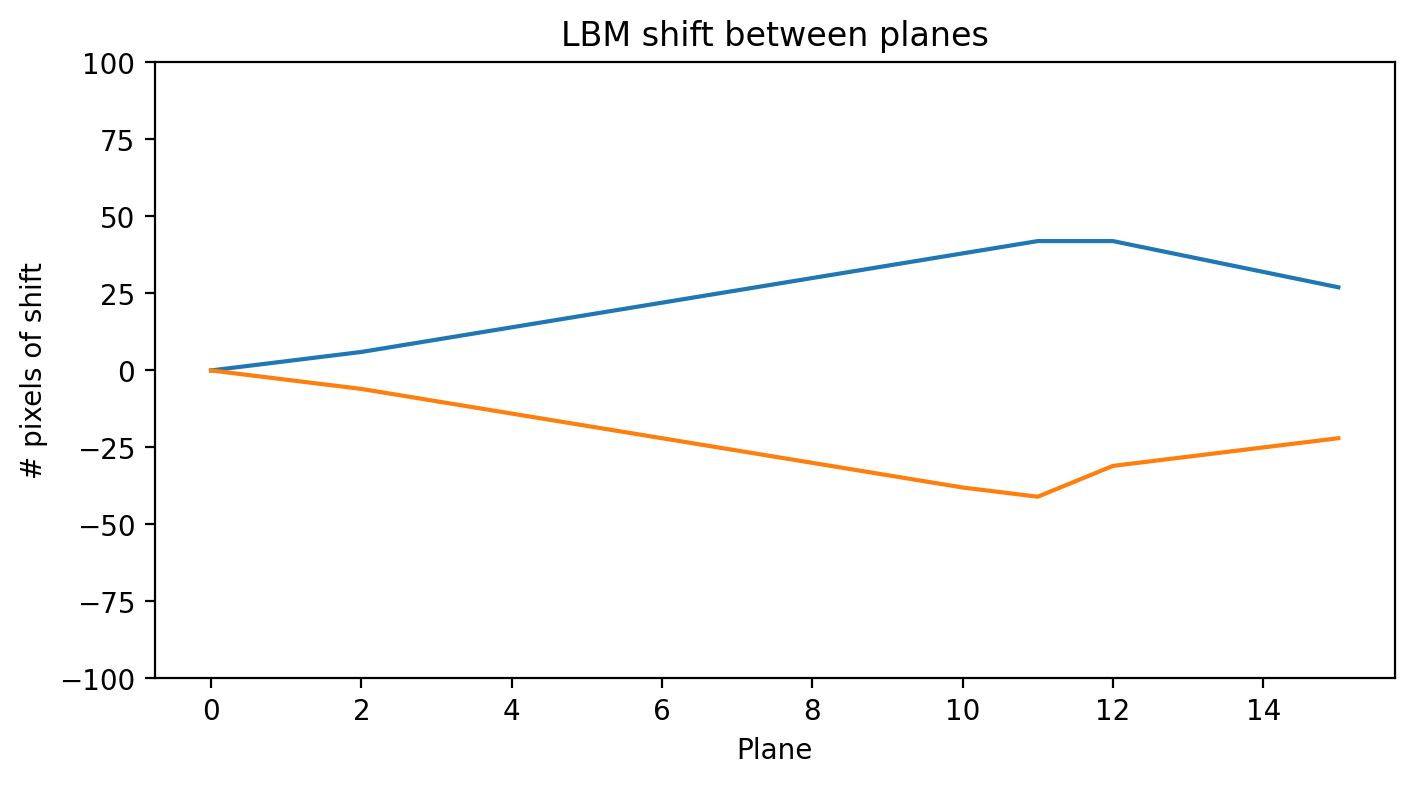

In [5]:
job.params['planes'] = n.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22,  1,  3,
         5,  7])
job.params['3d_reg'] = True
job.params['fuse_shift_override'] = 8
job.params['init_n_frames'] = 400
job.params['override_crosstalk'] = 0.36
job.params['cavity_size'] = 12
job.verbosity = 100
job.params['n_init_files'] = 1
job.run_init_pass()

In [9]:
summary = job.load_summary()

In [29]:
init_mov = n.load(summary['init_mov_path'])

In [31]:
from suite3d import quality_metrics

In [38]:
top_pix = quality_metrics.choose_top_pix(summary['ref_img_3d'],pct=98)

In [73]:
job.register_gpu_3d()

      Found dir /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/registered_fused_data
      Updating self.dirs tag registered_fused_data
   Overriding fuse shift value to 8
   Not clipping frames for registration
Will analyze 476 tifs in 476 batches
   Enforcing positivity
   Launching IO thread
               [Thread] Loading batch 0 

         Memory at batch 0.  Total Used: 157.375 GB, Virtual Available: 361.453 GB, Virtual Used: 141.742 GB, Swap Used: 015.633 GB
Loading Batch 0 of 475
                  [Thread] Before load 0 
Total Used: 157.375 GB, Virtual Available: 361.453 GB, Virtual Used: 141.742 GB, Swap Used: 015.633 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-12/1/2024-06-12_1_AH012_2P_00001_00001.tif


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 5 ready to join after 19.89 sec 

                  [Thread] After load 5 
Total Used: 159.130 GB, Virtual Available: 359.698 GB, Virtual Used: 143.497 GB, Swap Used: 015.633 GB
   Batch 5 IO thread joined
         Memory after IO thread joinTotal Used: 159.130 GB, Virtual Available: 359.698 GB, Virtual Used: 143.497 GB, Swap Used: 015.633 GB
         Memory after movie copied from threadTotal Used: 156.748 GB, Virtual Available: 362.080 GB, Virtual Used: 141.115 GB, Swap Used: 015.633 GB
         Memory after thread memory clearedTotal Used: 154.594 GB, Virtual Available: 364.234 GB, Virtual Used: 138.961 GB, Swap Used: 015.633 GB
   Launching IO thread for next batch
               [Thread] Loading batch 6 

         After IO thread launch:Total Used: 154.594 GB, Virtual Available: 364.234 GB, Virtual Used: 138.961 GB, Swap Used: 015.633 GB
                  [Thread] Before load 6 
Total Used: 154.594 GB, Virtu

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 6 ready to join after 19.91 sec 

                  [Thread] After load 6 
Total Used: 159.148 GB, Virtual Available: 359.680 GB, Virtual Used: 143.515 GB, Swap Used: 015.633 GB
   Batch 6 IO thread joined
         Memory after IO thread joinTotal Used: 159.148 GB, Virtual Available: 359.680 GB, Virtual Used: 143.515 GB, Swap Used: 015.633 GB
         Memory after movie copied from threadTotal Used: 156.762 GB, Virtual Available: 362.067 GB, Virtual Used: 141.129 GB, Swap Used: 015.633 GB
         Memory after thread memory clearedTotal Used: 154.612 GB, Virtual Available: 364.217 GB, Virtual Used: 138.979 GB, Swap Used: 015.633 GB
   Launching IO thread for next batch
               [Thread] Loading batch 7 

         After IO thread launch:Total Used: 154.612 GB, Virtual Available: 364.217 GB, Virtual Used: 138.979 GB, Swap Used: 015.633 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [Thre

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 7 ready to join after 20.03 sec 

                  [Thread] After load 7 
Total Used: 159.143 GB, Virtual Available: 359.685 GB, Virtual Used: 143.510 GB, Swap Used: 015.633 GB
   Batch 7 IO thread joined
         Memory after IO thread joinTotal Used: 159.143 GB, Virtual Available: 359.685 GB, Virtual Used: 143.510 GB, Swap Used: 015.633 GB
         Memory after movie copied from threadTotal Used: 156.749 GB, Virtual Available: 362.079 GB, Virtual Used: 141.116 GB, Swap Used: 015.633 GB
         Memory after thread memory clearedTotal Used: 154.600 GB, Virtual Available: 364.229 GB, Virtual Used: 138.967 GB, Swap Used: 015.633 GB
   Launching IO thread for next batch
               [Thread] Loading batch 8 

         After IO thread launch:Total Used: 154.600 GB, Virtual Available: 364.229 GB, Virtual Used: 138.967 GB, Swap Used: 015.633 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [Thre

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 8 ready to join after 20.33 sec 

                  [Thread] After load 8 
Total Used: 159.371 GB, Virtual Available: 359.510 GB, Virtual Used: 143.686 GB, Swap Used: 015.686 GB
   Batch 8 IO thread joined
         Memory after IO thread joinTotal Used: 159.371 GB, Virtual Available: 359.510 GB, Virtual Used: 143.686 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.989 GB, Virtual Available: 361.891 GB, Virtual Used: 141.304 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.835 GB, Virtual Available: 364.046 GB, Virtual Used: 139.150 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 9 

         After IO thread launch:Total Used: 154.835 GB, Virtual Available: 364.046 GB, Virtual Used: 139.150 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [Thre

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 9 ready to join after 21.03 sec 

                  [Thread] After load 9 
Total Used: 159.131 GB, Virtual Available: 359.750 GB, Virtual Used: 143.446 GB, Swap Used: 015.686 GB
   Batch 9 IO thread joined
         Memory after IO thread joinTotal Used: 159.131 GB, Virtual Available: 359.750 GB, Virtual Used: 143.446 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.745 GB, Virtual Available: 362.136 GB, Virtual Used: 141.059 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.594 GB, Virtual Available: 364.287 GB, Virtual Used: 138.909 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 10 

         After IO thread launch:Total Used: 154.594 GB, Virtual Available: 364.287 GB, Virtual Used: 138.909 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [Thr

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 10 ready to join after 21.35 sec 

                  [Thread] After load 10 
Total Used: 159.133 GB, Virtual Available: 359.747 GB, Virtual Used: 143.448 GB, Swap Used: 015.686 GB
   Batch 10 IO thread joined
         Memory after IO thread joinTotal Used: 159.133 GB, Virtual Available: 359.747 GB, Virtual Used: 143.448 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.750 GB, Virtual Available: 362.131 GB, Virtual Used: 141.064 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.597 GB, Virtual Available: 364.284 GB, Virtual Used: 138.912 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 11 

         After IO thread launch:Total Used: 154.597 GB, Virtual Available: 364.284 GB, Virtual Used: 138.912 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 11 ready to join after 21.41 sec 

                  [Thread] After load 11 
Total Used: 159.149 GB, Virtual Available: 359.732 GB, Virtual Used: 143.464 GB, Swap Used: 015.686 GB
   Batch 11 IO thread joined
         Memory after IO thread joinTotal Used: 159.149 GB, Virtual Available: 359.732 GB, Virtual Used: 143.464 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.765 GB, Virtual Available: 362.116 GB, Virtual Used: 141.079 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.616 GB, Virtual Available: 364.265 GB, Virtual Used: 138.931 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 12 

         After IO thread launch:Total Used: 154.616 GB, Virtual Available: 364.265 GB, Virtual Used: 138.931 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 12 ready to join after 21.86 sec 

                  [Thread] After load 12 
Total Used: 159.145 GB, Virtual Available: 359.736 GB, Virtual Used: 143.459 GB, Swap Used: 015.686 GB
   Batch 12 IO thread joined
         Memory after IO thread joinTotal Used: 159.145 GB, Virtual Available: 359.736 GB, Virtual Used: 143.459 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.763 GB, Virtual Available: 362.117 GB, Virtual Used: 141.078 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.609 GB, Virtual Available: 364.272 GB, Virtual Used: 138.924 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 13 

                  [Thread] Before load 13 
Total Used: 154.609 GB, Virtual Available: 364.272 GB, Virtual Used: 138.924 GB, Swap Used: 015.686 GB
         After IO thread launch:Total Used: 154.609 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 13 ready to join after 21.77 sec 

                  [Thread] After load 13 
Total Used: 159.199 GB, Virtual Available: 359.682 GB, Virtual Used: 143.514 GB, Swap Used: 015.686 GB
   Batch 13 IO thread joined
         Memory after IO thread joinTotal Used: 159.199 GB, Virtual Available: 359.682 GB, Virtual Used: 143.514 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.811 GB, Virtual Available: 362.069 GB, Virtual Used: 141.126 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.657 GB, Virtual Available: 364.223 GB, Virtual Used: 138.972 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 14 

         After IO thread launch:Total Used: 154.657 GB, Virtual Available: 364.223 GB, Virtual Used: 138.972 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 14 ready to join after 21.73 sec 

                  [Thread] After load 14 
Total Used: 159.200 GB, Virtual Available: 359.681 GB, Virtual Used: 143.515 GB, Swap Used: 015.686 GB
   Batch 14 IO thread joined
         Memory after IO thread joinTotal Used: 159.200 GB, Virtual Available: 359.681 GB, Virtual Used: 143.515 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.814 GB, Virtual Available: 362.067 GB, Virtual Used: 141.128 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.665 GB, Virtual Available: 364.215 GB, Virtual Used: 138.980 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 15 

         After IO thread launch:Total Used: 154.665 GB, Virtual Available: 364.215 GB, Virtual Used: 138.980 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 15 ready to join after 21.79 sec 

                  [Thread] After load 15 
Total Used: 159.362 GB, Virtual Available: 359.519 GB, Virtual Used: 143.676 GB, Swap Used: 015.686 GB
   Batch 15 IO thread joined
         Memory after IO thread joinTotal Used: 159.362 GB, Virtual Available: 359.519 GB, Virtual Used: 143.676 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.976 GB, Virtual Available: 361.905 GB, Virtual Used: 141.290 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.822 GB, Virtual Available: 364.059 GB, Virtual Used: 139.136 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 16 

         After IO thread launch:Total Used: 154.822 GB, Virtual Available: 364.059 GB, Virtual Used: 139.136 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 16 ready to join after 21.47 sec 

                  [Thread] After load 16 
Total Used: 159.215 GB, Virtual Available: 359.666 GB, Virtual Used: 143.530 GB, Swap Used: 015.686 GB
   Batch 16 IO thread joined
         Memory after IO thread joinTotal Used: 159.215 GB, Virtual Available: 359.666 GB, Virtual Used: 143.530 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.833 GB, Virtual Available: 362.048 GB, Virtual Used: 141.147 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.683 GB, Virtual Available: 364.198 GB, Virtual Used: 138.998 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 17 

         After IO thread launch:Total Used: 154.683 GB, Virtual Available: 364.198 GB, Virtual Used: 138.998 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 17 ready to join after 21.36 sec 

                  [Thread] After load 17 
Total Used: 159.442 GB, Virtual Available: 359.439 GB, Virtual Used: 143.757 GB, Swap Used: 015.686 GB
   Batch 17 IO thread joined
         Memory after IO thread joinTotal Used: 159.442 GB, Virtual Available: 359.439 GB, Virtual Used: 143.757 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 157.059 GB, Virtual Available: 361.822 GB, Virtual Used: 141.373 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.909 GB, Virtual Available: 363.972 GB, Virtual Used: 139.223 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 18 

         After IO thread launch:Total Used: 154.909 GB, Virtual Available: 363.972 GB, Virtual Used: 139.223 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 18 ready to join after 21.32 sec 

                  [Thread] After load 18 
Total Used: 159.112 GB, Virtual Available: 359.769 GB, Virtual Used: 143.427 GB, Swap Used: 015.686 GB
   Batch 18 IO thread joined
         Memory after IO thread joinTotal Used: 159.112 GB, Virtual Available: 359.769 GB, Virtual Used: 143.427 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.718 GB, Virtual Available: 362.163 GB, Virtual Used: 141.032 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.570 GB, Virtual Available: 364.310 GB, Virtual Used: 138.885 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 19 

                  [Thread] Before load 19 
Total Used: 154.570 GB, Virtual Available: 364.310 GB, Virtual Used: 138.885 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-12/1/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 19 ready to join after 21.32 sec 

                  [Thread] After load 19 
Total Used: 159.628 GB, Virtual Available: 359.252 GB, Virtual Used: 143.943 GB, Swap Used: 015.686 GB
   Batch 19 IO thread joined
         Memory after IO thread joinTotal Used: 159.628 GB, Virtual Available: 359.252 GB, Virtual Used: 143.943 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 157.246 GB, Virtual Available: 361.634 GB, Virtual Used: 141.561 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 155.093 GB, Virtual Available: 363.788 GB, Virtual Used: 139.407 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 20 

         After IO thread launch:Total Used: 155.093 GB, Virtual Available: 363.788 GB, Virtual Used: 139.407 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 20 ready to join after 21.67 sec 

                  [Thread] After load 20 
Total Used: 159.124 GB, Virtual Available: 359.757 GB, Virtual Used: 143.438 GB, Swap Used: 015.686 GB
   Batch 20 IO thread joined
         Memory after IO thread joinTotal Used: 159.124 GB, Virtual Available: 359.757 GB, Virtual Used: 143.438 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.740 GB, Virtual Available: 362.141 GB, Virtual Used: 141.055 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.592 GB, Virtual Available: 364.289 GB, Virtual Used: 138.907 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 21 

         After IO thread launch:Total Used: 154.592 GB, Virtual Available: 364.289 GB, Virtual Used: 138.907 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 21 ready to join after 20.73 sec 

                  [Thread] After load 21 
Total Used: 160.004 GB, Virtual Available: 358.877 GB, Virtual Used: 144.318 GB, Swap Used: 015.686 GB
   Batch 21 IO thread joined
         Memory after IO thread joinTotal Used: 160.004 GB, Virtual Available: 358.877 GB, Virtual Used: 144.318 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 157.619 GB, Virtual Available: 361.262 GB, Virtual Used: 141.933 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 155.471 GB, Virtual Available: 363.410 GB, Virtual Used: 139.785 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 22 

         After IO thread launch:Total Used: 155.471 GB, Virtual Available: 363.410 GB, Virtual Used: 139.785 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 22 ready to join after 21.09 sec 

                  [Thread] After load 22 
Total Used: 159.108 GB, Virtual Available: 359.772 GB, Virtual Used: 143.423 GB, Swap Used: 015.686 GB
   Batch 22 IO thread joined
         Memory after IO thread joinTotal Used: 159.108 GB, Virtual Available: 359.772 GB, Virtual Used: 143.423 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.723 GB, Virtual Available: 362.158 GB, Virtual Used: 141.037 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.570 GB, Virtual Available: 364.310 GB, Virtual Used: 138.885 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 23 

         After IO thread launch:Total Used: 154.570 GB, Virtual Available: 364.310 GB, Virtual Used: 138.885 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 23 ready to join after 21.68 sec 

                  [Thread] After load 23 
Total Used: 159.976 GB, Virtual Available: 358.905 GB, Virtual Used: 144.290 GB, Swap Used: 015.686 GB
   Batch 23 IO thread joined
         Memory after IO thread joinTotal Used: 159.976 GB, Virtual Available: 358.905 GB, Virtual Used: 144.290 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 157.589 GB, Virtual Available: 361.292 GB, Virtual Used: 141.903 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 155.439 GB, Virtual Available: 363.441 GB, Virtual Used: 139.754 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 24 

         After IO thread launch:Total Used: 155.439 GB, Virtual Available: 363.441 GB, Virtual Used: 139.754 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 24 ready to join after 22.09 sec 

                  [Thread] After load 24 
Total Used: 159.117 GB, Virtual Available: 359.764 GB, Virtual Used: 143.431 GB, Swap Used: 015.686 GB
   Batch 24 IO thread joined
         Memory after IO thread joinTotal Used: 159.117 GB, Virtual Available: 359.764 GB, Virtual Used: 143.431 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.735 GB, Virtual Available: 362.146 GB, Virtual Used: 141.049 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.581 GB, Virtual Available: 364.300 GB, Virtual Used: 138.895 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 25 

         After IO thread launch:Total Used: 154.581 GB, Virtual Available: 364.300 GB, Virtual Used: 138.895 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 25 ready to join after 21.86 sec 

                  [Thread] After load 25 
Total Used: 160.087 GB, Virtual Available: 358.794 GB, Virtual Used: 144.402 GB, Swap Used: 015.686 GB
   Batch 25 IO thread joined
         Memory after IO thread joinTotal Used: 160.087 GB, Virtual Available: 358.794 GB, Virtual Used: 144.402 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 157.701 GB, Virtual Available: 361.180 GB, Virtual Used: 142.015 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 155.550 GB, Virtual Available: 363.331 GB, Virtual Used: 139.864 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 26 

                  [Thread] Before load 26 
Total Used: 155.550 GB, Virtual Available: 363.331 GB, Virtual Used: 139.864 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-12/1/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 26 ready to join after 21.50 sec 

                  [Thread] After load 26 
Total Used: 159.106 GB, Virtual Available: 359.775 GB, Virtual Used: 143.420 GB, Swap Used: 015.686 GB
   Batch 26 IO thread joined
         Memory after IO thread joinTotal Used: 159.106 GB, Virtual Available: 359.775 GB, Virtual Used: 143.420 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.720 GB, Virtual Available: 362.161 GB, Virtual Used: 141.034 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.565 GB, Virtual Available: 364.316 GB, Virtual Used: 138.879 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 27 

         After IO thread launch:Total Used: 154.565 GB, Virtual Available: 364.316 GB, Virtual Used: 138.879 GB, Swap Used: 015.686 GB
                  [Thread] Before load 27 
Total Used: 154.565 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 0.34 GB
               [Thread] Thread for batch 27 ready to join after 5.91 sec 

                  [Thread] After load 27 
Total Used: 158.108 GB, Virtual Available: 360.773 GB, Virtual Used: 142.423 GB, Swap Used: 015.686 GB
   Completed rigid reg on batch in :8.113359928131104s
   Shifted the mov in: 1.415663719177246s
         After all GPU Batches:Total Used: 161.858 GB, Virtual Available: 357.022 GB, Virtual Used: 146.173 GB, Swap Used: 015.686 GB
      Saving fused, registered file of shape (16, 100, 1042, 729) to /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/registered_fused_data/fused_reg_data0026.npy
         Saved in 1.90 sec
      Computing quality metrics and saving
         After full batch saving:Total Used: 157.325 GB, Virtual Available: 361.556 GB, Virtual Used: 141.639 GB, Swap Used: 015.686 GB
         Memory at batch 27. Total Used: 157.325 GB, Virtual Available: 361.556 GB, Virtual Used: 141.639 GB, Swap Used: 

/home/ali/packages/s2p-lbm/suite3d/quality_metrics.py:22: RuntimeWarning: divide by zero encountered in divide
  'signal_to_background_ratio' : sig / bg,


         After full batch saving:Total Used: 149.360 GB, Virtual Available: 369.521 GB, Virtual Used: 133.674 GB, Swap Used: 015.686 GB
         Memory at batch 28. Total Used: 149.360 GB, Virtual Available: 369.521 GB, Virtual Used: 133.674 GB, Swap Used: 015.686 GB
Loading Batch 28 of 475


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 28 ready to join after 20.64 sec 

                  [Thread] After load 28 
Total Used: 151.289 GB, Virtual Available: 367.592 GB, Virtual Used: 135.603 GB, Swap Used: 015.686 GB
   Batch 28 IO thread joined
         Memory after IO thread joinTotal Used: 151.289 GB, Virtual Available: 367.592 GB, Virtual Used: 135.603 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 152.707 GB, Virtual Available: 366.174 GB, Virtual Used: 137.021 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 150.554 GB, Virtual Available: 368.327 GB, Virtual Used: 134.869 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 29 

                  [Thread] Before load 29 
Total Used: 150.554 GB, Virtual Available: 368.327 GB, Virtual Used: 134.869 GB, Swap Used: 015.686 GB
         After IO thread launch:Total Used: 150.554 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 29 ready to join after 27.97 sec 

                  [Thread] After load 29 
Total Used: 160.202 GB, Virtual Available: 358.679 GB, Virtual Used: 144.516 GB, Swap Used: 015.686 GB
   Batch 29 IO thread joined
         Memory after IO thread joinTotal Used: 160.202 GB, Virtual Available: 358.679 GB, Virtual Used: 144.516 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 157.821 GB, Virtual Available: 361.059 GB, Virtual Used: 142.136 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 155.674 GB, Virtual Available: 363.207 GB, Virtual Used: 139.989 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 30 

         After IO thread launch:Total Used: 155.674 GB, Virtual Available: 363.207 GB, Virtual Used: 139.989 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 30 ready to join after 22.47 sec 

                  [Thread] After load 30 
Total Used: 158.902 GB, Virtual Available: 359.979 GB, Virtual Used: 143.217 GB, Swap Used: 015.686 GB
   Batch 30 IO thread joined
         Memory after IO thread joinTotal Used: 158.902 GB, Virtual Available: 359.979 GB, Virtual Used: 143.217 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.524 GB, Virtual Available: 362.357 GB, Virtual Used: 140.838 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.371 GB, Virtual Available: 364.510 GB, Virtual Used: 138.686 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 31 

         After IO thread launch:Total Used: 154.371 GB, Virtual Available: 364.510 GB, Virtual Used: 138.686 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 31 ready to join after 20.83 sec 

                  [Thread] After load 31 
Total Used: 161.720 GB, Virtual Available: 357.161 GB, Virtual Used: 146.034 GB, Swap Used: 015.686 GB
   Batch 31 IO thread joined
         Memory after IO thread joinTotal Used: 161.720 GB, Virtual Available: 357.161 GB, Virtual Used: 146.034 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 159.337 GB, Virtual Available: 359.544 GB, Virtual Used: 143.651 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 157.188 GB, Virtual Available: 361.693 GB, Virtual Used: 141.502 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 32 

         After IO thread launch:Total Used: 157.188 GB, Virtual Available: 361.693 GB, Virtual Used: 141.502 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 32 ready to join after 20.70 sec 

                  [Thread] After load 32 
Total Used: 159.020 GB, Virtual Available: 359.861 GB, Virtual Used: 143.334 GB, Swap Used: 015.686 GB
   Batch 32 IO thread joined
         Memory after IO thread joinTotal Used: 159.020 GB, Virtual Available: 359.861 GB, Virtual Used: 143.334 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.638 GB, Virtual Available: 362.243 GB, Virtual Used: 140.952 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.488 GB, Virtual Available: 364.392 GB, Virtual Used: 138.803 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 33 

         After IO thread launch:Total Used: 154.488 GB, Virtual Available: 364.392 GB, Virtual Used: 138.803 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 33 ready to join after 21.40 sec 

                  [Thread] After load 33 
Total Used: 161.491 GB, Virtual Available: 357.390 GB, Virtual Used: 145.806 GB, Swap Used: 015.686 GB
   Batch 33 IO thread joined
         Memory after IO thread joinTotal Used: 161.491 GB, Virtual Available: 357.390 GB, Virtual Used: 145.806 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 159.106 GB, Virtual Available: 359.775 GB, Virtual Used: 143.420 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 156.958 GB, Virtual Available: 361.923 GB, Virtual Used: 141.272 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 34 

         After IO thread launch:Total Used: 156.958 GB, Virtual Available: 361.923 GB, Virtual Used: 141.272 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 34 ready to join after 21.47 sec 

                  [Thread] After load 34 
Total Used: 157.565 GB, Virtual Available: 361.316 GB, Virtual Used: 141.879 GB, Swap Used: 015.686 GB
   Batch 34 IO thread joined
         Memory after IO thread joinTotal Used: 157.565 GB, Virtual Available: 361.316 GB, Virtual Used: 141.879 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.178 GB, Virtual Available: 363.702 GB, Virtual Used: 139.493 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.030 GB, Virtual Available: 365.851 GB, Virtual Used: 137.344 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 35 

         After IO thread launch:Total Used: 153.030 GB, Virtual Available: 365.851 GB, Virtual Used: 137.344 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 35 ready to join after 20.93 sec 

                  [Thread] After load 35 
Total Used: 160.606 GB, Virtual Available: 358.275 GB, Virtual Used: 144.920 GB, Swap Used: 015.686 GB
   Batch 35 IO thread joined
         Memory after IO thread joinTotal Used: 160.606 GB, Virtual Available: 358.275 GB, Virtual Used: 144.920 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 158.224 GB, Virtual Available: 360.657 GB, Virtual Used: 142.538 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 156.075 GB, Virtual Available: 362.806 GB, Virtual Used: 140.389 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 36 

         After IO thread launch:Total Used: 156.075 GB, Virtual Available: 362.806 GB, Virtual Used: 140.389 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 36 ready to join after 21.19 sec 

                  [Thread] After load 36 
Total Used: 157.671 GB, Virtual Available: 361.210 GB, Virtual Used: 141.985 GB, Swap Used: 015.686 GB
   Batch 36 IO thread joined
         Memory after IO thread joinTotal Used: 157.671 GB, Virtual Available: 361.210 GB, Virtual Used: 141.985 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.289 GB, Virtual Available: 363.592 GB, Virtual Used: 139.603 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.135 GB, Virtual Available: 365.746 GB, Virtual Used: 137.449 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 37 

         After IO thread launch:Total Used: 153.135 GB, Virtual Available: 365.746 GB, Virtual Used: 137.449 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 37 ready to join after 21.22 sec 

                  [Thread] After load 37 
Total Used: 159.922 GB, Virtual Available: 358.959 GB, Virtual Used: 144.236 GB, Swap Used: 015.686 GB
   Batch 37 IO thread joined
         Memory after IO thread joinTotal Used: 159.922 GB, Virtual Available: 358.959 GB, Virtual Used: 144.236 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 157.539 GB, Virtual Available: 361.341 GB, Virtual Used: 141.854 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 155.390 GB, Virtual Available: 363.491 GB, Virtual Used: 139.705 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 38 

         After IO thread launch:Total Used: 155.390 GB, Virtual Available: 363.491 GB, Virtual Used: 139.705 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 38 ready to join after 21.75 sec 

                  [Thread] After load 38 
Total Used: 157.667 GB, Virtual Available: 361.214 GB, Virtual Used: 141.981 GB, Swap Used: 015.686 GB
   Batch 38 IO thread joined
         Memory after IO thread joinTotal Used: 157.667 GB, Virtual Available: 361.214 GB, Virtual Used: 141.981 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.280 GB, Virtual Available: 363.601 GB, Virtual Used: 139.595 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.126 GB, Virtual Available: 365.754 GB, Virtual Used: 137.441 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 39 

         After IO thread launch:Total Used: 153.126 GB, Virtual Available: 365.754 GB, Virtual Used: 137.441 GB, Swap Used: 015.686 GB
                  [Thread] Before load 39 
Total Used: 153.126 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 39 ready to join after 21.77 sec 

                  [Thread] After load 39 
Total Used: 159.684 GB, Virtual Available: 359.196 GB, Virtual Used: 143.999 GB, Swap Used: 015.686 GB
   Batch 39 IO thread joined
         Memory after IO thread joinTotal Used: 159.684 GB, Virtual Available: 359.196 GB, Virtual Used: 143.999 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 157.302 GB, Virtual Available: 361.578 GB, Virtual Used: 141.617 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 155.153 GB, Virtual Available: 363.728 GB, Virtual Used: 139.467 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 40 

         After IO thread launch:Total Used: 155.153 GB, Virtual Available: 363.728 GB, Virtual Used: 139.467 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 40 ready to join after 22.03 sec 

                  [Thread] After load 40 
Total Used: 157.663 GB, Virtual Available: 361.217 GB, Virtual Used: 141.978 GB, Swap Used: 015.686 GB
   Batch 40 IO thread joined
         Memory after IO thread joinTotal Used: 157.663 GB, Virtual Available: 361.217 GB, Virtual Used: 141.978 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.281 GB, Virtual Available: 363.600 GB, Virtual Used: 139.596 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.133 GB, Virtual Available: 365.747 GB, Virtual Used: 137.448 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 41 

         After IO thread launch:Total Used: 153.133 GB, Virtual Available: 365.747 GB, Virtual Used: 137.448 GB, Swap Used: 015.686 GB
                  [Thread] Before load 41 
Total Used: 153.133 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 41 ready to join after 21.34 sec 

                  [Thread] After load 41 
Total Used: 160.510 GB, Virtual Available: 358.371 GB, Virtual Used: 144.825 GB, Swap Used: 015.686 GB
   Batch 41 IO thread joined
         Memory after IO thread joinTotal Used: 160.510 GB, Virtual Available: 358.371 GB, Virtual Used: 144.825 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 158.128 GB, Virtual Available: 360.752 GB, Virtual Used: 142.443 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 155.979 GB, Virtual Available: 362.902 GB, Virtual Used: 140.293 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 42 

         After IO thread launch:Total Used: 155.979 GB, Virtual Available: 362.902 GB, Virtual Used: 140.293 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 42 ready to join after 21.33 sec 

                  [Thread] After load 42 
Total Used: 157.661 GB, Virtual Available: 361.220 GB, Virtual Used: 141.975 GB, Swap Used: 015.686 GB
   Batch 42 IO thread joined
         Memory after IO thread joinTotal Used: 157.661 GB, Virtual Available: 361.220 GB, Virtual Used: 141.975 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.277 GB, Virtual Available: 363.603 GB, Virtual Used: 139.592 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.123 GB, Virtual Available: 365.758 GB, Virtual Used: 137.438 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 43 

         After IO thread launch:Total Used: 153.123 GB, Virtual Available: 365.758 GB, Virtual Used: 137.438 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 43 ready to join after 21.39 sec 

                  [Thread] After load 43 
Total Used: 160.295 GB, Virtual Available: 358.586 GB, Virtual Used: 144.610 GB, Swap Used: 015.686 GB
   Batch 43 IO thread joined
         Memory after IO thread joinTotal Used: 160.295 GB, Virtual Available: 358.586 GB, Virtual Used: 144.610 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 157.911 GB, Virtual Available: 360.970 GB, Virtual Used: 142.225 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 155.760 GB, Virtual Available: 363.120 GB, Virtual Used: 140.075 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 44 

         After IO thread launch:Total Used: 155.760 GB, Virtual Available: 363.120 GB, Virtual Used: 140.075 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 44 ready to join after 21.30 sec 

                  [Thread] After load 44 
Total Used: 157.675 GB, Virtual Available: 361.205 GB, Virtual Used: 141.990 GB, Swap Used: 015.686 GB
   Batch 44 IO thread joined
         Memory after IO thread joinTotal Used: 157.675 GB, Virtual Available: 361.205 GB, Virtual Used: 141.990 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.289 GB, Virtual Available: 363.592 GB, Virtual Used: 139.603 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.139 GB, Virtual Available: 365.742 GB, Virtual Used: 137.453 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 45 

         After IO thread launch:Total Used: 153.139 GB, Virtual Available: 365.742 GB, Virtual Used: 137.453 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 45 ready to join after 21.30 sec 

                  [Thread] After load 45 
Total Used: 160.880 GB, Virtual Available: 358.001 GB, Virtual Used: 145.194 GB, Swap Used: 015.686 GB
   Batch 45 IO thread joined
         Memory after IO thread joinTotal Used: 160.880 GB, Virtual Available: 358.001 GB, Virtual Used: 145.194 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 158.498 GB, Virtual Available: 360.383 GB, Virtual Used: 142.813 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 156.348 GB, Virtual Available: 362.533 GB, Virtual Used: 140.663 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 46 

         After IO thread launch:Total Used: 156.348 GB, Virtual Available: 362.533 GB, Virtual Used: 140.663 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 46 ready to join after 21.18 sec 

                  [Thread] After load 46 
Total Used: 157.662 GB, Virtual Available: 361.219 GB, Virtual Used: 141.976 GB, Swap Used: 015.686 GB
   Batch 46 IO thread joined
         Memory after IO thread joinTotal Used: 157.662 GB, Virtual Available: 361.219 GB, Virtual Used: 141.976 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.275 GB, Virtual Available: 363.606 GB, Virtual Used: 139.590 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.125 GB, Virtual Available: 365.756 GB, Virtual Used: 137.439 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 47 

         After IO thread launch:Total Used: 153.125 GB, Virtual Available: 365.756 GB, Virtual Used: 137.439 GB, Swap Used: 015.686 GB
                  [Thread] Before load 47 
Total Used: 153.125 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 47 ready to join after 21.68 sec 

                  [Thread] After load 47 
Total Used: 158.983 GB, Virtual Available: 359.897 GB, Virtual Used: 143.298 GB, Swap Used: 015.686 GB
   Batch 47 IO thread joined
         Memory after IO thread joinTotal Used: 158.983 GB, Virtual Available: 359.897 GB, Virtual Used: 143.298 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.602 GB, Virtual Available: 362.279 GB, Virtual Used: 140.916 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.452 GB, Virtual Available: 364.429 GB, Virtual Used: 138.767 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 48 

         After IO thread launch:Total Used: 154.452 GB, Virtual Available: 364.429 GB, Virtual Used: 138.767 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 48 ready to join after 21.23 sec 

                  [Thread] After load 48 
Total Used: 158.092 GB, Virtual Available: 360.789 GB, Virtual Used: 142.406 GB, Swap Used: 015.686 GB
   Batch 48 IO thread joined
         Memory after IO thread joinTotal Used: 158.092 GB, Virtual Available: 360.789 GB, Virtual Used: 142.406 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.707 GB, Virtual Available: 363.174 GB, Virtual Used: 140.021 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.556 GB, Virtual Available: 365.325 GB, Virtual Used: 137.870 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 49 

         After IO thread launch:Total Used: 153.556 GB, Virtual Available: 365.325 GB, Virtual Used: 137.870 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 49 ready to join after 21.41 sec 

                  [Thread] After load 49 
Total Used: 159.262 GB, Virtual Available: 359.619 GB, Virtual Used: 143.576 GB, Swap Used: 015.686 GB
   Batch 49 IO thread joined
         Memory after IO thread joinTotal Used: 159.262 GB, Virtual Available: 359.619 GB, Virtual Used: 143.576 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.880 GB, Virtual Available: 362.001 GB, Virtual Used: 141.194 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.730 GB, Virtual Available: 364.151 GB, Virtual Used: 139.045 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 50 

         After IO thread launch:Total Used: 154.730 GB, Virtual Available: 364.151 GB, Virtual Used: 139.045 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 50 ready to join after 21.13 sec 

                  [Thread] After load 50 
Total Used: 157.489 GB, Virtual Available: 361.392 GB, Virtual Used: 141.803 GB, Swap Used: 015.686 GB
   Batch 50 IO thread joined
         Memory after IO thread joinTotal Used: 157.489 GB, Virtual Available: 361.392 GB, Virtual Used: 141.803 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.107 GB, Virtual Available: 363.773 GB, Virtual Used: 139.422 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 152.959 GB, Virtual Available: 365.921 GB, Virtual Used: 137.274 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 51 

                  [Thread] Before load 51 
Total Used: 152.959 GB, Virtual Available: 365.921 GB, Virtual Used: 137.274 GB, Swap Used: 015.686 GB
         After IO thread launch:Total Used: 152.959 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 51 ready to join after 21.28 sec 

                  [Thread] After load 51 
Total Used: 159.784 GB, Virtual Available: 359.096 GB, Virtual Used: 144.099 GB, Swap Used: 015.686 GB
   Batch 51 IO thread joined
         Memory after IO thread joinTotal Used: 159.784 GB, Virtual Available: 359.096 GB, Virtual Used: 144.099 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 157.402 GB, Virtual Available: 361.479 GB, Virtual Used: 141.716 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 155.252 GB, Virtual Available: 363.628 GB, Virtual Used: 139.567 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 52 

         After IO thread launch:Total Used: 155.252 GB, Virtual Available: 363.628 GB, Virtual Used: 139.567 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 52 ready to join after 22.33 sec 

                  [Thread] After load 52 
Total Used: 157.391 GB, Virtual Available: 361.490 GB, Virtual Used: 141.706 GB, Swap Used: 015.686 GB
   Batch 52 IO thread joined
         Memory after IO thread joinTotal Used: 157.391 GB, Virtual Available: 361.490 GB, Virtual Used: 141.706 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.010 GB, Virtual Available: 363.871 GB, Virtual Used: 139.324 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 152.861 GB, Virtual Available: 366.020 GB, Virtual Used: 137.175 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 53 

         After IO thread launch:Total Used: 152.861 GB, Virtual Available: 366.020 GB, Virtual Used: 137.175 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 53 ready to join after 21.07 sec 

                  [Thread] After load 53 
Total Used: 160.029 GB, Virtual Available: 358.852 GB, Virtual Used: 144.343 GB, Swap Used: 015.686 GB
   Batch 53 IO thread joined
         Memory after IO thread joinTotal Used: 160.029 GB, Virtual Available: 358.852 GB, Virtual Used: 144.343 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 157.648 GB, Virtual Available: 361.233 GB, Virtual Used: 141.962 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 155.492 GB, Virtual Available: 363.389 GB, Virtual Used: 139.807 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 54 

         After IO thread launch:Total Used: 155.492 GB, Virtual Available: 363.389 GB, Virtual Used: 139.807 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 54 ready to join after 21.01 sec 

                  [Thread] After load 54 
Total Used: 157.520 GB, Virtual Available: 361.361 GB, Virtual Used: 141.834 GB, Swap Used: 015.686 GB
   Batch 54 IO thread joined
         Memory after IO thread joinTotal Used: 157.520 GB, Virtual Available: 361.361 GB, Virtual Used: 141.834 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.137 GB, Virtual Available: 363.743 GB, Virtual Used: 139.452 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 152.988 GB, Virtual Available: 365.893 GB, Virtual Used: 137.302 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 55 

         After IO thread launch:Total Used: 152.988 GB, Virtual Available: 365.893 GB, Virtual Used: 137.302 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Shifted the mov in: 6.131701707839966s
         After all GPU Batches:Total Used: 164.456 GB, Virtual Available: 354.424 GB, Virtual Used: 148.771 GB, Swap Used: 015.686 GB
      Saving fused, registered file of shape (16, 100, 1042, 729) to /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/registered_fused_data/fused_reg_data0054.npy
   Loaded 1 files, total 0.97 GB
               [Thread] Thread for batch 55 ready to join after 12.42 sec 

                  [Thread] After load 55 
Total Used: 156.353 GB, Virtual Available: 362.527 GB, Virtual Used: 140.668 GB, Swap Used: 015.686 GB
         Saved in 2.01 sec
      Computing quality metrics and saving
         After full batch saving:Total Used: 156.353 GB, Virtual Available: 362.527 GB, Virtual Used: 140.668 GB, Swap Used: 015.686 GB
         Memory at batch 55. Total Used: 156.353 GB, Virtual Available: 362.527 GB, Virtual Used: 140.668 GB, Swap Used: 015.686 GB
Loading Batch 55 of 475
   Batch 55 IO thre

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 56 ready to join after 20.91 sec 

                  [Thread] After load 56 
Total Used: 155.694 GB, Virtual Available: 363.187 GB, Virtual Used: 140.008 GB, Swap Used: 015.686 GB
   Batch 56 IO thread joined
         Memory after IO thread joinTotal Used: 155.693 GB, Virtual Available: 363.187 GB, Virtual Used: 140.008 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.803 GB, Virtual Available: 363.078 GB, Virtual Used: 140.117 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.651 GB, Virtual Available: 365.229 GB, Virtual Used: 137.966 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 57 

         After IO thread launch:Total Used: 153.651 GB, Virtual Available: 365.229 GB, Virtual Used: 137.966 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 57 ready to join after 21.36 sec 

                  [Thread] After load 57 
Total Used: 160.716 GB, Virtual Available: 358.164 GB, Virtual Used: 145.031 GB, Swap Used: 015.686 GB
   Batch 57 IO thread joined
         Memory after IO thread joinTotal Used: 160.716 GB, Virtual Available: 358.164 GB, Virtual Used: 145.031 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 158.272 GB, Virtual Available: 360.609 GB, Virtual Used: 142.586 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 156.122 GB, Virtual Available: 362.759 GB, Virtual Used: 140.436 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 58 

         After IO thread launch:Total Used: 156.125 GB, Virtual Available: 362.756 GB, Virtual Used: 140.439 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 58 ready to join after 21.19 sec 

                  [Thread] After load 58 
Total Used: 157.470 GB, Virtual Available: 361.411 GB, Virtual Used: 141.784 GB, Swap Used: 015.686 GB
   Batch 58 IO thread joined
         Memory after IO thread joinTotal Used: 157.470 GB, Virtual Available: 361.411 GB, Virtual Used: 141.784 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.083 GB, Virtual Available: 363.798 GB, Virtual Used: 139.398 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 152.932 GB, Virtual Available: 365.949 GB, Virtual Used: 137.246 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 59 

         After IO thread launch:Total Used: 152.932 GB, Virtual Available: 365.949 GB, Virtual Used: 137.246 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 59 ready to join after 21.11 sec 

                  [Thread] After load 59 
Total Used: 160.385 GB, Virtual Available: 358.496 GB, Virtual Used: 144.700 GB, Swap Used: 015.686 GB
   Batch 59 IO thread joined
         Memory after IO thread joinTotal Used: 160.385 GB, Virtual Available: 358.496 GB, Virtual Used: 144.700 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 158.003 GB, Virtual Available: 360.878 GB, Virtual Used: 142.317 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 155.853 GB, Virtual Available: 363.027 GB, Virtual Used: 140.168 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 60 

         After IO thread launch:Total Used: 155.853 GB, Virtual Available: 363.027 GB, Virtual Used: 140.168 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 60 ready to join after 21.73 sec 

                  [Thread] After load 60 
Total Used: 157.507 GB, Virtual Available: 361.374 GB, Virtual Used: 141.821 GB, Swap Used: 015.686 GB
   Batch 60 IO thread joined
         Memory after IO thread joinTotal Used: 157.507 GB, Virtual Available: 361.374 GB, Virtual Used: 141.821 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.125 GB, Virtual Available: 363.756 GB, Virtual Used: 139.439 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 152.975 GB, Virtual Available: 365.906 GB, Virtual Used: 137.289 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 61 

         After IO thread launch:Total Used: 152.975 GB, Virtual Available: 365.906 GB, Virtual Used: 137.289 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 61 ready to join after 21.46 sec 

                  [Thread] After load 61 
Total Used: 159.704 GB, Virtual Available: 359.176 GB, Virtual Used: 144.019 GB, Swap Used: 015.686 GB
   Batch 61 IO thread joined
         Memory after IO thread joinTotal Used: 159.704 GB, Virtual Available: 359.176 GB, Virtual Used: 144.019 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 157.322 GB, Virtual Available: 361.559 GB, Virtual Used: 141.637 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 155.173 GB, Virtual Available: 363.708 GB, Virtual Used: 139.487 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 62 

         After IO thread launch:Total Used: 155.173 GB, Virtual Available: 363.708 GB, Virtual Used: 139.487 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 62 ready to join after 21.37 sec 

                  [Thread] After load 62 
Total Used: 157.550 GB, Virtual Available: 361.331 GB, Virtual Used: 141.864 GB, Swap Used: 015.686 GB
   Batch 62 IO thread joined
         Memory after IO thread joinTotal Used: 157.550 GB, Virtual Available: 361.331 GB, Virtual Used: 141.864 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.164 GB, Virtual Available: 363.716 GB, Virtual Used: 139.479 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.015 GB, Virtual Available: 365.866 GB, Virtual Used: 137.329 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 63 

                  [Thread] Before load 63 
Total Used: 153.015 GB, Virtual Available: 365.866 GB, Virtual Used: 137.329 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-12/3/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 63 ready to join after 21.24 sec 

                  [Thread] After load 63 
Total Used: 160.027 GB, Virtual Available: 358.854 GB, Virtual Used: 144.341 GB, Swap Used: 015.686 GB
   Batch 63 IO thread joined
         Memory after IO thread joinTotal Used: 160.027 GB, Virtual Available: 358.854 GB, Virtual Used: 144.341 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 157.645 GB, Virtual Available: 361.236 GB, Virtual Used: 141.959 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 155.496 GB, Virtual Available: 363.385 GB, Virtual Used: 139.810 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 64 

         After IO thread launch:Total Used: 155.496 GB, Virtual Available: 363.385 GB, Virtual Used: 139.810 GB, Swap Used: 015.686 GB
                  [Thread] Before load 64 
Total Used: 155.496 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 64 ready to join after 20.66 sec 

                  [Thread] After load 64 
Total Used: 157.505 GB, Virtual Available: 361.375 GB, Virtual Used: 141.820 GB, Swap Used: 015.686 GB
   Batch 64 IO thread joined
         Memory after IO thread joinTotal Used: 157.505 GB, Virtual Available: 361.375 GB, Virtual Used: 141.820 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.119 GB, Virtual Available: 363.762 GB, Virtual Used: 139.433 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 152.969 GB, Virtual Available: 365.912 GB, Virtual Used: 137.283 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 65 

         After IO thread launch:Total Used: 152.969 GB, Virtual Available: 365.912 GB, Virtual Used: 137.283 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 65 ready to join after 21.24 sec 

                  [Thread] After load 65 
Total Used: 159.615 GB, Virtual Available: 359.266 GB, Virtual Used: 143.929 GB, Swap Used: 015.686 GB
   Batch 65 IO thread joined
         Memory after IO thread joinTotal Used: 159.615 GB, Virtual Available: 359.266 GB, Virtual Used: 143.929 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 157.233 GB, Virtual Available: 361.648 GB, Virtual Used: 141.548 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 155.084 GB, Virtual Available: 363.797 GB, Virtual Used: 139.398 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 66 

         After IO thread launch:Total Used: 155.084 GB, Virtual Available: 363.797 GB, Virtual Used: 139.398 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 66 ready to join after 21.60 sec 

                  [Thread] After load 66 
Total Used: 158.539 GB, Virtual Available: 360.342 GB, Virtual Used: 142.853 GB, Swap Used: 015.686 GB
   Batch 66 IO thread joined
         Memory after IO thread joinTotal Used: 158.539 GB, Virtual Available: 360.342 GB, Virtual Used: 142.853 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.157 GB, Virtual Available: 362.724 GB, Virtual Used: 140.471 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.007 GB, Virtual Available: 364.874 GB, Virtual Used: 138.321 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 67 

         After IO thread launch:Total Used: 154.007 GB, Virtual Available: 364.874 GB, Virtual Used: 138.321 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 67 ready to join after 21.68 sec 

                  [Thread] After load 67 
Total Used: 159.622 GB, Virtual Available: 359.258 GB, Virtual Used: 143.937 GB, Swap Used: 015.686 GB
   Batch 67 IO thread joined
         Memory after IO thread joinTotal Used: 159.622 GB, Virtual Available: 359.258 GB, Virtual Used: 143.937 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 157.240 GB, Virtual Available: 361.641 GB, Virtual Used: 141.555 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 155.093 GB, Virtual Available: 363.788 GB, Virtual Used: 139.408 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 68 

         After IO thread launch:Total Used: 155.093 GB, Virtual Available: 363.788 GB, Virtual Used: 139.408 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 68 ready to join after 21.45 sec 

                  [Thread] After load 68 
Total Used: 157.749 GB, Virtual Available: 361.131 GB, Virtual Used: 142.064 GB, Swap Used: 015.686 GB
   Batch 68 IO thread joined
         Memory after IO thread joinTotal Used: 157.749 GB, Virtual Available: 361.131 GB, Virtual Used: 142.064 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.367 GB, Virtual Available: 363.514 GB, Virtual Used: 139.682 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.214 GB, Virtual Available: 365.667 GB, Virtual Used: 137.528 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 69 

         After IO thread launch:Total Used: 153.214 GB, Virtual Available: 365.667 GB, Virtual Used: 137.528 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 69 ready to join after 20.87 sec 

                  [Thread] After load 69 
Total Used: 160.458 GB, Virtual Available: 358.422 GB, Virtual Used: 144.773 GB, Swap Used: 015.686 GB
   Batch 69 IO thread joined
         Memory after IO thread joinTotal Used: 160.458 GB, Virtual Available: 358.422 GB, Virtual Used: 144.773 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 158.076 GB, Virtual Available: 360.804 GB, Virtual Used: 142.391 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 155.927 GB, Virtual Available: 362.954 GB, Virtual Used: 140.241 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 70 

         After IO thread launch:Total Used: 155.927 GB, Virtual Available: 362.954 GB, Virtual Used: 140.241 GB, Swap Used: 015.686 GB
                  [Thread] Before load 70 
Total Used: 155.927 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 70 ready to join after 21.42 sec 

                  [Thread] After load 70 
Total Used: 157.492 GB, Virtual Available: 361.388 GB, Virtual Used: 141.807 GB, Swap Used: 015.686 GB
   Batch 70 IO thread joined
         Memory after IO thread joinTotal Used: 157.492 GB, Virtual Available: 361.388 GB, Virtual Used: 141.807 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.105 GB, Virtual Available: 363.775 GB, Virtual Used: 139.420 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 152.956 GB, Virtual Available: 365.925 GB, Virtual Used: 137.271 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 71 

         After IO thread launch:Total Used: 152.956 GB, Virtual Available: 365.925 GB, Virtual Used: 137.271 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 71 ready to join after 21.38 sec 

                  [Thread] After load 71 
Total Used: 160.706 GB, Virtual Available: 358.175 GB, Virtual Used: 145.020 GB, Swap Used: 015.686 GB
   Batch 71 IO thread joined
         Memory after IO thread joinTotal Used: 160.706 GB, Virtual Available: 358.175 GB, Virtual Used: 145.020 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 158.324 GB, Virtual Available: 360.557 GB, Virtual Used: 142.638 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 156.175 GB, Virtual Available: 362.706 GB, Virtual Used: 140.489 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 72 

         After IO thread launch:Total Used: 156.175 GB, Virtual Available: 362.706 GB, Virtual Used: 140.489 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 72 ready to join after 21.53 sec 

                  [Thread] After load 72 
Total Used: 157.496 GB, Virtual Available: 361.385 GB, Virtual Used: 141.811 GB, Swap Used: 015.686 GB
   Batch 72 IO thread joined
         Memory after IO thread joinTotal Used: 157.496 GB, Virtual Available: 361.385 GB, Virtual Used: 141.811 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.111 GB, Virtual Available: 363.770 GB, Virtual Used: 139.426 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 152.963 GB, Virtual Available: 365.918 GB, Virtual Used: 137.277 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 73 

         After IO thread launch:Total Used: 152.963 GB, Virtual Available: 365.918 GB, Virtual Used: 137.277 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 73 ready to join after 20.81 sec 

                  [Thread] After load 73 
Total Used: 159.301 GB, Virtual Available: 359.580 GB, Virtual Used: 143.615 GB, Swap Used: 015.686 GB
   Batch 73 IO thread joined
         Memory after IO thread joinTotal Used: 159.301 GB, Virtual Available: 359.580 GB, Virtual Used: 143.615 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.919 GB, Virtual Available: 361.962 GB, Virtual Used: 141.233 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.769 GB, Virtual Available: 364.111 GB, Virtual Used: 139.084 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 74 

         After IO thread launch:Total Used: 154.769 GB, Virtual Available: 364.111 GB, Virtual Used: 139.084 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 74 ready to join after 21.13 sec 

                  [Thread] After load 74 
Total Used: 158.159 GB, Virtual Available: 360.722 GB, Virtual Used: 142.474 GB, Swap Used: 015.686 GB
   Batch 74 IO thread joined
         Memory after IO thread joinTotal Used: 158.159 GB, Virtual Available: 360.722 GB, Virtual Used: 142.474 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.777 GB, Virtual Available: 363.104 GB, Virtual Used: 140.091 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.627 GB, Virtual Available: 365.254 GB, Virtual Used: 137.942 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 75 

                  [Thread] Before load 75 
Total Used: 153.627 GB, Virtual Available: 365.254 GB, Virtual Used: 137.942 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-12/3/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 75 ready to join after 21.78 sec 

                  [Thread] After load 75 
Total Used: 158.941 GB, Virtual Available: 359.940 GB, Virtual Used: 143.255 GB, Swap Used: 015.686 GB
   Batch 75 IO thread joined
         Memory after IO thread joinTotal Used: 158.941 GB, Virtual Available: 359.940 GB, Virtual Used: 143.255 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.560 GB, Virtual Available: 362.321 GB, Virtual Used: 140.874 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.411 GB, Virtual Available: 364.470 GB, Virtual Used: 138.725 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 76 

         After IO thread launch:Total Used: 154.411 GB, Virtual Available: 364.470 GB, Virtual Used: 138.725 GB, Swap Used: 015.686 GB
                  [Thread] Before load 76 
Total Used: 154.411 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 76 ready to join after 20.81 sec 

                  [Thread] After load 76 
Total Used: 158.226 GB, Virtual Available: 360.655 GB, Virtual Used: 142.540 GB, Swap Used: 015.686 GB
   Batch 76 IO thread joined
         Memory after IO thread joinTotal Used: 158.226 GB, Virtual Available: 360.655 GB, Virtual Used: 142.540 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.839 GB, Virtual Available: 363.042 GB, Virtual Used: 140.154 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.689 GB, Virtual Available: 365.192 GB, Virtual Used: 138.003 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 77 

         After IO thread launch:Total Used: 153.689 GB, Virtual Available: 365.192 GB, Virtual Used: 138.003 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 77 ready to join after 21.20 sec 

                  [Thread] After load 77 
Total Used: 158.744 GB, Virtual Available: 360.137 GB, Virtual Used: 143.058 GB, Swap Used: 015.686 GB
   Batch 77 IO thread joined
         Memory after IO thread joinTotal Used: 158.744 GB, Virtual Available: 360.137 GB, Virtual Used: 143.058 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.357 GB, Virtual Available: 362.524 GB, Virtual Used: 140.672 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.209 GB, Virtual Available: 364.672 GB, Virtual Used: 138.523 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 78 

         After IO thread launch:Total Used: 154.209 GB, Virtual Available: 364.672 GB, Virtual Used: 138.523 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 78 ready to join after 21.70 sec 

                  [Thread] After load 78 
Total Used: 159.481 GB, Virtual Available: 359.400 GB, Virtual Used: 143.795 GB, Swap Used: 015.686 GB
   Batch 78 IO thread joined
         Memory after IO thread joinTotal Used: 159.481 GB, Virtual Available: 359.400 GB, Virtual Used: 143.795 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 157.095 GB, Virtual Available: 361.786 GB, Virtual Used: 141.410 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.946 GB, Virtual Available: 363.935 GB, Virtual Used: 139.260 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 79 

         After IO thread launch:Total Used: 154.946 GB, Virtual Available: 363.935 GB, Virtual Used: 139.260 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Saved in 2.55 sec
      Computing quality metrics and saving


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         After full batch saving:Total Used: 161.657 GB, Virtual Available: 357.224 GB, Virtual Used: 145.971 GB, Swap Used: 015.686 GB
         Memory at batch 79. Total Used: 161.657 GB, Virtual Available: 357.224 GB, Virtual Used: 145.972 GB, Swap Used: 015.686 GB
Loading Batch 79 of 475
   Loaded 1 files, total 1.18 GB
               [Thread] Thread for batch 79 ready to join after 14.08 sec 

                  [Thread] After load 79 
Total Used: 158.527 GB, Virtual Available: 360.354 GB, Virtual Used: 142.841 GB, Swap Used: 015.686 GB
   Batch 79 IO thread joined
         Memory after IO thread joinTotal Used: 158.527 GB, Virtual Available: 360.354 GB, Virtual Used: 142.842 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.173 GB, Virtual Available: 363.708 GB, Virtual Used: 139.488 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.990 GB, Virtual Available: 364.891 GB, Virtual Used: 138.305 GB, Swap Used: 01

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 80 ready to join after 23.07 sec 

                  [Thread] After load 80 
Total Used: 154.276 GB, Virtual Available: 364.605 GB, Virtual Used: 138.591 GB, Swap Used: 015.686 GB
   Batch 80 IO thread joined
         Memory after IO thread joinTotal Used: 154.276 GB, Virtual Available: 364.605 GB, Virtual Used: 138.591 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 153.930 GB, Virtual Available: 364.951 GB, Virtual Used: 138.245 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 151.780 GB, Virtual Available: 367.101 GB, Virtual Used: 136.094 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 81 

         After IO thread launch:Total Used: 151.780 GB, Virtual Available: 367.101 GB, Virtual Used: 136.094 GB, Swap Used: 015.686 GB
                  [Thread] Before load 81 
Total Used: 151.780 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 81 ready to join after 22.00 sec 

                  [Thread] After load 81 
Total Used: 158.369 GB, Virtual Available: 360.512 GB, Virtual Used: 142.683 GB, Swap Used: 015.686 GB
   Batch 81 IO thread joined
         Memory after IO thread joinTotal Used: 158.369 GB, Virtual Available: 360.512 GB, Virtual Used: 142.683 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.982 GB, Virtual Available: 362.899 GB, Virtual Used: 140.297 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.827 GB, Virtual Available: 365.054 GB, Virtual Used: 138.142 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 82 

         After IO thread launch:Total Used: 153.827 GB, Virtual Available: 365.054 GB, Virtual Used: 138.142 GB, Swap Used: 015.686 GB
                  [Thread] Before load 82 
Total Used: 153.827 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 82 ready to join after 21.69 sec 

                  [Thread] After load 82 
Total Used: 158.404 GB, Virtual Available: 360.477 GB, Virtual Used: 142.719 GB, Swap Used: 015.686 GB
   Batch 82 IO thread joined
         Memory after IO thread joinTotal Used: 158.404 GB, Virtual Available: 360.477 GB, Virtual Used: 142.719 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.021 GB, Virtual Available: 362.860 GB, Virtual Used: 140.335 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.871 GB, Virtual Available: 365.010 GB, Virtual Used: 138.185 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 83 

         After IO thread launch:Total Used: 153.871 GB, Virtual Available: 365.010 GB, Virtual Used: 138.185 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 83 ready to join after 21.98 sec 

                  [Thread] After load 83 
Total Used: 158.443 GB, Virtual Available: 360.438 GB, Virtual Used: 142.758 GB, Swap Used: 015.686 GB
   Batch 83 IO thread joined
         Memory after IO thread joinTotal Used: 158.443 GB, Virtual Available: 360.438 GB, Virtual Used: 142.758 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.057 GB, Virtual Available: 362.823 GB, Virtual Used: 140.372 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.909 GB, Virtual Available: 364.971 GB, Virtual Used: 138.224 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 84 

         After IO thread launch:Total Used: 153.909 GB, Virtual Available: 364.971 GB, Virtual Used: 138.224 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 84 ready to join after 22.17 sec 

                  [Thread] After load 84 
Total Used: 158.446 GB, Virtual Available: 360.435 GB, Virtual Used: 142.761 GB, Swap Used: 015.686 GB
   Batch 84 IO thread joined
         Memory after IO thread joinTotal Used: 158.446 GB, Virtual Available: 360.435 GB, Virtual Used: 142.761 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.064 GB, Virtual Available: 362.817 GB, Virtual Used: 140.378 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.916 GB, Virtual Available: 364.964 GB, Virtual Used: 138.231 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 85 

         After IO thread launch:Total Used: 153.916 GB, Virtual Available: 364.964 GB, Virtual Used: 138.231 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 85 ready to join after 21.59 sec 

                  [Thread] After load 85 
Total Used: 158.462 GB, Virtual Available: 360.419 GB, Virtual Used: 142.777 GB, Swap Used: 015.686 GB
   Batch 85 IO thread joined
         Memory after IO thread joinTotal Used: 158.462 GB, Virtual Available: 360.419 GB, Virtual Used: 142.777 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.076 GB, Virtual Available: 362.804 GB, Virtual Used: 140.391 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.928 GB, Virtual Available: 364.952 GB, Virtual Used: 138.243 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 86 

         After IO thread launch:Total Used: 153.928 GB, Virtual Available: 364.952 GB, Virtual Used: 138.243 GB, Swap Used: 015.686 GB
                  [Thread] Before load 86 
Total Used: 153.928 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 86 ready to join after 21.99 sec 

                  [Thread] After load 86 
Total Used: 158.481 GB, Virtual Available: 360.400 GB, Virtual Used: 142.795 GB, Swap Used: 015.686 GB
   Batch 86 IO thread joined
         Memory after IO thread joinTotal Used: 158.481 GB, Virtual Available: 360.400 GB, Virtual Used: 142.795 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.094 GB, Virtual Available: 362.787 GB, Virtual Used: 140.408 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.943 GB, Virtual Available: 364.937 GB, Virtual Used: 138.258 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 87 

                  [Thread] Before load 87 
Total Used: 153.943 GB, Virtual Available: 364.937 GB, Virtual Used: 138.258 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-12/4/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 87 ready to join after 21.78 sec 

                  [Thread] After load 87 
Total Used: 158.484 GB, Virtual Available: 360.397 GB, Virtual Used: 142.798 GB, Swap Used: 015.686 GB
   Batch 87 IO thread joined
         Memory after IO thread joinTotal Used: 158.484 GB, Virtual Available: 360.397 GB, Virtual Used: 142.798 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.097 GB, Virtual Available: 362.783 GB, Virtual Used: 140.412 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.944 GB, Virtual Available: 364.937 GB, Virtual Used: 138.258 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 88 

                  [Thread] Before load 88 
Total Used: 153.944 GB, Virtual Available: 364.937 GB, Virtual Used: 138.258 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-12/4/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 88 ready to join after 21.30 sec 

                  [Thread] After load 88 
Total Used: 158.479 GB, Virtual Available: 360.402 GB, Virtual Used: 142.793 GB, Swap Used: 015.686 GB
   Batch 88 IO thread joined
         Memory after IO thread joinTotal Used: 158.479 GB, Virtual Available: 360.402 GB, Virtual Used: 142.793 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.092 GB, Virtual Available: 362.789 GB, Virtual Used: 140.407 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.944 GB, Virtual Available: 364.937 GB, Virtual Used: 138.258 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 89 

                  [Thread] Before load 89 
Total Used: 153.944 GB, Virtual Available: 364.937 GB, Virtual Used: 138.258 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-12/4/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 89 ready to join after 21.28 sec 

                  [Thread] After load 89 
Total Used: 158.496 GB, Virtual Available: 360.385 GB, Virtual Used: 142.811 GB, Swap Used: 015.686 GB
   Batch 89 IO thread joined
         Memory after IO thread joinTotal Used: 158.496 GB, Virtual Available: 360.385 GB, Virtual Used: 142.811 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.106 GB, Virtual Available: 362.775 GB, Virtual Used: 140.420 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.955 GB, Virtual Available: 364.925 GB, Virtual Used: 138.270 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 90 

         After IO thread launch:Total Used: 153.955 GB, Virtual Available: 364.925 GB, Virtual Used: 138.270 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 90 ready to join after 21.69 sec 

                  [Thread] After load 90 
Total Used: 158.488 GB, Virtual Available: 360.392 GB, Virtual Used: 142.803 GB, Swap Used: 015.686 GB
   Batch 90 IO thread joined
         Memory after IO thread joinTotal Used: 158.488 GB, Virtual Available: 360.392 GB, Virtual Used: 142.803 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.105 GB, Virtual Available: 362.776 GB, Virtual Used: 140.419 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.953 GB, Virtual Available: 364.928 GB, Virtual Used: 138.267 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 91 

         After IO thread launch:Total Used: 153.953 GB, Virtual Available: 364.928 GB, Virtual Used: 138.267 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 91 ready to join after 21.54 sec 

                  [Thread] After load 91 
Total Used: 158.497 GB, Virtual Available: 360.384 GB, Virtual Used: 142.812 GB, Swap Used: 015.686 GB
   Batch 91 IO thread joined
         Memory after IO thread joinTotal Used: 158.497 GB, Virtual Available: 360.384 GB, Virtual Used: 142.812 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.113 GB, Virtual Available: 362.767 GB, Virtual Used: 140.428 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.961 GB, Virtual Available: 364.920 GB, Virtual Used: 138.276 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 92 

         After IO thread launch:Total Used: 153.961 GB, Virtual Available: 364.920 GB, Virtual Used: 138.276 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 92 ready to join after 21.02 sec 

                  [Thread] After load 92 
Total Used: 158.503 GB, Virtual Available: 360.378 GB, Virtual Used: 142.817 GB, Swap Used: 015.686 GB
   Batch 92 IO thread joined
         Memory after IO thread joinTotal Used: 158.503 GB, Virtual Available: 360.378 GB, Virtual Used: 142.817 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.116 GB, Virtual Available: 362.765 GB, Virtual Used: 140.431 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.968 GB, Virtual Available: 364.913 GB, Virtual Used: 138.282 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 93 

         After IO thread launch:Total Used: 153.968 GB, Virtual Available: 364.913 GB, Virtual Used: 138.282 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 93 ready to join after 21.34 sec 

                  [Thread] After load 93 
Total Used: 158.502 GB, Virtual Available: 360.379 GB, Virtual Used: 142.816 GB, Swap Used: 015.686 GB
   Batch 93 IO thread joined
         Memory after IO thread joinTotal Used: 158.502 GB, Virtual Available: 360.379 GB, Virtual Used: 142.816 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.115 GB, Virtual Available: 362.766 GB, Virtual Used: 140.430 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.967 GB, Virtual Available: 364.914 GB, Virtual Used: 138.281 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 94 

         After IO thread launch:Total Used: 153.967 GB, Virtual Available: 364.914 GB, Virtual Used: 138.281 GB, Swap Used: 015.686 GB
                  [Thread] Before load 94 
Total Used: 153.967 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 94 ready to join after 21.12 sec 

                  [Thread] After load 94 
Total Used: 158.520 GB, Virtual Available: 360.361 GB, Virtual Used: 142.834 GB, Swap Used: 015.686 GB
   Batch 94 IO thread joined
         Memory after IO thread joinTotal Used: 158.520 GB, Virtual Available: 360.361 GB, Virtual Used: 142.834 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.133 GB, Virtual Available: 362.747 GB, Virtual Used: 140.448 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.979 GB, Virtual Available: 364.901 GB, Virtual Used: 138.294 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 95 

         After IO thread launch:Total Used: 153.979 GB, Virtual Available: 364.901 GB, Virtual Used: 138.294 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 95 ready to join after 21.28 sec 

                  [Thread] After load 95 
Total Used: 158.521 GB, Virtual Available: 360.360 GB, Virtual Used: 142.835 GB, Swap Used: 015.686 GB
   Batch 95 IO thread joined
         Memory after IO thread joinTotal Used: 158.521 GB, Virtual Available: 360.360 GB, Virtual Used: 142.835 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.134 GB, Virtual Available: 362.747 GB, Virtual Used: 140.449 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.980 GB, Virtual Available: 364.900 GB, Virtual Used: 138.295 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 96 

         After IO thread launch:Total Used: 153.980 GB, Virtual Available: 364.900 GB, Virtual Used: 138.295 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 96 ready to join after 20.98 sec 

                  [Thread] After load 96 
Total Used: 158.513 GB, Virtual Available: 360.368 GB, Virtual Used: 142.828 GB, Swap Used: 015.686 GB
   Batch 96 IO thread joined
         Memory after IO thread joinTotal Used: 158.513 GB, Virtual Available: 360.368 GB, Virtual Used: 142.828 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.130 GB, Virtual Available: 362.751 GB, Virtual Used: 140.444 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.982 GB, Virtual Available: 364.899 GB, Virtual Used: 138.296 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 97 

         After IO thread launch:Total Used: 153.982 GB, Virtual Available: 364.899 GB, Virtual Used: 138.296 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 97 ready to join after 20.94 sec 

                  [Thread] After load 97 
Total Used: 158.517 GB, Virtual Available: 360.364 GB, Virtual Used: 142.831 GB, Swap Used: 015.686 GB
   Batch 97 IO thread joined
         Memory after IO thread joinTotal Used: 158.517 GB, Virtual Available: 360.364 GB, Virtual Used: 142.831 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.131 GB, Virtual Available: 362.750 GB, Virtual Used: 140.445 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.980 GB, Virtual Available: 364.901 GB, Virtual Used: 138.294 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 98 

         After IO thread launch:Total Used: 153.980 GB, Virtual Available: 364.901 GB, Virtual Used: 138.294 GB, Swap Used: 015.686 GB
                  [Thread] Before load 98 
Total Used: 153.980 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 98 ready to join after 20.95 sec 

                  [Thread] After load 98 
Total Used: 158.523 GB, Virtual Available: 360.358 GB, Virtual Used: 142.837 GB, Swap Used: 015.686 GB
   Batch 98 IO thread joined
         Memory after IO thread joinTotal Used: 158.523 GB, Virtual Available: 360.358 GB, Virtual Used: 142.837 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.136 GB, Virtual Available: 362.745 GB, Virtual Used: 140.451 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.988 GB, Virtual Available: 364.893 GB, Virtual Used: 138.302 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 99 

         After IO thread launch:Total Used: 153.988 GB, Virtual Available: 364.893 GB, Virtual Used: 138.302 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 99 ready to join after 21.31 sec 

                  [Thread] After load 99 
Total Used: 158.519 GB, Virtual Available: 360.362 GB, Virtual Used: 142.834 GB, Swap Used: 015.686 GB
   Batch 99 IO thread joined
         Memory after IO thread joinTotal Used: 158.519 GB, Virtual Available: 360.362 GB, Virtual Used: 142.834 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.132 GB, Virtual Available: 362.748 GB, Virtual Used: 140.447 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.984 GB, Virtual Available: 364.897 GB, Virtual Used: 138.299 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 100 

                  [Thread] Before load 100 
Total Used: 153.984 GB, Virtual Available: 364.897 GB, Virtual Used: 138.299 GB, Swap Used: 015.686 GB
         After IO thread launch:Total Used: 153.984 GB

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 100 ready to join after 52.90 sec 

                  [Thread] After load 100 
Total Used: 158.508 GB, Virtual Available: 360.373 GB, Virtual Used: 142.823 GB, Swap Used: 015.686 GB
   Batch 100 IO thread joined
         Memory after IO thread joinTotal Used: 158.508 GB, Virtual Available: 360.373 GB, Virtual Used: 142.823 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.124 GB, Virtual Available: 362.757 GB, Virtual Used: 140.438 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.972 GB, Virtual Available: 364.909 GB, Virtual Used: 138.286 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 101 

         After IO thread launch:Total Used: 153.972 GB, Virtual Available: 364.909 GB, Virtual Used: 138.286 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 101 ready to join after 65.72 sec 

                  [Thread] After load 101 
Total Used: 158.522 GB, Virtual Available: 360.359 GB, Virtual Used: 142.836 GB, Swap Used: 015.686 GB
   Batch 101 IO thread joined
         Memory after IO thread joinTotal Used: 158.522 GB, Virtual Available: 360.359 GB, Virtual Used: 142.836 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.135 GB, Virtual Available: 362.745 GB, Virtual Used: 140.450 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.979 GB, Virtual Available: 364.902 GB, Virtual Used: 138.293 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 102 

         After IO thread launch:Total Used: 153.979 GB, Virtual Available: 364.902 GB, Virtual Used: 138.293 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 102 ready to join after 61.75 sec 

                  [Thread] After load 102 
Total Used: 158.519 GB, Virtual Available: 360.362 GB, Virtual Used: 142.833 GB, Swap Used: 015.686 GB
   Batch 102 IO thread joined
         Memory after IO thread joinTotal Used: 158.519 GB, Virtual Available: 360.362 GB, Virtual Used: 142.833 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.136 GB, Virtual Available: 362.745 GB, Virtual Used: 140.450 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.987 GB, Virtual Available: 364.893 GB, Virtual Used: 138.302 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 103 

         After IO thread launch:Total Used: 153.987 GB, Virtual Available: 364.893 GB, Virtual Used: 138.302 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 103 ready to join after 59.47 sec 

                  [Thread] After load 103 
Total Used: 158.516 GB, Virtual Available: 360.365 GB, Virtual Used: 142.831 GB, Swap Used: 015.686 GB
   Batch 103 IO thread joined
         Memory after IO thread joinTotal Used: 158.516 GB, Virtual Available: 360.365 GB, Virtual Used: 142.831 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.129 GB, Virtual Available: 362.751 GB, Virtual Used: 140.444 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.981 GB, Virtual Available: 364.900 GB, Virtual Used: 138.295 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 104 

                  [Thread] Before load 104 
Total Used: 153.981 GB, Virtual Available: 364.900 GB, Virtual Used: 138.295 GB, Swap Used: 015.686 GB
         After IO thread launch:Total Used: 153.981

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 104 ready to join after 61.07 sec 

                  [Thread] After load 104 
Total Used: 158.513 GB, Virtual Available: 360.368 GB, Virtual Used: 142.827 GB, Swap Used: 015.686 GB
   Batch 104 IO thread joined
         Memory after IO thread joinTotal Used: 158.513 GB, Virtual Available: 360.368 GB, Virtual Used: 142.827 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.126 GB, Virtual Available: 362.754 GB, Virtual Used: 140.441 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.978 GB, Virtual Available: 364.903 GB, Virtual Used: 138.292 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 105 

         After IO thread launch:Total Used: 153.978 GB, Virtual Available: 364.903 GB, Virtual Used: 138.292 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 105 ready to join after 60.54 sec 

                  [Thread] After load 105 
Total Used: 158.516 GB, Virtual Available: 360.364 GB, Virtual Used: 142.831 GB, Swap Used: 015.686 GB
   Batch 105 IO thread joined
         Memory after IO thread joinTotal Used: 158.516 GB, Virtual Available: 360.364 GB, Virtual Used: 142.831 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.130 GB, Virtual Available: 362.751 GB, Virtual Used: 140.444 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.976 GB, Virtual Available: 364.905 GB, Virtual Used: 138.290 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 106 

         After IO thread launch:Total Used: 153.976 GB, Virtual Available: 364.905 GB, Virtual Used: 138.290 GB, Swap Used: 015.686 GB
                  [Thread] Before load 106 
Total Used: 153.976

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 106 ready to join after 61.25 sec 

                  [Thread] After load 106 
Total Used: 158.528 GB, Virtual Available: 360.353 GB, Virtual Used: 142.842 GB, Swap Used: 015.686 GB
   Batch 106 IO thread joined
         Memory after IO thread joinTotal Used: 158.528 GB, Virtual Available: 360.353 GB, Virtual Used: 142.842 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.145 GB, Virtual Available: 362.735 GB, Virtual Used: 140.460 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.991 GB, Virtual Available: 364.889 GB, Virtual Used: 138.306 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 107 

         After IO thread launch:Total Used: 153.991 GB, Virtual Available: 364.889 GB, Virtual Used: 138.306 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 107 ready to join after 56.85 sec 

                  [Thread] After load 107 
Total Used: 158.548 GB, Virtual Available: 360.333 GB, Virtual Used: 142.862 GB, Swap Used: 015.686 GB
   Batch 107 IO thread joined
         Memory after IO thread joinTotal Used: 158.548 GB, Virtual Available: 360.333 GB, Virtual Used: 142.862 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.161 GB, Virtual Available: 362.720 GB, Virtual Used: 140.476 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.013 GB, Virtual Available: 364.868 GB, Virtual Used: 138.327 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 108 

         After IO thread launch:Total Used: 154.013 GB, Virtual Available: 364.868 GB, Virtual Used: 138.327 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 108 ready to join after 61.20 sec 

                  [Thread] After load 108 
Total Used: 158.567 GB, Virtual Available: 360.314 GB, Virtual Used: 142.881 GB, Swap Used: 015.686 GB
   Batch 108 IO thread joined
         Memory after IO thread joinTotal Used: 158.567 GB, Virtual Available: 360.314 GB, Virtual Used: 142.881 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.180 GB, Virtual Available: 362.701 GB, Virtual Used: 140.495 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.025 GB, Virtual Available: 364.856 GB, Virtual Used: 138.340 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 109 

         After IO thread launch:Total Used: 154.025 GB, Virtual Available: 364.856 GB, Virtual Used: 138.340 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 109 ready to join after 62.69 sec 

                  [Thread] After load 109 
Total Used: 158.577 GB, Virtual Available: 360.304 GB, Virtual Used: 142.891 GB, Swap Used: 015.686 GB
   Batch 109 IO thread joined
         Memory after IO thread joinTotal Used: 158.577 GB, Virtual Available: 360.304 GB, Virtual Used: 142.891 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.190 GB, Virtual Available: 362.690 GB, Virtual Used: 140.505 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.040 GB, Virtual Available: 364.841 GB, Virtual Used: 138.354 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 110 

         After IO thread launch:Total Used: 154.040 GB, Virtual Available: 364.841 GB, Virtual Used: 138.354 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 110 ready to join after 64.90 sec 

                  [Thread] After load 110 
Total Used: 158.573 GB, Virtual Available: 360.308 GB, Virtual Used: 142.887 GB, Swap Used: 015.686 GB
   Batch 110 IO thread joined
         Memory after IO thread joinTotal Used: 158.573 GB, Virtual Available: 360.308 GB, Virtual Used: 142.887 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.186 GB, Virtual Available: 362.694 GB, Virtual Used: 140.501 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.036 GB, Virtual Available: 364.845 GB, Virtual Used: 138.350 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 111 

                  [Thread] Before load 111 
Total Used: 154.036 GB, Virtual Available: 364.845 GB, Virtual Used: 138.350 GB, Swap Used: 015.686 GB
         After IO thread launch:Total Used: 154.036

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 111 ready to join after 55.07 sec 

                  [Thread] After load 111 
Total Used: 158.600 GB, Virtual Available: 360.280 GB, Virtual Used: 142.915 GB, Swap Used: 015.686 GB
   Batch 111 IO thread joined
         Memory after IO thread joinTotal Used: 158.600 GB, Virtual Available: 360.280 GB, Virtual Used: 142.915 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.216 GB, Virtual Available: 362.664 GB, Virtual Used: 140.531 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.064 GB, Virtual Available: 364.817 GB, Virtual Used: 138.378 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 112 

         After IO thread launch:Total Used: 154.064 GB, Virtual Available: 364.817 GB, Virtual Used: 138.378 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 112 ready to join after 43.30 sec 

                  [Thread] After load 112 
Total Used: 158.635 GB, Virtual Available: 360.246 GB, Virtual Used: 142.949 GB, Swap Used: 015.686 GB
   Batch 112 IO thread joined
         Memory after IO thread joinTotal Used: 158.635 GB, Virtual Available: 360.246 GB, Virtual Used: 142.949 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.248 GB, Virtual Available: 362.633 GB, Virtual Used: 140.562 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.099 GB, Virtual Available: 364.782 GB, Virtual Used: 138.414 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 113 

         After IO thread launch:Total Used: 154.099 GB, Virtual Available: 364.782 GB, Virtual Used: 138.414 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 113 ready to join after 34.63 sec 

                  [Thread] After load 113 
Total Used: 158.651 GB, Virtual Available: 360.230 GB, Virtual Used: 142.965 GB, Swap Used: 015.686 GB
   Batch 113 IO thread joined
         Memory after IO thread joinTotal Used: 158.651 GB, Virtual Available: 360.230 GB, Virtual Used: 142.965 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.266 GB, Virtual Available: 362.614 GB, Virtual Used: 140.581 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.117 GB, Virtual Available: 364.763 GB, Virtual Used: 138.432 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 114 

         After IO thread launch:Total Used: 154.117 GB, Virtual Available: 364.763 GB, Virtual Used: 138.432 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 114 ready to join after 21.32 sec 

                  [Thread] After load 114 
Total Used: 158.658 GB, Virtual Available: 360.223 GB, Virtual Used: 142.972 GB, Swap Used: 015.686 GB
   Batch 114 IO thread joined
         Memory after IO thread joinTotal Used: 158.658 GB, Virtual Available: 360.223 GB, Virtual Used: 142.972 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 156.275 GB, Virtual Available: 362.606 GB, Virtual Used: 140.590 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 154.127 GB, Virtual Available: 364.753 GB, Virtual Used: 138.442 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 115 

         After IO thread launch:Total Used: 154.127 GB, Virtual Available: 364.753 GB, Virtual Used: 138.442 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 115 ready to join after 19.97 sec 

                  [Thread] After load 115 
Total Used: 157.773 GB, Virtual Available: 361.108 GB, Virtual Used: 142.087 GB, Swap Used: 015.686 GB
   Batch 115 IO thread joined
         Memory after IO thread joinTotal Used: 157.773 GB, Virtual Available: 361.108 GB, Virtual Used: 142.087 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.386 GB, Virtual Available: 363.495 GB, Virtual Used: 139.700 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.231 GB, Virtual Available: 365.650 GB, Virtual Used: 137.545 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 116 

         After IO thread launch:Total Used: 153.231 GB, Virtual Available: 365.650 GB, Virtual Used: 137.545 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 116 ready to join after 21.05 sec 

                  [Thread] After load 116 
Total Used: 157.787 GB, Virtual Available: 361.093 GB, Virtual Used: 142.102 GB, Swap Used: 015.686 GB
   Batch 116 IO thread joined
         Memory after IO thread joinTotal Used: 157.787 GB, Virtual Available: 361.093 GB, Virtual Used: 142.102 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.402 GB, Virtual Available: 363.479 GB, Virtual Used: 139.716 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.248 GB, Virtual Available: 365.633 GB, Virtual Used: 137.562 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 117 

         After IO thread launch:Total Used: 153.248 GB, Virtual Available: 365.633 GB, Virtual Used: 137.562 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 117 ready to join after 21.77 sec 

                  [Thread] After load 117 
Total Used: 157.812 GB, Virtual Available: 361.069 GB, Virtual Used: 142.126 GB, Swap Used: 015.686 GB
   Batch 117 IO thread joined
         Memory after IO thread joinTotal Used: 157.812 GB, Virtual Available: 361.069 GB, Virtual Used: 142.126 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.425 GB, Virtual Available: 363.456 GB, Virtual Used: 139.739 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.274 GB, Virtual Available: 365.607 GB, Virtual Used: 137.588 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 118 

         After IO thread launch:Total Used: 153.274 GB, Virtual Available: 365.607 GB, Virtual Used: 137.588 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 118 ready to join after 22.26 sec 

                  [Thread] After load 118 
Total Used: 158.058 GB, Virtual Available: 360.823 GB, Virtual Used: 142.372 GB, Swap Used: 015.686 GB
   Batch 118 IO thread joined
         Memory after IO thread joinTotal Used: 158.058 GB, Virtual Available: 360.823 GB, Virtual Used: 142.372 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.672 GB, Virtual Available: 363.209 GB, Virtual Used: 139.986 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.518 GB, Virtual Available: 365.363 GB, Virtual Used: 137.832 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 119 

         After IO thread launch:Total Used: 153.518 GB, Virtual Available: 365.363 GB, Virtual Used: 137.832 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 119 ready to join after 22.46 sec 

                  [Thread] After load 119 
Total Used: 157.908 GB, Virtual Available: 360.973 GB, Virtual Used: 142.223 GB, Swap Used: 015.686 GB
   Batch 119 IO thread joined
         Memory after IO thread joinTotal Used: 157.908 GB, Virtual Available: 360.973 GB, Virtual Used: 142.223 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.527 GB, Virtual Available: 363.354 GB, Virtual Used: 139.841 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.378 GB, Virtual Available: 365.502 GB, Virtual Used: 137.693 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 120 

                  [Thread] Before load 120 
Total Used: 153.378 GB, Virtual Available: 365.502 GB, Virtual Used: 137.693 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-12

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 120 ready to join after 22.63 sec 

                  [Thread] After load 120 
Total Used: 157.579 GB, Virtual Available: 361.302 GB, Virtual Used: 141.894 GB, Swap Used: 015.686 GB
   Batch 120 IO thread joined
         Memory after IO thread joinTotal Used: 157.579 GB, Virtual Available: 361.302 GB, Virtual Used: 141.894 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.197 GB, Virtual Available: 363.683 GB, Virtual Used: 139.512 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.048 GB, Virtual Available: 365.833 GB, Virtual Used: 137.362 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 121 

         After IO thread launch:Total Used: 153.048 GB, Virtual Available: 365.833 GB, Virtual Used: 137.362 GB, Swap Used: 015.686 GB
                  [Thread] Before load 121 
Total Used: 153.048

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 121 ready to join after 22.64 sec 

                  [Thread] After load 121 
Total Used: 158.324 GB, Virtual Available: 360.557 GB, Virtual Used: 142.638 GB, Swap Used: 015.686 GB
   Batch 121 IO thread joined
         Memory after IO thread joinTotal Used: 158.324 GB, Virtual Available: 360.557 GB, Virtual Used: 142.638 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.937 GB, Virtual Available: 362.944 GB, Virtual Used: 140.252 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.789 GB, Virtual Available: 365.092 GB, Virtual Used: 138.103 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 122 

         After IO thread launch:Total Used: 153.789 GB, Virtual Available: 365.092 GB, Virtual Used: 138.103 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 122 ready to join after 22.25 sec 

                  [Thread] After load 122 
Total Used: 157.707 GB, Virtual Available: 361.174 GB, Virtual Used: 142.022 GB, Swap Used: 015.686 GB
   Batch 122 IO thread joined
         Memory after IO thread joinTotal Used: 157.707 GB, Virtual Available: 361.174 GB, Virtual Used: 142.022 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.321 GB, Virtual Available: 363.560 GB, Virtual Used: 139.636 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.167 GB, Virtual Available: 365.714 GB, Virtual Used: 137.482 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 123 

         After IO thread launch:Total Used: 153.167 GB, Virtual Available: 365.714 GB, Virtual Used: 137.482 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 123 ready to join after 22.03 sec 

                  [Thread] After load 123 
Total Used: 158.318 GB, Virtual Available: 360.563 GB, Virtual Used: 142.632 GB, Swap Used: 015.686 GB
   Batch 123 IO thread joined
         Memory after IO thread joinTotal Used: 158.318 GB, Virtual Available: 360.563 GB, Virtual Used: 142.632 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.935 GB, Virtual Available: 362.946 GB, Virtual Used: 140.249 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.781 GB, Virtual Available: 365.100 GB, Virtual Used: 138.096 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 124 

         After IO thread launch:Total Used: 153.781 GB, Virtual Available: 365.100 GB, Virtual Used: 138.096 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 124 ready to join after 22.16 sec 

                  [Thread] After load 124 
Total Used: 157.843 GB, Virtual Available: 361.038 GB, Virtual Used: 142.157 GB, Swap Used: 015.686 GB
   Batch 124 IO thread joined
         Memory after IO thread joinTotal Used: 157.843 GB, Virtual Available: 361.038 GB, Virtual Used: 142.157 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.460 GB, Virtual Available: 363.420 GB, Virtual Used: 139.775 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.311 GB, Virtual Available: 365.570 GB, Virtual Used: 137.625 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 125 

         After IO thread launch:Total Used: 153.311 GB, Virtual Available: 365.570 GB, Virtual Used: 137.625 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 125 ready to join after 22.65 sec 

                  [Thread] After load 125 
Total Used: 158.371 GB, Virtual Available: 360.510 GB, Virtual Used: 142.685 GB, Swap Used: 015.686 GB
   Batch 125 IO thread joined
         Memory after IO thread joinTotal Used: 158.371 GB, Virtual Available: 360.510 GB, Virtual Used: 142.685 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.987 GB, Virtual Available: 362.894 GB, Virtual Used: 140.301 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.833 GB, Virtual Available: 365.048 GB, Virtual Used: 138.147 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 126 

         After IO thread launch:Total Used: 153.833 GB, Virtual Available: 365.048 GB, Virtual Used: 138.147 GB, Swap Used: 015.686 GB
                  [Thread] Before load 126 
Total Used: 153.833

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 126 ready to join after 22.29 sec 

                  [Thread] After load 126 
Total Used: 157.944 GB, Virtual Available: 360.937 GB, Virtual Used: 142.259 GB, Swap Used: 015.686 GB
   Batch 126 IO thread joined
         Memory after IO thread joinTotal Used: 157.944 GB, Virtual Available: 360.937 GB, Virtual Used: 142.259 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.558 GB, Virtual Available: 363.323 GB, Virtual Used: 139.872 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.406 GB, Virtual Available: 365.475 GB, Virtual Used: 137.720 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 127 

         After IO thread launch:Total Used: 153.406 GB, Virtual Available: 365.475 GB, Virtual Used: 137.720 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 127 ready to join after 21.58 sec 

                  [Thread] After load 127 
Total Used: 158.328 GB, Virtual Available: 360.553 GB, Virtual Used: 142.642 GB, Swap Used: 015.686 GB
   Batch 127 IO thread joined
         Memory after IO thread joinTotal Used: 158.328 GB, Virtual Available: 360.553 GB, Virtual Used: 142.642 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.942 GB, Virtual Available: 362.939 GB, Virtual Used: 140.256 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.791 GB, Virtual Available: 365.090 GB, Virtual Used: 138.105 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 128 

         After IO thread launch:Total Used: 153.791 GB, Virtual Available: 365.090 GB, Virtual Used: 138.105 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 128 ready to join after 21.60 sec 

                  [Thread] After load 128 
Total Used: 157.927 GB, Virtual Available: 360.954 GB, Virtual Used: 142.241 GB, Swap Used: 015.686 GB
   Batch 128 IO thread joined
         Memory after IO thread joinTotal Used: 157.927 GB, Virtual Available: 360.954 GB, Virtual Used: 142.241 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.544 GB, Virtual Available: 363.337 GB, Virtual Used: 139.859 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.395 GB, Virtual Available: 365.486 GB, Virtual Used: 137.709 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 129 

         After IO thread launch:Total Used: 153.395 GB, Virtual Available: 365.486 GB, Virtual Used: 137.709 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 129 ready to join after 21.79 sec 

                  [Thread] After load 129 
Total Used: 158.190 GB, Virtual Available: 360.691 GB, Virtual Used: 142.505 GB, Swap Used: 015.686 GB
   Batch 129 IO thread joined
         Memory after IO thread joinTotal Used: 158.190 GB, Virtual Available: 360.691 GB, Virtual Used: 142.505 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.807 GB, Virtual Available: 363.073 GB, Virtual Used: 140.122 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.656 GB, Virtual Available: 365.225 GB, Virtual Used: 137.970 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 130 

                  [Thread] Before load 130 
Total Used: 153.656 GB, Virtual Available: 365.225 GB, Virtual Used: 137.970 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-12

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 130 ready to join after 23.85 sec 

                  [Thread] After load 130 
Total Used: 157.842 GB, Virtual Available: 361.038 GB, Virtual Used: 142.157 GB, Swap Used: 015.686 GB
   Batch 130 IO thread joined
         Memory after IO thread joinTotal Used: 157.842 GB, Virtual Available: 361.038 GB, Virtual Used: 142.157 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.456 GB, Virtual Available: 363.425 GB, Virtual Used: 139.771 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.302 GB, Virtual Available: 365.579 GB, Virtual Used: 137.616 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 131 

         After IO thread launch:Total Used: 153.302 GB, Virtual Available: 365.579 GB, Virtual Used: 137.616 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 131 ready to join after 22.26 sec 

                  [Thread] After load 131 
Total Used: 157.968 GB, Virtual Available: 360.912 GB, Virtual Used: 142.283 GB, Swap Used: 015.686 GB
   Batch 131 IO thread joined
         Memory after IO thread joinTotal Used: 157.968 GB, Virtual Available: 360.912 GB, Virtual Used: 142.283 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.582 GB, Virtual Available: 363.299 GB, Virtual Used: 139.897 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.427 GB, Virtual Available: 365.454 GB, Virtual Used: 137.741 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 132 

         After IO thread launch:Total Used: 153.427 GB, Virtual Available: 365.454 GB, Virtual Used: 137.741 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 132 ready to join after 22.14 sec 

                  [Thread] After load 132 
Total Used: 157.698 GB, Virtual Available: 361.183 GB, Virtual Used: 142.012 GB, Swap Used: 015.686 GB
   Batch 132 IO thread joined
         Memory after IO thread joinTotal Used: 157.698 GB, Virtual Available: 361.183 GB, Virtual Used: 142.012 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.314 GB, Virtual Available: 363.566 GB, Virtual Used: 139.629 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.166 GB, Virtual Available: 365.715 GB, Virtual Used: 137.480 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 133 

         After IO thread launch:Total Used: 153.166 GB, Virtual Available: 365.715 GB, Virtual Used: 137.480 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 133 ready to join after 21.85 sec 

                  [Thread] After load 133 
Total Used: 157.709 GB, Virtual Available: 361.172 GB, Virtual Used: 142.023 GB, Swap Used: 015.686 GB
   Batch 133 IO thread joined
         Memory after IO thread joinTotal Used: 157.709 GB, Virtual Available: 361.172 GB, Virtual Used: 142.023 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.322 GB, Virtual Available: 363.559 GB, Virtual Used: 139.637 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.172 GB, Virtual Available: 365.709 GB, Virtual Used: 137.487 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 134 

                  [Thread] Before load 134 
Total Used: 153.172 GB, Virtual Available: 365.709 GB, Virtual Used: 137.487 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-12

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 134 ready to join after 21.22 sec 

                  [Thread] After load 134 
Total Used: 157.724 GB, Virtual Available: 361.157 GB, Virtual Used: 142.038 GB, Swap Used: 015.686 GB
   Batch 134 IO thread joined
         Memory after IO thread joinTotal Used: 157.724 GB, Virtual Available: 361.157 GB, Virtual Used: 142.038 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.337 GB, Virtual Available: 363.543 GB, Virtual Used: 139.652 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.187 GB, Virtual Available: 365.694 GB, Virtual Used: 137.502 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 135 

         After IO thread launch:Total Used: 153.187 GB, Virtual Available: 365.694 GB, Virtual Used: 137.502 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 135 ready to join after 21.12 sec 

                  [Thread] After load 135 
Total Used: 157.808 GB, Virtual Available: 361.072 GB, Virtual Used: 142.123 GB, Swap Used: 015.686 GB
   Batch 135 IO thread joined
         Memory after IO thread joinTotal Used: 157.808 GB, Virtual Available: 361.072 GB, Virtual Used: 142.123 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.426 GB, Virtual Available: 363.454 GB, Virtual Used: 139.741 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.272 GB, Virtual Available: 365.608 GB, Virtual Used: 137.587 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 136 

         After IO thread launch:Total Used: 153.272 GB, Virtual Available: 365.608 GB, Virtual Used: 137.587 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 136 ready to join after 21.42 sec 

                  [Thread] After load 136 
Total Used: 157.689 GB, Virtual Available: 361.192 GB, Virtual Used: 142.004 GB, Swap Used: 015.686 GB
   Batch 136 IO thread joined
         Memory after IO thread joinTotal Used: 157.689 GB, Virtual Available: 361.192 GB, Virtual Used: 142.004 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.304 GB, Virtual Available: 363.577 GB, Virtual Used: 139.618 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.154 GB, Virtual Available: 365.727 GB, Virtual Used: 137.468 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 137 

         After IO thread launch:Total Used: 153.154 GB, Virtual Available: 365.727 GB, Virtual Used: 137.468 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 0.17 GB
               [Thread] Thread for batch 137 ready to join after 3.50 sec 

                  [Thread] After load 137 
Total Used: 154.702 GB, Virtual Available: 364.178 GB, Virtual Used: 139.017 GB, Swap Used: 015.686 GB
   Completed rigid reg on batch in :7.204609155654907s
   Shifted the mov in: 1.3367700576782227s
         After all GPU Batches:Total Used: 160.316 GB, Virtual Available: 358.564 GB, Virtual Used: 144.631 GB, Swap Used: 015.686 GB
      Saving fused, registered file of shape (16, 100, 1042, 729) to /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/registered_fused_data/fused_reg_data0136.npy
         Saved in 1.88 sec
      Computing quality metrics and saving
         After full batch saving:Total Used: 155.782 GB, Virtual Available: 363.099 GB, Virtual Used: 140.096 GB, Swap Used: 015.686 GB
         Memory at batch 137.Total Used: 155.782 GB, Virtual Available: 363.099 GB, Virtual Used: 140.096 GB, Swap Use

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 138 ready to join after 19.70 sec 

                  [Thread] After load 138 
Total Used: 148.686 GB, Virtual Available: 370.195 GB, Virtual Used: 133.001 GB, Swap Used: 015.686 GB
   Batch 138 IO thread joined
         Memory after IO thread joinTotal Used: 148.686 GB, Virtual Available: 370.195 GB, Virtual Used: 133.001 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 150.832 GB, Virtual Available: 368.049 GB, Virtual Used: 135.146 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 148.684 GB, Virtual Available: 370.197 GB, Virtual Used: 132.999 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 139 

         After IO thread launch:Total Used: 148.684 GB, Virtual Available: 370.197 GB, Virtual Used: 132.999 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 139 ready to join after 23.09 sec 

                  [Thread] After load 139 
Total Used: 157.818 GB, Virtual Available: 361.063 GB, Virtual Used: 142.132 GB, Swap Used: 015.686 GB
   Batch 139 IO thread joined
         Memory after IO thread joinTotal Used: 157.818 GB, Virtual Available: 361.063 GB, Virtual Used: 142.132 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.436 GB, Virtual Available: 363.445 GB, Virtual Used: 139.750 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.285 GB, Virtual Available: 365.596 GB, Virtual Used: 137.599 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 140 

         After IO thread launch:Total Used: 153.285 GB, Virtual Available: 365.596 GB, Virtual Used: 137.599 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 140 ready to join after 20.58 sec 

                  [Thread] After load 140 
Total Used: 157.551 GB, Virtual Available: 361.330 GB, Virtual Used: 141.865 GB, Swap Used: 015.686 GB
   Batch 140 IO thread joined
         Memory after IO thread joinTotal Used: 157.551 GB, Virtual Available: 361.330 GB, Virtual Used: 141.865 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.164 GB, Virtual Available: 363.717 GB, Virtual Used: 139.479 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.014 GB, Virtual Available: 365.867 GB, Virtual Used: 137.328 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 141 

         After IO thread launch:Total Used: 153.014 GB, Virtual Available: 365.867 GB, Virtual Used: 137.328 GB, Swap Used: 015.686 GB
                  [Thread] Before load 141 
Total Used: 153.014

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 141 ready to join after 20.71 sec 

                  [Thread] After load 141 
Total Used: 157.570 GB, Virtual Available: 361.311 GB, Virtual Used: 141.884 GB, Swap Used: 015.686 GB
   Batch 141 IO thread joined
         Memory after IO thread joinTotal Used: 157.570 GB, Virtual Available: 361.311 GB, Virtual Used: 141.884 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.188 GB, Virtual Available: 363.693 GB, Virtual Used: 139.502 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.038 GB, Virtual Available: 365.843 GB, Virtual Used: 137.353 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 142 

         After IO thread launch:Total Used: 153.038 GB, Virtual Available: 365.843 GB, Virtual Used: 137.353 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 142 ready to join after 20.76 sec 

                  [Thread] After load 142 
Total Used: 157.580 GB, Virtual Available: 361.301 GB, Virtual Used: 141.894 GB, Swap Used: 015.686 GB
   Batch 142 IO thread joined
         Memory after IO thread joinTotal Used: 157.580 GB, Virtual Available: 361.301 GB, Virtual Used: 141.894 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.196 GB, Virtual Available: 363.685 GB, Virtual Used: 139.510 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.041 GB, Virtual Available: 365.840 GB, Virtual Used: 137.356 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 143 

         After IO thread launch:Total Used: 153.041 GB, Virtual Available: 365.840 GB, Virtual Used: 137.356 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 143 ready to join after 20.82 sec 

                  [Thread] After load 143 
Total Used: 157.684 GB, Virtual Available: 361.197 GB, Virtual Used: 141.998 GB, Swap Used: 015.686 GB
   Batch 143 IO thread joined
         Memory after IO thread joinTotal Used: 157.684 GB, Virtual Available: 361.197 GB, Virtual Used: 141.998 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.299 GB, Virtual Available: 363.581 GB, Virtual Used: 139.614 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.149 GB, Virtual Available: 365.732 GB, Virtual Used: 137.463 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 144 

         After IO thread launch:Total Used: 153.149 GB, Virtual Available: 365.732 GB, Virtual Used: 137.463 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 144 ready to join after 21.10 sec 

                  [Thread] After load 144 
Total Used: 157.612 GB, Virtual Available: 361.269 GB, Virtual Used: 141.927 GB, Swap Used: 015.686 GB
   Batch 144 IO thread joined
         Memory after IO thread joinTotal Used: 157.612 GB, Virtual Available: 361.269 GB, Virtual Used: 141.927 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.228 GB, Virtual Available: 363.653 GB, Virtual Used: 139.542 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.080 GB, Virtual Available: 365.801 GB, Virtual Used: 137.394 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 145 

         After IO thread launch:Total Used: 153.080 GB, Virtual Available: 365.801 GB, Virtual Used: 137.394 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 145 ready to join after 20.62 sec 

                  [Thread] After load 145 
Total Used: 157.657 GB, Virtual Available: 361.224 GB, Virtual Used: 141.971 GB, Swap Used: 015.686 GB
   Batch 145 IO thread joined
         Memory after IO thread joinTotal Used: 157.657 GB, Virtual Available: 361.224 GB, Virtual Used: 141.971 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.270 GB, Virtual Available: 363.611 GB, Virtual Used: 139.584 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.121 GB, Virtual Available: 365.759 GB, Virtual Used: 137.436 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 146 

                  [Thread] Before load 146 
Total Used: 153.121 GB, Virtual Available: 365.759 GB, Virtual Used: 137.436 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-12

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 146 ready to join after 21.01 sec 

                  [Thread] After load 146 
Total Used: 157.811 GB, Virtual Available: 361.070 GB, Virtual Used: 142.125 GB, Swap Used: 015.686 GB
   Batch 146 IO thread joined
         Memory after IO thread joinTotal Used: 157.811 GB, Virtual Available: 361.070 GB, Virtual Used: 142.125 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 155.425 GB, Virtual Available: 363.456 GB, Virtual Used: 139.739 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 153.276 GB, Virtual Available: 365.605 GB, Virtual Used: 137.591 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 147 

         After IO thread launch:Total Used: 153.276 GB, Virtual Available: 365.605 GB, Virtual Used: 137.591 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
               

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child 

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 354 ready to join after 22.54 sec 

                  [Thread] After load 354 
Total Used: 157.651 GB, Virtual Available: 361.229 GB, Virtual Used: 141.966 GB, Swap Used: 015.686 GB


In [82]:
t0, t1 = job.get_dir_frame_idxs(1)

In [132]:
mov = job.get_registered_movie()[:12]

In [ ]:
job.params['t_batch_size'] = 400
job.params['voxel_size_um'] = (15, 2.5, 2.5)
job.params['npil_filt_type'] = 'unif'
job.params['npil_filt_xy_um'] = 70
job.params['npil_filt_z_um'] = 15.0
job.params['cell_filt_type'] = 'unif'
job.params['cell_filt_xy_um'] = 10
job.params['cell_filt_z_um'] = 15.0
job.params['edge_crop_npix'] = 7
job.params['fix_vmap_edge_planes'] = True
job.params['sdnorm_exp'] = 0.85
job.params['intensity_thresh'] = 0.1
job.params['n_proc'] = 32
vmap = job.calculate_corr_map(mov = mov, iter_limit=None, output_dir_name = 'exp1')

      Found dir /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/exp1/corrmap
      Updating self.dirs tag exp1-corrmap
      Found dir /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/exp1/mov_sub
      Updating self.dirs tag exp1-mov_sub
   Saved a copy of params at /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/exp1/corrmap
   Updated main params file
   Computing correlation map of movie with 34805 frames, volume shape: 12, 1042, 729
      Running batch 1 of 88
         Loading movie into shared memory
         Subtracting neuropil and applying cell filters
         Reducing filtered movie to compute correlation map
      Running batch 2 of 88
         Loading movie into shared memory
         Subtracting neuropil and applying cell filters
         Reducing filtered movie to compute correlation map
      Running batch 3 of 88
         Loading movie into shared memory
         Subtracting neuropil and ap

In [138]:
res = job.load_corr_map_results('exp1')

In [140]:
# job.params['detection_timebin'] = 1 
# job.params['detection_time_crop'] = (None,None)
# job.params['max_pix'] = 250
# job.params['peak_thresh'] = 2.1

# job.params['activity_thresh'] = 20.0
# job.params['percentile'] = 99.0
# job.params['extend_thresh'] = 0.2
# params_to_sweep = {
#     'extend_thresh' : (0.15,0.2),
#     'percentile'   : (98.0, 99.0, 99.5, 99.9),
#  }

# job.sweep_segmentation(params_to_sweep, all_combinations=True, patches_to_segment=[30,],ts=(0,6000), input_dir_name='exp1')

In [147]:
job.params['detection_timebin'] = 1 
job.params['detection_time_crop'] = (None,None)
job.params['max_pix'] = 250
job.params['peak_thresh'] = 1.98

job.params['activity_thresh'] = 20.0
job.params['percentile'] = 99.5
job.params['extend_thresh'] = 0.2

In [163]:
job.get_dir_frame_idxs(4)

(7816, 13524)

In [ ]:
job.segment_rois(input_dir_name='exp1',ts = (0, 13524))

      Found dir /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/segmentation
      Updating self.dirs tag segmentation
   Saved a copy of params at /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/segmentation
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/rois
      Updating self.dirs tag rois
   Saving results to /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/segmentation and /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/rois 
dict_keys(['max_img', 'mean_img', 'vmap', 'all_params'])
   Detecting from patch 1 / 88
      Found dir /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/segmentation/patch-0000
         Loading 8.71 GB movie to memory, shape: (13524, 12, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with p

         Added cell 80 at 00, 050, 061, peak: 2.264, thresh: 8.790, 370 frames, 132 pixels
         Iter 0010: running 08 ROIs in parallel
         Added cell 81 at 02, 023, 054, peak: 2.264, thresh: 7.752, 694 frames, 184 pixels
         Added cell 82 at 06, 047, 074, peak: 2.261, thresh: 8.221, 239 frames, 65 pixels
         Added cell 83 at 00, 087, 091, peak: 2.258, thresh: 9.118, 219 frames, 102 pixels
         Added cell 84 at 04, 056, 057, peak: 2.256, thresh: 7.836, 334 frames, 155 pixels
         Added cell 85 at 00, 023, 053, peak: 2.256, thresh: 7.538, 683 frames, 173 pixels
         Added cell 86 at 06, 073, 082, peak: 2.249, thresh: 8.299, 356 frames, 98 pixels
         Added cell 87 at 06, 042, 060, peak: 2.248, thresh: 7.996, 396 frames, 118 pixels
         Added cell 88 at 11, 079, 019, peak: 2.247, thresh: 8.722, 122 frames, 31 pixels
         Iter 0011: running 08 ROIs in parallel
         Added cell 89 at 05, 067, 067, peak: 2.247, thresh: 8.297, 530 frames, 158 pixe

         Added cell 169 at 03, 102, 061, peak: 2.089, thresh: 6.971, 167 frames, 31 pixels
         Added cell 170 at 06, 092, 085, peak: 2.088, thresh: 7.424, 76 frames, 10 pixels
         Added cell 171 at 06, 086, 095, peak: 2.087, thresh: 8.060, 151 frames, 35 pixels
         Added cell 172 at 07, 061, 065, peak: 2.087, thresh: 7.396, 284 frames, 64 pixels
         Added cell 173 at 02, 041, 044, peak: 2.084, thresh: 7.849, 198 frames, 56 pixels
         Added cell 174 at 00, 105, 062, peak: 2.084, thresh: 8.381, 245 frames, 60 pixels
         Added cell 175 at 02, 019, 095, peak: 2.084, thresh: 7.395, 85 frames, 10 pixels
         Added cell 176 at 00, 101, 091, peak: 2.083, thresh: 7.658, 190 frames, 50 pixels
         Iter 0022: running 08 ROIs in parallel
         Added cell 177 at 09, 078, 033, peak: 2.083, thresh: 7.693, 74 frames, 9 pixels
         Added cell 178 at 04, 083, 036, peak: 2.082, thresh: 7.398, 174 frames, 43 pixels
         Added cell 179 at 02, 072, 085, peak:

         Added cell 257 at 05, 104, 060, peak: 2.038, thresh: 6.952, 83 frames, 10 pixels
         Added cell 258 at 05, 074, 032, peak: 2.037, thresh: 7.250, 108 frames, 20 pixels
         Added cell 259 at 03, 057, 088, peak: 2.037, thresh: 7.504, 79 frames, 18 pixels
         Added cell 260 at 02, 105, 084, peak: 2.037, thresh: 7.483, 70 frames, 10 pixels
         Added cell 261 at 08, 083, 029, peak: 2.037, thresh: 7.285, 87 frames, 13 pixels
         Added cell 262 at 06, 089, 091, peak: 2.037, thresh: 7.513, 81 frames, 10 pixels
         Added cell 263 at 01, 073, 088, peak: 2.037, thresh: 7.204, 67 frames, 12 pixels
         Added cell 264 at 02, 101, 053, peak: 2.036, thresh: 7.098, 166 frames, 43 pixels
         Iter 0033: running 08 ROIs in parallel
         Added cell 265 at 02, 088, 054, peak: 2.035, thresh: 7.036, 84 frames, 15 pixels
         Added cell 266 at 05, 070, 057, peak: 2.035, thresh: 6.970, 234 frames, 67 pixels
         Added cell 267 at 05, 101, 065, peak: 2.

         Added cell 345 at 05, 027, 074, peak: 2.015, thresh: 7.492, 74 frames, 10 pixels
         Added cell 346 at 00, 079, 057, peak: 2.015, thresh: 7.035, 70 frames, 10 pixels
         Added cell 347 at 01, 104, 051, peak: 2.015, thresh: 7.108, 75 frames, 11 pixels
         Added cell 348 at 08, 094, 022, peak: 2.015, thresh: 7.891, 66 frames, 10 pixels
         Added cell 349 at 07, 074, 032, peak: 2.014, thresh: 7.370, 188 frames, 48 pixels
         Added cell 350 at 05, 027, 042, peak: 2.013, thresh: 7.087, 84 frames, 12 pixels
         Added cell 351 at 01, 017, 075, peak: 2.013, thresh: 7.329, 81 frames, 8 pixels
         Added cell 352 at 06, 100, 032, peak: 2.012, thresh: 7.795, 75 frames, 16 pixels
         Iter 0044: running 08 ROIs in parallel
         Added cell 353 at 09, 076, 038, peak: 2.012, thresh: 7.580, 62 frames, 9 pixels
         Added cell 354 at 01, 070, 054, peak: 2.012, thresh: 7.139, 87 frames, 15 pixels
         Added cell 355 at 03, 019, 069, peak: 2.012,

         Added cell 441 at 08, 073, 076, peak: 1.996, thresh: 7.621, 93 frames, 33 pixels
         Added cell 442 at 06, 088, 029, peak: 1.996, thresh: 7.251, 74 frames, 11 pixels
         Added cell 443 at 04, 059, 089, peak: 1.996, thresh: 7.130, 81 frames, 10 pixels
         Added cell 444 at 05, 027, 050, peak: 1.995, thresh: 7.159, 75 frames, 13 pixels
         Added cell 445 at 00, 081, 081, peak: 1.995, thresh: 7.133, 67 frames, 11 pixels
         Added cell 446 at 11, 080, 033, peak: 1.995, thresh: 7.835, 77 frames, 9 pixels
         Added cell 447 at 01, 041, 073, peak: 1.995, thresh: 7.227, 76 frames, 10 pixels
         Added cell 448 at 09, 090, 075, peak: 1.995, thresh: 7.440, 85 frames, 9 pixels
         Iter 0056: running 08 ROIs in parallel
         Added cell 449 at 02, 017, 069, peak: 1.995, thresh: 7.207, 77 frames, 10 pixels
         Added cell 450 at 06, 050, 072, peak: 1.995, thresh: 6.915, 63 frames, 10 pixels
         Added cell 451 at 08, 098, 061, peak: 1.995, 

         Added cell 529 at 09, 083, 073, peak: 1.987, thresh: 7.774, 89 frames, 16 pixels
         Added cell 530 at 09, 091, 066, peak: 1.987, thresh: 7.381, 82 frames, 13 pixels
         Added cell 531 at 03, 019, 052, peak: 1.987, thresh: 7.216, 107 frames, 18 pixels
         Added cell 532 at 11, 079, 014, peak: 1.987, thresh: 8.201, 73 frames, 10 pixels
         Added cell 533 at 05, 064, 100, peak: 1.987, thresh: 7.723, 103 frames, 20 pixels
         Added cell 534 at 08, 039, 045, peak: 1.986, thresh: 7.354, 74 frames, 11 pixels
         Added cell 535 at 07, 096, 063, peak: 1.986, thresh: 7.172, 252 frames, 44 pixels
         Added cell 536 at 02, 029, 046, peak: 1.986, thresh: 7.039, 76 frames, 9 pixels
         Iter 0067: running 08 ROIs in parallel
         Added cell 537 at 10, 079, 017, peak: 1.986, thresh: 7.962, 87 frames, 10 pixels
         Added cell 538 at 07, 035, 073, peak: 1.986, thresh: 7.118, 91 frames, 8 pixels
         Added cell 539 at 02, 039, 079, peak: 1.98

         Added cell 1 at 04, 073, 184, peak: 3.565, thresh: 11.996, 1189 frames, 230 pixels
         Added cell 2 at 07, 053, 175, peak: 3.118, thresh: 11.440, 519 frames, 118 pixels
         Added cell 3 at 04, 069, 177, peak: 3.072, thresh: 10.666, 590 frames, 141 pixels
         Added cell 4 at 03, 080, 189, peak: 3.067, thresh: 10.057, 1549 frames, 233 pixels
         Added cell 5 at 00, 096, 184, peak: 2.902, thresh: 9.283, 323 frames, 90 pixels
         Added cell 6 at 04, 065, 171, peak: 2.846, thresh: 11.141, 588 frames, 150 pixels
         Added cell 7 at 07, 061, 186, peak: 2.733, thresh: 10.558, 533 frames, 93 pixels
         Added cell 8 at 04, 023, 170, peak: 2.675, thresh: 8.876, 227 frames, 51 pixels
         Iter 0001: running 08 ROIs in parallel
         Added cell 9 at 05, 093, 176, peak: 2.652, thresh: 11.259, 401 frames, 104 pixels
         Added cell 10 at 03, 036, 165, peak: 2.644, thresh: 10.368, 166 frames, 52 pixels
         Added cell 11 at 06, 035, 168, peak:

         Added cell 89 at 08, 065, 179, peak: 2.090, thresh: 8.509, 100 frames, 23 pixels
         Added cell 90 at 05, 031, 167, peak: 2.087, thresh: 8.109, 82 frames, 19 pixels
         Added cell 91 at 11, 051, 144, peak: 2.086, thresh: 8.943, 84 frames, 11 pixels
         Added cell 92 at 00, 104, 184, peak: 2.086, thresh: 9.061, 180 frames, 47 pixels
         Added cell 93 at 01, 054, 103, peak: 2.085, thresh: 7.437, 74 frames, 11 pixels
         Added cell 94 at 02, 021, 184, peak: 2.084, thresh: 7.610, 115 frames, 71 pixels
         Added cell 95 at 03, 039, 165, peak: 2.080, thresh: 7.798, 87 frames, 9 pixels
         Added cell 96 at 01, 080, 185, peak: 2.079, thresh: 7.376, 141 frames, 33 pixels
         Iter 0012: running 08 ROIs in parallel
         Added cell 97 at 04, 088, 103, peak: 2.077, thresh: 7.519, 81 frames, 11 pixels
         Added cell 98 at 06, 087, 171, peak: 2.075, thresh: 8.112, 71 frames, 9 pixels
         Added cell 99 at 04, 072, 160, peak: 2.075, thresh:

         Added cell 177 at 03, 079, 183, peak: 2.029, thresh: 7.608, 69 frames, 9 pixels
         Added cell 178 at 04, 063, 154, peak: 2.024, thresh: 8.211, 76 frames, 11 pixels
         Added cell 179 at 06, 054, 137, peak: 2.024, thresh: 8.596, 78 frames, 9 pixels
         Added cell 180 at 06, 063, 159, peak: 2.023, thresh: 8.340, 116 frames, 13 pixels
         Added cell 181 at 01, 041, 183, peak: 2.023, thresh: 7.160, 86 frames, 9 pixels
         Added cell 182 at 04, 078, 160, peak: 2.023, thresh: 8.284, 83 frames, 10 pixels
         Added cell 183 at 04, 049, 143, peak: 2.023, thresh: 8.726, 71 frames, 15 pixels
         Added cell 184 at 04, 070, 170, peak: 2.022, thresh: 7.537, 74 frames, 9 pixels
         Iter 0023: running 08 ROIs in parallel
         Added cell 185 at 05, 037, 168, peak: 2.022, thresh: 7.927, 67 frames, 9 pixels
         Added cell 186 at 08, 049, 161, peak: 2.022, thresh: 7.975, 97 frames, 10 pixels
         Added cell 187 at 02, 088, 164, peak: 2.022, th

         Added cell 265 at 02, 072, 166, peak: 2.006, thresh: 7.842, 79 frames, 10 pixels
         Added cell 266 at 06, 077, 103, peak: 2.005, thresh: 7.930, 91 frames, 11 pixels
         Added cell 267 at 08, 067, 172, peak: 2.004, thresh: 8.849, 130 frames, 43 pixels
         Added cell 268 at 05, 050, 156, peak: 2.004, thresh: 8.390, 78 frames, 9 pixels
         Added cell 269 at 04, 051, 149, peak: 2.004, thresh: 7.937, 95 frames, 9 pixels
         Added cell 270 at 06, 049, 180, peak: 2.004, thresh: 7.419, 78 frames, 9 pixels
         Added cell 271 at 04, 069, 160, peak: 2.004, thresh: 8.153, 82 frames, 10 pixels
         Added cell 272 at 05, 031, 150, peak: 2.004, thresh: 8.375, 77 frames, 9 pixels
         Iter 0034: running 08 ROIs in parallel
         Added cell 273 at 03, 069, 167, peak: 2.004, thresh: 8.081, 69 frames, 10 pixels
         Added cell 274 at 01, 071, 179, peak: 2.004, thresh: 7.543, 79 frames, 10 pixels
         Added cell 275 at 07, 093, 167, peak: 2.004, t

         Added cell 361 at 03, 104, 179, peak: 1.994, thresh: 7.770, 77 frames, 10 pixels
         Added cell 362 at 05, 088, 181, peak: 1.994, thresh: 7.641, 66 frames, 10 pixels
         Added cell 363 at 06, 087, 161, peak: 1.994, thresh: 8.346, 106 frames, 8 pixels
         Added cell 364 at 05, 051, 165, peak: 1.994, thresh: 7.734, 88 frames, 9 pixels
         Added cell 365 at 04, 033, 172, peak: 1.993, thresh: 7.267, 77 frames, 10 pixels
         Added cell 366 at 04, 026, 173, peak: 1.993, thresh: 7.706, 90 frames, 9 pixels
         Added cell 367 at 02, 046, 185, peak: 1.993, thresh: 7.569, 79 frames, 10 pixels
         Added cell 368 at 05, 035, 157, peak: 1.993, thresh: 8.127, 88 frames, 9 pixels
         Iter 0046: running 08 ROIs in parallel
         Added cell 369 at 03, 090, 172, peak: 1.993, thresh: 7.754, 73 frames, 9 pixels
         Added cell 370 at 01, 052, 161, peak: 1.993, thresh: 7.906, 82 frames, 19 pixels
         Added cell 371 at 03, 095, 180, peak: 1.993, th

         Added cell 449 at 03, 097, 167, peak: 1.985, thresh: 8.066, 80 frames, 9 pixels
         Added cell 450 at 01, 060, 168, peak: 1.985, thresh: 7.459, 83 frames, 10 pixels
         Added cell 451 at 07, 061, 179, peak: 1.985, thresh: 7.872, 79 frames, 10 pixels
         Added cell 452 at 06, 100, 186, peak: 1.985, thresh: 7.977, 72 frames, 9 pixels
         Added cell 453 at 02, 071, 189, peak: 1.985, thresh: 7.305, 79 frames, 19 pixels
         Added cell 454 at 02, 036, 168, peak: 1.985, thresh: 7.764, 78 frames, 10 pixels
         Added cell 455 at 08, 042, 169, peak: 1.984, thresh: 8.147, 81 frames, 10 pixels
         Added cell 456 at 02, 047, 180, peak: 1.984, thresh: 7.398, 104 frames, 13 pixels
         Iter 0057: running 08 ROIs in parallel
         Added cell 457 at 03, 100, 165, peak: 1.985, thresh: 8.039, 98 frames, 9 pixels
         Added cell 458 at 06, 064, 179, peak: 1.985, thresh: 7.622, 72 frames, 10 pixels
         Added cell 459 at 02, 060, 178, peak: 1.984, 

         Added cell 5 at 04, 080, 192, peak: 3.730, thresh: 11.202, 1411 frames, 240 pixels
         Added cell 6 at 04, 064, 270, peak: 3.527, thresh: 10.134, 1926 frames, 200 pixels
         Added cell 7 at 08, 079, 215, peak: 3.508, thresh: 9.228, 2227 frames, 211 pixels
         Added cell 8 at 08, 104, 196, peak: 3.362, thresh: 11.044, 1375 frames, 147 pixels
         Iter 0001: running 08 ROIs in parallel
         Added cell 9 at 05, 104, 193, peak: 3.316, thresh: 10.536, 1280 frames, 221 pixels
         Added cell 10 at 05, 097, 210, peak: 3.291, thresh: 14.157, 1329 frames, 192 pixels
         Added cell 11 at 05, 078, 200, peak: 3.283, thresh: 9.402, 1800 frames, 196 pixels
         Added cell 12 at 03, 049, 198, peak: 3.267, thresh: 10.739, 832 frames, 187 pixels
         Added cell 13 at 00, 085, 246, peak: 3.254, thresh: 10.405, 1170 frames, 100 pixels
         Added cell 14 at 02, 092, 216, peak: 3.135, thresh: 10.025, 1983 frames, 190 pixels
         Added cell 15 at 00, 

         Added cell 95 at 06, 075, 215, peak: 2.420, thresh: 8.898, 892 frames, 168 pixels
         Added cell 96 at 06, 061, 247, peak: 2.418, thresh: 8.745, 528 frames, 116 pixels
         Iter 0012: running 08 ROIs in parallel
         Added cell 97 at 04, 050, 270, peak: 2.413, thresh: 9.520, 417 frames, 199 pixels
         Added cell 98 at 05, 057, 191, peak: 2.410, thresh: 8.608, 391 frames, 137 pixels
         Added cell 99 at 05, 084, 207, peak: 2.404, thresh: 7.922, 253 frames, 106 pixels
         Added cell 100 at 04, 093, 205, peak: 2.398, thresh: 7.018, 100 frames, 13 pixels
         Added cell 101 at 01, 056, 244, peak: 2.396, thresh: 9.879, 167 frames, 30 pixels
         Added cell 102 at 07, 070, 200, peak: 2.388, thresh: 9.157, 353 frames, 122 pixels
         Added cell 103 at 01, 084, 265, peak: 2.383, thresh: 9.295, 418 frames, 161 pixels
         Added cell 104 at 07, 035, 221, peak: 2.381, thresh: 8.387, 399 frames, 87 pixels
         Iter 0013: running 08 ROIs in p

         Added cell 185 at 00, 103, 241, peak: 2.202, thresh: 8.954, 231 frames, 36 pixels
         Added cell 186 at 00, 079, 236, peak: 2.201, thresh: 7.029, 391 frames, 38 pixels
         Added cell 187 at 06, 038, 190, peak: 2.199, thresh: 8.033, 260 frames, 65 pixels
         Added cell 188 at 02, 021, 253, peak: 2.199, thresh: 7.245, 181 frames, 59 pixels
         Added cell 189 at 06, 087, 193, peak: 2.196, thresh: 8.498, 209 frames, 53 pixels
         Added cell 190 at 06, 031, 214, peak: 2.195, thresh: 7.048, 84 frames, 13 pixels
         Added cell 191 at 08, 093, 250, peak: 2.195, thresh: 8.189, 240 frames, 76 pixels
         Added cell 192 at 01, 095, 223, peak: 2.194, thresh: 7.156, 76 frames, 11 pixels
         Iter 0024: running 08 ROIs in parallel
         Added cell 193 at 09, 101, 225, peak: 2.194, thresh: 7.108, 85 frames, 11 pixels
         Added cell 194 at 09, 049, 222, peak: 2.192, thresh: 7.302, 69 frames, 11 pixels
         Added cell 195 at 09, 065, 229, peak:

         Added cell 273 at 07, 047, 202, peak: 2.109, thresh: 6.935, 89 frames, 10 pixels
         Added cell 274 at 10, 081, 198, peak: 2.109, thresh: 7.664, 79 frames, 13 pixels
         Added cell 275 at 03, 052, 250, peak: 2.109, thresh: 7.925, 237 frames, 137 pixels
         Added cell 276 at 06, 076, 211, peak: 2.109, thresh: 7.148, 386 frames, 132 pixels
         Added cell 277 at 01, 097, 202, peak: 2.109, thresh: 8.229, 268 frames, 70 pixels
         Added cell 278 at 02, 052, 198, peak: 2.109, thresh: 7.251, 75 frames, 10 pixels
         Added cell 279 at 07, 091, 255, peak: 2.107, thresh: 7.652, 304 frames, 113 pixels
         Added cell 280 at 05, 090, 256, peak: 2.107, thresh: 7.579, 359 frames, 95 pixels
         Iter 0035: running 08 ROIs in parallel
         Added cell 281 at 03, 054, 239, peak: 2.107, thresh: 8.205, 606 frames, 183 pixels
         Added cell 282 at 00, 010, 243, peak: 2.107, thresh: 7.592, 107 frames, 14 pixels
         Added cell 283 at 08, 066, 241, 

         Added cell 361 at 01, 012, 259, peak: 2.068, thresh: 8.279, 103 frames, 23 pixels
         Added cell 362 at 03, 105, 190, peak: 2.068, thresh: 7.280, 75 frames, 11 pixels
         Added cell 363 at 05, 070, 249, peak: 2.068, thresh: 7.375, 78 frames, 11 pixels
         Added cell 364 at 01, 092, 211, peak: 2.067, thresh: 7.015, 70 frames, 10 pixels
         Added cell 365 at 01, 075, 262, peak: 2.067, thresh: 7.109, 78 frames, 10 pixels
         Added cell 366 at 01, 075, 199, peak: 2.066, thresh: 7.393, 99 frames, 13 pixels
         Added cell 367 at 00, 020, 213, peak: 2.066, thresh: 7.255, 72 frames, 10 pixels
         Added cell 368 at 05, 067, 269, peak: 2.066, thresh: 6.820, 99 frames, 12 pixels
         Iter 0046: running 08 ROIs in parallel
         Added cell 369 at 00, 033, 251, peak: 2.066, thresh: 7.392, 90 frames, 14 pixels
         Added cell 370 at 06, 031, 226, peak: 2.066, thresh: 6.960, 93 frames, 12 pixels
         Added cell 371 at 01, 047, 249, peak: 2.06

         Added cell 449 at 01, 012, 224, peak: 2.033, thresh: 7.109, 83 frames, 11 pixels
         Added cell 450 at 03, 020, 264, peak: 2.032, thresh: 7.041, 72 frames, 9 pixels
         Added cell 451 at 07, 071, 239, peak: 2.031, thresh: 6.834, 88 frames, 14 pixels
         Added cell 452 at 02, 084, 192, peak: 2.031, thresh: 7.107, 81 frames, 11 pixels
         Added cell 453 at 01, 031, 195, peak: 2.030, thresh: 7.281, 80 frames, 9 pixels
         Added cell 454 at 09, 084, 268, peak: 2.030, thresh: 7.670, 140 frames, 44 pixels
         Added cell 455 at 00, 105, 219, peak: 2.030, thresh: 7.301, 80 frames, 15 pixels
         Added cell 456 at 00, 045, 194, peak: 2.030, thresh: 7.150, 86 frames, 9 pixels
         Iter 0057: running 08 ROIs in parallel
         Added cell 457 at 01, 059, 264, peak: 2.029, thresh: 7.121, 80 frames, 10 pixels
         Added cell 458 at 09, 066, 194, peak: 2.029, thresh: 7.376, 74 frames, 9 pixels
         Added cell 459 at 08, 058, 260, peak: 2.029, t

         Added cell 537 at 01, 062, 236, peak: 2.012, thresh: 6.860, 94 frames, 14 pixels
         Added cell 538 at 09, 082, 194, peak: 2.012, thresh: 7.415, 89 frames, 14 pixels
         Added cell 539 at 01, 022, 191, peak: 2.012, thresh: 7.355, 79 frames, 11 pixels
         Added cell 540 at 08, 092, 241, peak: 2.012, thresh: 7.105, 81 frames, 15 pixels
         Added cell 541 at 01, 014, 222, peak: 2.012, thresh: 7.399, 70 frames, 9 pixels
         Added cell 542 at 02, 068, 249, peak: 2.012, thresh: 7.491, 80 frames, 10 pixels
         Added cell 543 at 05, 090, 190, peak: 2.011, thresh: 7.322, 77 frames, 10 pixels
         Added cell 544 at 06, 074, 276, peak: 2.011, thresh: 7.287, 776 frames, 158 pixels
         Iter 0068: running 08 ROIs in parallel
         Added cell 545 at 08, 043, 251, peak: 2.011, thresh: 7.466, 77 frames, 20 pixels
         Added cell 546 at 02, 026, 200, peak: 2.011, thresh: 7.223, 88 frames, 9 pixels
         Added cell 547 at 04, 067, 190, peak: 2.011

         Added cell 625 at 07, 073, 200, peak: 1.999, thresh: 7.057, 76 frames, 13 pixels
         Added cell 626 at 01, 025, 261, peak: 1.999, thresh: 7.242, 74 frames, 12 pixels
         Added cell 627 at 05, 093, 234, peak: 1.998, thresh: 7.240, 468 frames, 128 pixels
         Added cell 628 at 00, 062, 266, peak: 1.998, thresh: 7.633, 89 frames, 20 pixels
         Added cell 629 at 06, 068, 249, peak: 1.998, thresh: 7.376, 88 frames, 11 pixels
         Added cell 630 at 05, 027, 206, peak: 1.998, thresh: 7.141, 83 frames, 10 pixels
         Added cell 631 at 01, 064, 206, peak: 1.998, thresh: 7.090, 76 frames, 9 pixels
         Added cell 632 at 00, 077, 198, peak: 1.998, thresh: 7.331, 71 frames, 11 pixels
         Iter 0079: running 08 ROIs in parallel
         Added cell 633 at 00, 020, 265, peak: 1.998, thresh: 7.344, 83 frames, 12 pixels
         Added cell 634 at 08, 039, 232, peak: 1.997, thresh: 7.095, 91 frames, 10 pixels
         Added cell 635 at 06, 052, 260, peak: 1.99

         Added cell 713 at 03, 023, 234, peak: 1.988, thresh: 7.304, 77 frames, 10 pixels
         Added cell 714 at 05, 063, 254, peak: 1.987, thresh: 7.674, 163 frames, 52 pixels
         Added cell 715 at 06, 076, 192, peak: 1.987, thresh: 7.546, 81 frames, 11 pixels
         Added cell 716 at 01, 083, 209, peak: 1.987, thresh: 7.034, 88 frames, 10 pixels
         Added cell 717 at 08, 080, 219, peak: 1.987, thresh: 7.003, 70 frames, 9 pixels
         Added cell 718 at 02, 045, 210, peak: 1.987, thresh: 7.099, 69 frames, 9 pixels
         Added cell 719 at 00, 032, 259, peak: 1.987, thresh: 7.356, 73 frames, 9 pixels
         Added cell 720 at 08, 050, 230, peak: 1.987, thresh: 7.240, 105 frames, 11 pixels
         Iter 0090: running 08 ROIs in parallel
         Added cell 721 at 02, 093, 191, peak: 1.987, thresh: 7.056, 94 frames, 10 pixels
         Added cell 722 at 04, 036, 191, peak: 1.986, thresh: 7.166, 89 frames, 12 pixels
         Added cell 723 at 08, 061, 249, peak: 1.986,

         Added cell 800 at 09, 091, 224, peak: 1.982, thresh: 7.229, 77 frames, 12 pixels
         Iter 0100: running 08 ROIs in parallel
         Added cell 801 at 00, 068, 276, peak: 1.982, thresh: 7.322, 236 frames, 75 pixels
         Added cell 802 at 08, 074, 274, peak: 1.981, thresh: 7.458, 80 frames, 16 pixels
         Added cell 803 at 02, 052, 190, peak: 1.981, thresh: 7.306, 74 frames, 10 pixels
         Added cell 804 at 08, 087, 192, peak: 1.981, thresh: 7.296, 80 frames, 10 pixels
         Added cell 805 at 08, 039, 209, peak: 1.981, thresh: 7.285, 147 frames, 40 pixels
         Added cell 806 at 00, 077, 201, peak: 1.981, thresh: 7.198, 75 frames, 11 pixels
         Added cell 807 at 05, 027, 247, peak: 1.981, thresh: 7.087, 65 frames, 10 pixels
         Added cell 808 at 04, 044, 269, peak: 1.981, thresh: 7.470, 75 frames, 11 pixels
         Iter 0101: running 08 ROIs in parallel
         Added cell 809 at 02, 064, 193, peak: 1.981, thresh: 7.108, 94 frames, 12 pixels
  

         Added cell 57 at 08, 066, 292, peak: 2.479, thresh: 7.906, 321 frames, 129 pixels
         Added cell 58 at 05, 075, 308, peak: 2.474, thresh: 9.066, 301 frames, 133 pixels
         Added cell 59 at 02, 070, 277, peak: 2.457, thresh: 7.140, 76 frames, 9 pixels
         Added cell 60 at 08, 077, 294, peak: 2.455, thresh: 7.908, 268 frames, 95 pixels
         Added cell 61 at 09, 104, 353, peak: 2.455, thresh: 8.684, 312 frames, 65 pixels
         Added cell 62 at 05, 102, 292, peak: 2.449, thresh: 8.667, 685 frames, 191 pixels
         Added cell 63 at 09, 065, 286, peak: 2.448, thresh: 10.380, 358 frames, 112 pixels
         Added cell 64 at 08, 101, 298, peak: 2.440, thresh: 8.539, 324 frames, 81 pixels
         Iter 0008: running 08 ROIs in parallel
         Added cell 65 at 10, 084, 312, peak: 2.436, thresh: 8.220, 389 frames, 53 pixels
         Added cell 66 at 07, 038, 277, peak: 2.429, thresh: 9.888, 426 frames, 118 pixels
         Added cell 67 at 04, 062, 293, peak: 2.

         Added cell 145 at 10, 098, 352, peak: 2.179, thresh: 7.586, 108 frames, 30 pixels
         Added cell 146 at 00, 068, 279, peak: 2.174, thresh: 7.773, 218 frames, 76 pixels
         Added cell 147 at 10, 064, 341, peak: 2.170, thresh: 8.881, 251 frames, 59 pixels
         Added cell 148 at 08, 078, 299, peak: 2.169, thresh: 8.384, 223 frames, 66 pixels
         Added cell 149 at 04, 031, 319, peak: 2.166, thresh: 7.801, 299 frames, 189 pixels
         Added cell 150 at 08, 041, 300, peak: 2.165, thresh: 7.738, 144 frames, 58 pixels
         Added cell 151 at 07, 091, 358, peak: 2.163, thresh: 7.838, 330 frames, 60 pixels
         Added cell 152 at 02, 081, 280, peak: 2.162, thresh: 8.142, 239 frames, 66 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 11, 059, 315, peak: 2.162, thresh: 8.982, 362 frames, 61 pixels
         Added cell 154 at 07, 054, 291, peak: 2.160, thresh: 8.073, 221 frames, 79 pixels
         Added cell 155 at 01, 073, 327, 

         Added cell 233 at 07, 069, 280, peak: 2.073, thresh: 7.339, 79 frames, 12 pixels
         Added cell 234 at 11, 097, 339, peak: 2.072, thresh: 7.360, 75 frames, 11 pixels
         Added cell 235 at 11, 069, 319, peak: 2.072, thresh: 8.235, 97 frames, 36 pixels
         Added cell 236 at 08, 054, 303, peak: 2.071, thresh: 7.587, 128 frames, 36 pixels
         Added cell 237 at 09, 068, 291, peak: 2.071, thresh: 7.640, 84 frames, 19 pixels
         Added cell 238 at 07, 103, 318, peak: 2.071, thresh: 7.132, 115 frames, 16 pixels
         Added cell 239 at 11, 057, 319, peak: 2.070, thresh: 7.924, 181 frames, 68 pixels
         Added cell 240 at 09, 099, 277, peak: 2.069, thresh: 7.196, 82 frames, 15 pixels
         Iter 0030: running 08 ROIs in parallel
         Added cell 241 at 09, 082, 330, peak: 2.067, thresh: 7.783, 185 frames, 58 pixels
         Added cell 242 at 07, 087, 289, peak: 2.067, thresh: 7.217, 72 frames, 10 pixels
         Added cell 243 at 02, 105, 294, peak: 2

         Added cell 321 at 03, 081, 335, peak: 2.036, thresh: 7.315, 76 frames, 12 pixels
         Added cell 322 at 06, 093, 303, peak: 2.036, thresh: 6.787, 105 frames, 17 pixels
         Added cell 323 at 10, 047, 291, peak: 2.035, thresh: 7.263, 86 frames, 10 pixels
         Added cell 324 at 03, 105, 314, peak: 2.035, thresh: 7.158, 102 frames, 17 pixels
         Added cell 325 at 06, 054, 351, peak: 2.035, thresh: 7.277, 73 frames, 11 pixels
         Added cell 326 at 03, 069, 312, peak: 2.035, thresh: 7.470, 70 frames, 11 pixels
         Added cell 327 at 07, 104, 309, peak: 2.035, thresh: 6.984, 90 frames, 13 pixels
         Added cell 328 at 01, 075, 329, peak: 2.035, thresh: 7.194, 73 frames, 9 pixels
         Iter 0041: running 08 ROIs in parallel
         Added cell 329 at 02, 073, 356, peak: 2.035, thresh: 7.302, 68 frames, 11 pixels
         Added cell 330 at 03, 025, 326, peak: 2.035, thresh: 7.676, 328 frames, 178 pixels
         Added cell 331 at 09, 089, 344, peak: 2.

         Added cell 409 at 01, 094, 351, peak: 2.014, thresh: 7.321, 76 frames, 10 pixels
         Added cell 410 at 03, 019, 301, peak: 2.014, thresh: 7.579, 70 frames, 9 pixels
         Added cell 411 at 03, 022, 312, peak: 2.013, thresh: 7.685, 87 frames, 9 pixels
         Added cell 412 at 07, 093, 359, peak: 2.013, thresh: 7.216, 92 frames, 18 pixels
         Added cell 413 at 06, 039, 308, peak: 2.013, thresh: 7.160, 85 frames, 11 pixels
         Added cell 414 at 10, 089, 346, peak: 2.012, thresh: 7.167, 83 frames, 10 pixels
         Added cell 415 at 01, 094, 293, peak: 2.012, thresh: 7.283, 151 frames, 23 pixels
         Added cell 416 at 10, 075, 328, peak: 2.012, thresh: 7.738, 88 frames, 18 pixels
         Iter 0052: running 08 ROIs in parallel
         Added cell 417 at 01, 072, 315, peak: 2.012, thresh: 7.356, 68 frames, 11 pixels
         Added cell 418 at 03, 033, 314, peak: 2.012, thresh: 7.278, 73 frames, 12 pixels
         Added cell 419 at 04, 055, 354, peak: 2.012,

         Added cell 497 at 10, 052, 344, peak: 2.000, thresh: 7.458, 81 frames, 14 pixels
         Added cell 498 at 03, 026, 316, peak: 2.000, thresh: 7.330, 70 frames, 10 pixels
         Added cell 499 at 10, 095, 337, peak: 2.000, thresh: 7.354, 90 frames, 10 pixels
         Added cell 500 at 08, 048, 340, peak: 1.999, thresh: 7.439, 67 frames, 11 pixels
         Added cell 501 at 02, 070, 283, peak: 1.999, thresh: 7.100, 79 frames, 9 pixels
         Added cell 502 at 03, 026, 304, peak: 1.999, thresh: 7.312, 82 frames, 9 pixels
         Added cell 503 at 03, 019, 310, peak: 1.999, thresh: 7.527, 68 frames, 9 pixels
         Added cell 504 at 04, 057, 330, peak: 1.999, thresh: 7.434, 70 frames, 9 pixels
         Iter 0063: running 08 ROIs in parallel
         Added cell 505 at 02, 100, 296, peak: 1.999, thresh: 7.173, 77 frames, 10 pixels
         Added cell 506 at 06, 103, 343, peak: 1.999, thresh: 6.845, 81 frames, 15 pixels
         Added cell 507 at 04, 074, 356, peak: 1.999, th

         Added cell 585 at 04, 028, 353, peak: 1.990, thresh: 7.145, 78 frames, 10 pixels
         Added cell 586 at 01, 051, 290, peak: 1.989, thresh: 7.303, 70 frames, 11 pixels
         Added cell 587 at 08, 048, 356, peak: 1.989, thresh: 7.094, 79 frames, 14 pixels
         Added cell 588 at 07, 080, 307, peak: 1.989, thresh: 7.053, 79 frames, 11 pixels
         Added cell 589 at 04, 086, 355, peak: 1.989, thresh: 7.105, 73 frames, 12 pixels
         Added cell 590 at 08, 090, 349, peak: 1.989, thresh: 7.394, 67 frames, 11 pixels
         Added cell 591 at 08, 078, 345, peak: 1.989, thresh: 7.923, 120 frames, 39 pixels
         Added cell 592 at 07, 105, 353, peak: 1.988, thresh: 7.507, 741 frames, 119 pixels
         Iter 0074: running 08 ROIs in parallel
         Added cell 593 at 02, 049, 292, peak: 1.989, thresh: 7.098, 75 frames, 9 pixels
         Added cell 594 at 04, 023, 349, peak: 1.988, thresh: 7.299, 94 frames, 13 pixels
         Added cell 595 at 04, 037, 304, peak: 1.9

         Added cell 673 at 03, 056, 304, peak: 1.981, thresh: 7.296, 66 frames, 9 pixels
         Added cell 674 at 00, 105, 340, peak: 1.981, thresh: 7.275, 100 frames, 31 pixels
         Added cell 675 at 04, 048, 297, peak: 1.981, thresh: 7.050, 73 frames, 9 pixels
         Added cell 676 at 10, 056, 294, peak: 1.981, thresh: 8.208, 120 frames, 36 pixels
         Added cell 677 at 03, 101, 310, peak: 1.981, thresh: 6.946, 74 frames, 11 pixels
         Added cell 678 at 02, 065, 282, peak: 1.981, thresh: 7.043, 80 frames, 10 pixels
         Added cell 679 at 02, 056, 332, peak: 1.981, thresh: 7.376, 71 frames, 9 pixels
         Added cell 680 at 04, 052, 329, peak: 1.981, thresh: 7.289, 69 frames, 9 pixels
         Iter 0085: running 08 ROIs in parallel
         Added cell 681 at 04, 047, 292, peak: 1.981, thresh: 7.171, 89 frames, 14 pixels
         Added cell 682 at 03, 102, 347, peak: 1.981, thresh: 7.054, 70 frames, 12 pixels
         Added cell 683 at 05, 100, 348, peak: 1.981, 

         Added cell 48 at 04, 046, 442, peak: 2.398, thresh: 8.525, 271 frames, 132 pixels
         Iter 0006: running 08 ROIs in parallel
         Added cell 49 at 03, 055, 444, peak: 2.397, thresh: 9.041, 297 frames, 91 pixels
         Added cell 50 at 09, 094, 386, peak: 2.396, thresh: 8.958, 415 frames, 66 pixels
         Added cell 51 at 07, 057, 388, peak: 2.396, thresh: 11.312, 333 frames, 136 pixels
         Added cell 52 at 02, 072, 381, peak: 2.384, thresh: 8.966, 464 frames, 102 pixels
         Added cell 53 at 00, 074, 393, peak: 2.383, thresh: 10.993, 259 frames, 94 pixels
         Added cell 54 at 02, 071, 366, peak: 2.374, thresh: 7.510, 80 frames, 13 pixels
         Added cell 55 at 05, 028, 389, peak: 2.360, thresh: 8.875, 263 frames, 103 pixels
         Added cell 56 at 07, 085, 429, peak: 2.357, thresh: 7.915, 78 frames, 10 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 03, 098, 408, peak: 2.351, thresh: 8.775, 270 frames, 52 pixels


         Added cell 137 at 10, 105, 397, peak: 2.104, thresh: 9.784, 429 frames, 154 pixels
         Added cell 138 at 10, 078, 377, peak: 2.104, thresh: 7.818, 455 frames, 71 pixels
         Added cell 139 at 10, 091, 377, peak: 2.103, thresh: 7.834, 292 frames, 47 pixels
         Added cell 140 at 04, 092, 391, peak: 2.098, thresh: 7.005, 81 frames, 9 pixels
         Added cell 141 at 09, 059, 425, peak: 2.097, thresh: 7.389, 89 frames, 11 pixels
         Added cell 142 at 09, 054, 403, peak: 2.095, thresh: 8.140, 132 frames, 47 pixels
         Added cell 143 at 00, 059, 376, peak: 2.095, thresh: 7.951, 94 frames, 35 pixels
         Added cell 144 at 09, 084, 379, peak: 2.094, thresh: 7.390, 77 frames, 12 pixels
         Iter 0018: running 08 ROIs in parallel
         Added cell 145 at 10, 078, 436, peak: 2.093, thresh: 8.418, 102 frames, 17 pixels
         Added cell 146 at 05, 027, 364, peak: 2.093, thresh: 7.649, 212 frames, 87 pixels
         Added cell 147 at 08, 097, 376, peak:

         Added cell 226 at 06, 061, 432, peak: 2.048, thresh: 7.994, 71 frames, 10 pixels
         Added cell 227 at 03, 039, 383, peak: 2.047, thresh: 7.393, 76 frames, 15 pixels
         Added cell 228 at 08, 077, 438, peak: 2.047, thresh: 7.989, 72 frames, 10 pixels
         Added cell 229 at 01, 094, 380, peak: 2.046, thresh: 7.123, 77 frames, 11 pixels
         Added cell 230 at 04, 104, 373, peak: 2.046, thresh: 7.067, 83 frames, 12 pixels
         Added cell 231 at 01, 054, 373, peak: 2.046, thresh: 7.183, 83 frames, 10 pixels
         Added cell 232 at 01, 055, 442, peak: 2.045, thresh: 7.566, 74 frames, 11 pixels
         Iter 0029: running 08 ROIs in parallel
         Added cell 233 at 06, 044, 367, peak: 2.044, thresh: 7.767, 111 frames, 24 pixels
         Added cell 234 at 07, 082, 379, peak: 2.043, thresh: 7.468, 298 frames, 83 pixels
         Added cell 235 at 00, 099, 370, peak: 2.043, thresh: 7.282, 73 frames, 10 pixels
         Added cell 236 at 08, 056, 370, peak: 2.0

         Added cell 313 at 06, 057, 371, peak: 2.016, thresh: 7.226, 84 frames, 11 pixels
         Added cell 314 at 02, 080, 399, peak: 2.014, thresh: 7.071, 72 frames, 9 pixels
         Added cell 315 at 03, 033, 376, peak: 2.014, thresh: 7.390, 87 frames, 13 pixels
         Added cell 316 at 05, 105, 398, peak: 2.013, thresh: 7.928, 97 frames, 10 pixels
         Added cell 317 at 10, 092, 380, peak: 2.013, thresh: 7.433, 80 frames, 11 pixels
         Added cell 318 at 05, 094, 440, peak: 2.013, thresh: 7.643, 82 frames, 12 pixels
         Added cell 319 at 06, 059, 448, peak: 2.012, thresh: 7.705, 86 frames, 11 pixels
         Added cell 320 at 05, 072, 385, peak: 2.011, thresh: 7.208, 81 frames, 10 pixels
         Iter 0040: running 08 ROIs in parallel
         Added cell 321 at 04, 105, 400, peak: 2.013, thresh: 8.025, 76 frames, 9 pixels
         Added cell 322 at 05, 060, 367, peak: 2.011, thresh: 7.433, 90 frames, 17 pixels
         Added cell 323 at 05, 080, 405, peak: 2.011, 

         Added cell 403 at 04, 082, 401, peak: 1.994, thresh: 7.134, 72 frames, 9 pixels
         Added cell 404 at 03, 086, 390, peak: 1.993, thresh: 7.410, 77 frames, 9 pixels
         Added cell 405 at 05, 042, 425, peak: 1.993, thresh: 7.808, 78 frames, 9 pixels
         Added cell 406 at 08, 049, 374, peak: 1.993, thresh: 7.460, 75 frames, 11 pixels
         Added cell 407 at 04, 098, 411, peak: 1.993, thresh: 8.310, 86 frames, 9 pixels
         Added cell 408 at 07, 104, 421, peak: 1.993, thresh: 7.653, 111 frames, 9 pixels
         Iter 0051: running 08 ROIs in parallel
         Added cell 409 at 08, 081, 406, peak: 1.993, thresh: 7.438, 77 frames, 12 pixels
         Added cell 410 at 09, 056, 368, peak: 1.993, thresh: 7.616, 71 frames, 9 pixels
         Added cell 411 at 09, 076, 374, peak: 1.993, thresh: 7.346, 87 frames, 9 pixels
         Added cell 412 at 04, 050, 382, peak: 1.993, thresh: 7.335, 79 frames, 9 pixels
         Added cell 413 at 00, 012, 375, peak: 1.992, thres

         Added cell 489 at 02, 080, 402, peak: 1.984, thresh: 7.322, 74 frames, 12 pixels
         Added cell 490 at 00, 092, 428, peak: 1.983, thresh: 7.740, 73 frames, 9 pixels
         Added cell 491 at 07, 104, 398, peak: 1.983, thresh: 7.195, 97 frames, 16 pixels
         Added cell 492 at 04, 055, 364, peak: 1.983, thresh: 7.250, 60 frames, 9 pixels
         Added cell 493 at 05, 061, 442, peak: 1.983, thresh: 7.854, 92 frames, 14 pixels
         Added cell 494 at 02, 080, 364, peak: 1.983, thresh: 7.412, 74 frames, 10 pixels
         Added cell 495 at 03, 067, 380, peak: 1.982, thresh: 7.218, 77 frames, 9 pixels
         Added cell 496 at 04, 072, 387, peak: 1.982, thresh: 7.311, 72 frames, 11 pixels
         Iter 0062: running 08 ROIs in parallel
         Added cell 497 at 03, 092, 366, peak: 1.982, thresh: 7.118, 85 frames, 9 pixels
         Added cell 498 at 03, 025, 403, peak: 1.982, thresh: 7.421, 73 frames, 10 pixels
         Added cell 499 at 11, 094, 379, peak: 1.982, th

         Added cell 52 at 05, 092, 480, peak: 2.567, thresh: 9.002, 820 frames, 124 pixels
         Added cell 53 at 10, 104, 515, peak: 2.564, thresh: 9.012, 512 frames, 73 pixels
         Added cell 54 at 02, 085, 456, peak: 2.560, thresh: 7.197, 76 frames, 9 pixels
         Added cell 55 at 05, 101, 491, peak: 2.550, thresh: 8.934, 573 frames, 197 pixels
         Added cell 56 at 10, 059, 520, peak: 2.545, thresh: 9.522, 326 frames, 97 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 07, 104, 494, peak: 2.545, thresh: 8.196, 1181 frames, 204 pixels
         Added cell 58 at 03, 019, 499, peak: 2.539, thresh: 9.026, 181 frames, 88 pixels
         Added cell 59 at 10, 049, 537, peak: 2.516, thresh: 7.933, 329 frames, 96 pixels
         Added cell 60 at 02, 076, 537, peak: 2.509, thresh: 9.158, 1096 frames, 154 pixels
         Added cell 61 at 09, 075, 515, peak: 2.507, thresh: 9.818, 430 frames, 88 pixels
         Added cell 62 at 02, 071, 500, peak: 2.

         Added cell 137 at 02, 102, 516, peak: 2.215, thresh: 7.009, 98 frames, 13 pixels
         Added cell 138 at 02, 049, 488, peak: 2.214, thresh: 8.069, 240 frames, 86 pixels
         Added cell 139 at 04, 027, 500, peak: 2.214, thresh: 8.219, 145 frames, 44 pixels
         Added cell 140 at 11, 097, 521, peak: 2.213, thresh: 8.382, 200 frames, 54 pixels
         Added cell 141 at 02, 031, 522, peak: 2.212, thresh: 10.723, 235 frames, 85 pixels
         Added cell 142 at 10, 082, 490, peak: 2.204, thresh: 7.937, 346 frames, 62 pixels
         Added cell 143 at 11, 103, 477, peak: 2.202, thresh: 7.137, 91 frames, 10 pixels
         Added cell 144 at 09, 069, 535, peak: 2.202, thresh: 7.040, 212 frames, 61 pixels
         Iter 0018: running 08 ROIs in parallel
         Added cell 145 at 00, 094, 512, peak: 2.200, thresh: 7.291, 89 frames, 13 pixels
         Added cell 146 at 04, 088, 504, peak: 2.200, thresh: 7.991, 396 frames, 83 pixels
         Added cell 147 at 10, 074, 494, pea

         Added cell 225 at 02, 050, 531, peak: 2.094, thresh: 6.957, 89 frames, 15 pixels
         Added cell 226 at 11, 105, 488, peak: 2.094, thresh: 7.623, 91 frames, 11 pixels
         Added cell 227 at 07, 070, 482, peak: 2.093, thresh: 7.073, 78 frames, 11 pixels
         Added cell 228 at 00, 094, 476, peak: 2.093, thresh: 7.496, 78 frames, 11 pixels
         Added cell 229 at 05, 051, 494, peak: 2.092, thresh: 7.062, 77 frames, 10 pixels
         Added cell 230 at 09, 064, 523, peak: 2.092, thresh: 8.009, 177 frames, 27 pixels
         Added cell 231 at 11, 072, 531, peak: 2.089, thresh: 7.473, 74 frames, 9 pixels
         Added cell 232 at 01, 075, 499, peak: 2.089, thresh: 7.408, 95 frames, 18 pixels
         Iter 0029: running 08 ROIs in parallel
         Added cell 233 at 07, 035, 537, peak: 2.088, thresh: 7.406, 75 frames, 9 pixels
         Added cell 234 at 01, 103, 518, peak: 2.088, thresh: 7.095, 74 frames, 11 pixels
         Added cell 235 at 04, 046, 530, peak: 2.086,

         Added cell 313 at 06, 078, 480, peak: 2.045, thresh: 7.129, 89 frames, 12 pixels
         Added cell 314 at 07, 054, 477, peak: 2.045, thresh: 7.366, 88 frames, 15 pixels
         Added cell 315 at 05, 098, 532, peak: 2.044, thresh: 7.073, 72 frames, 9 pixels
         Added cell 316 at 11, 104, 462, peak: 2.043, thresh: 7.515, 99 frames, 18 pixels
         Added cell 317 at 04, 079, 502, peak: 2.043, thresh: 7.957, 241 frames, 70 pixels
         Added cell 318 at 06, 031, 489, peak: 2.043, thresh: 7.374, 70 frames, 10 pixels
         Added cell 319 at 10, 084, 493, peak: 2.043, thresh: 7.569, 77 frames, 13 pixels
         Added cell 320 at 03, 102, 533, peak: 2.043, thresh: 7.211, 86 frames, 10 pixels
         Iter 0040: running 08 ROIs in parallel
         Added cell 321 at 00, 091, 481, peak: 2.042, thresh: 7.462, 72 frames, 14 pixels
         Added cell 322 at 01, 082, 485, peak: 2.042, thresh: 7.258, 89 frames, 12 pixels
         Added cell 323 at 02, 103, 521, peak: 2.041

         Added cell 401 at 02, 061, 516, peak: 2.019, thresh: 7.002, 79 frames, 10 pixels
         Added cell 402 at 01, 029, 531, peak: 2.019, thresh: 7.556, 70 frames, 10 pixels
         Added cell 403 at 04, 030, 535, peak: 2.018, thresh: 7.451, 88 frames, 10 pixels
         Added cell 404 at 10, 089, 524, peak: 2.018, thresh: 7.526, 112 frames, 39 pixels
         Added cell 405 at 05, 105, 483, peak: 2.018, thresh: 7.154, 106 frames, 19 pixels
         Added cell 406 at 11, 084, 480, peak: 2.018, thresh: 7.456, 85 frames, 10 pixels
         Added cell 407 at 01, 103, 510, peak: 2.017, thresh: 7.139, 67 frames, 9 pixels
         Added cell 408 at 09, 081, 472, peak: 2.017, thresh: 7.393, 83 frames, 12 pixels
         Iter 0051: running 08 ROIs in parallel
         Added cell 409 at 01, 094, 474, peak: 2.017, thresh: 7.364, 74 frames, 10 pixels
         Added cell 410 at 11, 104, 491, peak: 2.017, thresh: 7.426, 79 frames, 11 pixels
         Added cell 411 at 01, 085, 453, peak: 2.01

         Added cell 489 at 11, 105, 498, peak: 2.003, thresh: 7.787, 90 frames, 10 pixels
         Added cell 490 at 06, 084, 520, peak: 2.003, thresh: 7.162, 86 frames, 13 pixels
         Added cell 491 at 03, 029, 505, peak: 2.003, thresh: 7.450, 84 frames, 11 pixels
         Added cell 492 at 11, 066, 507, peak: 2.003, thresh: 8.544, 106 frames, 25 pixels
         Added cell 493 at 02, 089, 518, peak: 2.003, thresh: 6.954, 91 frames, 12 pixels
         Added cell 494 at 04, 050, 531, peak: 2.003, thresh: 7.173, 78 frames, 10 pixels
         Added cell 495 at 03, 052, 497, peak: 2.003, thresh: 7.293, 75 frames, 9 pixels
         Added cell 496 at 00, 089, 487, peak: 2.003, thresh: 7.087, 77 frames, 9 pixels
         Iter 0062: running 08 ROIs in parallel
         Added cell 497 at 00, 060, 470, peak: 2.003, thresh: 7.837, 123 frames, 42 pixels
         Added cell 498 at 05, 057, 461, peak: 2.002, thresh: 7.466, 75 frames, 9 pixels
         Added cell 499 at 04, 078, 469, peak: 2.002,

         Added cell 585 at 06, 075, 471, peak: 1.991, thresh: 7.422, 76 frames, 9 pixels
         Added cell 586 at 01, 100, 458, peak: 1.991, thresh: 7.421, 79 frames, 10 pixels
         Added cell 587 at 06, 045, 482, peak: 1.991, thresh: 7.365, 65 frames, 10 pixels
         Added cell 588 at 03, 039, 506, peak: 1.991, thresh: 7.372, 66 frames, 10 pixels
         Added cell 589 at 00, 011, 526, peak: 1.991, thresh: 7.508, 78 frames, 9 pixels
         Added cell 590 at 09, 105, 535, peak: 1.991, thresh: 7.876, 148 frames, 54 pixels
         Added cell 591 at 02, 092, 465, peak: 1.991, thresh: 7.426, 82 frames, 9 pixels
         Added cell 592 at 09, 078, 516, peak: 1.991, thresh: 7.019, 84 frames, 10 pixels
         Iter 0074: running 08 ROIs in parallel
         Added cell 593 at 00, 036, 497, peak: 1.991, thresh: 7.569, 80 frames, 10 pixels
         Added cell 594 at 00, 072, 473, peak: 1.991, thresh: 7.411, 64 frames, 9 pixels
         Added cell 595 at 10, 080, 512, peak: 1.991, t

         Added cell 673 at 00, 085, 497, peak: 1.983, thresh: 7.175, 77 frames, 9 pixels
         Added cell 674 at 09, 071, 531, peak: 1.982, thresh: 7.185, 71 frames, 11 pixels
         Added cell 675 at 04, 041, 504, peak: 1.982, thresh: 7.110, 74 frames, 10 pixels
         Added cell 676 at 00, 087, 482, peak: 1.982, thresh: 7.065, 135 frames, 23 pixels
         Added cell 677 at 11, 051, 535, peak: 1.982, thresh: 7.660, 96 frames, 19 pixels
         Added cell 678 at 04, 055, 530, peak: 1.982, thresh: 7.117, 88 frames, 9 pixels
         Added cell 679 at 03, 058, 469, peak: 1.982, thresh: 7.703, 73 frames, 9 pixels
         Added cell 680 at 02, 099, 474, peak: 1.982, thresh: 7.076, 80 frames, 10 pixels
         Iter 0085: running 08 ROIs in parallel
         Added cell 681 at 03, 096, 474, peak: 1.982, thresh: 7.302, 82 frames, 11 pixels
         Added cell 682 at 01, 044, 531, peak: 1.982, thresh: 7.099, 76 frames, 9 pixels
         Added cell 683 at 04, 099, 464, peak: 1.982, t

         Added cell 47 at 06, 031, 581, peak: 2.517, thresh: 9.603, 316 frames, 81 pixels
         Added cell 48 at 01, 054, 607, peak: 2.489, thresh: 8.511, 675 frames, 203 pixels
         Iter 0006: running 08 ROIs in parallel
         Added cell 49 at 09, 093, 564, peak: 2.482, thresh: 7.721, 579 frames, 62 pixels
         Added cell 50 at 01, 019, 580, peak: 2.482, thresh: 9.273, 231 frames, 109 pixels
         Added cell 51 at 02, 101, 548, peak: 2.474, thresh: 8.634, 477 frames, 96 pixels
         Added cell 52 at 04, 027, 607, peak: 2.462, thresh: 8.885, 343 frames, 107 pixels
         Added cell 53 at 00, 059, 618, peak: 2.439, thresh: 12.614, 196 frames, 56 pixels
         Added cell 54 at 04, 075, 581, peak: 2.439, thresh: 8.444, 192 frames, 175 pixels
         Added cell 55 at 10, 071, 583, peak: 2.422, thresh: 9.607, 437 frames, 67 pixels
         Added cell 56 at 03, 087, 543, peak: 2.412, thresh: 10.986, 255 frames, 144 pixels
         Iter 0007: running 08 ROIs in parall

         Added cell 137 at 01, 019, 576, peak: 2.139, thresh: 7.473, 80 frames, 9 pixels
         Added cell 138 at 02, 080, 539, peak: 2.138, thresh: 7.131, 70 frames, 11 pixels
         Added cell 139 at 07, 035, 538, peak: 2.137, thresh: 7.224, 106 frames, 18 pixels
         Added cell 140 at 11, 053, 581, peak: 2.137, thresh: 8.038, 211 frames, 48 pixels
         Added cell 141 at 03, 055, 567, peak: 2.134, thresh: 7.205, 70 frames, 14 pixels
         Added cell 142 at 10, 059, 582, peak: 2.134, thresh: 7.662, 83 frames, 10 pixels
         Added cell 143 at 00, 067, 562, peak: 2.130, thresh: 7.271, 153 frames, 25 pixels
         Added cell 144 at 06, 095, 577, peak: 2.128, thresh: 7.870, 112 frames, 24 pixels
         Iter 0018: running 08 ROIs in parallel
         Added cell 145 at 04, 065, 568, peak: 2.128, thresh: 7.229, 93 frames, 12 pixels
         Added cell 146 at 01, 062, 540, peak: 2.126, thresh: 8.226, 142 frames, 13 pixels
         Added cell 147 at 11, 078, 552, peak: 2

         Added cell 225 at 04, 099, 538, peak: 2.059, thresh: 7.864, 211 frames, 50 pixels
         Added cell 226 at 03, 034, 547, peak: 2.058, thresh: 7.204, 82 frames, 11 pixels
         Added cell 227 at 08, 094, 562, peak: 2.057, thresh: 7.489, 72 frames, 10 pixels
         Added cell 228 at 01, 022, 581, peak: 2.057, thresh: 7.217, 84 frames, 10 pixels
         Added cell 229 at 06, 034, 581, peak: 2.056, thresh: 7.618, 77 frames, 11 pixels
         Added cell 230 at 07, 086, 557, peak: 2.056, thresh: 7.509, 147 frames, 47 pixels
         Added cell 231 at 01, 054, 564, peak: 2.055, thresh: 7.081, 88 frames, 11 pixels
         Added cell 232 at 10, 059, 576, peak: 2.055, thresh: 7.556, 79 frames, 12 pixels
         Iter 0029: running 08 ROIs in parallel
         Added cell 233 at 06, 067, 579, peak: 2.054, thresh: 7.395, 74 frames, 11 pixels
         Added cell 234 at 02, 065, 566, peak: 2.053, thresh: 7.283, 72 frames, 11 pixels
         Added cell 235 at 07, 052, 563, peak: 2.0

         Added cell 313 at 10, 099, 608, peak: 2.024, thresh: 8.726, 256 frames, 60 pixels
         Added cell 314 at 04, 088, 601, peak: 2.024, thresh: 7.367, 77 frames, 12 pixels
         Added cell 315 at 04, 031, 568, peak: 2.024, thresh: 7.364, 92 frames, 14 pixels
         Added cell 316 at 07, 068, 566, peak: 2.023, thresh: 7.365, 80 frames, 9 pixels
         Added cell 317 at 05, 044, 562, peak: 2.023, thresh: 7.309, 99 frames, 15 pixels
         Added cell 318 at 05, 089, 622, peak: 2.023, thresh: 7.339, 72 frames, 9 pixels
         Added cell 319 at 03, 046, 614, peak: 2.023, thresh: 7.552, 71 frames, 9 pixels
         Added cell 320 at 02, 042, 541, peak: 2.023, thresh: 7.297, 77 frames, 11 pixels
         Iter 0040: running 08 ROIs in parallel
         Added cell 321 at 00, 086, 578, peak: 2.023, thresh: 7.441, 73 frames, 15 pixels
         Added cell 322 at 04, 092, 568, peak: 2.023, thresh: 7.306, 87 frames, 17 pixels
         Added cell 323 at 02, 102, 571, peak: 2.023, 

         Added cell 401 at 03, 019, 542, peak: 2.007, thresh: 7.312, 77 frames, 12 pixels
         Added cell 402 at 02, 023, 563, peak: 2.006, thresh: 7.197, 63 frames, 10 pixels
         Added cell 403 at 02, 103, 556, peak: 2.006, thresh: 7.288, 98 frames, 15 pixels
         Added cell 404 at 04, 084, 548, peak: 2.006, thresh: 7.161, 86 frames, 12 pixels
         Added cell 405 at 04, 100, 583, peak: 2.005, thresh: 7.332, 79 frames, 9 pixels
         Added cell 406 at 05, 078, 610, peak: 2.005, thresh: 7.757, 76 frames, 9 pixels
         Added cell 407 at 00, 073, 591, peak: 2.004, thresh: 7.206, 79 frames, 10 pixels
         Added cell 408 at 00, 012, 558, peak: 2.004, thresh: 7.490, 79 frames, 11 pixels
         Iter 0051: running 08 ROIs in parallel
         Added cell 409 at 02, 059, 601, peak: 2.004, thresh: 7.192, 79 frames, 9 pixels
         Added cell 410 at 06, 069, 577, peak: 2.004, thresh: 7.568, 71 frames, 12 pixels
         Added cell 411 at 03, 097, 607, peak: 2.004, t

         Added cell 489 at 08, 067, 545, peak: 1.995, thresh: 7.018, 82 frames, 10 pixels
         Added cell 490 at 01, 029, 541, peak: 1.994, thresh: 7.276, 85 frames, 13 pixels
         Added cell 491 at 01, 032, 547, peak: 1.994, thresh: 7.424, 73 frames, 10 pixels
         Added cell 492 at 11, 057, 554, peak: 1.994, thresh: 7.764, 91 frames, 13 pixels
         Added cell 493 at 00, 100, 616, peak: 1.994, thresh: 7.129, 84 frames, 9 pixels
         Added cell 494 at 01, 062, 572, peak: 1.994, thresh: 6.997, 99 frames, 12 pixels
         Added cell 495 at 05, 042, 560, peak: 1.994, thresh: 7.138, 93 frames, 11 pixels
         Added cell 496 at 04, 078, 581, peak: 1.994, thresh: 7.261, 76 frames, 11 pixels
         Iter 0062: running 08 ROIs in parallel
         Added cell 497 at 01, 086, 602, peak: 1.993, thresh: 7.196, 85 frames, 10 pixels
         Added cell 498 at 03, 036, 575, peak: 1.993, thresh: 7.177, 80 frames, 11 pixels
         Added cell 499 at 02, 066, 541, peak: 1.993,

         Added cell 577 at 09, 050, 577, peak: 1.985, thresh: 7.042, 89 frames, 12 pixels
         Added cell 578 at 09, 060, 579, peak: 1.985, thresh: 7.069, 82 frames, 10 pixels
         Added cell 579 at 06, 068, 561, peak: 1.985, thresh: 7.350, 79 frames, 12 pixels
         Added cell 580 at 04, 071, 586, peak: 1.984, thresh: 7.317, 75 frames, 11 pixels
         Added cell 581 at 02, 081, 578, peak: 1.984, thresh: 7.512, 74 frames, 11 pixels
         Added cell 582 at 02, 033, 580, peak: 1.984, thresh: 7.477, 82 frames, 10 pixels
         Added cell 583 at 01, 017, 574, peak: 1.984, thresh: 7.478, 85 frames, 9 pixels
         Added cell 584 at 04, 066, 571, peak: 1.984, thresh: 7.304, 69 frames, 10 pixels
         Iter 0073: running 08 ROIs in parallel
         Added cell 585 at 07, 035, 585, peak: 1.984, thresh: 7.270, 87 frames, 9 pixels
         Added cell 586 at 03, 076, 622, peak: 1.984, thresh: 7.302, 68 frames, 11 pixels
         Added cell 587 at 01, 105, 557, peak: 1.984, 

         Added cell 23 at 02, 044, 626, peak: 2.549, thresh: 11.354, 316 frames, 81 pixels
         Added cell 24 at 01, 068, 664, peak: 2.534, thresh: 9.776, 427 frames, 88 pixels
         Iter 0003: running 08 ROIs in parallel
         Added cell 25 at 02, 071, 625, peak: 2.532, thresh: 9.247, 811 frames, 148 pixels
         Added cell 26 at 03, 070, 656, peak: 2.517, thresh: 7.660, 297 frames, 69 pixels
         Added cell 27 at 05, 084, 661, peak: 2.509, thresh: 9.871, 364 frames, 114 pixels
         Added cell 28 at 04, 074, 626, peak: 2.487, thresh: 8.212, 187 frames, 68 pixels
         Added cell 29 at 03, 071, 643, peak: 2.460, thresh: 9.186, 317 frames, 133 pixels
         Added cell 30 at 09, 076, 651, peak: 2.451, thresh: 10.106, 448 frames, 111 pixels
         Added cell 31 at 01, 096, 633, peak: 2.451, thresh: 8.171, 264 frames, 122 pixels
         Added cell 32 at 05, 102, 630, peak: 2.403, thresh: 8.226, 419 frames, 89 pixels
         Iter 0004: running 08 ROIs in parall

         Added cell 113 at 02, 047, 627, peak: 2.081, thresh: 7.272, 86 frames, 9 pixels
         Added cell 114 at 02, 073, 679, peak: 2.078, thresh: 7.317, 77 frames, 9 pixels
         Added cell 115 at 08, 045, 628, peak: 2.077, thresh: 7.920, 122 frames, 34 pixels
         Added cell 116 at 06, 092, 627, peak: 2.077, thresh: 7.608, 93 frames, 14 pixels
         Added cell 117 at 11, 088, 656, peak: 2.077, thresh: 7.516, 81 frames, 9 pixels
         Added cell 118 at 00, 102, 641, peak: 2.076, thresh: 7.060, 93 frames, 17 pixels
         Added cell 119 at 01, 067, 659, peak: 2.076, thresh: 7.031, 78 frames, 11 pixels
         Added cell 120 at 01, 084, 671, peak: 2.076, thresh: 7.281, 75 frames, 9 pixels
         Iter 0015: running 08 ROIs in parallel
         Added cell 121 at 00, 086, 639, peak: 2.074, thresh: 7.502, 104 frames, 16 pixels
         Added cell 122 at 11, 062, 637, peak: 2.074, thresh: 7.206, 78 frames, 10 pixels
         Added cell 123 at 10, 096, 650, peak: 2.073, 

         Added cell 201 at 07, 105, 663, peak: 2.020, thresh: 7.856, 91 frames, 21 pixels
         Added cell 202 at 03, 076, 628, peak: 2.020, thresh: 7.344, 87 frames, 9 pixels
         Added cell 203 at 07, 088, 631, peak: 2.020, thresh: 7.353, 87 frames, 11 pixels
         Added cell 204 at 07, 055, 635, peak: 2.020, thresh: 7.464, 74 frames, 9 pixels
         Added cell 205 at 05, 050, 676, peak: 2.019, thresh: 7.411, 85 frames, 9 pixels
         Added cell 206 at 11, 085, 655, peak: 2.019, thresh: 7.544, 98 frames, 12 pixels
         Added cell 207 at 02, 074, 645, peak: 2.019, thresh: 7.435, 60 frames, 12 pixels
         Added cell 208 at 05, 082, 625, peak: 2.019, thresh: 7.542, 68 frames, 14 pixels
         Iter 0026: running 08 ROIs in parallel
         Added cell 209 at 02, 091, 636, peak: 2.019, thresh: 7.427, 68 frames, 11 pixels
         Added cell 210 at 03, 077, 659, peak: 2.018, thresh: 7.476, 78 frames, 12 pixels
         Added cell 211 at 03, 087, 664, peak: 2.017, t

         Added cell 289 at 03, 054, 671, peak: 1.990, thresh: 7.559, 69 frames, 9 pixels
         Added cell 290 at 11, 088, 649, peak: 1.990, thresh: 7.922, 83 frames, 13 pixels
         Added cell 291 at 03, 066, 638, peak: 1.990, thresh: 7.261, 86 frames, 10 pixels
         Added cell 292 at 09, 079, 651, peak: 1.989, thresh: 7.358, 83 frames, 13 pixels
         Added cell 293 at 04, 024, 653, peak: 1.989, thresh: 7.367, 80 frames, 12 pixels
         Added cell 294 at 11, 086, 638, peak: 1.987, thresh: 7.567, 81 frames, 10 pixels
         Added cell 295 at 05, 070, 652, peak: 1.987, thresh: 7.193, 77 frames, 9 pixels
         Added cell 296 at 02, 105, 649, peak: 1.987, thresh: 7.863, 104 frames, 9 pixels
         Iter 0037: running 08 ROIs in parallel
         Added cell 297 at 01, 091, 631, peak: 1.987, thresh: 7.576, 67 frames, 10 pixels
         Added cell 298 at 07, 035, 655, peak: 1.986, thresh: 7.508, 89 frames, 12 pixels
         Added cell 299 at 11, 092, 658, peak: 1.986, 

         Added cell 30 at 01, 165, 100, peak: 2.782, thresh: 8.614, 653 frames, 131 pixels
         Added cell 31 at 05, 183, 057, peak: 2.744, thresh: 8.867, 1114 frames, 166 pixels
         Added cell 32 at 00, 173, 068, peak: 2.734, thresh: 9.855, 839 frames, 142 pixels
         Iter 0004: running 08 ROIs in parallel
         Added cell 33 at 00, 161, 090, peak: 2.788, thresh: 9.943, 602 frames, 108 pixels
         Added cell 34 at 00, 167, 072, peak: 2.744, thresh: 11.742, 907 frames, 151 pixels
         Added cell 35 at 02, 150, 094, peak: 2.708, thresh: 9.848, 608 frames, 146 pixels
         Added cell 36 at 02, 197, 044, peak: 2.705, thresh: 9.878, 493 frames, 76 pixels
         Added cell 37 at 06, 108, 057, peak: 2.697, thresh: 9.755, 649 frames, 156 pixels
         Added cell 38 at 04, 143, 039, peak: 2.687, thresh: 9.294, 632 frames, 107 pixels
         Added cell 39 at 00, 175, 085, peak: 2.679, thresh: 9.565, 599 frames, 121 pixels
         Added cell 40 at 01, 184, 049, p

         Added cell 121 at 00, 130, 050, peak: 2.198, thresh: 7.249, 120 frames, 26 pixels
         Added cell 122 at 02, 158, 067, peak: 2.195, thresh: 8.201, 472 frames, 109 pixels
         Added cell 123 at 00, 174, 098, peak: 2.194, thresh: 7.534, 303 frames, 90 pixels
         Added cell 124 at 03, 130, 062, peak: 2.191, thresh: 7.248, 326 frames, 156 pixels
         Added cell 125 at 11, 162, 046, peak: 2.191, thresh: 9.003, 126 frames, 22 pixels
         Added cell 126 at 01, 154, 051, peak: 2.189, thresh: 6.728, 88 frames, 11 pixels
         Added cell 127 at 05, 166, 099, peak: 2.189, thresh: 7.238, 67 frames, 9 pixels
         Added cell 128 at 00, 147, 080, peak: 2.182, thresh: 7.423, 480 frames, 119 pixels
         Iter 0016: running 08 ROIs in parallel
         Added cell 129 at 02, 157, 044, peak: 2.182, thresh: 7.961, 545 frames, 134 pixels
         Added cell 130 at 00, 194, 059, peak: 2.181, thresh: 6.861, 143 frames, 27 pixels
         Added cell 131 at 05, 182, 102, 

         Added cell 209 at 06, 160, 079, peak: 2.075, thresh: 7.138, 70 frames, 9 pixels
         Added cell 210 at 02, 190, 073, peak: 2.075, thresh: 7.058, 82 frames, 11 pixels
         Added cell 211 at 02, 153, 087, peak: 2.075, thresh: 7.368, 316 frames, 81 pixels
         Added cell 212 at 04, 124, 077, peak: 2.074, thresh: 7.800, 166 frames, 71 pixels
         Added cell 213 at 04, 169, 091, peak: 2.074, thresh: 7.005, 89 frames, 17 pixels
         Added cell 214 at 00, 197, 085, peak: 2.074, thresh: 7.754, 251 frames, 79 pixels
         Added cell 215 at 06, 135, 030, peak: 2.073, thresh: 7.697, 372 frames, 80 pixels
         Added cell 216 at 01, 166, 095, peak: 2.073, thresh: 7.277, 226 frames, 45 pixels
         Iter 0027: running 08 ROIs in parallel
         Added cell 217 at 02, 159, 076, peak: 2.073, thresh: 6.753, 77 frames, 10 pixels
         Added cell 218 at 02, 194, 058, peak: 2.072, thresh: 6.824, 327 frames, 46 pixels
         Added cell 219 at 05, 170, 073, peak: 

         Added cell 297 at 08, 158, 056, peak: 2.030, thresh: 7.710, 95 frames, 21 pixels
         Added cell 298 at 03, 145, 041, peak: 2.030, thresh: 7.166, 113 frames, 16 pixels
         Added cell 299 at 03, 166, 102, peak: 2.029, thresh: 6.919, 83 frames, 13 pixels
         Added cell 300 at 01, 132, 075, peak: 2.029, thresh: 7.004, 82 frames, 10 pixels
         Added cell 301 at 03, 116, 065, peak: 2.028, thresh: 7.121, 75 frames, 11 pixels
         Added cell 302 at 03, 107, 058, peak: 2.028, thresh: 6.994, 190 frames, 55 pixels
         Added cell 303 at 04, 139, 065, peak: 2.028, thresh: 6.881, 69 frames, 9 pixels
         Added cell 304 at 02, 184, 084, peak: 2.027, thresh: 6.897, 78 frames, 10 pixels
         Iter 0038: running 08 ROIs in parallel
         Added cell 305 at 04, 120, 061, peak: 2.028, thresh: 6.887, 70 frames, 9 pixels
         Added cell 306 at 05, 115, 032, peak: 2.027, thresh: 6.906, 73 frames, 9 pixels
         Added cell 307 at 04, 112, 062, peak: 2.027,

         Added cell 385 at 03, 141, 094, peak: 2.006, thresh: 7.167, 81 frames, 10 pixels
         Added cell 386 at 07, 191, 024, peak: 2.006, thresh: 7.515, 83 frames, 14 pixels
         Added cell 387 at 04, 172, 071, peak: 2.005, thresh: 7.098, 75 frames, 12 pixels
         Added cell 388 at 01, 156, 082, peak: 2.005, thresh: 7.090, 76 frames, 13 pixels
         Added cell 389 at 00, 166, 083, peak: 2.005, thresh: 7.147, 77 frames, 11 pixels
         Added cell 390 at 07, 129, 024, peak: 2.005, thresh: 7.539, 215 frames, 41 pixels
         Added cell 391 at 03, 121, 087, peak: 2.005, thresh: 7.258, 79 frames, 10 pixels
         Added cell 392 at 07, 113, 042, peak: 2.004, thresh: 7.453, 112 frames, 28 pixels
         Iter 0049: running 08 ROIs in parallel
         Added cell 393 at 02, 140, 096, peak: 2.005, thresh: 7.184, 79 frames, 12 pixels
         Added cell 394 at 08, 133, 087, peak: 2.004, thresh: 7.918, 70 frames, 15 pixels
         Added cell 395 at 00, 170, 052, peak: 2.0

         Added cell 473 at 03, 157, 060, peak: 1.990, thresh: 7.116, 82 frames, 11 pixels
         Added cell 474 at 10, 123, 054, peak: 1.990, thresh: 7.360, 76 frames, 11 pixels
         Added cell 475 at 10, 112, 028, peak: 1.989, thresh: 7.842, 71 frames, 10 pixels
         Added cell 476 at 04, 143, 085, peak: 1.989, thresh: 7.231, 67 frames, 12 pixels
         Added cell 477 at 01, 151, 061, peak: 1.989, thresh: 7.082, 72 frames, 13 pixels
         Added cell 478 at 01, 114, 066, peak: 1.989, thresh: 6.978, 76 frames, 11 pixels
         Added cell 479 at 01, 195, 061, peak: 1.989, thresh: 6.951, 84 frames, 11 pixels
         Added cell 480 at 06, 141, 030, peak: 1.989, thresh: 7.307, 138 frames, 32 pixels
         Iter 0060: running 08 ROIs in parallel
         Added cell 481 at 02, 130, 077, peak: 1.989, thresh: 6.980, 70 frames, 11 pixels
         Added cell 482 at 00, 139, 064, peak: 1.988, thresh: 6.992, 80 frames, 12 pixels
         Added cell 483 at 02, 190, 095, peak: 1.98

         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 1.980 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 03, 119, 173, peak: 3.929, thresh: 14.335, 893 frames, 103 pixels
         Added cell 2 at 06, 111, 182, peak: 3.215, thresh: 12.497, 715 frames, 121 pixels
         Added cell 3 at 06, 190, 120, peak: 3.214, thresh: 10.488, 1321 frames, 149 pixels
         Added cell 4 at 05, 117, 185, peak: 3.129, thresh: 11.061, 694 frames, 187 pixels
         Added cell 5 at 01, 114, 185, peak: 2.981, thresh: 9.842, 370 frames, 96 pixels
         Added cell 6 at 00, 190, 104, peak: 2.765, thresh: 8.546, 722 frames, 134 pixels
         Added cell 7 at 02, 140, 189, peak: 2.747, thresh: 12.822, 727 frames, 103 pixels
         Added cell 8 at 03, 118, 183, peak: 2.736, thresh: 9.683, 903 frames, 210 pixels
         Iter 0001: running 08 ROIs in parallel
         Added cell 9 at 00, 189, 1

         Added cell 89 at 00, 108, 189, peak: 2.074, thresh: 9.209, 179 frames, 84 pixels
         Added cell 90 at 03, 113, 177, peak: 2.072, thresh: 7.879, 81 frames, 12 pixels
         Added cell 91 at 03, 141, 182, peak: 2.069, thresh: 8.756, 90 frames, 24 pixels
         Added cell 92 at 05, 130, 179, peak: 2.067, thresh: 8.823, 106 frames, 21 pixels
         Added cell 93 at 01, 183, 133, peak: 2.067, thresh: 7.460, 78 frames, 10 pixels
         Added cell 94 at 00, 121, 172, peak: 2.066, thresh: 8.135, 90 frames, 10 pixels
         Added cell 95 at 03, 132, 181, peak: 2.065, thresh: 8.244, 76 frames, 12 pixels
         Added cell 96 at 04, 162, 103, peak: 2.063, thresh: 7.194, 72 frames, 11 pixels
         Iter 0012: running 08 ROIs in parallel
         Added cell 97 at 03, 139, 185, peak: 2.063, thresh: 9.160, 102 frames, 29 pixels
         Added cell 98 at 05, 169, 137, peak: 2.063, thresh: 8.228, 95 frames, 16 pixels
         Added cell 99 at 03, 114, 106, peak: 2.061, thresh

         Added cell 177 at 03, 137, 107, peak: 2.007, thresh: 7.329, 82 frames, 11 pixels
         Added cell 178 at 09, 114, 180, peak: 2.007, thresh: 8.542, 82 frames, 9 pixels
         Added cell 179 at 03, 108, 182, peak: 2.007, thresh: 7.777, 70 frames, 13 pixels
         Added cell 180 at 00, 183, 118, peak: 2.007, thresh: 7.187, 79 frames, 12 pixels
         Added cell 181 at 03, 140, 120, peak: 2.006, thresh: 7.911, 67 frames, 9 pixels
         Added cell 182 at 04, 123, 170, peak: 2.006, thresh: 8.472, 81 frames, 9 pixels
         Added cell 183 at 04, 106, 189, peak: 2.006, thresh: 7.057, 101 frames, 12 pixels
         Added cell 184 at 02, 132, 178, peak: 2.006, thresh: 8.142, 78 frames, 12 pixels
         Iter 0023: running 08 ROIs in parallel
         Added cell 185 at 03, 127, 185, peak: 2.005, thresh: 7.722, 79 frames, 10 pixels
         Added cell 186 at 06, 126, 187, peak: 2.005, thresh: 8.174, 84 frames, 11 pixels
         Added cell 187 at 03, 168, 141, peak: 2.005, 

         Added cell 265 at 00, 197, 136, peak: 1.986, thresh: 7.197, 76 frames, 11 pixels
         Added cell 266 at 02, 165, 123, peak: 1.985, thresh: 7.303, 75 frames, 15 pixels
         Added cell 267 at 07, 122, 183, peak: 1.985, thresh: 8.148, 84 frames, 10 pixels
         Added cell 268 at 05, 106, 183, peak: 1.985, thresh: 8.064, 68 frames, 9 pixels
         Added cell 269 at 04, 114, 161, peak: 1.985, thresh: 8.291, 92 frames, 9 pixels
         Added cell 270 at 07, 152, 104, peak: 1.985, thresh: 8.414, 166 frames, 45 pixels
         Added cell 271 at 02, 148, 120, peak: 1.985, thresh: 7.363, 90 frames, 8 pixels
         Added cell 272 at 00, 169, 117, peak: 1.984, thresh: 7.229, 77 frames, 9 pixels
         Iter 0034: running 08 ROIs in parallel
         Added cell 273 at 02, 148, 131, peak: 1.984, thresh: 7.798, 78 frames, 9 pixels
         Added cell 274 at 02, 118, 114, peak: 1.984, thresh: 7.981, 121 frames, 40 pixels
         Added cell 275 at 03, 195, 104, peak: 1.984, t

         Added cell 49 at 04, 138, 245, peak: 2.654, thresh: 10.052, 875 frames, 178 pixels
         Added cell 50 at 03, 187, 251, peak: 2.652, thresh: 8.784, 739 frames, 125 pixels
         Added cell 51 at 03, 173, 238, peak: 2.650, thresh: 9.084, 627 frames, 159 pixels
         Added cell 52 at 06, 117, 209, peak: 2.646, thresh: 7.910, 648 frames, 100 pixels
         Added cell 53 at 08, 170, 273, peak: 2.642, thresh: 9.336, 714 frames, 111 pixels
         Added cell 54 at 04, 165, 236, peak: 2.641, thresh: 8.798, 788 frames, 81 pixels
         Added cell 55 at 04, 115, 211, peak: 2.640, thresh: 12.734, 202 frames, 28 pixels
         Added cell 56 at 07, 181, 236, peak: 2.636, thresh: 10.476, 264 frames, 86 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 03, 154, 216, peak: 2.631, thresh: 10.645, 455 frames, 117 pixels
         Added cell 58 at 05, 146, 232, peak: 2.629, thresh: 9.890, 808 frames, 190 pixels
         Added cell 59 at 01, 122, 237, p

         Added cell 136 at 02, 196, 232, peak: 2.289, thresh: 8.305, 97 frames, 33 pixels
         Iter 0017: running 08 ROIs in parallel
         Added cell 137 at 05, 180, 247, peak: 2.287, thresh: 7.943, 297 frames, 59 pixels
         Added cell 138 at 07, 125, 267, peak: 2.281, thresh: 7.621, 719 frames, 114 pixels
         Added cell 139 at 09, 108, 221, peak: 2.280, thresh: 8.266, 376 frames, 81 pixels
         Added cell 140 at 05, 184, 276, peak: 2.275, thresh: 8.350, 845 frames, 214 pixels
         Added cell 141 at 05, 145, 261, peak: 2.272, thresh: 7.426, 571 frames, 109 pixels
         Added cell 142 at 02, 121, 210, peak: 2.272, thresh: 8.056, 566 frames, 129 pixels
         Added cell 143 at 02, 163, 260, peak: 2.270, thresh: 7.249, 463 frames, 144 pixels
         Added cell 144 at 01, 192, 266, peak: 2.268, thresh: 9.480, 503 frames, 134 pixels
         Iter 0018: running 08 ROIs in parallel
         Added cell 145 at 09, 126, 204, peak: 2.266, thresh: 7.754, 214 frames,

         Added cell 225 at 03, 161, 212, peak: 2.149, thresh: 8.110, 108 frames, 26 pixels
         Added cell 226 at 01, 162, 205, peak: 2.149, thresh: 8.364, 100 frames, 22 pixels
         Added cell 227 at 00, 171, 252, peak: 2.147, thresh: 8.515, 336 frames, 108 pixels
         Added cell 228 at 02, 109, 229, peak: 2.147, thresh: 7.169, 561 frames, 155 pixels
         Added cell 229 at 04, 155, 201, peak: 2.146, thresh: 8.965, 192 frames, 43 pixels
         Added cell 230 at 06, 119, 218, peak: 2.145, thresh: 7.426, 323 frames, 90 pixels
         Added cell 231 at 01, 144, 201, peak: 2.140, thresh: 7.256, 80 frames, 10 pixels
         Added cell 232 at 08, 155, 218, peak: 2.140, thresh: 9.277, 213 frames, 35 pixels
         Iter 0029: running 08 ROIs in parallel
         Added cell 233 at 10, 144, 234, peak: 2.139, thresh: 8.491, 229 frames, 100 pixels
         Added cell 234 at 06, 187, 264, peak: 2.139, thresh: 8.166, 175 frames, 45 pixels
         Added cell 235 at 05, 166, 230,

         Added cell 313 at 01, 133, 276, peak: 2.086, thresh: 7.885, 596 frames, 111 pixels
         Added cell 314 at 05, 118, 191, peak: 2.086, thresh: 7.636, 79 frames, 10 pixels
         Added cell 315 at 01, 141, 205, peak: 2.085, thresh: 7.430, 72 frames, 11 pixels
         Added cell 316 at 00, 151, 247, peak: 2.085, thresh: 6.869, 106 frames, 19 pixels
         Added cell 317 at 11, 114, 236, peak: 2.085, thresh: 7.707, 135 frames, 32 pixels
         Added cell 318 at 06, 157, 240, peak: 2.085, thresh: 7.229, 490 frames, 82 pixels
         Added cell 319 at 01, 181, 238, peak: 2.085, thresh: 7.146, 86 frames, 15 pixels
         Added cell 320 at 06, 133, 214, peak: 2.084, thresh: 7.149, 233 frames, 75 pixels
         Iter 0040: running 08 ROIs in parallel
         Added cell 321 at 07, 107, 250, peak: 2.084, thresh: 7.468, 74 frames, 12 pixels
         Added cell 322 at 03, 154, 219, peak: 2.084, thresh: 7.246, 85 frames, 13 pixels
         Added cell 323 at 07, 121, 236, peak:

         Added cell 401 at 01, 184, 274, peak: 2.050, thresh: 7.357, 134 frames, 24 pixels
         Added cell 402 at 02, 137, 223, peak: 2.047, thresh: 7.058, 77 frames, 11 pixels
         Added cell 403 at 07, 119, 205, peak: 2.047, thresh: 7.438, 111 frames, 13 pixels
         Added cell 404 at 03, 140, 215, peak: 2.046, thresh: 7.378, 111 frames, 21 pixels
         Added cell 405 at 03, 169, 190, peak: 2.046, thresh: 8.118, 86 frames, 9 pixels
         Added cell 406 at 00, 120, 259, peak: 2.046, thresh: 7.411, 171 frames, 31 pixels
         Added cell 407 at 00, 128, 243, peak: 2.046, thresh: 6.777, 79 frames, 10 pixels
         Added cell 408 at 01, 116, 198, peak: 2.045, thresh: 6.968, 76 frames, 9 pixels
         Iter 0051: running 08 ROIs in parallel
         Added cell 409 at 02, 195, 243, peak: 2.045, thresh: 7.176, 79 frames, 11 pixels
         Added cell 410 at 03, 174, 222, peak: 2.045, thresh: 7.807, 78 frames, 10 pixels
         Added cell 411 at 03, 120, 270, peak: 2.0

         Added cell 489 at 07, 112, 215, peak: 2.022, thresh: 6.995, 76 frames, 14 pixels
         Added cell 490 at 03, 131, 190, peak: 2.021, thresh: 8.065, 80 frames, 13 pixels
         Added cell 491 at 09, 184, 276, peak: 2.021, thresh: 8.161, 93 frames, 16 pixels
         Added cell 492 at 03, 196, 251, peak: 2.021, thresh: 7.163, 79 frames, 9 pixels
         Added cell 493 at 04, 119, 193, peak: 2.021, thresh: 7.595, 70 frames, 11 pixels
         Added cell 494 at 07, 109, 259, peak: 2.021, thresh: 7.099, 83 frames, 11 pixels
         Added cell 495 at 05, 131, 190, peak: 2.021, thresh: 8.206, 74 frames, 15 pixels
         Added cell 496 at 00, 152, 242, peak: 2.020, thresh: 7.035, 101 frames, 13 pixels
         Iter 0062: running 08 ROIs in parallel
         Added cell 497 at 08, 118, 219, peak: 2.020, thresh: 7.245, 73 frames, 11 pixels
         Added cell 498 at 05, 169, 216, peak: 2.020, thresh: 7.952, 80 frames, 11 pixels
         Added cell 499 at 03, 118, 248, peak: 2.020

         Added cell 577 at 07, 117, 190, peak: 2.006, thresh: 7.635, 73 frames, 10 pixels
         Added cell 578 at 04, 172, 228, peak: 2.006, thresh: 7.562, 70 frames, 10 pixels
         Added cell 579 at 06, 185, 237, peak: 2.006, thresh: 7.403, 72 frames, 9 pixels
         Added cell 580 at 00, 114, 214, peak: 2.006, thresh: 6.918, 80 frames, 13 pixels
         Added cell 581 at 00, 107, 194, peak: 2.005, thresh: 7.373, 91 frames, 16 pixels
         Added cell 582 at 06, 106, 200, peak: 2.005, thresh: 6.868, 274 frames, 71 pixels
         Added cell 583 at 02, 194, 225, peak: 2.005, thresh: 8.069, 76 frames, 13 pixels
         Added cell 584 at 01, 120, 231, peak: 2.005, thresh: 7.065, 81 frames, 10 pixels
         Iter 0073: running 08 ROIs in parallel
         Added cell 585 at 03, 109, 202, peak: 2.005, thresh: 7.109, 115 frames, 26 pixels
         Added cell 586 at 05, 118, 204, peak: 2.005, thresh: 7.033, 69 frames, 10 pixels
         Added cell 587 at 00, 133, 233, peak: 2.00

         Added cell 665 at 07, 196, 235, peak: 1.995, thresh: 7.993, 85 frames, 12 pixels
         Added cell 666 at 01, 173, 229, peak: 1.995, thresh: 7.152, 85 frames, 10 pixels
         Added cell 667 at 04, 194, 234, peak: 1.995, thresh: 7.726, 87 frames, 10 pixels
         Added cell 668 at 02, 151, 196, peak: 1.994, thresh: 8.443, 73 frames, 13 pixels
         Added cell 669 at 07, 108, 193, peak: 1.994, thresh: 7.351, 61 frames, 9 pixels
         Added cell 670 at 01, 153, 204, peak: 1.994, thresh: 7.714, 82 frames, 9 pixels
         Added cell 671 at 03, 129, 192, peak: 1.994, thresh: 7.744, 71 frames, 9 pixels
         Added cell 672 at 00, 177, 267, peak: 1.994, thresh: 7.119, 74 frames, 13 pixels
         Iter 0084: running 08 ROIs in parallel
         Added cell 673 at 03, 157, 198, peak: 1.994, thresh: 8.133, 86 frames, 9 pixels
         Added cell 674 at 00, 176, 253, peak: 1.994, thresh: 6.945, 85 frames, 11 pixels
         Added cell 675 at 07, 187, 247, peak: 1.993, th

         Added cell 753 at 01, 129, 247, peak: 1.988, thresh: 6.854, 128 frames, 20 pixels
         Added cell 754 at 04, 187, 269, peak: 1.987, thresh: 6.973, 73 frames, 13 pixels
         Added cell 755 at 01, 113, 207, peak: 1.987, thresh: 7.016, 76 frames, 9 pixels
         Added cell 756 at 07, 178, 238, peak: 1.987, thresh: 7.207, 91 frames, 10 pixels
         Added cell 757 at 03, 147, 195, peak: 1.987, thresh: 7.804, 78 frames, 9 pixels
         Added cell 758 at 06, 195, 275, peak: 1.987, thresh: 7.338, 75 frames, 11 pixels
         Added cell 759 at 09, 134, 215, peak: 1.987, thresh: 7.460, 81 frames, 11 pixels
         Added cell 760 at 00, 131, 206, peak: 1.987, thresh: 7.060, 78 frames, 13 pixels
         Iter 0095: running 08 ROIs in parallel
         Added cell 761 at 07, 177, 235, peak: 1.986, thresh: 7.456, 88 frames, 11 pixels
         Added cell 762 at 02, 166, 214, peak: 1.986, thresh: 7.864, 71 frames, 9 pixels
         Added cell 763 at 01, 157, 267, peak: 1.986, 

         Added cell 848 at 04, 135, 195, peak: 1.981, thresh: 7.834, 74 frames, 10 pixels
         Iter 0106: running 08 ROIs in parallel
         Added cell 849 at 08, 127, 263, peak: 1.981, thresh: 7.108, 77 frames, 9 pixels
         Added cell 850 at 01, 145, 204, peak: 1.981, thresh: 7.776, 75 frames, 9 pixels
         Added cell 851 at 05, 175, 232, peak: 1.981, thresh: 7.596, 70 frames, 10 pixels
         Added cell 852 at 03, 146, 216, peak: 1.980, thresh: 7.436, 76 frames, 10 pixels
         Added cell 853 at 01, 192, 275, peak: 1.980, thresh: 7.122, 90 frames, 11 pixels
         Added cell 854 at 04, 186, 226, peak: 1.980, thresh: 7.962, 72 frames, 11 pixels
         Added cell 855 at 00, 169, 264, peak: 1.980, thresh: 6.924, 78 frames, 11 pixels
         Added cell 856 at 04, 172, 241, peak: 1.980, thresh: 6.635, 87 frames, 11 pixels
         Iter 0107: running 06 ROIs in parallel
         Added cell 857 at 01, 187, 274, peak: 1.980, thresh: 7.176, 75 frames, 11 pixels
      

         Added cell 65 at 04, 188, 294, peak: 2.637, thresh: 9.525, 582 frames, 138 pixels
         Added cell 66 at 08, 180, 363, peak: 2.631, thresh: 9.166, 585 frames, 110 pixels
         Added cell 67 at 03, 150, 302, peak: 2.629, thresh: 7.440, 1283 frames, 249 pixels
         Added cell 68 at 06, 171, 319, peak: 2.619, thresh: 9.332, 836 frames, 181 pixels
         Added cell 69 at 01, 148, 295, peak: 2.618, thresh: 9.993, 591 frames, 126 pixels
         Added cell 70 at 05, 179, 353, peak: 2.613, thresh: 7.411, 1334 frames, 178 pixels
         Added cell 71 at 08, 109, 352, peak: 2.612, thresh: 8.854, 599 frames, 116 pixels
         Added cell 72 at 10, 106, 337, peak: 2.609, thresh: 8.989, 375 frames, 97 pixels
         Iter 0009: running 08 ROIs in parallel
         Added cell 73 at 01, 176, 360, peak: 2.599, thresh: 9.447, 654 frames, 79 pixels
         Added cell 74 at 09, 124, 349, peak: 2.597, thresh: 10.047, 417 frames, 83 pixels
         Added cell 75 at 09, 106, 295, pe

         Added cell 151 at 09, 184, 357, peak: 2.332, thresh: 8.673, 528 frames, 68 pixels
         Added cell 152 at 07, 160, 349, peak: 2.323, thresh: 6.883, 72 frames, 11 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 06, 175, 330, peak: 2.322, thresh: 7.883, 849 frames, 112 pixels
         Added cell 154 at 07, 167, 306, peak: 2.320, thresh: 8.653, 533 frames, 112 pixels
         Added cell 155 at 08, 115, 310, peak: 2.319, thresh: 11.502, 98 frames, 20 pixels
         Added cell 156 at 08, 135, 338, peak: 2.318, thresh: 7.699, 366 frames, 107 pixels
         Added cell 157 at 10, 106, 310, peak: 2.317, thresh: 9.647, 398 frames, 111 pixels
         Added cell 158 at 06, 131, 320, peak: 2.314, thresh: 7.744, 549 frames, 154 pixels
         Added cell 159 at 06, 145, 322, peak: 2.312, thresh: 8.608, 509 frames, 106 pixels
         Added cell 160 at 05, 135, 351, peak: 2.311, thresh: 7.526, 162 frames, 21 pixels
         Iter 0020: running 08 ROIs i

         Added cell 241 at 05, 128, 308, peak: 2.167, thresh: 6.875, 273 frames, 47 pixels
         Added cell 242 at 05, 161, 347, peak: 2.166, thresh: 7.511, 800 frames, 188 pixels
         Added cell 243 at 06, 181, 309, peak: 2.166, thresh: 8.093, 362 frames, 115 pixels
         Added cell 244 at 10, 106, 282, peak: 2.165, thresh: 7.421, 67 frames, 11 pixels
         Added cell 245 at 00, 163, 320, peak: 2.165, thresh: 7.636, 221 frames, 58 pixels
         Added cell 246 at 09, 189, 291, peak: 2.163, thresh: 9.150, 226 frames, 116 pixels
         Added cell 247 at 04, 189, 325, peak: 2.163, thresh: 7.286, 518 frames, 130 pixels
         Added cell 248 at 03, 137, 311, peak: 2.162, thresh: 7.338, 1088 frames, 184 pixels
         Iter 0031: running 08 ROIs in parallel
         Added cell 249 at 03, 197, 351, peak: 2.159, thresh: 6.913, 1010 frames, 217 pixels
         Added cell 250 at 05, 141, 324, peak: 2.158, thresh: 7.281, 382 frames, 94 pixels
         Added cell 251 at 08, 109,

         Added cell 329 at 10, 168, 316, peak: 2.083, thresh: 7.969, 172 frames, 76 pixels
         Added cell 330 at 09, 171, 278, peak: 2.082, thresh: 7.708, 77 frames, 10 pixels
         Added cell 331 at 01, 160, 329, peak: 2.081, thresh: 7.143, 96 frames, 17 pixels
         Added cell 332 at 09, 127, 331, peak: 2.081, thresh: 7.979, 480 frames, 70 pixels
         Added cell 333 at 01, 192, 321, peak: 2.080, thresh: 7.201, 240 frames, 80 pixels
         Added cell 334 at 09, 106, 345, peak: 2.079, thresh: 7.256, 82 frames, 11 pixels
         Added cell 335 at 07, 171, 303, peak: 2.078, thresh: 7.586, 224 frames, 59 pixels
         Added cell 336 at 10, 111, 334, peak: 2.078, thresh: 7.096, 77 frames, 10 pixels
         Iter 0042: running 08 ROIs in parallel
         Added cell 337 at 09, 106, 342, peak: 2.078, thresh: 7.412, 80 frames, 12 pixels
         Added cell 338 at 06, 189, 345, peak: 2.078, thresh: 7.303, 677 frames, 190 pixels
         Added cell 339 at 00, 176, 287, peak:

         Added cell 417 at 08, 176, 362, peak: 2.044, thresh: 7.926, 225 frames, 73 pixels
         Added cell 418 at 07, 158, 330, peak: 2.042, thresh: 7.790, 202 frames, 79 pixels
         Added cell 419 at 00, 127, 321, peak: 2.042, thresh: 7.122, 125 frames, 19 pixels
         Added cell 420 at 00, 188, 313, peak: 2.042, thresh: 7.316, 77 frames, 10 pixels
         Added cell 421 at 09, 120, 347, peak: 2.041, thresh: 7.145, 126 frames, 21 pixels
         Added cell 422 at 05, 171, 291, peak: 2.041, thresh: 6.824, 75 frames, 10 pixels
         Added cell 423 at 07, 195, 353, peak: 2.041, thresh: 7.333, 95 frames, 15 pixels
         Added cell 424 at 05, 187, 329, peak: 2.040, thresh: 6.900, 880 frames, 134 pixels
         Iter 0053: running 08 ROIs in parallel
         Added cell 425 at 01, 129, 340, peak: 2.040, thresh: 6.853, 96 frames, 23 pixels
         Added cell 426 at 06, 196, 302, peak: 2.040, thresh: 7.341, 114 frames, 24 pixels
         Added cell 427 at 05, 137, 283, peak

         Added cell 505 at 01, 141, 347, peak: 2.024, thresh: 7.074, 60 frames, 10 pixels
         Added cell 506 at 04, 155, 316, peak: 2.023, thresh: 6.928, 187 frames, 31 pixels
         Added cell 507 at 01, 115, 363, peak: 2.023, thresh: 6.749, 81 frames, 11 pixels
         Added cell 508 at 08, 131, 278, peak: 2.023, thresh: 7.562, 213 frames, 64 pixels
         Added cell 509 at 09, 181, 330, peak: 2.023, thresh: 7.221, 94 frames, 16 pixels
         Added cell 510 at 05, 152, 308, peak: 2.023, thresh: 6.853, 94 frames, 15 pixels
         Added cell 511 at 01, 179, 304, peak: 2.023, thresh: 6.844, 89 frames, 10 pixels
         Added cell 512 at 11, 126, 325, peak: 2.022, thresh: 7.493, 300 frames, 40 pixels
         Iter 0064: running 08 ROIs in parallel
         Added cell 513 at 02, 141, 350, peak: 2.023, thresh: 6.783, 80 frames, 11 pixels
         Added cell 514 at 00, 155, 323, peak: 2.022, thresh: 6.933, 76 frames, 10 pixels
         Added cell 515 at 03, 136, 307, peak: 2.

         Added cell 593 at 04, 108, 338, peak: 2.008, thresh: 7.064, 250 frames, 63 pixels
         Added cell 594 at 02, 177, 307, peak: 2.008, thresh: 7.037, 70 frames, 9 pixels
         Added cell 595 at 06, 191, 298, peak: 2.007, thresh: 7.258, 143 frames, 41 pixels
         Added cell 596 at 06, 193, 306, peak: 2.007, thresh: 7.506, 350 frames, 79 pixels
         Added cell 597 at 00, 146, 313, peak: 2.007, thresh: 7.188, 87 frames, 13 pixels
         Added cell 598 at 00, 197, 280, peak: 2.007, thresh: 7.090, 88 frames, 12 pixels
         Added cell 599 at 10, 106, 285, peak: 2.007, thresh: 7.023, 103 frames, 11 pixels
         Added cell 600 at 10, 106, 352, peak: 2.007, thresh: 7.346, 91 frames, 18 pixels
         Iter 0075: running 08 ROIs in parallel
         Added cell 601 at 01, 121, 294, peak: 2.007, thresh: 6.914, 78 frames, 9 pixels
         Added cell 602 at 08, 108, 359, peak: 2.007, thresh: 7.105, 89 frames, 9 pixels
         Added cell 603 at 08, 192, 331, peak: 2.00

         Added cell 681 at 02, 128, 338, peak: 1.994, thresh: 6.848, 71 frames, 12 pixels
         Added cell 682 at 01, 156, 352, peak: 1.994, thresh: 6.958, 97 frames, 14 pixels
         Added cell 683 at 04, 135, 355, peak: 1.994, thresh: 6.754, 68 frames, 13 pixels
         Added cell 684 at 01, 106, 309, peak: 1.994, thresh: 7.104, 80 frames, 11 pixels
         Added cell 685 at 00, 131, 342, peak: 1.994, thresh: 7.079, 100 frames, 16 pixels
         Added cell 686 at 06, 125, 338, peak: 1.994, thresh: 6.539, 79 frames, 10 pixels
         Added cell 687 at 01, 143, 292, peak: 1.994, thresh: 7.075, 72 frames, 9 pixels
         Added cell 688 at 05, 140, 292, peak: 1.994, thresh: 7.210, 87 frames, 18 pixels
         Iter 0086: running 08 ROIs in parallel
         Added cell 689 at 06, 150, 292, peak: 1.994, thresh: 7.055, 94 frames, 14 pixels
         Added cell 690 at 00, 125, 281, peak: 1.993, thresh: 6.889, 97 frames, 14 pixels
         Added cell 691 at 06, 163, 311, peak: 1.993

         Added cell 769 at 01, 114, 357, peak: 1.986, thresh: 7.082, 76 frames, 9 pixels
         Added cell 770 at 11, 131, 278, peak: 1.986, thresh: 7.260, 84 frames, 9 pixels
         Added cell 771 at 00, 182, 308, peak: 1.985, thresh: 7.209, 66 frames, 9 pixels
         Added cell 772 at 05, 176, 316, peak: 1.985, thresh: 7.197, 79 frames, 19 pixels
         Added cell 773 at 02, 197, 293, peak: 1.985, thresh: 7.106, 97 frames, 18 pixels
         Added cell 774 at 01, 155, 312, peak: 1.985, thresh: 6.980, 81 frames, 12 pixels
         Added cell 775 at 00, 112, 338, peak: 1.985, thresh: 7.133, 82 frames, 15 pixels
         Added cell 776 at 00, 146, 279, peak: 1.985, thresh: 7.056, 75 frames, 12 pixels
         Iter 0097: running 08 ROIs in parallel
         Added cell 777 at 00, 111, 317, peak: 1.985, thresh: 7.083, 82 frames, 12 pixels
         Added cell 778 at 03, 195, 314, peak: 1.985, thresh: 7.000, 76 frames, 11 pixels
         Added cell 779 at 09, 113, 334, peak: 1.984, t

         Added cell 25 at 11, 170, 401, peak: 3.070, thresh: 10.745, 545 frames, 92 pixels
         Added cell 26 at 06, 154, 364, peak: 3.048, thresh: 12.986, 623 frames, 143 pixels
         Added cell 27 at 07, 184, 412, peak: 3.046, thresh: 9.755, 1327 frames, 202 pixels
         Added cell 28 at 03, 106, 411, peak: 3.042, thresh: 7.573, 77 frames, 10 pixels
         Added cell 29 at 03, 135, 385, peak: 3.032, thresh: 9.539, 1314 frames, 156 pixels
         Added cell 30 at 06, 194, 410, peak: 3.022, thresh: 8.376, 846 frames, 196 pixels
         Added cell 31 at 08, 173, 376, peak: 2.988, thresh: 9.061, 1266 frames, 145 pixels
         Added cell 32 at 10, 134, 376, peak: 2.986, thresh: 11.549, 521 frames, 117 pixels
         Iter 0004: running 08 ROIs in parallel
         Added cell 33 at 05, 197, 399, peak: 2.960, thresh: 11.015, 1067 frames, 169 pixels
         Added cell 34 at 08, 177, 369, peak: 2.953, thresh: 9.444, 882 frames, 205 pixels
         Added cell 35 at 00, 192, 40

         Added cell 112 at 09, 136, 430, peak: 2.458, thresh: 7.848, 294 frames, 88 pixels
         Iter 0014: running 08 ROIs in parallel
         Added cell 113 at 09, 145, 397, peak: 2.447, thresh: 9.412, 662 frames, 121 pixels
         Added cell 114 at 09, 126, 376, peak: 2.446, thresh: 9.563, 352 frames, 116 pixels
         Added cell 115 at 10, 136, 387, peak: 2.443, thresh: 8.977, 615 frames, 74 pixels
         Added cell 116 at 05, 192, 426, peak: 2.435, thresh: 6.952, 268 frames, 41 pixels
         Added cell 117 at 05, 123, 431, peak: 2.431, thresh: 7.397, 68 frames, 10 pixels
         Added cell 118 at 08, 149, 442, peak: 2.431, thresh: 8.467, 516 frames, 120 pixels
         Added cell 119 at 10, 141, 417, peak: 2.430, thresh: 9.308, 376 frames, 112 pixels
         Added cell 120 at 03, 189, 384, peak: 2.424, thresh: 7.927, 718 frames, 194 pixels
         Iter 0015: running 08 ROIs in parallel
         Added cell 121 at 05, 140, 380, peak: 2.423, thresh: 9.861, 220 frames, 

         Added cell 200 at 02, 144, 366, peak: 2.249, thresh: 8.373, 455 frames, 150 pixels
         Iter 0025: running 08 ROIs in parallel
         Added cell 201 at 08, 136, 392, peak: 2.249, thresh: 8.492, 351 frames, 106 pixels
         Added cell 202 at 02, 168, 435, peak: 2.248, thresh: 8.170, 368 frames, 158 pixels
         Added cell 203 at 01, 184, 380, peak: 2.245, thresh: 8.234, 300 frames, 58 pixels
         Added cell 204 at 01, 196, 366, peak: 2.244, thresh: 8.267, 550 frames, 107 pixels
         Added cell 205 at 03, 142, 408, peak: 2.243, thresh: 8.122, 710 frames, 105 pixels
         Added cell 206 at 09, 174, 416, peak: 2.243, thresh: 8.342, 248 frames, 84 pixels
         Added cell 207 at 08, 187, 450, peak: 2.242, thresh: 7.217, 148 frames, 24 pixels
         Added cell 208 at 06, 124, 428, peak: 2.242, thresh: 7.356, 140 frames, 24 pixels
         Iter 0026: running 08 ROIs in parallel
         Added cell 209 at 10, 185, 415, peak: 2.242, thresh: 7.724, 201 frames,

         Added cell 289 at 00, 196, 404, peak: 2.149, thresh: 6.770, 74 frames, 10 pixels
         Added cell 290 at 08, 168, 435, peak: 2.148, thresh: 6.984, 79 frames, 12 pixels
         Added cell 291 at 08, 108, 417, peak: 2.148, thresh: 8.311, 117 frames, 8 pixels
         Added cell 292 at 09, 114, 391, peak: 2.146, thresh: 9.879, 179 frames, 99 pixels
         Added cell 293 at 00, 163, 392, peak: 2.145, thresh: 6.900, 84 frames, 11 pixels
         Added cell 294 at 00, 125, 364, peak: 2.144, thresh: 7.586, 266 frames, 43 pixels
         Added cell 295 at 03, 113, 386, peak: 2.143, thresh: 6.893, 88 frames, 10 pixels
         Added cell 296 at 10, 123, 446, peak: 2.143, thresh: 7.582, 140 frames, 37 pixels
         Iter 0037: running 08 ROIs in parallel
         Added cell 297 at 06, 106, 370, peak: 2.143, thresh: 7.041, 87 frames, 13 pixels
         Added cell 298 at 10, 127, 398, peak: 2.142, thresh: 8.577, 239 frames, 105 pixels
         Added cell 299 at 10, 132, 404, peak: 

         Added cell 377 at 06, 112, 413, peak: 2.084, thresh: 7.512, 103 frames, 9 pixels
         Added cell 378 at 11, 135, 415, peak: 2.080, thresh: 7.591, 144 frames, 30 pixels
         Added cell 379 at 05, 119, 440, peak: 2.079, thresh: 7.641, 157 frames, 33 pixels
         Added cell 380 at 05, 120, 434, peak: 2.079, thresh: 7.340, 75 frames, 10 pixels
         Added cell 381 at 04, 171, 441, peak: 2.079, thresh: 6.786, 218 frames, 38 pixels
         Added cell 382 at 00, 154, 418, peak: 2.078, thresh: 7.371, 75 frames, 15 pixels
         Added cell 383 at 08, 181, 441, peak: 2.078, thresh: 7.449, 231 frames, 36 pixels
         Added cell 384 at 10, 136, 439, peak: 2.077, thresh: 7.940, 159 frames, 61 pixels
         Iter 0048: running 08 ROIs in parallel
         Added cell 385 at 06, 108, 415, peak: 2.077, thresh: 7.978, 84 frames, 9 pixels
         Added cell 386 at 09, 179, 448, peak: 2.077, thresh: 7.735, 192 frames, 47 pixels
         Added cell 387 at 01, 150, 447, peak: 

         Added cell 465 at 00, 132, 398, peak: 2.045, thresh: 7.119, 79 frames, 9 pixels
         Added cell 466 at 02, 115, 428, peak: 2.045, thresh: 7.267, 63 frames, 10 pixels
         Added cell 467 at 03, 125, 425, peak: 2.044, thresh: 7.162, 74 frames, 13 pixels
         Added cell 468 at 02, 181, 408, peak: 2.044, thresh: 7.374, 216 frames, 58 pixels
         Added cell 469 at 10, 174, 383, peak: 2.044, thresh: 7.481, 112 frames, 28 pixels
         Added cell 470 at 02, 148, 383, peak: 2.043, thresh: 7.146, 221 frames, 50 pixels
         Added cell 471 at 02, 195, 407, peak: 2.042, thresh: 7.021, 87 frames, 10 pixels
         Added cell 472 at 06, 111, 429, peak: 2.042, thresh: 7.392, 83 frames, 10 pixels
         Iter 0059: running 08 ROIs in parallel
         Added cell 473 at 01, 146, 422, peak: 2.042, thresh: 7.068, 74 frames, 10 pixels
         Added cell 474 at 10, 175, 439, peak: 2.041, thresh: 7.771, 177 frames, 41 pixels
         Added cell 475 at 09, 182, 376, peak: 2.

         Added cell 553 at 01, 194, 409, peak: 2.024, thresh: 6.962, 73 frames, 10 pixels
         Added cell 554 at 00, 133, 389, peak: 2.024, thresh: 7.138, 86 frames, 11 pixels
         Added cell 555 at 02, 152, 370, peak: 2.024, thresh: 6.963, 98 frames, 18 pixels
         Added cell 556 at 01, 166, 386, peak: 2.024, thresh: 7.036, 78 frames, 10 pixels
         Added cell 557 at 04, 116, 407, peak: 2.024, thresh: 7.529, 79 frames, 10 pixels
         Added cell 558 at 01, 157, 425, peak: 2.024, thresh: 7.184, 88 frames, 13 pixels
         Added cell 559 at 00, 162, 411, peak: 2.024, thresh: 6.819, 68 frames, 11 pixels
         Added cell 560 at 10, 162, 450, peak: 2.023, thresh: 7.533, 379 frames, 58 pixels
         Iter 0070: running 08 ROIs in parallel
         Added cell 561 at 00, 186, 405, peak: 2.023, thresh: 6.869, 78 frames, 9 pixels
         Added cell 562 at 05, 186, 384, peak: 2.023, thresh: 6.852, 239 frames, 51 pixels
         Added cell 563 at 00, 155, 404, peak: 2.02

         Added cell 643 at 05, 112, 426, peak: 2.010, thresh: 7.214, 72 frames, 9 pixels
         Added cell 644 at 11, 148, 393, peak: 2.009, thresh: 7.622, 81 frames, 9 pixels
         Added cell 645 at 00, 154, 414, peak: 2.009, thresh: 7.146, 93 frames, 14 pixels
         Added cell 646 at 02, 144, 426, peak: 2.009, thresh: 7.040, 84 frames, 11 pixels
         Added cell 647 at 03, 133, 448, peak: 2.009, thresh: 7.279, 84 frames, 10 pixels
         Added cell 648 at 11, 184, 376, peak: 2.009, thresh: 8.053, 81 frames, 17 pixels
         Iter 0081: running 08 ROIs in parallel
         Added cell 649 at 01, 150, 382, peak: 2.009, thresh: 7.066, 167 frames, 43 pixels
         Added cell 650 at 08, 181, 427, peak: 2.009, thresh: 6.932, 97 frames, 16 pixels
         Added cell 651 at 05, 130, 416, peak: 2.009, thresh: 7.359, 249 frames, 59 pixels
         Added cell 652 at 04, 129, 409, peak: 2.009, thresh: 7.129, 86 frames, 12 pixels
         Added cell 653 at 09, 152, 439, peak: 2.009

         Added cell 729 at 00, 177, 418, peak: 1.998, thresh: 6.735, 88 frames, 12 pixels
         Added cell 730 at 02, 178, 437, peak: 1.998, thresh: 7.035, 94 frames, 13 pixels
         Added cell 731 at 11, 149, 437, peak: 1.997, thresh: 7.436, 78 frames, 10 pixels
         Added cell 732 at 04, 164, 425, peak: 1.997, thresh: 6.788, 87 frames, 16 pixels
         Added cell 733 at 04, 115, 443, peak: 1.997, thresh: 7.350, 70 frames, 11 pixels
         Added cell 734 at 01, 191, 443, peak: 1.997, thresh: 7.081, 79 frames, 11 pixels
         Added cell 735 at 04, 188, 441, peak: 1.997, thresh: 7.031, 146 frames, 23 pixels
         Added cell 736 at 02, 140, 396, peak: 1.997, thresh: 6.963, 78 frames, 14 pixels
         Iter 0092: running 08 ROIs in parallel
         Added cell 737 at 10, 134, 450, peak: 1.997, thresh: 7.699, 244 frames, 68 pixels
         Added cell 738 at 09, 160, 431, peak: 1.997, thresh: 7.138, 78 frames, 9 pixels
         Added cell 739 at 05, 148, 404, peak: 1.99

         Added cell 817 at 00, 163, 404, peak: 1.989, thresh: 6.868, 82 frames, 10 pixels
         Added cell 818 at 08, 128, 408, peak: 1.989, thresh: 6.970, 71 frames, 10 pixels
         Added cell 819 at 01, 185, 422, peak: 1.989, thresh: 6.888, 84 frames, 12 pixels
         Added cell 820 at 03, 172, 418, peak: 1.989, thresh: 6.878, 88 frames, 16 pixels
         Added cell 821 at 02, 137, 445, peak: 1.989, thresh: 7.108, 66 frames, 9 pixels
         Added cell 822 at 10, 160, 380, peak: 1.989, thresh: 7.332, 74 frames, 10 pixels
         Added cell 823 at 00, 145, 415, peak: 1.988, thresh: 6.890, 71 frames, 10 pixels
         Added cell 824 at 09, 133, 367, peak: 1.988, thresh: 7.191, 112 frames, 14 pixels
         Iter 0103: running 08 ROIs in parallel
         Added cell 825 at 00, 157, 364, peak: 1.988, thresh: 6.998, 82 frames, 12 pixels
         Added cell 826 at 09, 132, 421, peak: 1.988, thresh: 7.000, 78 frames, 11 pixels
         Added cell 827 at 09, 174, 411, peak: 1.988

         Added cell 905 at 02, 158, 436, peak: 1.982, thresh: 7.065, 78 frames, 15 pixels
         Added cell 906 at 11, 110, 394, peak: 1.982, thresh: 7.288, 78 frames, 9 pixels
         Added cell 907 at 10, 175, 450, peak: 1.982, thresh: 7.374, 81 frames, 14 pixels
         Added cell 908 at 06, 143, 444, peak: 1.982, thresh: 6.709, 68 frames, 9 pixels
         Added cell 909 at 04, 132, 364, peak: 1.982, thresh: 6.954, 87 frames, 11 pixels
         Added cell 910 at 03, 144, 383, peak: 1.982, thresh: 7.203, 70 frames, 9 pixels
         Added cell 911 at 00, 152, 446, peak: 1.982, thresh: 6.991, 74 frames, 10 pixels
         Added cell 912 at 06, 157, 399, peak: 1.982, thresh: 6.569, 113 frames, 19 pixels
         Iter 0114: running 08 ROIs in parallel
         Added cell 913 at 02, 141, 373, peak: 1.982, thresh: 7.187, 101 frames, 27 pixels
         Added cell 914 at 01, 147, 426, peak: 1.982, thresh: 6.944, 95 frames, 11 pixels
         Added cell 915 at 00, 112, 394, peak: 1.982,

         Added cell 49 at 03, 161, 513, peak: 2.819, thresh: 10.052, 812 frames, 171 pixels
         Added cell 50 at 10, 163, 527, peak: 2.812, thresh: 10.156, 1154 frames, 143 pixels
         Added cell 51 at 03, 159, 537, peak: 2.812, thresh: 8.383, 636 frames, 143 pixels
         Added cell 52 at 09, 152, 531, peak: 2.808, thresh: 10.239, 764 frames, 130 pixels
         Added cell 53 at 11, 134, 523, peak: 2.799, thresh: 8.226, 517 frames, 110 pixels
         Added cell 54 at 03, 181, 484, peak: 2.782, thresh: 7.690, 1532 frames, 177 pixels
         Added cell 55 at 08, 139, 477, peak: 2.780, thresh: 8.993, 1051 frames, 67 pixels
         Added cell 56 at 06, 115, 510, peak: 2.767, thresh: 9.686, 492 frames, 130 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 04, 124, 506, peak: 2.753, thresh: 10.408, 677 frames, 135 pixels
         Added cell 58 at 08, 145, 476, peak: 2.744, thresh: 11.977, 195 frames, 18 pixels
         Added cell 59 at 09, 173, 4

         Added cell 136 at 02, 181, 475, peak: 2.398, thresh: 8.522, 726 frames, 189 pixels
         Iter 0017: running 08 ROIs in parallel
         Added cell 137 at 09, 125, 473, peak: 2.396, thresh: 9.136, 462 frames, 84 pixels
         Added cell 138 at 06, 165, 512, peak: 2.390, thresh: 7.805, 673 frames, 69 pixels
         Added cell 139 at 05, 166, 458, peak: 2.387, thresh: 7.830, 487 frames, 185 pixels
         Added cell 140 at 05, 144, 494, peak: 2.384, thresh: 7.904, 642 frames, 112 pixels
         Added cell 141 at 04, 123, 489, peak: 2.383, thresh: 9.489, 514 frames, 111 pixels
         Added cell 142 at 06, 106, 454, peak: 2.382, thresh: 7.855, 573 frames, 116 pixels
         Added cell 143 at 10, 140, 488, peak: 2.381, thresh: 9.918, 458 frames, 84 pixels
         Added cell 144 at 07, 115, 469, peak: 2.379, thresh: 7.020, 78 frames, 9 pixels
         Iter 0018: running 08 ROIs in parallel
         Added cell 145 at 07, 142, 537, peak: 2.378, thresh: 8.941, 589 frames, 1

         Added cell 225 at 01, 156, 477, peak: 2.194, thresh: 7.105, 342 frames, 92 pixels
         Added cell 226 at 09, 136, 505, peak: 2.193, thresh: 9.117, 331 frames, 77 pixels
         Added cell 227 at 09, 162, 533, peak: 2.191, thresh: 7.889, 278 frames, 81 pixels
         Added cell 228 at 05, 144, 517, peak: 2.191, thresh: 7.804, 222 frames, 79 pixels
         Added cell 229 at 00, 145, 522, peak: 2.190, thresh: 7.109, 256 frames, 62 pixels
         Added cell 230 at 10, 148, 454, peak: 2.190, thresh: 8.530, 261 frames, 95 pixels
         Added cell 231 at 09, 158, 456, peak: 2.189, thresh: 8.393, 275 frames, 80 pixels
         Added cell 232 at 09, 131, 454, peak: 2.189, thresh: 7.989, 385 frames, 85 pixels
         Iter 0029: running 08 ROIs in parallel
         Added cell 233 at 00, 155, 492, peak: 2.188, thresh: 7.222, 155 frames, 24 pixels
         Added cell 234 at 00, 125, 483, peak: 2.187, thresh: 7.952, 179 frames, 61 pixels
         Added cell 235 at 10, 118, 466, p

         Added cell 313 at 01, 153, 480, peak: 2.125, thresh: 6.750, 90 frames, 12 pixels
         Added cell 314 at 07, 179, 509, peak: 2.124, thresh: 8.035, 268 frames, 93 pixels
         Added cell 315 at 07, 154, 486, peak: 2.124, thresh: 7.088, 216 frames, 47 pixels
         Added cell 316 at 01, 138, 500, peak: 2.123, thresh: 7.115, 76 frames, 10 pixels
         Added cell 317 at 00, 153, 470, peak: 2.122, thresh: 7.025, 98 frames, 22 pixels
         Added cell 318 at 09, 162, 519, peak: 2.122, thresh: 8.186, 153 frames, 34 pixels
         Added cell 319 at 03, 138, 494, peak: 2.119, thresh: 7.227, 252 frames, 81 pixels
         Added cell 320 at 02, 138, 458, peak: 2.119, thresh: 7.700, 288 frames, 111 pixels
         Iter 0040: running 08 ROIs in parallel
         Added cell 321 at 07, 115, 496, peak: 2.119, thresh: 6.917, 71 frames, 10 pixels
         Added cell 322 at 09, 195, 452, peak: 2.118, thresh: 7.614, 226 frames, 51 pixels
         Added cell 323 at 00, 166, 504, peak

         Added cell 401 at 05, 152, 492, peak: 2.065, thresh: 6.661, 90 frames, 16 pixels
         Added cell 402 at 11, 156, 490, peak: 2.064, thresh: 8.218, 129 frames, 32 pixels
         Added cell 403 at 00, 178, 518, peak: 2.064, thresh: 7.082, 74 frames, 12 pixels
         Added cell 404 at 07, 132, 487, peak: 2.064, thresh: 7.968, 244 frames, 42 pixels
         Added cell 405 at 11, 107, 471, peak: 2.063, thresh: 7.634, 176 frames, 23 pixels
         Added cell 406 at 02, 164, 512, peak: 2.062, thresh: 7.066, 676 frames, 69 pixels
         Added cell 407 at 09, 159, 483, peak: 2.062, thresh: 7.756, 243 frames, 69 pixels
         Added cell 408 at 10, 119, 535, peak: 2.061, thresh: 7.773, 208 frames, 46 pixels
         Iter 0051: running 08 ROIs in parallel
         Added cell 409 at 05, 185, 537, peak: 2.061, thresh: 7.773, 1485 frames, 135 pixels
         Added cell 410 at 10, 186, 527, peak: 2.061, thresh: 8.275, 221 frames, 48 pixels
         Added cell 411 at 08, 189, 520, p

         Added cell 489 at 10, 152, 511, peak: 2.031, thresh: 7.355, 88 frames, 16 pixels
         Added cell 490 at 08, 107, 486, peak: 2.030, thresh: 7.623, 204 frames, 48 pixels
         Added cell 491 at 01, 159, 475, peak: 2.030, thresh: 6.857, 81 frames, 12 pixels
         Added cell 492 at 03, 112, 477, peak: 2.030, thresh: 7.049, 81 frames, 10 pixels
         Added cell 493 at 03, 189, 522, peak: 2.029, thresh: 7.017, 68 frames, 10 pixels
         Added cell 494 at 09, 154, 494, peak: 2.029, thresh: 7.042, 87 frames, 13 pixels
         Added cell 495 at 02, 107, 533, peak: 2.029, thresh: 6.947, 89 frames, 11 pixels
         Added cell 496 at 10, 147, 470, peak: 2.028, thresh: 7.186, 71 frames, 9 pixels
         Iter 0062: running 08 ROIs in parallel
         Added cell 497 at 10, 128, 462, peak: 2.027, thresh: 7.083, 76 frames, 9 pixels
         Added cell 498 at 01, 176, 468, peak: 2.027, thresh: 7.094, 103 frames, 17 pixels
         Added cell 499 at 02, 118, 521, peak: 2.026

         Added cell 577 at 01, 167, 491, peak: 2.009, thresh: 6.933, 88 frames, 19 pixels
         Added cell 578 at 03, 150, 498, peak: 2.009, thresh: 6.940, 79 frames, 15 pixels
         Added cell 579 at 00, 162, 471, peak: 2.008, thresh: 6.840, 74 frames, 10 pixels
         Added cell 580 at 11, 149, 462, peak: 2.008, thresh: 7.686, 100 frames, 12 pixels
         Added cell 581 at 08, 141, 474, peak: 2.008, thresh: 7.213, 92 frames, 11 pixels
         Added cell 582 at 06, 140, 515, peak: 2.008, thresh: 6.981, 88 frames, 12 pixels
         Added cell 583 at 02, 163, 517, peak: 2.008, thresh: 6.741, 72 frames, 10 pixels
         Added cell 584 at 05, 169, 457, peak: 2.008, thresh: 6.736, 122 frames, 17 pixels
         Iter 0073: running 08 ROIs in parallel
         Added cell 585 at 00, 134, 455, peak: 2.008, thresh: 7.026, 67 frames, 10 pixels
         Added cell 586 at 09, 129, 506, peak: 2.008, thresh: 7.512, 74 frames, 9 pixels
         Added cell 587 at 02, 110, 456, peak: 2.00

         Added cell 665 at 10, 197, 477, peak: 1.999, thresh: 7.225, 119 frames, 21 pixels
         Added cell 666 at 00, 159, 485, peak: 1.999, thresh: 7.230, 105 frames, 16 pixels
         Added cell 667 at 01, 182, 482, peak: 1.999, thresh: 6.919, 111 frames, 15 pixels
         Added cell 668 at 03, 129, 458, peak: 1.998, thresh: 7.152, 87 frames, 11 pixels
         Added cell 669 at 03, 122, 530, peak: 1.998, thresh: 7.331, 79 frames, 11 pixels
         Added cell 670 at 08, 186, 522, peak: 1.998, thresh: 6.924, 88 frames, 12 pixels
         Added cell 671 at 10, 169, 492, peak: 1.998, thresh: 7.141, 89 frames, 14 pixels
         Added cell 672 at 02, 167, 489, peak: 1.998, thresh: 6.967, 96 frames, 17 pixels
         Iter 0084: running 08 ROIs in parallel
         Added cell 673 at 01, 135, 513, peak: 1.998, thresh: 7.000, 83 frames, 13 pixels
         Added cell 674 at 05, 192, 493, peak: 1.998, thresh: 6.477, 275 frames, 41 pixels
         Added cell 675 at 10, 146, 527, peak: 1

         Added cell 753 at 00, 185, 478, peak: 1.989, thresh: 6.884, 80 frames, 10 pixels
         Added cell 754 at 01, 188, 529, peak: 1.989, thresh: 7.044, 75 frames, 13 pixels
         Added cell 755 at 08, 182, 534, peak: 1.989, thresh: 7.581, 123 frames, 29 pixels
         Added cell 756 at 04, 125, 491, peak: 1.989, thresh: 7.072, 64 frames, 9 pixels
         Added cell 757 at 03, 185, 475, peak: 1.989, thresh: 6.930, 98 frames, 15 pixels
         Added cell 758 at 00, 151, 482, peak: 1.989, thresh: 6.928, 74 frames, 10 pixels
         Added cell 759 at 07, 117, 466, peak: 1.989, thresh: 6.958, 67 frames, 11 pixels
         Added cell 760 at 00, 160, 457, peak: 1.989, thresh: 6.977, 74 frames, 10 pixels
         Iter 0095: running 08 ROIs in parallel
         Added cell 761 at 05, 110, 533, peak: 1.989, thresh: 7.223, 71 frames, 9 pixels
         Added cell 762 at 10, 145, 495, peak: 1.989, thresh: 7.729, 107 frames, 28 pixels
         Added cell 763 at 03, 114, 528, peak: 1.988

         Added cell 841 at 03, 170, 487, peak: 1.982, thresh: 7.019, 82 frames, 13 pixels
         Added cell 842 at 02, 181, 514, peak: 1.982, thresh: 6.787, 92 frames, 14 pixels
         Added cell 843 at 00, 128, 474, peak: 1.982, thresh: 7.199, 73 frames, 9 pixels
         Added cell 844 at 03, 164, 477, peak: 1.982, thresh: 6.694, 82 frames, 12 pixels
         Added cell 845 at 01, 125, 493, peak: 1.982, thresh: 7.160, 72 frames, 10 pixels
         Added cell 846 at 10, 141, 474, peak: 1.982, thresh: 7.355, 80 frames, 10 pixels
         Added cell 847 at 01, 123, 501, peak: 1.981, thresh: 7.231, 70 frames, 10 pixels
         Added cell 848 at 00, 197, 486, peak: 1.981, thresh: 7.019, 78 frames, 11 pixels
         Iter 0106: running 08 ROIs in parallel
         Added cell 849 at 00, 128, 497, peak: 1.982, thresh: 6.843, 73 frames, 9 pixels
         Added cell 850 at 00, 143, 460, peak: 1.981, thresh: 6.982, 66 frames, 10 pixels
         Added cell 851 at 02, 141, 451, peak: 1.981, 

         Added cell 49 at 01, 160, 611, peak: 2.560, thresh: 8.899, 315 frames, 102 pixels
         Added cell 50 at 08, 177, 563, peak: 2.546, thresh: 9.014, 472 frames, 118 pixels
         Added cell 51 at 06, 107, 589, peak: 2.537, thresh: 12.115, 459 frames, 145 pixels
         Added cell 52 at 11, 118, 619, peak: 2.523, thresh: 7.999, 111 frames, 20 pixels
         Added cell 53 at 01, 197, 586, peak: 2.510, thresh: 12.914, 450 frames, 86 pixels
         Added cell 54 at 07, 194, 616, peak: 2.508, thresh: 9.310, 280 frames, 75 pixels
         Added cell 55 at 00, 172, 546, peak: 2.490, thresh: 8.784, 289 frames, 117 pixels
         Added cell 56 at 06, 164, 543, peak: 2.473, thresh: 9.157, 509 frames, 91 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 07, 151, 567, peak: 2.458, thresh: 8.856, 390 frames, 154 pixels
         Added cell 58 at 04, 133, 622, peak: 2.450, thresh: 8.864, 479 frames, 92 pixels
         Added cell 59 at 06, 158, 585, peak:

         Added cell 137 at 05, 117, 621, peak: 2.155, thresh: 7.453, 77 frames, 9 pixels
         Added cell 138 at 09, 183, 567, peak: 2.150, thresh: 8.633, 121 frames, 34 pixels
         Added cell 139 at 09, 181, 604, peak: 2.150, thresh: 7.759, 75 frames, 13 pixels
         Added cell 140 at 03, 179, 570, peak: 2.148, thresh: 7.734, 61 frames, 10 pixels
         Added cell 141 at 09, 185, 611, peak: 2.147, thresh: 8.340, 242 frames, 60 pixels
         Added cell 142 at 05, 182, 577, peak: 2.146, thresh: 7.638, 92 frames, 10 pixels
         Added cell 143 at 05, 182, 539, peak: 2.146, thresh: 8.712, 306 frames, 154 pixels
         Added cell 144 at 05, 133, 579, peak: 2.146, thresh: 7.900, 218 frames, 101 pixels
         Iter 0018: running 08 ROIs in parallel
         Added cell 145 at 01, 174, 595, peak: 2.144, thresh: 7.283, 62 frames, 9 pixels
         Added cell 146 at 10, 171, 554, peak: 2.144, thresh: 8.227, 298 frames, 71 pixels
         Added cell 147 at 10, 118, 565, peak: 

         Added cell 225 at 04, 150, 598, peak: 2.072, thresh: 7.074, 85 frames, 9 pixels
         Added cell 226 at 05, 166, 541, peak: 2.072, thresh: 7.029, 96 frames, 13 pixels
         Added cell 227 at 04, 111, 609, peak: 2.072, thresh: 7.923, 78 frames, 14 pixels
         Added cell 228 at 03, 108, 563, peak: 2.072, thresh: 7.520, 75 frames, 16 pixels
         Added cell 229 at 08, 182, 601, peak: 2.071, thresh: 7.652, 72 frames, 9 pixels
         Added cell 230 at 09, 190, 613, peak: 2.071, thresh: 7.833, 77 frames, 12 pixels
         Added cell 231 at 05, 193, 544, peak: 2.070, thresh: 7.481, 270 frames, 92 pixels
         Added cell 232 at 07, 154, 555, peak: 2.070, thresh: 7.765, 125 frames, 42 pixels
         Iter 0029: running 08 ROIs in parallel
         Added cell 233 at 06, 197, 571, peak: 2.069, thresh: 7.213, 80 frames, 10 pixels
         Added cell 234 at 04, 185, 589, peak: 2.068, thresh: 7.236, 75 frames, 13 pixels
         Added cell 235 at 05, 187, 609, peak: 2.068

         Added cell 313 at 11, 131, 553, peak: 2.042, thresh: 8.264, 112 frames, 32 pixels
         Added cell 314 at 02, 153, 600, peak: 2.042, thresh: 7.456, 66 frames, 11 pixels
         Added cell 315 at 00, 171, 598, peak: 2.040, thresh: 7.264, 84 frames, 11 pixels
         Added cell 316 at 03, 173, 592, peak: 2.040, thresh: 7.400, 84 frames, 9 pixels
         Added cell 317 at 02, 153, 594, peak: 2.040, thresh: 7.425, 77 frames, 10 pixels
         Added cell 318 at 10, 161, 615, peak: 2.039, thresh: 7.921, 101 frames, 15 pixels
         Added cell 319 at 00, 166, 546, peak: 2.039, thresh: 6.985, 86 frames, 13 pixels
         Added cell 320 at 03, 114, 578, peak: 2.039, thresh: 7.357, 107 frames, 25 pixels
         Iter 0040: running 08 ROIs in parallel
         Added cell 321 at 08, 184, 605, peak: 2.039, thresh: 7.482, 93 frames, 11 pixels
         Added cell 322 at 10, 168, 617, peak: 2.038, thresh: 7.266, 96 frames, 10 pixels
         Added cell 323 at 09, 137, 607, peak: 2.0

         Added cell 402 at 08, 180, 609, peak: 2.016, thresh: 7.469, 89 frames, 11 pixels
         Added cell 403 at 11, 107, 603, peak: 2.016, thresh: 8.066, 71 frames, 10 pixels
         Added cell 404 at 05, 126, 584, peak: 2.016, thresh: 7.499, 82 frames, 12 pixels
         Added cell 405 at 04, 159, 612, peak: 2.016, thresh: 7.599, 129 frames, 17 pixels
         Added cell 406 at 03, 162, 584, peak: 2.016, thresh: 7.380, 85 frames, 11 pixels
         Added cell 407 at 09, 158, 547, peak: 2.016, thresh: 7.556, 76 frames, 10 pixels
         Added cell 408 at 04, 107, 565, peak: 2.015, thresh: 7.269, 82 frames, 10 pixels
         Iter 0051: running 08 ROIs in parallel
         Added cell 409 at 04, 109, 611, peak: 2.015, thresh: 7.555, 83 frames, 13 pixels
         Added cell 410 at 02, 152, 568, peak: 2.015, thresh: 7.494, 73 frames, 10 pixels
         Added cell 411 at 07, 144, 603, peak: 2.015, thresh: 7.445, 79 frames, 10 pixels
         Added cell 412 at 04, 170, 598, peak: 2.01

         Added cell 489 at 02, 124, 541, peak: 2.003, thresh: 7.492, 76 frames, 11 pixels
         Added cell 490 at 09, 170, 590, peak: 2.003, thresh: 8.607, 132 frames, 42 pixels
         Added cell 491 at 05, 144, 566, peak: 2.003, thresh: 7.310, 78 frames, 11 pixels
         Added cell 492 at 05, 112, 550, peak: 2.003, thresh: 7.358, 81 frames, 10 pixels
         Added cell 493 at 07, 156, 552, peak: 2.002, thresh: 7.202, 86 frames, 13 pixels
         Added cell 494 at 03, 195, 614, peak: 2.002, thresh: 7.418, 72 frames, 10 pixels
         Added cell 495 at 09, 132, 622, peak: 2.002, thresh: 7.094, 103 frames, 14 pixels
         Added cell 496 at 06, 140, 624, peak: 2.002, thresh: 7.436, 1183 frames, 113 pixels
         Iter 0062: running 08 ROIs in parallel
         Added cell 497 at 03, 161, 575, peak: 2.002, thresh: 7.548, 74 frames, 9 pixels
         Added cell 498 at 02, 109, 572, peak: 2.001, thresh: 7.341, 76 frames, 11 pixels
         Added cell 499 at 05, 172, 554, peak: 2

         Added cell 577 at 02, 136, 609, peak: 1.990, thresh: 7.415, 80 frames, 13 pixels
         Added cell 578 at 04, 181, 610, peak: 1.990, thresh: 7.508, 76 frames, 10 pixels
         Added cell 579 at 02, 171, 622, peak: 1.990, thresh: 6.938, 83 frames, 10 pixels
         Added cell 580 at 11, 143, 573, peak: 1.989, thresh: 7.599, 70 frames, 11 pixels
         Added cell 581 at 01, 141, 583, peak: 1.989, thresh: 7.791, 87 frames, 12 pixels
         Added cell 582 at 05, 139, 604, peak: 1.989, thresh: 7.322, 72 frames, 10 pixels
         Added cell 583 at 04, 145, 578, peak: 1.989, thresh: 7.305, 76 frames, 10 pixels
         Added cell 584 at 07, 158, 547, peak: 1.989, thresh: 7.341, 78 frames, 9 pixels
         Iter 0073: running 08 ROIs in parallel
         Added cell 585 at 04, 166, 572, peak: 1.989, thresh: 7.353, 75 frames, 10 pixels
         Added cell 586 at 03, 148, 622, peak: 1.989, thresh: 7.228, 74 frames, 10 pixels
         Added cell 587 at 03, 154, 583, peak: 1.989,

         Added cell 665 at 04, 152, 622, peak: 1.982, thresh: 7.332, 75 frames, 11 pixels
         Added cell 666 at 01, 170, 595, peak: 1.982, thresh: 7.439, 85 frames, 15 pixels
         Added cell 667 at 04, 137, 538, peak: 1.982, thresh: 7.410, 71 frames, 10 pixels
         Added cell 668 at 04, 177, 571, peak: 1.982, thresh: 7.712, 83 frames, 15 pixels
         Added cell 669 at 08, 134, 538, peak: 1.982, thresh: 7.593, 79 frames, 15 pixels
         Added cell 670 at 11, 146, 558, peak: 1.982, thresh: 7.320, 90 frames, 9 pixels
         Added cell 671 at 03, 195, 548, peak: 1.982, thresh: 7.512, 64 frames, 11 pixels
         Added cell 672 at 04, 106, 601, peak: 1.982, thresh: 7.357, 88 frames, 10 pixels
         Iter 0084: running 08 ROIs in parallel
         Added cell 673 at 06, 171, 578, peak: 1.982, thresh: 7.614, 80 frames, 17 pixels
         Added cell 674 at 06, 134, 545, peak: 1.981, thresh: 7.232, 109 frames, 22 pixels
         Added cell 675 at 07, 166, 592, peak: 1.981

         Added cell 48 at 04, 126, 659, peak: 2.481, thresh: 8.201, 456 frames, 94 pixels
         Iter 0006: running 08 ROIs in parallel
         Added cell 49 at 00, 128, 625, peak: 2.466, thresh: 9.889, 289 frames, 51 pixels
         Added cell 50 at 03, 160, 643, peak: 2.460, thresh: 11.214, 315 frames, 92 pixels
         Added cell 51 at 08, 138, 646, peak: 2.456, thresh: 7.594, 81 frames, 10 pixels
         Added cell 52 at 02, 160, 714, peak: 2.456, thresh: 8.181, 194 frames, 32 pixels
         Added cell 53 at 06, 162, 691, peak: 2.448, thresh: 8.367, 318 frames, 90 pixels
         Added cell 54 at 04, 120, 650, peak: 2.437, thresh: 8.780, 216 frames, 67 pixels
         Added cell 55 at 01, 173, 673, peak: 2.436, thresh: 9.065, 425 frames, 96 pixels
         Added cell 56 at 09, 197, 630, peak: 2.432, thresh: 10.100, 398 frames, 54 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 08, 146, 630, peak: 2.431, thresh: 9.121, 418 frames, 61 pixels
   

         Added cell 137 at 03, 142, 685, peak: 2.154, thresh: 7.567, 84 frames, 9 pixels
         Added cell 138 at 07, 178, 635, peak: 2.153, thresh: 8.046, 172 frames, 43 pixels
         Added cell 139 at 02, 111, 628, peak: 2.150, thresh: 7.647, 67 frames, 9 pixels
         Added cell 140 at 03, 122, 626, peak: 2.150, thresh: 7.287, 81 frames, 11 pixels
         Added cell 141 at 01, 180, 717, peak: 2.147, thresh: 7.414, 104 frames, 11 pixels
         Added cell 142 at 06, 165, 691, peak: 2.144, thresh: 7.609, 78 frames, 11 pixels
         Added cell 143 at 10, 124, 668, peak: 2.141, thresh: 8.552, 122 frames, 20 pixels
         Added cell 144 at 06, 194, 674, peak: 2.136, thresh: 8.524, 293 frames, 104 pixels
         Iter 0018: running 08 ROIs in parallel
         Added cell 145 at 04, 140, 681, peak: 2.135, thresh: 7.455, 80 frames, 12 pixels
         Added cell 146 at 05, 136, 651, peak: 2.133, thresh: 7.679, 121 frames, 24 pixels
         Added cell 147 at 09, 171, 625, peak: 2

         Added cell 225 at 02, 185, 634, peak: 2.066, thresh: 7.295, 78 frames, 9 pixels
         Added cell 226 at 01, 140, 717, peak: 2.063, thresh: 7.544, 82 frames, 9 pixels
         Added cell 227 at 04, 182, 638, peak: 2.063, thresh: 7.107, 84 frames, 10 pixels
         Added cell 228 at 02, 189, 653, peak: 2.063, thresh: 7.046, 77 frames, 12 pixels
         Added cell 229 at 02, 134, 659, peak: 2.063, thresh: 7.957, 64 frames, 10 pixels
         Added cell 230 at 07, 176, 689, peak: 2.063, thresh: 7.889, 85 frames, 10 pixels
         Added cell 231 at 11, 192, 657, peak: 2.062, thresh: 7.618, 79 frames, 10 pixels
         Added cell 232 at 02, 136, 635, peak: 2.062, thresh: 7.524, 81 frames, 13 pixels
         Iter 0029: running 08 ROIs in parallel
         Added cell 233 at 08, 140, 644, peak: 2.061, thresh: 7.349, 68 frames, 10 pixels
         Added cell 234 at 06, 157, 669, peak: 2.061, thresh: 7.646, 73 frames, 10 pixels
         Added cell 235 at 08, 176, 674, peak: 2.061, 

         Added cell 313 at 02, 137, 685, peak: 2.032, thresh: 7.360, 86 frames, 12 pixels
         Added cell 314 at 07, 139, 655, peak: 2.032, thresh: 7.511, 85 frames, 9 pixels
         Added cell 315 at 07, 187, 647, peak: 2.031, thresh: 7.905, 189 frames, 64 pixels
         Added cell 316 at 05, 119, 640, peak: 2.030, thresh: 7.494, 249 frames, 60 pixels
         Added cell 317 at 02, 184, 712, peak: 2.029, thresh: 7.782, 78 frames, 13 pixels
         Added cell 318 at 00, 112, 697, peak: 2.029, thresh: 7.878, 83 frames, 11 pixels
         Added cell 319 at 09, 187, 629, peak: 2.029, thresh: 7.548, 120 frames, 27 pixels
         Added cell 320 at 08, 176, 644, peak: 2.029, thresh: 7.574, 84 frames, 11 pixels
         Iter 0040: running 08 ROIs in parallel
         Added cell 321 at 04, 137, 653, peak: 2.029, thresh: 7.326, 80 frames, 11 pixels
         Added cell 322 at 03, 183, 710, peak: 2.029, thresh: 7.837, 88 frames, 12 pixels
         Added cell 323 at 06, 119, 635, peak: 2.0

         Added cell 401 at 05, 106, 630, peak: 2.008, thresh: 7.335, 73 frames, 9 pixels
         Added cell 402 at 02, 137, 625, peak: 2.008, thresh: 7.250, 71 frames, 10 pixels
         Added cell 403 at 00, 170, 703, peak: 2.008, thresh: 7.509, 72 frames, 9 pixels
         Added cell 404 at 03, 182, 663, peak: 2.007, thresh: 8.271, 119 frames, 45 pixels
         Added cell 405 at 00, 189, 716, peak: 2.007, thresh: 7.735, 77 frames, 9 pixels
         Added cell 406 at 07, 183, 681, peak: 2.007, thresh: 8.297, 138 frames, 42 pixels
         Added cell 407 at 06, 159, 687, peak: 2.007, thresh: 7.808, 67 frames, 9 pixels
         Added cell 408 at 04, 181, 653, peak: 2.007, thresh: 7.229, 81 frames, 10 pixels
         Iter 0051: running 08 ROIs in parallel
         Added cell 409 at 04, 195, 706, peak: 2.007, thresh: 7.567, 86 frames, 9 pixels
         Added cell 410 at 01, 150, 630, peak: 2.007, thresh: 7.425, 79 frames, 9 pixels
         Added cell 411 at 04, 187, 696, peak: 2.007, th

         Added cell 489 at 05, 118, 667, peak: 1.995, thresh: 8.356, 144 frames, 38 pixels
         Added cell 490 at 00, 135, 666, peak: 1.995, thresh: 7.278, 82 frames, 9 pixels
         Added cell 491 at 03, 163, 645, peak: 1.995, thresh: 7.329, 79 frames, 10 pixels
         Added cell 492 at 04, 117, 638, peak: 1.995, thresh: 7.312, 74 frames, 12 pixels
         Added cell 493 at 09, 120, 654, peak: 1.994, thresh: 7.688, 77 frames, 9 pixels
         Added cell 494 at 01, 139, 714, peak: 1.994, thresh: 7.643, 64 frames, 11 pixels
         Added cell 495 at 03, 144, 683, peak: 1.994, thresh: 7.519, 80 frames, 9 pixels
         Added cell 496 at 07, 159, 665, peak: 1.994, thresh: 7.305, 86 frames, 10 pixels
         Iter 0062: running 08 ROIs in parallel
         Added cell 497 at 04, 117, 663, peak: 1.995, thresh: 7.405, 75 frames, 11 pixels
         Added cell 498 at 02, 128, 650, peak: 1.994, thresh: 7.443, 74 frames, 11 pixels
         Added cell 499 at 00, 150, 666, peak: 1.994, 

         Added cell 580 at 04, 109, 647, peak: 1.985, thresh: 7.586, 81 frames, 11 pixels
         Added cell 581 at 06, 176, 698, peak: 1.985, thresh: 8.006, 79 frames, 9 pixels
         Added cell 582 at 03, 170, 653, peak: 1.985, thresh: 7.513, 80 frames, 13 pixels
         Added cell 583 at 01, 184, 632, peak: 1.985, thresh: 7.196, 74 frames, 10 pixels
         Added cell 584 at 04, 113, 706, peak: 1.985, thresh: 7.972, 68 frames, 9 pixels
         Iter 0073: running 08 ROIs in parallel
         Added cell 585 at 01, 187, 717, peak: 1.984, thresh: 7.851, 79 frames, 9 pixels
         Added cell 586 at 04, 173, 661, peak: 1.984, thresh: 7.180, 92 frames, 8 pixels
         Added cell 587 at 06, 106, 665, peak: 1.984, thresh: 7.413, 94 frames, 9 pixels
         Added cell 588 at 07, 140, 631, peak: 1.984, thresh: 7.565, 77 frames, 12 pixels
         Added cell 589 at 07, 154, 641, peak: 1.984, thresh: 7.233, 74 frames, 12 pixels
         Added cell 590 at 01, 159, 631, peak: 1.984, thr

         Added cell 17 at 00, 258, 102, peak: 3.177, thresh: 11.641, 978 frames, 118 pixels
         Added cell 18 at 00, 276, 071, peak: 3.080, thresh: 9.263, 633 frames, 92 pixels
         Added cell 19 at 00, 219, 060, peak: 3.025, thresh: 10.558, 692 frames, 73 pixels
         Added cell 20 at 00, 270, 086, peak: 3.021, thresh: 10.081, 663 frames, 87 pixels
         Added cell 21 at 00, 270, 052, peak: 3.002, thresh: 9.907, 938 frames, 139 pixels
         Added cell 22 at 00, 210, 096, peak: 2.988, thresh: 9.281, 782 frames, 107 pixels
         Added cell 23 at 00, 233, 091, peak: 2.986, thresh: 9.549, 880 frames, 88 pixels
         Added cell 24 at 01, 280, 082, peak: 2.982, thresh: 8.283, 870 frames, 151 pixels
         Iter 0003: running 08 ROIs in parallel
         Added cell 25 at 02, 215, 090, peak: 2.970, thresh: 9.523, 1312 frames, 171 pixels
         Added cell 26 at 04, 216, 048, peak: 2.962, thresh: 9.065, 1536 frames, 161 pixels
         Added cell 27 at 01, 248, 056, p

         Added cell 105 at 07, 287, 094, peak: 2.343, thresh: 7.757, 349 frames, 138 pixels
         Added cell 106 at 02, 205, 102, peak: 2.336, thresh: 8.767, 675 frames, 122 pixels
         Added cell 107 at 08, 281, 076, peak: 2.334, thresh: 8.056, 225 frames, 128 pixels
         Added cell 108 at 00, 241, 081, peak: 2.334, thresh: 9.227, 221 frames, 65 pixels
         Added cell 109 at 00, 258, 053, peak: 2.333, thresh: 8.789, 308 frames, 59 pixels
         Added cell 110 at 02, 240, 096, peak: 2.328, thresh: 7.909, 895 frames, 79 pixels
         Added cell 111 at 05, 220, 043, peak: 2.302, thresh: 10.576, 136 frames, 11 pixels
         Added cell 112 at 00, 273, 084, peak: 2.300, thresh: 8.803, 171 frames, 49 pixels
         Iter 0014: running 08 ROIs in parallel
         Added cell 113 at 04, 225, 055, peak: 2.299, thresh: 8.229, 441 frames, 61 pixels
         Added cell 114 at 01, 230, 099, peak: 2.296, thresh: 8.111, 402 frames, 126 pixels
         Added cell 115 at 00, 263, 0

         Added cell 193 at 08, 269, 030, peak: 2.132, thresh: 7.691, 148 frames, 54 pixels
         Added cell 194 at 09, 249, 021, peak: 2.131, thresh: 9.374, 151 frames, 55 pixels
         Added cell 195 at 01, 205, 062, peak: 2.128, thresh: 6.901, 87 frames, 14 pixels
         Added cell 196 at 03, 288, 097, peak: 2.127, thresh: 6.835, 646 frames, 103 pixels
         Added cell 197 at 03, 263, 063, peak: 2.127, thresh: 7.348, 99 frames, 27 pixels
         Added cell 198 at 03, 207, 068, peak: 2.124, thresh: 7.018, 259 frames, 46 pixels
         Added cell 199 at 06, 249, 084, peak: 2.123, thresh: 7.452, 245 frames, 55 pixels
         Added cell 200 at 00, 238, 093, peak: 2.121, thresh: 6.679, 72 frames, 9 pixels
         Iter 0025: running 08 ROIs in parallel
         Added cell 201 at 04, 255, 054, peak: 2.120, thresh: 6.894, 105 frames, 14 pixels
         Added cell 202 at 02, 230, 102, peak: 2.120, thresh: 8.136, 183 frames, 37 pixels
         Added cell 203 at 00, 249, 077, peak

         Added cell 281 at 06, 253, 097, peak: 2.063, thresh: 6.871, 190 frames, 77 pixels
         Added cell 282 at 10, 206, 087, peak: 2.058, thresh: 7.314, 70 frames, 9 pixels
         Added cell 283 at 01, 208, 050, peak: 2.057, thresh: 6.894, 80 frames, 12 pixels
         Added cell 284 at 01, 238, 081, peak: 2.057, thresh: 7.153, 260 frames, 37 pixels
         Added cell 285 at 00, 270, 057, peak: 2.057, thresh: 7.349, 95 frames, 19 pixels
         Added cell 286 at 07, 255, 035, peak: 2.057, thresh: 7.082, 77 frames, 9 pixels
         Added cell 287 at 00, 265, 087, peak: 2.056, thresh: 7.436, 527 frames, 102 pixels
         Added cell 288 at 04, 265, 072, peak: 2.056, thresh: 6.695, 95 frames, 12 pixels
         Iter 0036: running 08 ROIs in parallel
         Added cell 289 at 10, 201, 091, peak: 2.056, thresh: 7.461, 77 frames, 9 pixels
         Added cell 290 at 01, 212, 047, peak: 2.056, thresh: 7.274, 71 frames, 12 pixels
         Added cell 291 at 03, 208, 082, peak: 2.05

         Added cell 369 at 00, 274, 075, peak: 2.022, thresh: 6.751, 88 frames, 12 pixels
         Added cell 370 at 09, 203, 091, peak: 2.021, thresh: 7.172, 82 frames, 10 pixels
         Added cell 371 at 01, 232, 049, peak: 2.021, thresh: 6.818, 81 frames, 13 pixels
         Added cell 372 at 03, 257, 079, peak: 2.021, thresh: 7.032, 200 frames, 42 pixels
         Added cell 373 at 09, 261, 019, peak: 2.021, thresh: 7.596, 81 frames, 10 pixels
         Added cell 374 at 10, 263, 012, peak: 2.021, thresh: 7.773, 89 frames, 9 pixels
         Added cell 375 at 10, 233, 098, peak: 2.019, thresh: 7.172, 73 frames, 12 pixels
         Added cell 376 at 07, 253, 037, peak: 2.019, thresh: 7.195, 93 frames, 14 pixels
         Iter 0047: running 08 ROIs in parallel
         Added cell 377 at 07, 222, 091, peak: 2.019, thresh: 7.383, 241 frames, 73 pixels
         Added cell 378 at 09, 256, 040, peak: 2.019, thresh: 7.331, 79 frames, 14 pixels
         Added cell 379 at 08, 210, 031, peak: 2.01

         Added cell 457 at 10, 231, 033, peak: 1.998, thresh: 7.625, 94 frames, 9 pixels
         Added cell 458 at 06, 253, 028, peak: 1.997, thresh: 7.320, 74 frames, 9 pixels
         Added cell 459 at 06, 237, 066, peak: 1.997, thresh: 7.420, 135 frames, 38 pixels
         Added cell 460 at 07, 203, 035, peak: 1.997, thresh: 7.441, 88 frames, 17 pixels
         Added cell 461 at 00, 216, 086, peak: 1.997, thresh: 6.705, 90 frames, 12 pixels
         Added cell 462 at 01, 266, 047, peak: 1.996, thresh: 6.806, 86 frames, 16 pixels
         Added cell 463 at 01, 267, 061, peak: 1.996, thresh: 7.275, 77 frames, 9 pixels
         Added cell 464 at 07, 208, 024, peak: 1.996, thresh: 7.318, 75 frames, 11 pixels
         Iter 0058: running 08 ROIs in parallel
         Added cell 465 at 01, 245, 048, peak: 1.996, thresh: 7.000, 218 frames, 22 pixels
         Added cell 466 at 02, 279, 088, peak: 1.996, thresh: 6.709, 416 frames, 75 pixels
         Added cell 467 at 03, 266, 097, peak: 1.996

         Added cell 545 at 07, 275, 036, peak: 1.982, thresh: 6.734, 76 frames, 10 pixels
         Added cell 546 at 02, 230, 059, peak: 1.982, thresh: 6.841, 81 frames, 14 pixels
         Added cell 547 at 07, 205, 054, peak: 1.982, thresh: 6.907, 100 frames, 15 pixels
         Added cell 548 at 02, 249, 086, peak: 1.982, thresh: 7.229, 236 frames, 49 pixels
         Added cell 549 at 08, 240, 047, peak: 1.982, thresh: 7.286, 86 frames, 9 pixels
         Added cell 550 at 01, 266, 058, peak: 1.982, thresh: 7.116, 83 frames, 13 pixels
         Added cell 551 at 11, 289, 075, peak: 1.981, thresh: 7.897, 91 frames, 14 pixels
         Added cell 552 at 02, 247, 044, peak: 1.981, thresh: 6.981, 76 frames, 12 pixels
         Iter 0069: running 03 ROIs in parallel
         Added cell 553 at 09, 261, 022, peak: 1.981, thresh: 7.140, 72 frames, 10 pixels
         Added cell 554 at 03, 216, 040, peak: 1.981, thresh: 6.885, 112 frames, 21 pixels
         Added cell 555 at 08, 205, 028, peak: 1.9

         Added cell 73 at 00, 245, 105, peak: 2.195, thresh: 7.078, 182 frames, 29 pixels
         Added cell 74 at 00, 266, 140, peak: 2.191, thresh: 7.856, 298 frames, 52 pixels
         Added cell 75 at 06, 278, 107, peak: 2.190, thresh: 7.835, 112 frames, 15 pixels
         Added cell 76 at 04, 225, 104, peak: 2.190, thresh: 7.521, 519 frames, 88 pixels
         Added cell 77 at 00, 285, 163, peak: 2.187, thresh: 7.387, 277 frames, 48 pixels
         Added cell 78 at 00, 250, 109, peak: 2.184, thresh: 8.183, 443 frames, 96 pixels
         Added cell 79 at 00, 237, 110, peak: 2.183, thresh: 8.745, 359 frames, 67 pixels
         Added cell 80 at 11, 228, 105, peak: 2.183, thresh: 7.910, 84 frames, 10 pixels
         Iter 0010: running 08 ROIs in parallel
         Added cell 81 at 00, 210, 132, peak: 2.180, thresh: 7.969, 334 frames, 103 pixels
         Added cell 82 at 00, 238, 103, peak: 2.179, thresh: 7.190, 781 frames, 83 pixels
         Added cell 83 at 00, 289, 128, peak: 2.175,

         Added cell 161 at 08, 274, 107, peak: 2.066, thresh: 7.957, 94 frames, 10 pixels
         Added cell 162 at 10, 207, 121, peak: 2.062, thresh: 7.568, 84 frames, 15 pixels
         Added cell 163 at 02, 231, 160, peak: 2.062, thresh: 7.252, 120 frames, 28 pixels
         Added cell 164 at 01, 275, 107, peak: 2.060, thresh: 7.454, 91 frames, 16 pixels
         Added cell 165 at 07, 224, 129, peak: 2.059, thresh: 7.919, 135 frames, 92 pixels
         Added cell 166 at 00, 228, 169, peak: 2.058, thresh: 7.567, 105 frames, 25 pixels
         Added cell 167 at 09, 254, 183, peak: 2.057, thresh: 7.691, 78 frames, 11 pixels
         Added cell 168 at 04, 263, 147, peak: 2.056, thresh: 7.762, 219 frames, 126 pixels
         Iter 0021: running 08 ROIs in parallel
         Added cell 169 at 01, 240, 140, peak: 2.056, thresh: 7.759, 193 frames, 56 pixels
         Added cell 170 at 04, 279, 159, peak: 2.055, thresh: 7.453, 180 frames, 57 pixels
         Added cell 171 at 08, 282, 103, peak

         Added cell 249 at 01, 231, 142, peak: 2.016, thresh: 7.238, 90 frames, 17 pixels
         Added cell 250 at 01, 262, 133, peak: 2.016, thresh: 6.918, 85 frames, 11 pixels
         Added cell 251 at 00, 280, 126, peak: 2.016, thresh: 7.073, 89 frames, 14 pixels
         Added cell 252 at 02, 241, 156, peak: 2.015, thresh: 7.691, 161 frames, 61 pixels
         Added cell 253 at 00, 247, 176, peak: 2.015, thresh: 7.320, 82 frames, 10 pixels
         Added cell 254 at 04, 215, 132, peak: 2.014, thresh: 7.032, 73 frames, 10 pixels
         Added cell 255 at 00, 254, 121, peak: 2.014, thresh: 7.148, 135 frames, 29 pixels
         Added cell 256 at 00, 214, 103, peak: 2.014, thresh: 6.871, 100 frames, 14 pixels
         Iter 0032: running 08 ROIs in parallel
         Added cell 257 at 00, 289, 158, peak: 2.014, thresh: 7.406, 594 frames, 104 pixels
         Added cell 258 at 08, 250, 118, peak: 2.013, thresh: 8.468, 145 frames, 89 pixels
         Added cell 259 at 07, 226, 143, peak:

         Added cell 337 at 02, 259, 118, peak: 1.995, thresh: 6.809, 72 frames, 11 pixels
         Added cell 338 at 02, 232, 145, peak: 1.995, thresh: 7.075, 71 frames, 9 pixels
         Added cell 339 at 04, 283, 106, peak: 1.995, thresh: 7.096, 119 frames, 20 pixels
         Added cell 340 at 00, 280, 109, peak: 1.994, thresh: 7.303, 81 frames, 10 pixels
         Added cell 341 at 01, 248, 142, peak: 1.994, thresh: 7.063, 74 frames, 10 pixels
         Added cell 342 at 02, 208, 103, peak: 1.994, thresh: 6.948, 77 frames, 11 pixels
         Added cell 343 at 02, 287, 175, peak: 1.994, thresh: 7.089, 87 frames, 16 pixels
         Added cell 344 at 01, 231, 175, peak: 1.993, thresh: 7.129, 78 frames, 9 pixels
         Iter 0043: running 08 ROIs in parallel
         Added cell 345 at 01, 245, 142, peak: 1.994, thresh: 7.250, 68 frames, 10 pixels
         Added cell 346 at 03, 283, 117, peak: 1.993, thresh: 7.251, 230 frames, 57 pixels
         Added cell 347 at 03, 246, 136, peak: 1.993

         Added cell 7 at 01, 205, 252, peak: 2.514, thresh: 8.800, 965 frames, 160 pixels
         Added cell 8 at 00, 198, 248, peak: 2.485, thresh: 8.384, 285 frames, 61 pixels
         Iter 0001: running 08 ROIs in parallel
         Added cell 9 at 01, 212, 249, peak: 2.446, thresh: 10.142, 419 frames, 92 pixels
         Added cell 10 at 03, 283, 196, peak: 2.435, thresh: 9.561, 599 frames, 85 pixels
         Added cell 11 at 02, 233, 272, peak: 2.430, thresh: 8.123, 165 frames, 81 pixels
         Added cell 12 at 02, 268, 210, peak: 2.404, thresh: 8.889, 322 frames, 62 pixels
         Added cell 13 at 00, 271, 212, peak: 2.396, thresh: 8.481, 336 frames, 57 pixels
         Added cell 14 at 03, 240, 276, peak: 2.338, thresh: 8.600, 264 frames, 48 pixels
         Added cell 15 at 03, 214, 265, peak: 2.314, thresh: 8.185, 238 frames, 50 pixels
         Added cell 16 at 06, 216, 235, peak: 2.287, thresh: 8.238, 84 frames, 11 pixels
         Iter 0002: running 08 ROIs in parallel
      

         Added cell 97 at 04, 239, 266, peak: 2.024, thresh: 7.980, 83 frames, 10 pixels
         Added cell 98 at 02, 231, 274, peak: 2.023, thresh: 7.361, 84 frames, 9 pixels
         Added cell 99 at 03, 201, 241, peak: 2.022, thresh: 7.323, 95 frames, 10 pixels
         Added cell 100 at 03, 205, 259, peak: 2.021, thresh: 7.825, 95 frames, 45 pixels
         Added cell 101 at 03, 288, 268, peak: 2.021, thresh: 7.955, 76 frames, 9 pixels
         Added cell 102 at 03, 198, 230, peak: 2.020, thresh: 7.709, 94 frames, 10 pixels
         Added cell 103 at 01, 240, 262, peak: 2.019, thresh: 7.704, 84 frames, 12 pixels
         Added cell 104 at 00, 267, 195, peak: 2.019, thresh: 7.602, 86 frames, 18 pixels
         Iter 0013: running 08 ROIs in parallel
         Added cell 105 at 02, 213, 240, peak: 2.019, thresh: 7.565, 78 frames, 9 pixels
         Added cell 106 at 01, 232, 254, peak: 2.018, thresh: 8.271, 83 frames, 14 pixels
         Added cell 107 at 04, 267, 192, peak: 2.017, thre

         Added cell 185 at 01, 208, 273, peak: 1.991, thresh: 7.262, 81 frames, 10 pixels
         Added cell 186 at 01, 224, 253, peak: 1.991, thresh: 7.793, 80 frames, 13 pixels
         Added cell 187 at 04, 204, 243, peak: 1.991, thresh: 7.679, 76 frames, 10 pixels
         Added cell 188 at 06, 205, 250, peak: 1.991, thresh: 7.578, 71 frames, 9 pixels
         Added cell 189 at 03, 216, 236, peak: 1.990, thresh: 8.053, 73 frames, 9 pixels
         Added cell 190 at 02, 216, 263, peak: 1.990, thresh: 7.596, 71 frames, 11 pixels
         Added cell 191 at 06, 228, 276, peak: 1.989, thresh: 7.869, 70 frames, 9 pixels
         Added cell 192 at 02, 199, 243, peak: 1.988, thresh: 7.505, 77 frames, 11 pixels
         Iter 0024: running 08 ROIs in parallel
         Added cell 193 at 05, 209, 245, peak: 1.990, thresh: 7.798, 82 frames, 10 pixels
         Added cell 194 at 03, 220, 265, peak: 1.989, thresh: 7.537, 78 frames, 9 pixels
         Added cell 195 at 03, 252, 270, peak: 1.988, th

         Added cell 6 at 05, 224, 312, peak: 3.226, thresh: 10.548, 1190 frames, 203 pixels
         Added cell 7 at 02, 213, 335, peak: 3.212, thresh: 10.885, 1007 frames, 129 pixels
         Added cell 8 at 01, 207, 300, peak: 3.204, thresh: 8.706, 946 frames, 223 pixels
         Iter 0001: running 08 ROIs in parallel
         Added cell 9 at 01, 203, 284, peak: 3.202, thresh: 9.800, 627 frames, 178 pixels
         Added cell 10 at 08, 278, 345, peak: 3.195, thresh: 9.976, 1494 frames, 133 pixels
         Added cell 11 at 00, 203, 324, peak: 3.176, thresh: 10.332, 773 frames, 102 pixels
         Added cell 12 at 04, 205, 314, peak: 3.175, thresh: 8.436, 1741 frames, 185 pixels
         Added cell 13 at 00, 281, 339, peak: 3.174, thresh: 11.223, 900 frames, 113 pixels
         Added cell 14 at 03, 259, 339, peak: 3.133, thresh: 8.739, 1782 frames, 237 pixels
         Added cell 15 at 00, 289, 327, peak: 3.078, thresh: 8.744, 566 frames, 101 pixels
         Added cell 16 at 04, 228, 31

         Added cell 97 at 02, 262, 344, peak: 2.428, thresh: 7.382, 996 frames, 128 pixels
         Added cell 98 at 01, 289, 351, peak: 2.425, thresh: 10.085, 542 frames, 97 pixels
         Added cell 99 at 03, 225, 336, peak: 2.420, thresh: 7.775, 677 frames, 225 pixels
         Added cell 100 at 04, 255, 340, peak: 2.417, thresh: 7.306, 418 frames, 68 pixels
         Added cell 101 at 06, 198, 284, peak: 2.413, thresh: 8.063, 1296 frames, 121 pixels
         Added cell 102 at 01, 198, 302, peak: 2.405, thresh: 7.417, 455 frames, 106 pixels
         Added cell 103 at 03, 244, 331, peak: 2.403, thresh: 7.636, 584 frames, 179 pixels
         Added cell 104 at 05, 223, 328, peak: 2.400, thresh: 8.796, 686 frames, 156 pixels
         Iter 0013: running 08 ROIs in parallel
         Added cell 105 at 01, 245, 287, peak: 2.397, thresh: 9.939, 419 frames, 132 pixels
         Added cell 106 at 05, 260, 359, peak: 2.397, thresh: 7.472, 756 frames, 79 pixels
         Added cell 107 at 00, 205, 

         Added cell 185 at 00, 276, 350, peak: 2.191, thresh: 7.333, 218 frames, 72 pixels
         Added cell 186 at 05, 236, 362, peak: 2.190, thresh: 7.450, 508 frames, 65 pixels
         Added cell 187 at 04, 238, 325, peak: 2.189, thresh: 7.960, 308 frames, 89 pixels
         Added cell 188 at 06, 223, 350, peak: 2.187, thresh: 7.672, 346 frames, 69 pixels
         Added cell 189 at 02, 286, 359, peak: 2.185, thresh: 8.073, 406 frames, 128 pixels
         Added cell 190 at 04, 205, 335, peak: 2.185, thresh: 7.634, 347 frames, 107 pixels
         Added cell 191 at 00, 205, 280, peak: 2.184, thresh: 7.930, 366 frames, 81 pixels
         Added cell 192 at 03, 221, 303, peak: 2.182, thresh: 7.232, 78 frames, 12 pixels
         Iter 0024: running 08 ROIs in parallel
         Added cell 193 at 04, 205, 304, peak: 2.181, thresh: 7.982, 618 frames, 190 pixels
         Added cell 194 at 00, 242, 317, peak: 2.180, thresh: 7.902, 289 frames, 113 pixels
         Added cell 195 at 02, 285, 335

         Added cell 273 at 03, 232, 362, peak: 2.092, thresh: 6.745, 187 frames, 42 pixels
         Added cell 274 at 00, 210, 299, peak: 2.092, thresh: 6.983, 77 frames, 9 pixels
         Added cell 275 at 00, 283, 330, peak: 2.091, thresh: 6.993, 91 frames, 16 pixels
         Added cell 276 at 06, 205, 302, peak: 2.090, thresh: 7.629, 360 frames, 74 pixels
         Added cell 277 at 00, 222, 314, peak: 2.089, thresh: 7.157, 77 frames, 10 pixels
         Added cell 278 at 05, 229, 301, peak: 2.089, thresh: 7.841, 65 frames, 11 pixels
         Added cell 279 at 02, 215, 289, peak: 2.087, thresh: 7.236, 89 frames, 13 pixels
         Added cell 280 at 04, 265, 318, peak: 2.086, thresh: 7.479, 261 frames, 54 pixels
         Iter 0035: running 08 ROIs in parallel
         Added cell 281 at 01, 207, 283, peak: 2.086, thresh: 7.256, 68 frames, 10 pixels
         Added cell 282 at 03, 252, 348, peak: 2.086, thresh: 6.544, 128 frames, 28 pixels
         Added cell 283 at 09, 208, 319, peak: 2.

         Added cell 361 at 08, 241, 331, peak: 2.043, thresh: 7.789, 130 frames, 32 pixels
         Added cell 362 at 06, 281, 298, peak: 2.042, thresh: 7.769, 77 frames, 9 pixels
         Added cell 363 at 05, 231, 304, peak: 2.042, thresh: 7.294, 82 frames, 15 pixels
         Added cell 364 at 08, 255, 355, peak: 2.042, thresh: 7.397, 174 frames, 73 pixels
         Added cell 365 at 10, 286, 293, peak: 2.042, thresh: 8.448, 75 frames, 15 pixels
         Added cell 366 at 08, 204, 282, peak: 2.041, thresh: 8.206, 76 frames, 12 pixels
         Added cell 367 at 04, 211, 287, peak: 2.041, thresh: 7.936, 95 frames, 21 pixels
         Added cell 368 at 03, 251, 291, peak: 2.041, thresh: 7.494, 82 frames, 12 pixels
         Iter 0046: running 08 ROIs in parallel
         Added cell 369 at 02, 260, 306, peak: 2.040, thresh: 7.641, 80 frames, 18 pixels
         Added cell 370 at 00, 280, 286, peak: 2.040, thresh: 7.547, 97 frames, 13 pixels
         Added cell 371 at 00, 209, 304, peak: 2.04

         Added cell 449 at 02, 232, 354, peak: 2.018, thresh: 6.962, 89 frames, 13 pixels
         Added cell 450 at 01, 287, 304, peak: 2.018, thresh: 7.414, 70 frames, 9 pixels
         Added cell 451 at 04, 287, 296, peak: 2.017, thresh: 7.655, 74 frames, 10 pixels
         Added cell 452 at 01, 285, 324, peak: 2.017, thresh: 7.180, 111 frames, 24 pixels
         Added cell 453 at 00, 221, 297, peak: 2.017, thresh: 7.321, 65 frames, 10 pixels
         Added cell 454 at 01, 233, 318, peak: 2.017, thresh: 6.946, 92 frames, 16 pixels
         Added cell 455 at 03, 198, 289, peak: 2.017, thresh: 7.086, 196 frames, 78 pixels
         Added cell 456 at 09, 269, 293, peak: 2.017, thresh: 8.499, 115 frames, 31 pixels
         Iter 0057: running 08 ROIs in parallel
         Added cell 457 at 08, 245, 348, peak: 2.017, thresh: 7.287, 206 frames, 67 pixels
         Added cell 458 at 06, 243, 326, peak: 2.016, thresh: 7.576, 214 frames, 91 pixels
         Added cell 459 at 04, 264, 314, peak: 2

         Added cell 537 at 06, 210, 305, peak: 2.006, thresh: 7.103, 82 frames, 10 pixels
         Added cell 538 at 00, 255, 295, peak: 2.005, thresh: 7.795, 105 frames, 39 pixels
         Added cell 539 at 00, 208, 327, peak: 2.005, thresh: 6.857, 80 frames, 10 pixels
         Added cell 540 at 01, 255, 328, peak: 2.005, thresh: 7.044, 71 frames, 9 pixels
         Added cell 541 at 00, 247, 323, peak: 2.005, thresh: 7.237, 92 frames, 15 pixels
         Added cell 542 at 07, 203, 293, peak: 2.005, thresh: 7.462, 83 frames, 12 pixels
         Added cell 543 at 05, 221, 296, peak: 2.005, thresh: 7.293, 84 frames, 10 pixels
         Added cell 544 at 06, 224, 283, peak: 2.005, thresh: 7.608, 81 frames, 9 pixels
         Iter 0068: running 08 ROIs in parallel
         Added cell 545 at 02, 277, 316, peak: 2.005, thresh: 7.404, 77 frames, 9 pixels
         Added cell 546 at 09, 249, 317, peak: 2.004, thresh: 7.688, 83 frames, 14 pixels
         Added cell 547 at 06, 214, 290, peak: 2.004, 

         Added cell 625 at 03, 223, 277, peak: 1.996, thresh: 7.299, 89 frames, 11 pixels
         Added cell 626 at 05, 244, 300, peak: 1.995, thresh: 7.476, 82 frames, 10 pixels
         Added cell 627 at 05, 198, 279, peak: 1.995, thresh: 7.165, 82 frames, 11 pixels
         Added cell 628 at 06, 238, 344, peak: 1.995, thresh: 6.846, 273 frames, 40 pixels
         Added cell 629 at 05, 287, 282, peak: 1.995, thresh: 7.922, 91 frames, 11 pixels
         Added cell 630 at 00, 283, 285, peak: 1.995, thresh: 7.868, 65 frames, 9 pixels
         Added cell 631 at 00, 207, 313, peak: 1.995, thresh: 7.031, 77 frames, 10 pixels
         Added cell 632 at 06, 279, 290, peak: 1.995, thresh: 8.140, 66 frames, 10 pixels
         Iter 0079: running 08 ROIs in parallel
         Added cell 633 at 05, 208, 290, peak: 1.995, thresh: 7.389, 75 frames, 10 pixels
         Added cell 634 at 04, 244, 309, peak: 1.995, thresh: 7.085, 72 frames, 10 pixels
         Added cell 635 at 05, 212, 351, peak: 1.995

         Added cell 713 at 06, 263, 309, peak: 1.989, thresh: 7.625, 88 frames, 15 pixels
         Added cell 714 at 03, 281, 316, peak: 1.988, thresh: 7.314, 69 frames, 10 pixels
         Added cell 715 at 02, 244, 277, peak: 1.988, thresh: 7.662, 94 frames, 12 pixels
         Added cell 716 at 03, 262, 277, peak: 1.988, thresh: 7.789, 85 frames, 9 pixels
         Added cell 717 at 01, 236, 310, peak: 1.988, thresh: 7.087, 71 frames, 9 pixels
         Added cell 718 at 06, 255, 290, peak: 1.988, thresh: 7.666, 91 frames, 10 pixels
         Added cell 719 at 06, 231, 301, peak: 1.988, thresh: 7.621, 72 frames, 10 pixels
         Added cell 720 at 04, 260, 292, peak: 1.988, thresh: 7.537, 81 frames, 10 pixels
         Iter 0090: running 08 ROIs in parallel
         Added cell 721 at 03, 262, 303, peak: 1.988, thresh: 7.184, 79 frames, 9 pixels
         Added cell 722 at 04, 289, 287, peak: 1.987, thresh: 7.894, 76 frames, 9 pixels
         Added cell 723 at 01, 233, 315, peak: 1.987, th

         Added cell 801 at 08, 250, 356, peak: 1.983, thresh: 7.796, 93 frames, 10 pixels
         Added cell 802 at 00, 237, 363, peak: 1.983, thresh: 7.033, 96 frames, 15 pixels
         Added cell 803 at 06, 230, 277, peak: 1.983, thresh: 7.608, 75 frames, 11 pixels
         Added cell 804 at 03, 274, 287, peak: 1.983, thresh: 7.703, 73 frames, 9 pixels
         Added cell 805 at 07, 285, 286, peak: 1.983, thresh: 8.387, 72 frames, 11 pixels
         Added cell 806 at 01, 211, 293, peak: 1.982, thresh: 7.292, 78 frames, 11 pixels
         Added cell 807 at 05, 272, 301, peak: 1.982, thresh: 7.454, 66 frames, 9 pixels
         Added cell 808 at 04, 283, 279, peak: 1.982, thresh: 8.030, 70 frames, 9 pixels
         Iter 0101: running 08 ROIs in parallel
         Added cell 809 at 06, 233, 280, peak: 1.982, thresh: 7.771, 83 frames, 11 pixels
         Added cell 810 at 04, 279, 279, peak: 1.982, thresh: 8.099, 74 frames, 9 pixels
         Added cell 811 at 03, 238, 280, peak: 1.982, th

         Added cell 17 at 03, 279, 387, peak: 3.166, thresh: 9.229, 1691 frames, 205 pixels
         Added cell 18 at 00, 218, 408, peak: 3.135, thresh: 10.611, 525 frames, 54 pixels
         Added cell 19 at 00, 202, 397, peak: 3.125, thresh: 12.450, 687 frames, 73 pixels
         Added cell 20 at 08, 232, 408, peak: 3.085, thresh: 9.211, 1316 frames, 100 pixels
         Added cell 21 at 05, 204, 425, peak: 3.075, thresh: 8.518, 1941 frames, 288 pixels
         Added cell 22 at 06, 238, 394, peak: 3.074, thresh: 9.122, 1363 frames, 213 pixels
         Added cell 23 at 07, 204, 398, peak: 3.074, thresh: 16.618, 649 frames, 234 pixels
         Added cell 24 at 03, 248, 406, peak: 3.049, thresh: 8.410, 1934 frames, 195 pixels
         Iter 0003: running 08 ROIs in parallel
         Added cell 25 at 05, 254, 436, peak: 3.045, thresh: 12.176, 277 frames, 193 pixels
         Added cell 26 at 07, 239, 435, peak: 3.045, thresh: 10.507, 1156 frames, 77 pixels
         Added cell 27 at 02, 272,

         Added cell 103 at 05, 230, 388, peak: 2.514, thresh: 7.918, 1219 frames, 197 pixels
         Added cell 104 at 00, 244, 446, peak: 2.510, thresh: 8.992, 441 frames, 69 pixels
         Iter 0013: running 08 ROIs in parallel
         Added cell 105 at 02, 204, 438, peak: 2.508, thresh: 9.002, 765 frames, 269 pixels
         Added cell 106 at 04, 242, 406, peak: 2.508, thresh: 7.679, 792 frames, 156 pixels
         Added cell 107 at 03, 198, 397, peak: 2.507, thresh: 6.652, 791 frames, 158 pixels
         Added cell 108 at 04, 223, 375, peak: 2.484, thresh: 7.537, 1051 frames, 200 pixels
         Added cell 109 at 05, 239, 449, peak: 2.477, thresh: 12.191, 683 frames, 200 pixels
         Added cell 110 at 07, 211, 430, peak: 2.471, thresh: 8.356, 453 frames, 119 pixels
         Added cell 111 at 06, 222, 383, peak: 2.466, thresh: 8.375, 604 frames, 100 pixels
         Added cell 112 at 01, 269, 364, peak: 2.461, thresh: 7.955, 1543 frames, 152 pixels
         Iter 0014: running 0

         Added cell 192 at 00, 235, 420, peak: 2.234, thresh: 7.974, 415 frames, 72 pixels
         Iter 0024: running 08 ROIs in parallel
         Added cell 193 at 06, 220, 429, peak: 2.234, thresh: 7.892, 440 frames, 111 pixels
         Added cell 194 at 06, 221, 403, peak: 2.233, thresh: 7.492, 460 frames, 121 pixels
         Added cell 195 at 07, 248, 426, peak: 2.231, thresh: 8.575, 234 frames, 49 pixels
         Added cell 196 at 07, 241, 438, peak: 2.228, thresh: 7.252, 133 frames, 24 pixels
         Added cell 197 at 00, 244, 367, peak: 2.226, thresh: 7.964, 345 frames, 58 pixels
         Added cell 198 at 05, 263, 411, peak: 2.225, thresh: 8.900, 536 frames, 87 pixels
         Added cell 199 at 05, 241, 394, peak: 2.221, thresh: 7.009, 364 frames, 54 pixels
         Added cell 200 at 07, 247, 364, peak: 2.221, thresh: 7.491, 218 frames, 38 pixels
         Iter 0025: running 08 ROIs in parallel
         Added cell 201 at 11, 234, 443, peak: 2.220, thresh: 7.591, 73 frames, 11 

         Iter 0035: running 08 ROIs in parallel
         Added cell 281 at 04, 275, 395, peak: 2.118, thresh: 8.225, 364 frames, 92 pixels
         Added cell 282 at 02, 272, 371, peak: 2.117, thresh: 8.396, 370 frames, 97 pixels
         Added cell 283 at 02, 212, 397, peak: 2.114, thresh: 6.860, 195 frames, 50 pixels
         Added cell 284 at 07, 253, 386, peak: 2.114, thresh: 7.340, 188 frames, 61 pixels
         Added cell 285 at 02, 274, 378, peak: 2.114, thresh: 8.159, 325 frames, 133 pixels
         Added cell 286 at 06, 235, 450, peak: 2.113, thresh: 7.204, 211 frames, 62 pixels
         Added cell 287 at 03, 237, 367, peak: 2.112, thresh: 6.691, 92 frames, 14 pixels
         Added cell 288 at 03, 275, 446, peak: 2.110, thresh: 7.798, 381 frames, 122 pixels
         Iter 0036: running 08 ROIs in parallel
         Added cell 289 at 01, 198, 391, peak: 2.110, thresh: 6.813, 1260 frames, 66 pixels
         Added cell 290 at 05, 269, 436, peak: 2.107, thresh: 6.963, 88 frames, 14 

         Added cell 369 at 10, 207, 384, peak: 2.050, thresh: 7.566, 117 frames, 39 pixels
         Added cell 370 at 02, 216, 377, peak: 2.049, thresh: 7.331, 796 frames, 267 pixels
         Added cell 371 at 04, 267, 449, peak: 2.049, thresh: 6.872, 163 frames, 38 pixels
         Added cell 372 at 09, 203, 450, peak: 2.049, thresh: 8.441, 623 frames, 88 pixels
         Added cell 373 at 08, 208, 444, peak: 2.048, thresh: 7.340, 155 frames, 26 pixels
         Added cell 374 at 01, 233, 381, peak: 2.048, thresh: 7.089, 299 frames, 52 pixels
         Added cell 375 at 05, 202, 414, peak: 2.047, thresh: 6.967, 384 frames, 114 pixels
         Added cell 376 at 00, 247, 446, peak: 2.047, thresh: 6.870, 95 frames, 12 pixels
         Iter 0047: running 08 ROIs in parallel
         Added cell 377 at 04, 273, 385, peak: 2.046, thresh: 7.511, 194 frames, 87 pixels
         Added cell 378 at 06, 260, 421, peak: 2.046, thresh: 7.679, 697 frames, 78 pixels
         Added cell 379 at 00, 238, 391, 

         Added cell 457 at 00, 282, 399, peak: 2.019, thresh: 7.140, 71 frames, 11 pixels
         Added cell 458 at 00, 275, 423, peak: 2.019, thresh: 7.091, 68 frames, 10 pixels
         Added cell 459 at 02, 289, 364, peak: 2.018, thresh: 7.309, 171 frames, 47 pixels
         Added cell 460 at 01, 263, 392, peak: 2.018, thresh: 6.888, 86 frames, 14 pixels
         Added cell 461 at 07, 287, 394, peak: 2.018, thresh: 7.526, 75 frames, 10 pixels
         Added cell 462 at 00, 250, 410, peak: 2.018, thresh: 6.712, 86 frames, 9 pixels
         Added cell 463 at 02, 276, 428, peak: 2.018, thresh: 6.865, 77 frames, 10 pixels
         Added cell 464 at 05, 247, 402, peak: 2.017, thresh: 6.724, 89 frames, 15 pixels
         Iter 0058: running 08 ROIs in parallel
         Added cell 465 at 00, 210, 441, peak: 2.017, thresh: 7.176, 103 frames, 26 pixels
         Added cell 466 at 07, 252, 393, peak: 2.017, thresh: 7.289, 155 frames, 52 pixels
         Added cell 467 at 00, 209, 418, peak: 2.0

         Added cell 545 at 05, 210, 425, peak: 1.999, thresh: 6.945, 161 frames, 40 pixels
         Added cell 546 at 08, 218, 424, peak: 1.999, thresh: 7.337, 76 frames, 9 pixels
         Added cell 547 at 02, 231, 364, peak: 1.999, thresh: 6.879, 81 frames, 11 pixels
         Added cell 548 at 04, 241, 420, peak: 1.999, thresh: 7.226, 278 frames, 126 pixels
         Added cell 549 at 02, 251, 364, peak: 1.999, thresh: 7.315, 425 frames, 159 pixels
         Added cell 550 at 03, 240, 439, peak: 1.999, thresh: 6.869, 89 frames, 15 pixels
         Added cell 551 at 08, 216, 450, peak: 1.998, thresh: 7.273, 94 frames, 19 pixels
         Added cell 552 at 05, 245, 372, peak: 1.997, thresh: 7.096, 92 frames, 17 pixels
         Iter 0069: running 08 ROIs in parallel
         Added cell 553 at 08, 228, 404, peak: 1.997, thresh: 7.305, 70 frames, 9 pixels
         Added cell 554 at 05, 205, 376, peak: 1.997, thresh: 6.597, 95 frames, 13 pixels
         Added cell 555 at 01, 199, 444, peak: 1.

         Added cell 633 at 02, 213, 450, peak: 1.986, thresh: 6.763, 96 frames, 15 pixels
         Added cell 634 at 07, 212, 394, peak: 1.986, thresh: 7.261, 119 frames, 21 pixels
         Added cell 635 at 00, 243, 429, peak: 1.986, thresh: 6.727, 73 frames, 9 pixels
         Added cell 636 at 08, 207, 370, peak: 1.986, thresh: 7.398, 74 frames, 9 pixels
         Added cell 637 at 05, 219, 367, peak: 1.986, thresh: 6.837, 147 frames, 37 pixels
         Added cell 638 at 00, 214, 450, peak: 1.986, thresh: 6.827, 70 frames, 9 pixels
         Added cell 639 at 06, 261, 441, peak: 1.985, thresh: 6.873, 68 frames, 9 pixels
         Added cell 640 at 03, 223, 437, peak: 1.985, thresh: 6.809, 153 frames, 25 pixels
         Iter 0080: running 08 ROIs in parallel
         Added cell 641 at 08, 263, 365, peak: 1.985, thresh: 7.279, 67 frames, 10 pixels
         Added cell 642 at 00, 200, 448, peak: 1.985, thresh: 6.976, 77 frames, 10 pixels
         Added cell 643 at 05, 273, 411, peak: 1.985,

         Added cell 22 at 05, 248, 482, peak: 3.067, thresh: 7.978, 1548 frames, 224 pixels
         Added cell 23 at 06, 234, 504, peak: 2.977, thresh: 8.693, 1459 frames, 148 pixels
         Added cell 24 at 01, 284, 512, peak: 2.941, thresh: 10.936, 674 frames, 103 pixels
         Iter 0003: running 08 ROIs in parallel
         Added cell 25 at 03, 239, 536, peak: 2.934, thresh: 9.215, 834 frames, 217 pixels
         Added cell 26 at 06, 213, 532, peak: 2.927, thresh: 10.446, 999 frames, 169 pixels
         Added cell 27 at 03, 273, 458, peak: 2.919, thresh: 9.260, 1314 frames, 275 pixels
         Added cell 28 at 06, 238, 457, peak: 2.915, thresh: 12.651, 600 frames, 169 pixels
         Added cell 29 at 02, 282, 453, peak: 2.914, thresh: 9.628, 984 frames, 225 pixels
         Added cell 30 at 06, 227, 516, peak: 2.905, thresh: 10.050, 1007 frames, 169 pixels
         Added cell 31 at 03, 244, 534, peak: 2.871, thresh: 10.246, 813 frames, 72 pixels
         Added cell 32 at 00, 262,

         Added cell 111 at 01, 228, 461, peak: 2.433, thresh: 8.184, 892 frames, 208 pixels
         Added cell 112 at 07, 242, 537, peak: 2.432, thresh: 8.826, 451 frames, 113 pixels
         Iter 0014: running 08 ROIs in parallel
         Added cell 113 at 04, 264, 475, peak: 2.430, thresh: 8.667, 615 frames, 130 pixels
         Added cell 114 at 07, 256, 511, peak: 2.429, thresh: 8.527, 455 frames, 45 pixels
         Added cell 115 at 05, 219, 528, peak: 2.424, thresh: 8.337, 403 frames, 151 pixels
         Added cell 116 at 05, 216, 510, peak: 2.420, thresh: 7.815, 718 frames, 181 pixels
         Added cell 117 at 05, 269, 504, peak: 2.416, thresh: 9.395, 358 frames, 106 pixels
         Added cell 118 at 02, 233, 493, peak: 2.411, thresh: 8.234, 561 frames, 125 pixels
         Added cell 119 at 09, 266, 512, peak: 2.402, thresh: 8.585, 295 frames, 46 pixels
         Added cell 120 at 07, 242, 527, peak: 2.401, thresh: 7.880, 299 frames, 67 pixels
         Iter 0015: running 08 ROIs

         Added cell 201 at 03, 285, 456, peak: 2.191, thresh: 7.548, 289 frames, 83 pixels
         Added cell 202 at 06, 279, 503, peak: 2.190, thresh: 8.132, 300 frames, 62 pixels
         Added cell 203 at 08, 214, 477, peak: 2.188, thresh: 7.102, 83 frames, 13 pixels
         Added cell 204 at 00, 285, 461, peak: 2.188, thresh: 8.544, 326 frames, 106 pixels
         Added cell 205 at 02, 203, 527, peak: 2.186, thresh: 7.296, 331 frames, 79 pixels
         Added cell 206 at 08, 198, 461, peak: 2.186, thresh: 7.702, 543 frames, 61 pixels
         Added cell 207 at 00, 279, 502, peak: 2.185, thresh: 8.051, 265 frames, 66 pixels
         Added cell 208 at 08, 207, 486, peak: 2.184, thresh: 7.838, 385 frames, 67 pixels
         Iter 0026: running 08 ROIs in parallel
         Added cell 209 at 08, 207, 508, peak: 2.182, thresh: 9.225, 359 frames, 69 pixels
         Added cell 210 at 11, 218, 518, peak: 2.180, thresh: 8.978, 190 frames, 45 pixels
         Added cell 211 at 07, 243, 473, p

         Added cell 289 at 07, 221, 455, peak: 2.102, thresh: 7.287, 171 frames, 30 pixels
         Added cell 290 at 04, 278, 477, peak: 2.098, thresh: 8.112, 257 frames, 69 pixels
         Added cell 291 at 00, 270, 528, peak: 2.098, thresh: 8.008, 139 frames, 27 pixels
         Added cell 292 at 08, 198, 517, peak: 2.097, thresh: 7.704, 263 frames, 53 pixels
         Added cell 293 at 05, 232, 491, peak: 2.096, thresh: 7.714, 321 frames, 107 pixels
         Added cell 294 at 01, 200, 451, peak: 2.095, thresh: 7.239, 143 frames, 31 pixels
         Added cell 295 at 02, 220, 529, peak: 2.094, thresh: 6.992, 90 frames, 13 pixels
         Added cell 296 at 03, 217, 521, peak: 2.090, thresh: 7.587, 292 frames, 101 pixels
         Iter 0037: running 08 ROIs in parallel
         Added cell 297 at 04, 228, 513, peak: 2.090, thresh: 7.163, 200 frames, 35 pixels
         Added cell 298 at 05, 272, 500, peak: 2.087, thresh: 7.202, 100 frames, 18 pixels
         Added cell 299 at 10, 222, 487, 

         Added cell 377 at 00, 203, 454, peak: 2.040, thresh: 7.019, 74 frames, 10 pixels
         Added cell 378 at 00, 235, 474, peak: 2.039, thresh: 7.285, 121 frames, 22 pixels
         Added cell 379 at 01, 216, 534, peak: 2.039, thresh: 7.301, 157 frames, 41 pixels
         Added cell 380 at 08, 266, 534, peak: 2.039, thresh: 7.129, 83 frames, 15 pixels
         Added cell 381 at 01, 288, 533, peak: 2.039, thresh: 7.169, 757 frames, 135 pixels
         Added cell 382 at 07, 215, 528, peak: 2.038, thresh: 7.206, 102 frames, 16 pixels
         Added cell 383 at 00, 218, 473, peak: 2.038, thresh: 6.792, 85 frames, 12 pixels
         Added cell 384 at 05, 273, 521, peak: 2.037, thresh: 7.062, 163 frames, 55 pixels
         Iter 0048: running 08 ROIs in parallel
         Added cell 385 at 00, 250, 533, peak: 2.037, thresh: 7.500, 75 frames, 10 pixels
         Added cell 386 at 09, 202, 483, peak: 2.037, thresh: 7.669, 164 frames, 32 pixels
         Added cell 387 at 09, 225, 479, peak

         Added cell 465 at 08, 232, 494, peak: 2.015, thresh: 7.545, 88 frames, 17 pixels
         Added cell 466 at 10, 240, 463, peak: 2.014, thresh: 7.697, 95 frames, 19 pixels
         Added cell 467 at 07, 260, 511, peak: 2.014, thresh: 6.939, 87 frames, 10 pixels
         Added cell 468 at 01, 215, 473, peak: 2.014, thresh: 7.012, 76 frames, 12 pixels
         Added cell 469 at 07, 208, 520, peak: 2.013, thresh: 7.535, 185 frames, 62 pixels
         Added cell 470 at 06, 248, 484, peak: 2.013, thresh: 6.778, 107 frames, 17 pixels
         Added cell 471 at 11, 243, 469, peak: 2.013, thresh: 7.492, 79 frames, 12 pixels
         Added cell 472 at 00, 248, 457, peak: 2.013, thresh: 6.951, 77 frames, 11 pixels
         Iter 0059: running 08 ROIs in parallel
         Added cell 473 at 04, 281, 472, peak: 2.013, thresh: 7.332, 159 frames, 31 pixels
         Added cell 474 at 07, 266, 454, peak: 2.013, thresh: 7.425, 125 frames, 30 pixels
         Added cell 475 at 02, 261, 524, peak: 2

         Added cell 553 at 01, 275, 465, peak: 2.000, thresh: 6.901, 67 frames, 9 pixels
         Added cell 554 at 08, 216, 537, peak: 2.000, thresh: 7.398, 113 frames, 25 pixels
         Added cell 555 at 05, 267, 514, peak: 2.000, thresh: 6.886, 78 frames, 12 pixels
         Added cell 556 at 10, 225, 493, peak: 1.999, thresh: 7.744, 89 frames, 14 pixels
         Added cell 557 at 00, 265, 515, peak: 1.999, thresh: 7.023, 65 frames, 9 pixels
         Added cell 558 at 00, 255, 470, peak: 1.998, thresh: 7.076, 85 frames, 20 pixels
         Added cell 559 at 00, 278, 518, peak: 1.998, thresh: 6.906, 84 frames, 9 pixels
         Added cell 560 at 01, 272, 536, peak: 1.998, thresh: 7.111, 77 frames, 9 pixels
         Iter 0070: running 08 ROIs in parallel
         Added cell 561 at 07, 274, 478, peak: 1.998, thresh: 7.028, 76 frames, 9 pixels
         Added cell 562 at 08, 252, 500, peak: 1.998, thresh: 7.289, 79 frames, 9 pixels
         Added cell 563 at 05, 273, 495, peak: 1.998, thr

         Added cell 641 at 02, 208, 527, peak: 1.988, thresh: 7.024, 74 frames, 11 pixels
         Added cell 642 at 00, 275, 504, peak: 1.988, thresh: 7.046, 84 frames, 10 pixels
         Added cell 643 at 11, 246, 468, peak: 1.988, thresh: 7.391, 107 frames, 10 pixels
         Added cell 644 at 05, 219, 512, peak: 1.988, thresh: 6.896, 76 frames, 10 pixels
         Added cell 645 at 01, 275, 535, peak: 1.988, thresh: 7.125, 84 frames, 12 pixels
         Added cell 646 at 06, 224, 520, peak: 1.987, thresh: 7.167, 153 frames, 31 pixels
         Added cell 647 at 07, 230, 530, peak: 1.987, thresh: 7.239, 85 frames, 11 pixels
         Added cell 648 at 06, 252, 509, peak: 1.987, thresh: 6.899, 77 frames, 12 pixels
         Iter 0081: running 08 ROIs in parallel
         Added cell 649 at 08, 234, 534, peak: 1.987, thresh: 7.642, 149 frames, 29 pixels
         Added cell 650 at 03, 287, 498, peak: 1.987, thresh: 7.311, 80 frames, 10 pixels
         Added cell 651 at 04, 231, 529, peak: 1.

         Loaded
      Starting extraction with peak_thresh: 1.980 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 07, 276, 546, peak: 4.155, thresh: 15.449, 298 frames, 25 pixels
         Added cell 2 at 01, 198, 603, peak: 3.818, thresh: 12.918, 782 frames, 141 pixels
         Added cell 3 at 04, 207, 548, peak: 3.731, thresh: 10.439, 1948 frames, 220 pixels
         Added cell 4 at 09, 205, 600, peak: 3.704, thresh: 12.551, 859 frames, 110 pixels
         Added cell 5 at 08, 207, 615, peak: 3.697, thresh: 10.974, 1285 frames, 108 pixels
         Added cell 6 at 08, 264, 570, peak: 3.559, thresh: 10.623, 1499 frames, 107 pixels
         Added cell 7 at 07, 284, 622, peak: 3.441, thresh: 13.383, 468 frames, 108 pixels
         Added cell 8 at 07, 217, 578, peak: 3.388, thresh: 11.495, 998 frames, 152 pixels
         Iter 0001: running 08 ROIs in parallel
         Added cell 9 at 08, 257, 594, peak: 3.385, thresh: 8.067, 847 frames, 102 pixels
  

         Added cell 86 at 07, 198, 574, peak: 2.531, thresh: 8.539, 715 frames, 131 pixels
         Added cell 87 at 03, 282, 565, peak: 2.526, thresh: 7.767, 1636 frames, 269 pixels
         Added cell 88 at 08, 210, 595, peak: 2.525, thresh: 10.012, 426 frames, 82 pixels
         Iter 0011: running 08 ROIs in parallel
         Added cell 89 at 07, 221, 624, peak: 2.525, thresh: 9.815, 529 frames, 89 pixels
         Added cell 90 at 05, 226, 607, peak: 2.512, thresh: 9.059, 828 frames, 111 pixels
         Added cell 91 at 04, 285, 577, peak: 2.506, thresh: 7.746, 745 frames, 190 pixels
         Added cell 92 at 06, 248, 610, peak: 2.502, thresh: 8.545, 933 frames, 169 pixels
         Added cell 93 at 09, 231, 567, peak: 2.497, thresh: 9.137, 464 frames, 70 pixels
         Added cell 94 at 03, 215, 575, peak: 2.497, thresh: 10.071, 535 frames, 114 pixels
         Added cell 95 at 05, 202, 615, peak: 2.484, thresh: 10.227, 431 frames, 102 pixels
         Added cell 96 at 04, 289, 620, p

         Added cell 177 at 08, 211, 612, peak: 2.239, thresh: 8.275, 167 frames, 38 pixels
         Added cell 178 at 00, 259, 590, peak: 2.239, thresh: 8.623, 376 frames, 74 pixels
         Added cell 179 at 06, 287, 621, peak: 2.236, thresh: 7.263, 348 frames, 79 pixels
         Added cell 180 at 07, 236, 571, peak: 2.233, thresh: 7.269, 122 frames, 19 pixels
         Added cell 181 at 00, 222, 620, peak: 2.230, thresh: 8.410, 171 frames, 62 pixels
         Added cell 182 at 04, 259, 549, peak: 2.229, thresh: 8.846, 287 frames, 130 pixels
         Added cell 183 at 07, 280, 538, peak: 2.228, thresh: 8.055, 630 frames, 89 pixels
         Added cell 184 at 07, 227, 586, peak: 2.226, thresh: 7.700, 126 frames, 26 pixels
         Iter 0023: running 08 ROIs in parallel
         Added cell 185 at 09, 281, 622, peak: 2.225, thresh: 7.973, 236 frames, 47 pixels
         Added cell 186 at 08, 200, 554, peak: 2.223, thresh: 8.740, 230 frames, 72 pixels
         Added cell 187 at 00, 199, 592, 

         Added cell 265 at 03, 225, 600, peak: 2.108, thresh: 7.307, 73 frames, 10 pixels
         Added cell 266 at 08, 212, 553, peak: 2.106, thresh: 7.620, 77 frames, 9 pixels
         Added cell 267 at 01, 207, 602, peak: 2.106, thresh: 7.406, 83 frames, 10 pixels
         Added cell 268 at 07, 265, 546, peak: 2.104, thresh: 7.169, 134 frames, 24 pixels
         Added cell 269 at 00, 272, 583, peak: 2.103, thresh: 7.940, 376 frames, 68 pixels
         Added cell 270 at 00, 275, 573, peak: 2.102, thresh: 6.691, 73 frames, 10 pixels
         Added cell 271 at 05, 265, 555, peak: 2.102, thresh: 7.248, 701 frames, 207 pixels
         Added cell 272 at 01, 210, 611, peak: 2.101, thresh: 8.802, 128 frames, 74 pixels
         Iter 0034: running 08 ROIs in parallel
         Added cell 273 at 06, 284, 544, peak: 2.101, thresh: 7.659, 205 frames, 58 pixels
         Added cell 274 at 06, 275, 543, peak: 2.101, thresh: 7.018, 521 frames, 100 pixels
         Added cell 275 at 05, 226, 543, peak

         Added cell 353 at 10, 221, 614, peak: 2.059, thresh: 7.741, 111 frames, 23 pixels
         Added cell 354 at 06, 222, 565, peak: 2.058, thresh: 7.390, 95 frames, 32 pixels
         Added cell 355 at 08, 214, 624, peak: 2.058, thresh: 8.089, 161 frames, 50 pixels
         Added cell 356 at 08, 252, 604, peak: 2.057, thresh: 7.154, 79 frames, 10 pixels
         Added cell 357 at 07, 239, 568, peak: 2.057, thresh: 7.139, 72 frames, 10 pixels
         Added cell 358 at 08, 271, 610, peak: 2.057, thresh: 7.061, 90 frames, 12 pixels
         Added cell 359 at 00, 272, 564, peak: 2.057, thresh: 6.890, 77 frames, 10 pixels
         Added cell 360 at 00, 260, 542, peak: 2.056, thresh: 6.807, 76 frames, 11 pixels
         Iter 0045: running 08 ROIs in parallel
         Added cell 361 at 04, 252, 556, peak: 2.055, thresh: 7.408, 376 frames, 149 pixels
         Added cell 362 at 07, 252, 608, peak: 2.054, thresh: 7.043, 75 frames, 11 pixels
         Added cell 363 at 04, 212, 623, peak: 2

         Added cell 441 at 00, 248, 559, peak: 2.028, thresh: 7.044, 80 frames, 11 pixels
         Added cell 442 at 06, 207, 559, peak: 2.028, thresh: 7.936, 182 frames, 56 pixels
         Added cell 443 at 08, 247, 590, peak: 2.028, thresh: 7.076, 75 frames, 9 pixels
         Added cell 444 at 06, 249, 590, peak: 2.028, thresh: 6.929, 150 frames, 47 pixels
         Added cell 445 at 00, 220, 550, peak: 2.027, thresh: 7.714, 110 frames, 20 pixels
         Added cell 446 at 07, 279, 616, peak: 2.027, thresh: 6.780, 76 frames, 11 pixels
         Added cell 447 at 02, 289, 576, peak: 2.026, thresh: 7.001, 82 frames, 13 pixels
         Added cell 448 at 07, 240, 561, peak: 2.026, thresh: 6.902, 88 frames, 9 pixels
         Iter 0056: running 08 ROIs in parallel
         Added cell 449 at 02, 288, 572, peak: 2.026, thresh: 6.905, 83 frames, 15 pixels
         Added cell 450 at 07, 262, 564, peak: 2.026, thresh: 7.717, 241 frames, 54 pixels
         Added cell 451 at 09, 215, 618, peak: 2.0

         Added cell 529 at 00, 249, 601, peak: 2.009, thresh: 7.463, 94 frames, 15 pixels
         Added cell 530 at 09, 221, 621, peak: 2.009, thresh: 7.360, 76 frames, 9 pixels
         Added cell 531 at 00, 220, 606, peak: 2.008, thresh: 7.313, 122 frames, 46 pixels
         Added cell 532 at 07, 250, 540, peak: 2.008, thresh: 7.090, 74 frames, 10 pixels
         Added cell 533 at 01, 286, 559, peak: 2.008, thresh: 7.038, 151 frames, 22 pixels
         Added cell 534 at 00, 276, 561, peak: 2.008, thresh: 7.099, 66 frames, 9 pixels
         Added cell 535 at 01, 243, 553, peak: 2.008, thresh: 7.594, 74 frames, 12 pixels
         Added cell 536 at 06, 286, 567, peak: 2.007, thresh: 6.511, 369 frames, 76 pixels
         Iter 0067: running 08 ROIs in parallel
         Added cell 537 at 02, 216, 569, peak: 2.007, thresh: 7.469, 69 frames, 10 pixels
         Added cell 538 at 01, 275, 550, peak: 2.007, thresh: 7.258, 77 frames, 10 pixels
         Added cell 539 at 02, 257, 624, peak: 2.00

         Added cell 617 at 03, 230, 540, peak: 1.994, thresh: 6.899, 79 frames, 11 pixels
         Added cell 618 at 00, 265, 568, peak: 1.994, thresh: 7.056, 76 frames, 10 pixels
         Added cell 619 at 05, 273, 538, peak: 1.993, thresh: 6.639, 104 frames, 17 pixels
         Added cell 620 at 06, 283, 550, peak: 1.993, thresh: 6.966, 237 frames, 84 pixels
         Added cell 621 at 07, 259, 600, peak: 1.993, thresh: 7.327, 93 frames, 17 pixels
         Added cell 622 at 11, 224, 616, peak: 1.993, thresh: 7.786, 96 frames, 9 pixels
         Added cell 623 at 03, 283, 623, peak: 1.993, thresh: 7.034, 157 frames, 49 pixels
         Added cell 624 at 03, 235, 548, peak: 1.993, thresh: 7.077, 72 frames, 9 pixels
         Iter 0078: running 08 ROIs in parallel
         Added cell 625 at 02, 233, 541, peak: 1.993, thresh: 6.937, 119 frames, 22 pixels
         Added cell 626 at 05, 217, 575, peak: 1.992, thresh: 7.389, 68 frames, 9 pixels
         Added cell 627 at 02, 207, 620, peak: 1.99

         Added cell 706 at 06, 222, 553, peak: 1.986, thresh: 7.261, 78 frames, 9 pixels
         Added cell 707 at 04, 243, 538, peak: 1.986, thresh: 7.071, 82 frames, 14 pixels
         Added cell 708 at 04, 216, 566, peak: 1.985, thresh: 7.322, 74 frames, 9 pixels
         Added cell 709 at 02, 271, 600, peak: 1.985, thresh: 7.048, 77 frames, 12 pixels
         Added cell 710 at 07, 254, 540, peak: 1.985, thresh: 7.146, 74 frames, 9 pixels
         Added cell 711 at 07, 278, 554, peak: 1.985, thresh: 6.841, 82 frames, 12 pixels
         Added cell 712 at 03, 250, 588, peak: 1.985, thresh: 7.154, 68 frames, 10 pixels
         Iter 0089: running 08 ROIs in parallel
         Added cell 713 at 01, 284, 601, peak: 1.985, thresh: 6.909, 64 frames, 9 pixels
         Added cell 714 at 03, 206, 622, peak: 1.985, thresh: 7.128, 84 frames, 11 pixels
         Added cell 715 at 05, 288, 539, peak: 1.985, thresh: 6.614, 83 frames, 14 pixels
         Added cell 716 at 08, 260, 553, peak: 1.985, th

         Added cell 14 at 06, 269, 642, peak: 2.992, thresh: 8.608, 644 frames, 160 pixels
         Added cell 15 at 03, 206, 700, peak: 2.970, thresh: 9.552, 441 frames, 207 pixels
         Added cell 16 at 07, 228, 638, peak: 2.946, thresh: 9.095, 482 frames, 112 pixels
         Iter 0002: running 08 ROIs in parallel
         Added cell 17 at 00, 262, 657, peak: 2.938, thresh: 8.941, 581 frames, 83 pixels
         Added cell 18 at 01, 283, 649, peak: 2.937, thresh: 9.659, 914 frames, 117 pixels
         Added cell 19 at 07, 289, 625, peak: 2.932, thresh: 8.230, 1641 frames, 146 pixels
         Added cell 20 at 04, 287, 697, peak: 2.928, thresh: 11.243, 294 frames, 128 pixels
         Added cell 21 at 05, 218, 663, peak: 2.921, thresh: 9.014, 565 frames, 140 pixels
         Added cell 22 at 04, 281, 649, peak: 2.896, thresh: 9.520, 797 frames, 163 pixels
         Added cell 23 at 08, 229, 627, peak: 2.896, thresh: 8.874, 1075 frames, 66 pixels
         Added cell 24 at 02, 229, 673, p

         Added cell 105 at 05, 271, 656, peak: 2.333, thresh: 9.052, 352 frames, 107 pixels
         Added cell 106 at 05, 248, 677, peak: 2.327, thresh: 9.992, 398 frames, 121 pixels
         Added cell 107 at 06, 265, 657, peak: 2.325, thresh: 9.708, 302 frames, 144 pixels
         Added cell 108 at 04, 213, 661, peak: 2.317, thresh: 8.517, 269 frames, 109 pixels
         Added cell 109 at 04, 218, 632, peak: 2.317, thresh: 7.042, 69 frames, 10 pixels
         Added cell 110 at 08, 259, 640, peak: 2.311, thresh: 7.553, 407 frames, 63 pixels
         Added cell 111 at 07, 238, 665, peak: 2.307, thresh: 7.987, 267 frames, 96 pixels
         Added cell 112 at 00, 226, 659, peak: 2.305, thresh: 10.666, 202 frames, 52 pixels
         Iter 0014: running 08 ROIs in parallel
         Added cell 113 at 08, 255, 653, peak: 2.304, thresh: 8.512, 143 frames, 52 pixels
         Added cell 114 at 00, 207, 632, peak: 2.300, thresh: 11.328, 154 frames, 35 pixels
         Added cell 115 at 01, 201, 6

         Added cell 193 at 09, 206, 630, peak: 2.151, thresh: 7.636, 102 frames, 16 pixels
         Added cell 194 at 00, 221, 661, peak: 2.151, thresh: 7.141, 87 frames, 10 pixels
         Added cell 195 at 07, 235, 673, peak: 2.149, thresh: 7.972, 195 frames, 70 pixels
         Added cell 196 at 06, 231, 639, peak: 2.149, thresh: 7.934, 212 frames, 46 pixels
         Added cell 197 at 03, 232, 710, peak: 2.148, thresh: 8.420, 174 frames, 50 pixels
         Added cell 198 at 06, 256, 634, peak: 2.142, thresh: 8.564, 268 frames, 93 pixels
         Added cell 199 at 02, 289, 694, peak: 2.142, thresh: 9.403, 255 frames, 91 pixels
         Added cell 200 at 00, 217, 648, peak: 2.141, thresh: 7.932, 249 frames, 71 pixels
         Iter 0025: running 08 ROIs in parallel
         Added cell 201 at 00, 200, 673, peak: 2.141, thresh: 8.599, 166 frames, 35 pixels
         Added cell 202 at 00, 267, 644, peak: 2.133, thresh: 7.305, 67 frames, 10 pixels
         Added cell 203 at 02, 268, 625, pea

         Added cell 281 at 02, 212, 639, peak: 2.067, thresh: 7.164, 84 frames, 11 pixels
         Added cell 282 at 00, 246, 701, peak: 2.065, thresh: 8.171, 138 frames, 36 pixels
         Added cell 283 at 04, 272, 706, peak: 2.065, thresh: 7.984, 73 frames, 9 pixels
         Added cell 284 at 00, 225, 667, peak: 2.064, thresh: 7.016, 97 frames, 14 pixels
         Added cell 285 at 08, 219, 674, peak: 2.064, thresh: 7.988, 132 frames, 51 pixels
         Added cell 286 at 00, 250, 633, peak: 2.064, thresh: 7.851, 145 frames, 60 pixels
         Added cell 287 at 00, 274, 720, peak: 2.064, thresh: 7.396, 98 frames, 9 pixels
         Added cell 288 at 07, 213, 661, peak: 2.063, thresh: 7.903, 210 frames, 64 pixels
         Iter 0036: running 08 ROIs in parallel
         Added cell 289 at 00, 223, 670, peak: 2.063, thresh: 7.496, 75 frames, 13 pixels
         Added cell 290 at 06, 207, 698, peak: 2.062, thresh: 7.940, 75 frames, 10 pixels
         Added cell 291 at 05, 285, 672, peak: 2.0

         Added cell 369 at 07, 254, 669, peak: 2.039, thresh: 7.619, 84 frames, 14 pixels
         Added cell 370 at 09, 229, 635, peak: 2.039, thresh: 7.723, 112 frames, 18 pixels
         Added cell 371 at 05, 198, 702, peak: 2.038, thresh: 8.141, 75 frames, 10 pixels
         Added cell 372 at 04, 234, 706, peak: 2.038, thresh: 7.957, 75 frames, 9 pixels
         Added cell 373 at 08, 284, 643, peak: 2.037, thresh: 7.969, 79 frames, 19 pixels
         Added cell 374 at 10, 257, 644, peak: 2.037, thresh: 7.424, 67 frames, 9 pixels
         Added cell 375 at 05, 278, 699, peak: 2.037, thresh: 7.716, 69 frames, 11 pixels
         Added cell 376 at 06, 217, 698, peak: 2.036, thresh: 8.018, 75 frames, 10 pixels
         Iter 0047: running 08 ROIs in parallel
         Added cell 377 at 04, 242, 663, peak: 2.036, thresh: 7.208, 66 frames, 9 pixels
         Added cell 378 at 02, 255, 635, peak: 2.036, thresh: 6.950, 87 frames, 9 pixels
         Added cell 379 at 00, 264, 653, peak: 2.035, t

         Added cell 457 at 03, 219, 692, peak: 2.020, thresh: 7.102, 80 frames, 10 pixels
         Added cell 458 at 06, 222, 653, peak: 2.020, thresh: 7.010, 93 frames, 13 pixels
         Added cell 459 at 03, 208, 686, peak: 2.019, thresh: 7.407, 84 frames, 18 pixels
         Added cell 460 at 11, 242, 674, peak: 2.019, thresh: 7.660, 80 frames, 9 pixels
         Added cell 461 at 00, 223, 713, peak: 2.019, thresh: 7.252, 74 frames, 9 pixels
         Added cell 462 at 07, 240, 661, peak: 2.019, thresh: 7.395, 76 frames, 9 pixels
         Added cell 463 at 05, 253, 671, peak: 2.019, thresh: 7.586, 67 frames, 11 pixels
         Added cell 464 at 01, 204, 649, peak: 2.019, thresh: 7.147, 103 frames, 14 pixels
         Iter 0058: running 08 ROIs in parallel
         Added cell 465 at 03, 276, 691, peak: 2.019, thresh: 7.497, 74 frames, 10 pixels
         Added cell 466 at 08, 210, 625, peak: 2.018, thresh: 7.571, 80 frames, 10 pixels
         Added cell 467 at 06, 287, 693, peak: 2.018, 

         Added cell 553 at 07, 275, 677, peak: 2.004, thresh: 7.769, 76 frames, 17 pixels
         Added cell 554 at 03, 206, 708, peak: 2.004, thresh: 7.579, 85 frames, 9 pixels
         Added cell 555 at 02, 237, 656, peak: 2.003, thresh: 7.067, 82 frames, 10 pixels
         Added cell 556 at 04, 234, 678, peak: 2.003, thresh: 7.373, 66 frames, 10 pixels
         Added cell 557 at 02, 269, 714, peak: 2.003, thresh: 7.422, 77 frames, 11 pixels
         Added cell 558 at 03, 272, 644, peak: 2.003, thresh: 7.187, 68 frames, 13 pixels
         Added cell 559 at 05, 204, 645, peak: 2.003, thresh: 7.026, 73 frames, 12 pixels
         Added cell 560 at 07, 245, 633, peak: 2.003, thresh: 7.140, 74 frames, 10 pixels
         Iter 0070: running 08 ROIs in parallel
         Added cell 561 at 03, 250, 690, peak: 2.003, thresh: 7.503, 77 frames, 11 pixels
         Added cell 562 at 02, 256, 661, peak: 2.003, thresh: 7.179, 81 frames, 12 pixels
         Added cell 563 at 06, 284, 684, peak: 2.003,

         Added cell 641 at 01, 264, 626, peak: 1.994, thresh: 6.994, 63 frames, 11 pixels
         Added cell 642 at 02, 257, 714, peak: 1.994, thresh: 7.741, 87 frames, 9 pixels
         Added cell 643 at 09, 261, 640, peak: 1.994, thresh: 7.088, 86 frames, 10 pixels
         Added cell 644 at 00, 212, 720, peak: 1.994, thresh: 7.479, 79 frames, 9 pixels
         Added cell 645 at 08, 202, 649, peak: 1.994, thresh: 7.306, 84 frames, 9 pixels
         Added cell 646 at 05, 283, 674, peak: 1.994, thresh: 7.552, 75 frames, 12 pixels
         Added cell 647 at 02, 203, 686, peak: 1.994, thresh: 7.471, 159 frames, 38 pixels
         Added cell 648 at 09, 244, 630, peak: 1.994, thresh: 7.374, 103 frames, 13 pixels
         Iter 0081: running 08 ROIs in parallel
         Added cell 649 at 01, 231, 636, peak: 1.994, thresh: 7.068, 86 frames, 11 pixels
         Added cell 650 at 06, 204, 654, peak: 1.994, thresh: 7.261, 71 frames, 10 pixels
         Added cell 651 at 07, 209, 694, peak: 1.994,

         Added cell 729 at 05, 209, 699, peak: 1.988, thresh: 7.409, 84 frames, 9 pixels
         Added cell 730 at 01, 267, 667, peak: 1.987, thresh: 7.380, 141 frames, 35 pixels
         Added cell 731 at 03, 275, 708, peak: 1.987, thresh: 7.877, 72 frames, 9 pixels
         Added cell 732 at 05, 251, 701, peak: 1.987, thresh: 7.774, 77 frames, 11 pixels
         Added cell 733 at 02, 234, 712, peak: 1.987, thresh: 7.807, 69 frames, 9 pixels
         Added cell 734 at 03, 244, 707, peak: 1.987, thresh: 7.760, 69 frames, 9 pixels
         Added cell 735 at 03, 219, 697, peak: 1.987, thresh: 7.233, 82 frames, 11 pixels
         Added cell 736 at 09, 212, 652, peak: 1.987, thresh: 7.077, 95 frames, 16 pixels
         Iter 0092: running 08 ROIs in parallel
         Added cell 737 at 02, 259, 695, peak: 1.987, thresh: 7.562, 75 frames, 9 pixels
         Added cell 738 at 06, 226, 683, peak: 1.987, thresh: 7.750, 84 frames, 13 pixels
         Added cell 739 at 05, 233, 702, peak: 1.987, th

         Added cell 817 at 01, 250, 717, peak: 1.982, thresh: 7.449, 72 frames, 9 pixels
         Added cell 818 at 01, 275, 717, peak: 1.982, thresh: 7.457, 101 frames, 8 pixels
         Added cell 819 at 02, 237, 660, peak: 1.982, thresh: 7.294, 76 frames, 10 pixels
         Added cell 820 at 06, 216, 630, peak: 1.982, thresh: 7.263, 80 frames, 11 pixels
         Added cell 821 at 05, 244, 667, peak: 1.982, thresh: 7.524, 80 frames, 13 pixels
         Added cell 822 at 02, 219, 670, peak: 1.982, thresh: 7.135, 81 frames, 11 pixels
         Added cell 823 at 01, 269, 637, peak: 1.981, thresh: 6.979, 81 frames, 11 pixels
         Added cell 824 at 05, 250, 649, peak: 1.981, thresh: 7.121, 106 frames, 17 pixels
         Iter 0103: running 08 ROIs in parallel
         Added cell 825 at 05, 214, 625, peak: 1.982, thresh: 7.267, 73 frames, 9 pixels
         Added cell 826 at 05, 250, 680, peak: 1.981, thresh: 7.382, 77 frames, 12 pixels
         Added cell 827 at 02, 228, 641, peak: 1.981,

         Added cell 48 at 01, 344, 055, peak: 2.563, thresh: 9.551, 597 frames, 206 pixels
         Iter 0006: running 08 ROIs in parallel
         Added cell 49 at 05, 293, 060, peak: 2.558, thresh: 8.458, 786 frames, 115 pixels
         Added cell 50 at 00, 290, 083, peak: 2.534, thresh: 8.605, 1089 frames, 87 pixels
         Added cell 51 at 00, 377, 101, peak: 2.533, thresh: 8.696, 446 frames, 68 pixels
         Added cell 52 at 01, 346, 101, peak: 2.511, thresh: 7.996, 994 frames, 111 pixels
         Added cell 53 at 04, 310, 095, peak: 2.508, thresh: 11.063, 722 frames, 133 pixels
         Added cell 54 at 00, 331, 057, peak: 2.499, thresh: 9.809, 394 frames, 68 pixels
         Added cell 55 at 07, 303, 061, peak: 2.489, thresh: 10.051, 667 frames, 96 pixels
         Added cell 56 at 04, 375, 045, peak: 2.473, thresh: 7.224, 1502 frames, 191 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 05, 369, 068, peak: 2.469, thresh: 7.178, 1246 frames, 80 p

         Added cell 137 at 08, 353, 049, peak: 2.139, thresh: 6.878, 286 frames, 32 pixels
         Added cell 138 at 07, 359, 043, peak: 2.138, thresh: 6.614, 76 frames, 10 pixels
         Added cell 139 at 10, 353, 041, peak: 2.136, thresh: 7.218, 72 frames, 16 pixels
         Added cell 140 at 04, 364, 065, peak: 2.134, thresh: 7.675, 432 frames, 78 pixels
         Added cell 141 at 01, 349, 087, peak: 2.133, thresh: 7.433, 365 frames, 74 pixels
         Added cell 142 at 06, 341, 033, peak: 2.132, thresh: 7.169, 395 frames, 70 pixels
         Added cell 143 at 01, 295, 087, peak: 2.132, thresh: 7.200, 426 frames, 68 pixels
         Added cell 144 at 01, 290, 058, peak: 2.125, thresh: 7.194, 747 frames, 96 pixels
         Iter 0018: running 08 ROIs in parallel
         Added cell 145 at 02, 335, 099, peak: 2.119, thresh: 7.343, 543 frames, 104 pixels
         Added cell 146 at 01, 329, 047, peak: 2.115, thresh: 7.355, 183 frames, 24 pixels
         Added cell 147 at 07, 347, 051, pe

         Added cell 225 at 08, 379, 020, peak: 2.035, thresh: 7.045, 131 frames, 20 pixels
         Added cell 226 at 01, 366, 061, peak: 2.035, thresh: 6.834, 89 frames, 13 pixels
         Added cell 227 at 01, 342, 049, peak: 2.033, thresh: 6.864, 81 frames, 11 pixels
         Added cell 228 at 00, 304, 092, peak: 2.033, thresh: 6.750, 80 frames, 13 pixels
         Added cell 229 at 07, 360, 063, peak: 2.032, thresh: 7.470, 80 frames, 10 pixels
         Added cell 230 at 08, 329, 020, peak: 2.031, thresh: 7.137, 110 frames, 22 pixels
         Added cell 231 at 00, 362, 090, peak: 2.029, thresh: 6.960, 86 frames, 14 pixels
         Added cell 232 at 02, 297, 060, peak: 2.029, thresh: 7.049, 801 frames, 122 pixels
         Iter 0029: running 08 ROIs in parallel
         Added cell 233 at 06, 333, 091, peak: 2.028, thresh: 6.702, 75 frames, 10 pixels
         Added cell 234 at 00, 315, 050, peak: 2.026, thresh: 7.088, 99 frames, 12 pixels
         Added cell 235 at 11, 316, 038, peak: 2

         Added cell 313 at 08, 298, 025, peak: 1.986, thresh: 6.671, 87 frames, 11 pixels
         Added cell 314 at 00, 380, 077, peak: 1.986, thresh: 6.862, 91 frames, 12 pixels
         Added cell 315 at 00, 301, 051, peak: 1.986, thresh: 6.816, 82 frames, 12 pixels
         Added cell 316 at 10, 301, 015, peak: 1.985, thresh: 7.349, 78 frames, 12 pixels
         Added cell 317 at 10, 351, 055, peak: 1.984, thresh: 7.227, 87 frames, 12 pixels
         Added cell 318 at 10, 312, 034, peak: 1.984, thresh: 7.267, 78 frames, 9 pixels
         Added cell 319 at 02, 324, 093, peak: 1.984, thresh: 6.687, 74 frames, 11 pixels
         Added cell 320 at 07, 371, 062, peak: 1.983, thresh: 7.021, 398 frames, 73 pixels
         Iter 0040: running 08 ROIs in parallel
         Added cell 321 at 05, 355, 072, peak: 1.983, thresh: 6.673, 93 frames, 20 pixels
         Added cell 322 at 00, 309, 100, peak: 1.983, thresh: 7.075, 89 frames, 14 pixels
         Added cell 323 at 03, 366, 051, peak: 1.983

         Added cell 63 at 00, 372, 160, peak: 2.497, thresh: 10.844, 384 frames, 118 pixels
         Added cell 64 at 05, 308, 110, peak: 2.495, thresh: 7.439, 1169 frames, 118 pixels
         Iter 0008: running 08 ROIs in parallel
         Added cell 65 at 00, 363, 111, peak: 2.486, thresh: 8.264, 283 frames, 82 pixels
         Added cell 66 at 01, 324, 141, peak: 2.452, thresh: 8.102, 691 frames, 91 pixels
         Added cell 67 at 08, 334, 140, peak: 2.450, thresh: 7.536, 177 frames, 38 pixels
         Added cell 68 at 02, 296, 169, peak: 2.449, thresh: 8.987, 598 frames, 83 pixels
         Added cell 69 at 00, 308, 106, peak: 2.447, thresh: 7.592, 304 frames, 39 pixels
         Added cell 70 at 00, 312, 165, peak: 2.445, thresh: 8.597, 487 frames, 90 pixels
         Added cell 71 at 00, 316, 121, peak: 2.441, thresh: 8.710, 307 frames, 53 pixels
         Added cell 72 at 08, 300, 137, peak: 2.440, thresh: 6.967, 95 frames, 10 pixels
         Iter 0009: running 08 ROIs in parallel
 

         Added cell 153 at 00, 359, 162, peak: 2.171, thresh: 7.481, 281 frames, 66 pixels
         Added cell 154 at 00, 354, 115, peak: 2.170, thresh: 6.769, 70 frames, 10 pixels
         Added cell 155 at 01, 369, 126, peak: 2.168, thresh: 7.155, 226 frames, 29 pixels
         Added cell 156 at 01, 320, 142, peak: 2.160, thresh: 7.222, 478 frames, 88 pixels
         Added cell 157 at 00, 381, 183, peak: 2.159, thresh: 8.621, 387 frames, 72 pixels
         Added cell 158 at 01, 348, 172, peak: 2.158, thresh: 7.273, 301 frames, 105 pixels
         Added cell 159 at 01, 311, 189, peak: 2.155, thresh: 6.967, 198 frames, 40 pixels
         Added cell 160 at 02, 304, 140, peak: 2.154, thresh: 6.951, 553 frames, 139 pixels
         Iter 0020: running 08 ROIs in parallel
         Added cell 161 at 00, 316, 144, peak: 2.151, thresh: 6.764, 87 frames, 12 pixels
         Added cell 162 at 05, 373, 104, peak: 2.141, thresh: 7.181, 333 frames, 55 pixels
         Added cell 163 at 00, 306, 121, p

         Added cell 241 at 00, 368, 108, peak: 2.068, thresh: 6.587, 79 frames, 11 pixels
         Added cell 242 at 11, 364, 188, peak: 2.067, thresh: 7.775, 92 frames, 9 pixels
         Added cell 243 at 05, 317, 128, peak: 2.067, thresh: 6.900, 283 frames, 110 pixels
         Added cell 244 at 00, 375, 185, peak: 2.066, thresh: 7.114, 69 frames, 11 pixels
         Added cell 245 at 00, 372, 179, peak: 2.066, thresh: 7.182, 74 frames, 9 pixels
         Added cell 246 at 07, 299, 135, peak: 2.066, thresh: 6.742, 69 frames, 9 pixels
         Added cell 247 at 01, 299, 149, peak: 2.065, thresh: 7.767, 153 frames, 42 pixels
         Added cell 248 at 00, 346, 154, peak: 2.064, thresh: 6.775, 93 frames, 14 pixels
         Iter 0031: running 08 ROIs in parallel
         Added cell 249 at 05, 358, 160, peak: 2.064, thresh: 6.765, 83 frames, 9 pixels
         Added cell 250 at 03, 368, 143, peak: 2.064, thresh: 7.561, 206 frames, 53 pixels
         Added cell 251 at 05, 352, 136, peak: 2.063

         Added cell 329 at 00, 368, 170, peak: 2.020, thresh: 7.134, 92 frames, 17 pixels
         Added cell 330 at 10, 302, 137, peak: 2.019, thresh: 8.557, 275 frames, 108 pixels
         Added cell 331 at 00, 355, 150, peak: 2.019, thresh: 7.175, 91 frames, 16 pixels
         Added cell 332 at 01, 340, 141, peak: 2.019, thresh: 7.149, 301 frames, 62 pixels
         Added cell 333 at 08, 306, 144, peak: 2.019, thresh: 6.952, 74 frames, 11 pixels
         Added cell 334 at 00, 348, 117, peak: 2.019, thresh: 6.693, 80 frames, 9 pixels
         Added cell 335 at 05, 373, 126, peak: 2.019, thresh: 6.911, 143 frames, 59 pixels
         Added cell 336 at 09, 296, 140, peak: 2.018, thresh: 7.308, 117 frames, 18 pixels
         Iter 0042: running 08 ROIs in parallel
         Added cell 337 at 07, 368, 111, peak: 2.018, thresh: 6.856, 80 frames, 10 pixels
         Added cell 338 at 07, 333, 156, peak: 2.016, thresh: 7.595, 378 frames, 75 pixels
         Added cell 339 at 00, 346, 108, peak: 

         Added cell 417 at 00, 291, 117, peak: 1.994, thresh: 7.173, 98 frames, 18 pixels
         Added cell 418 at 02, 374, 169, peak: 1.993, thresh: 7.196, 88 frames, 13 pixels
         Added cell 419 at 10, 369, 177, peak: 1.993, thresh: 7.421, 96 frames, 10 pixels
         Added cell 420 at 04, 379, 116, peak: 1.993, thresh: 6.943, 111 frames, 21 pixels
         Added cell 421 at 06, 347, 134, peak: 1.993, thresh: 6.556, 102 frames, 16 pixels
         Added cell 422 at 10, 362, 113, peak: 1.992, thresh: 7.212, 91 frames, 12 pixels
         Added cell 423 at 00, 370, 141, peak: 1.992, thresh: 7.011, 109 frames, 30 pixels
         Added cell 424 at 05, 373, 109, peak: 1.992, thresh: 6.752, 96 frames, 17 pixels
         Iter 0053: running 08 ROIs in parallel
         Added cell 425 at 02, 348, 150, peak: 1.991, thresh: 6.758, 75 frames, 12 pixels
         Added cell 426 at 05, 366, 177, peak: 1.991, thresh: 6.920, 72 frames, 11 pixels
         Added cell 427 at 10, 361, 110, peak: 1.

         Added cell 16 at 01, 346, 216, peak: 2.551, thresh: 9.970, 726 frames, 99 pixels
         Iter 0002: running 08 ROIs in parallel
         Added cell 17 at 00, 312, 196, peak: 2.523, thresh: 8.906, 495 frames, 95 pixels
         Added cell 18 at 03, 369, 212, peak: 2.464, thresh: 8.590, 676 frames, 130 pixels
         Added cell 19 at 00, 340, 199, peak: 2.457, thresh: 9.346, 455 frames, 70 pixels
         Added cell 20 at 00, 339, 212, peak: 2.438, thresh: 9.551, 513 frames, 83 pixels
         Added cell 21 at 00, 368, 203, peak: 2.396, thresh: 8.245, 274 frames, 71 pixels
         Added cell 22 at 05, 342, 231, peak: 2.394, thresh: 9.061, 178 frames, 30 pixels
         Added cell 23 at 07, 375, 200, peak: 2.394, thresh: 8.300, 290 frames, 65 pixels
         Added cell 24 at 00, 307, 211, peak: 2.384, thresh: 9.392, 254 frames, 57 pixels
         Iter 0003: running 08 ROIs in parallel
         Added cell 25 at 00, 357, 209, peak: 2.376, thresh: 8.783, 256 frames, 77 pixels
   

         Added cell 105 at 06, 368, 226, peak: 2.035, thresh: 7.393, 81 frames, 9 pixels
         Added cell 106 at 02, 304, 208, peak: 2.035, thresh: 6.850, 72 frames, 9 pixels
         Added cell 107 at 07, 312, 197, peak: 2.033, thresh: 7.661, 147 frames, 44 pixels
         Added cell 108 at 00, 337, 216, peak: 2.032, thresh: 7.594, 113 frames, 34 pixels
         Added cell 109 at 07, 365, 204, peak: 2.032, thresh: 7.358, 91 frames, 13 pixels
         Added cell 110 at 01, 355, 217, peak: 2.031, thresh: 7.317, 117 frames, 24 pixels
         Added cell 111 at 02, 378, 192, peak: 2.031, thresh: 7.114, 88 frames, 13 pixels
         Added cell 112 at 00, 303, 207, peak: 2.030, thresh: 7.125, 77 frames, 10 pixels
         Iter 0014: running 08 ROIs in parallel
         Added cell 113 at 08, 341, 210, peak: 2.030, thresh: 7.510, 83 frames, 9 pixels
         Added cell 114 at 08, 365, 213, peak: 2.025, thresh: 8.856, 178 frames, 84 pixels
         Added cell 115 at 08, 342, 195, peak: 2.02

         Added cell 201 at 06, 347, 210, peak: 1.981, thresh: 7.336, 71 frames, 10 pixels
         Added cell 202 at 02, 339, 239, peak: 1.981, thresh: 7.515, 91 frames, 10 pixels
         Added cell 203 at 00, 309, 193, peak: 1.981, thresh: 6.822, 77 frames, 9 pixels
         Added cell 204 at 00, 349, 219, peak: 1.980, thresh: 7.060, 72 frames, 12 pixels
         Added cell 205 at 00, 354, 228, peak: 1.980, thresh: 7.214, 68 frames, 10 pixels
      Iter 0026: peak is too small  - ending extraction
   Found 205 cells in 26 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/segmentation/patch-0026/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/segmentation/patch-0026/iscell.npy
   Detecting from patch 28 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/segmentation/patch-0027 with tag segmentation-patch-0027
         Loading 8

         Added cell 81 at 06, 305, 321, peak: 2.082, thresh: 8.375, 257 frames, 88 pixels
         Added cell 82 at 02, 325, 319, peak: 2.081, thresh: 7.856, 85 frames, 13 pixels
         Added cell 83 at 04, 335, 312, peak: 2.081, thresh: 8.138, 91 frames, 18 pixels
         Added cell 84 at 02, 351, 305, peak: 2.080, thresh: 7.916, 86 frames, 9 pixels
         Added cell 85 at 00, 303, 323, peak: 2.079, thresh: 7.677, 92 frames, 19 pixels
         Added cell 86 at 00, 338, 363, peak: 2.078, thresh: 7.470, 74 frames, 10 pixels
         Added cell 87 at 06, 339, 315, peak: 2.077, thresh: 7.909, 80 frames, 9 pixels
         Added cell 88 at 01, 381, 325, peak: 2.076, thresh: 8.304, 77 frames, 15 pixels
         Iter 0011: running 08 ROIs in parallel
         Added cell 89 at 02, 295, 363, peak: 2.076, thresh: 7.100, 81 frames, 12 pixels
         Added cell 90 at 01, 369, 356, peak: 2.075, thresh: 7.236, 393 frames, 59 pixels
         Added cell 91 at 02, 351, 336, peak: 2.072, thresh: 7

         Added cell 169 at 02, 296, 305, peak: 2.022, thresh: 7.615, 74 frames, 9 pixels
         Added cell 170 at 03, 346, 338, peak: 2.021, thresh: 7.592, 74 frames, 10 pixels
         Added cell 171 at 01, 300, 313, peak: 2.021, thresh: 7.566, 87 frames, 14 pixels
         Added cell 172 at 04, 343, 327, peak: 2.021, thresh: 7.785, 84 frames, 10 pixels
         Added cell 173 at 02, 312, 293, peak: 2.021, thresh: 7.941, 83 frames, 8 pixels
         Added cell 174 at 00, 294, 305, peak: 2.021, thresh: 7.409, 79 frames, 10 pixels
         Added cell 175 at 03, 329, 320, peak: 2.021, thresh: 7.824, 106 frames, 24 pixels
         Added cell 176 at 02, 355, 343, peak: 2.020, thresh: 7.369, 84 frames, 9 pixels
         Iter 0022: running 08 ROIs in parallel
         Added cell 177 at 02, 307, 320, peak: 2.020, thresh: 7.769, 99 frames, 22 pixels
         Added cell 178 at 00, 298, 347, peak: 2.020, thresh: 7.226, 72 frames, 9 pixels
         Added cell 179 at 03, 370, 353, peak: 2.020, t

         Added cell 257 at 02, 320, 324, peak: 2.004, thresh: 7.497, 72 frames, 9 pixels
         Added cell 258 at 04, 332, 330, peak: 2.004, thresh: 7.696, 121 frames, 28 pixels
         Added cell 259 at 03, 368, 343, peak: 2.004, thresh: 7.728, 72 frames, 9 pixels
         Added cell 260 at 06, 346, 334, peak: 2.004, thresh: 7.400, 88 frames, 11 pixels
         Added cell 261 at 01, 311, 321, peak: 2.003, thresh: 7.453, 82 frames, 12 pixels
         Added cell 262 at 04, 303, 293, peak: 2.003, thresh: 7.873, 90 frames, 10 pixels
         Added cell 263 at 03, 299, 313, peak: 2.003, thresh: 7.431, 70 frames, 10 pixels
         Added cell 264 at 03, 338, 363, peak: 2.003, thresh: 7.386, 69 frames, 9 pixels
         Iter 0033: running 08 ROIs in parallel
         Added cell 265 at 03, 291, 339, peak: 2.003, thresh: 6.791, 97 frames, 15 pixels
         Added cell 266 at 05, 301, 305, peak: 2.003, thresh: 7.846, 82 frames, 10 pixels
         Added cell 267 at 05, 353, 330, peak: 2.002, 

         Added cell 345 at 03, 340, 317, peak: 1.995, thresh: 7.720, 78 frames, 10 pixels
         Added cell 346 at 01, 313, 353, peak: 1.995, thresh: 7.427, 96 frames, 15 pixels
         Added cell 347 at 02, 298, 301, peak: 1.995, thresh: 7.560, 83 frames, 11 pixels
         Added cell 348 at 04, 301, 295, peak: 1.995, thresh: 7.953, 71 frames, 10 pixels
         Added cell 349 at 03, 378, 347, peak: 1.995, thresh: 7.784, 74 frames, 10 pixels
         Added cell 350 at 05, 302, 286, peak: 1.994, thresh: 8.010, 74 frames, 11 pixels
         Added cell 351 at 03, 350, 313, peak: 1.994, thresh: 7.684, 81 frames, 9 pixels
         Added cell 352 at 02, 333, 322, peak: 1.994, thresh: 7.477, 78 frames, 11 pixels
         Iter 0044: running 08 ROIs in parallel
         Added cell 353 at 03, 374, 345, peak: 1.995, thresh: 7.609, 72 frames, 11 pixels
         Added cell 354 at 06, 342, 334, peak: 1.994, thresh: 7.899, 78 frames, 9 pixels
         Added cell 355 at 02, 309, 298, peak: 1.994, 

         Added cell 438 at 05, 293, 306, peak: 1.989, thresh: 7.359, 88 frames, 14 pixels
         Added cell 439 at 06, 301, 289, peak: 1.989, thresh: 8.017, 82 frames, 10 pixels
         Added cell 440 at 07, 346, 298, peak: 1.989, thresh: 8.576, 87 frames, 9 pixels
         Iter 0055: running 08 ROIs in parallel
         Added cell 441 at 02, 322, 322, peak: 1.989, thresh: 7.495, 83 frames, 9 pixels
         Added cell 442 at 05, 347, 327, peak: 1.989, thresh: 7.838, 74 frames, 10 pixels
         Added cell 443 at 04, 352, 341, peak: 1.989, thresh: 7.518, 69 frames, 9 pixels
         Added cell 444 at 01, 322, 346, peak: 1.988, thresh: 7.364, 74 frames, 9 pixels
         Added cell 445 at 06, 313, 297, peak: 1.988, thresh: 8.055, 80 frames, 9 pixels
         Added cell 446 at 06, 311, 324, peak: 1.988, thresh: 7.442, 87 frames, 10 pixels
         Added cell 447 at 00, 367, 301, peak: 1.988, thresh: 7.650, 77 frames, 10 pixels
         Added cell 448 at 01, 349, 357, peak: 1.988, thr

         Added cell 536 at 04, 333, 318, peak: 1.984, thresh: 7.748, 78 frames, 9 pixels
         Iter 0067: running 08 ROIs in parallel
         Added cell 537 at 00, 380, 305, peak: 1.984, thresh: 7.687, 77 frames, 11 pixels
         Added cell 538 at 04, 328, 311, peak: 1.984, thresh: 7.760, 71 frames, 9 pixels
         Added cell 539 at 02, 297, 324, peak: 1.984, thresh: 7.181, 87 frames, 11 pixels
         Added cell 540 at 06, 359, 301, peak: 1.984, thresh: 8.173, 82 frames, 9 pixels
         Added cell 541 at 03, 311, 281, peak: 1.984, thresh: 7.998, 85 frames, 9 pixels
         Added cell 542 at 02, 379, 361, peak: 1.984, thresh: 7.847, 121 frames, 51 pixels
         Added cell 543 at 01, 323, 328, peak: 1.984, thresh: 7.490, 89 frames, 13 pixels
         Added cell 544 at 02, 357, 304, peak: 1.984, thresh: 7.721, 89 frames, 10 pixels
         Iter 0068: running 08 ROIs in parallel
         Added cell 545 at 04, 325, 324, peak: 1.984, thresh: 7.530, 76 frames, 11 pixels
       

         Added cell 625 at 05, 327, 277, peak: 1.981, thresh: 8.628, 74 frames, 9 pixels
         Added cell 626 at 03, 348, 327, peak: 1.981, thresh: 7.714, 77 frames, 9 pixels
         Added cell 627 at 02, 358, 361, peak: 1.981, thresh: 7.213, 77 frames, 9 pixels
         Added cell 628 at 02, 300, 331, peak: 1.981, thresh: 7.371, 70 frames, 10 pixels
         Added cell 629 at 00, 298, 361, peak: 1.981, thresh: 7.322, 68 frames, 9 pixels
         Added cell 630 at 05, 350, 327, peak: 1.981, thresh: 7.475, 77 frames, 10 pixels
         Added cell 631 at 06, 355, 297, peak: 1.981, thresh: 8.137, 96 frames, 9 pixels
         Added cell 632 at 04, 307, 346, peak: 1.980, thresh: 7.591, 85 frames, 15 pixels
         Iter 0079: running 08 ROIs in parallel
         Added cell 633 at 04, 316, 310, peak: 1.980, thresh: 7.644, 67 frames, 9 pixels
         Added cell 634 at 06, 342, 300, peak: 1.980, thresh: 8.077, 79 frames, 9 pixels
         Added cell 635 at 03, 328, 298, peak: 1.980, thres

         Added cell 57 at 05, 381, 450, peak: 2.366, thresh: 8.454, 510 frames, 62 pixels
         Added cell 58 at 00, 336, 445, peak: 2.340, thresh: 8.676, 273 frames, 83 pixels
         Added cell 59 at 00, 358, 383, peak: 2.332, thresh: 8.718, 216 frames, 37 pixels
         Added cell 60 at 07, 336, 373, peak: 2.316, thresh: 9.733, 335 frames, 66 pixels
         Added cell 61 at 00, 312, 367, peak: 2.315, thresh: 9.464, 254 frames, 48 pixels
         Added cell 62 at 04, 366, 431, peak: 2.304, thresh: 8.247, 389 frames, 111 pixels
         Added cell 63 at 00, 346, 390, peak: 2.296, thresh: 7.614, 225 frames, 60 pixels
         Added cell 64 at 02, 341, 425, peak: 2.289, thresh: 8.187, 535 frames, 123 pixels
         Iter 0008: running 08 ROIs in parallel
         Added cell 65 at 03, 361, 415, peak: 2.288, thresh: 8.958, 513 frames, 117 pixels
         Added cell 66 at 05, 353, 381, peak: 2.288, thresh: 8.127, 227 frames, 50 pixels
         Added cell 67 at 04, 339, 434, peak: 2.2

         Added cell 145 at 04, 329, 383, peak: 2.106, thresh: 7.837, 189 frames, 35 pixels
         Added cell 146 at 01, 337, 430, peak: 2.105, thresh: 7.594, 224 frames, 118 pixels
         Added cell 147 at 06, 380, 390, peak: 2.104, thresh: 7.322, 78 frames, 13 pixels
         Added cell 148 at 00, 337, 364, peak: 2.103, thresh: 7.626, 90 frames, 12 pixels
         Added cell 149 at 07, 370, 367, peak: 2.100, thresh: 7.166, 85 frames, 16 pixels
         Added cell 150 at 00, 381, 394, peak: 2.095, thresh: 7.561, 225 frames, 59 pixels
         Added cell 151 at 04, 345, 441, peak: 2.095, thresh: 7.538, 139 frames, 32 pixels
         Added cell 152 at 00, 314, 445, peak: 2.094, thresh: 8.191, 341 frames, 98 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 03, 304, 438, peak: 2.094, thresh: 7.383, 77 frames, 11 pixels
         Added cell 154 at 02, 307, 450, peak: 2.092, thresh: 7.334, 79 frames, 12 pixels
         Added cell 155 at 00, 298, 369, peak:

         Added cell 233 at 01, 316, 419, peak: 2.028, thresh: 7.705, 154 frames, 85 pixels
         Added cell 234 at 01, 320, 450, peak: 2.027, thresh: 7.780, 339 frames, 79 pixels
         Added cell 235 at 00, 380, 397, peak: 2.027, thresh: 6.994, 74 frames, 10 pixels
         Added cell 236 at 00, 315, 403, peak: 2.025, thresh: 7.871, 137 frames, 56 pixels
         Added cell 237 at 01, 339, 364, peak: 2.025, thresh: 7.175, 86 frames, 13 pixels
         Added cell 238 at 04, 317, 450, peak: 2.025, thresh: 7.079, 82 frames, 9 pixels
         Added cell 239 at 02, 297, 370, peak: 2.024, thresh: 7.030, 85 frames, 13 pixels
         Added cell 240 at 01, 293, 440, peak: 2.024, thresh: 7.199, 77 frames, 11 pixels
         Iter 0030: running 08 ROIs in parallel
         Added cell 241 at 01, 365, 449, peak: 2.023, thresh: 7.078, 70 frames, 11 pixels
         Added cell 242 at 04, 311, 444, peak: 2.023, thresh: 7.193, 97 frames, 12 pixels
         Added cell 243 at 00, 375, 415, peak: 2.0

         Added cell 321 at 00, 331, 450, peak: 2.002, thresh: 7.351, 75 frames, 11 pixels
         Added cell 322 at 04, 300, 405, peak: 2.002, thresh: 7.397, 96 frames, 17 pixels
         Added cell 323 at 00, 327, 404, peak: 2.001, thresh: 7.404, 73 frames, 16 pixels
         Added cell 324 at 02, 376, 367, peak: 2.001, thresh: 7.122, 83 frames, 13 pixels
         Added cell 325 at 06, 321, 450, peak: 2.001, thresh: 7.406, 85 frames, 10 pixels
         Added cell 326 at 04, 368, 429, peak: 2.000, thresh: 7.056, 69 frames, 11 pixels
         Added cell 327 at 02, 312, 397, peak: 2.000, thresh: 7.075, 78 frames, 10 pixels
         Added cell 328 at 01, 337, 415, peak: 2.000, thresh: 7.205, 90 frames, 12 pixels
         Iter 0041: running 08 ROIs in parallel
         Added cell 329 at 04, 334, 417, peak: 2.000, thresh: 7.227, 74 frames, 12 pixels
         Added cell 330 at 03, 369, 397, peak: 1.999, thresh: 6.841, 76 frames, 10 pixels
         Added cell 331 at 02, 301, 379, peak: 1.999

         Added cell 409 at 02, 341, 364, peak: 1.989, thresh: 7.396, 70 frames, 9 pixels
         Added cell 410 at 02, 311, 414, peak: 1.989, thresh: 7.515, 73 frames, 10 pixels
         Added cell 411 at 02, 296, 390, peak: 1.989, thresh: 7.352, 79 frames, 9 pixels
         Added cell 412 at 00, 290, 386, peak: 1.989, thresh: 7.057, 77 frames, 9 pixels
         Added cell 413 at 05, 305, 447, peak: 1.989, thresh: 7.435, 73 frames, 12 pixels
         Added cell 414 at 09, 335, 440, peak: 1.989, thresh: 7.424, 82 frames, 11 pixels
         Added cell 415 at 03, 347, 367, peak: 1.989, thresh: 7.193, 84 frames, 15 pixels
         Added cell 416 at 00, 304, 389, peak: 1.989, thresh: 7.241, 79 frames, 11 pixels
         Iter 0052: running 08 ROIs in parallel
         Added cell 417 at 02, 350, 444, peak: 1.988, thresh: 7.040, 79 frames, 10 pixels
         Added cell 418 at 03, 347, 373, peak: 1.988, thresh: 7.207, 82 frames, 11 pixels
         Added cell 419 at 03, 358, 442, peak: 1.988, t

   Found 495 cells in 62 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/segmentation/patch-0028/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/segmentation/patch-0028/iscell.npy
   Detecting from patch 30 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/segmentation/patch-0029 with tag segmentation-patch-0029
         Loading 8.71 GB movie to memory, shape: (13524, 12, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 1.980 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 01, 360, 494, peak: 3.804, thresh: 11.599, 1383 frames, 114 pixels
         Added cell 2 at 03, 321, 499, peak: 3.346, thresh: 9.645, 1950 frames, 191 pixels
         Added cell 3 at 03, 363, 506, peak: 3.307, thresh: 9.072, 1935 fram

         Added cell 79 at 05, 307, 528, peak: 2.508, thresh: 8.152, 592 frames, 127 pixels
         Added cell 80 at 02, 297, 485, peak: 2.498, thresh: 8.414, 389 frames, 107 pixels
         Iter 0010: running 08 ROIs in parallel
         Added cell 81 at 04, 326, 517, peak: 2.498, thresh: 8.772, 457 frames, 123 pixels
         Added cell 82 at 02, 303, 513, peak: 2.492, thresh: 8.460, 737 frames, 124 pixels
         Added cell 83 at 11, 340, 494, peak: 2.488, thresh: 8.859, 351 frames, 45 pixels
         Added cell 84 at 03, 322, 506, peak: 2.482, thresh: 9.436, 621 frames, 103 pixels
         Added cell 85 at 06, 334, 526, peak: 2.472, thresh: 8.114, 586 frames, 96 pixels
         Added cell 86 at 02, 341, 476, peak: 2.463, thresh: 8.871, 574 frames, 117 pixels
         Added cell 87 at 00, 371, 457, peak: 2.457, thresh: 10.321, 207 frames, 83 pixels
         Added cell 88 at 01, 377, 527, peak: 2.452, thresh: 7.878, 767 frames, 264 pixels
         Iter 0011: running 08 ROIs in paral

         Added cell 169 at 05, 372, 484, peak: 2.202, thresh: 6.722, 73 frames, 9 pixels
         Added cell 170 at 05, 357, 511, peak: 2.202, thresh: 7.442, 389 frames, 75 pixels
         Added cell 171 at 02, 371, 455, peak: 2.198, thresh: 7.682, 229 frames, 82 pixels
         Added cell 172 at 05, 317, 499, peak: 2.195, thresh: 8.422, 278 frames, 61 pixels
         Added cell 173 at 03, 293, 457, peak: 2.195, thresh: 8.417, 346 frames, 139 pixels
         Added cell 174 at 00, 381, 454, peak: 2.188, thresh: 7.822, 533 frames, 132 pixels
         Added cell 175 at 06, 364, 503, peak: 2.185, thresh: 7.579, 349 frames, 50 pixels
         Added cell 176 at 04, 328, 522, peak: 2.184, thresh: 7.497, 421 frames, 73 pixels
         Iter 0022: running 08 ROIs in parallel
         Added cell 177 at 01, 374, 454, peak: 2.186, thresh: 7.895, 319 frames, 122 pixels
         Added cell 178 at 03, 313, 467, peak: 2.182, thresh: 8.416, 371 frames, 104 pixels
         Added cell 179 at 06, 341, 492,

         Added cell 257 at 01, 378, 491, peak: 2.101, thresh: 6.820, 97 frames, 17 pixels
         Added cell 258 at 01, 320, 469, peak: 2.100, thresh: 7.636, 133 frames, 81 pixels
         Added cell 259 at 03, 357, 493, peak: 2.100, thresh: 7.364, 239 frames, 47 pixels
         Added cell 260 at 00, 349, 518, peak: 2.099, thresh: 8.548, 243 frames, 66 pixels
         Added cell 261 at 02, 339, 530, peak: 2.098, thresh: 6.717, 78 frames, 11 pixels
         Added cell 262 at 05, 317, 515, peak: 2.098, thresh: 8.370, 219 frames, 57 pixels
         Added cell 263 at 03, 359, 528, peak: 2.098, thresh: 7.071, 250 frames, 45 pixels
         Added cell 264 at 06, 301, 530, peak: 2.098, thresh: 7.133, 261 frames, 62 pixels
         Iter 0033: running 08 ROIs in parallel
         Added cell 265 at 01, 381, 494, peak: 2.097, thresh: 8.259, 334 frames, 81 pixels
         Added cell 266 at 02, 336, 485, peak: 2.097, thresh: 6.984, 67 frames, 9 pixels
         Added cell 267 at 06, 359, 459, peak:

         Added cell 345 at 07, 308, 500, peak: 2.048, thresh: 7.819, 70 frames, 14 pixels
         Added cell 346 at 03, 314, 527, peak: 2.048, thresh: 6.956, 120 frames, 22 pixels
         Added cell 347 at 04, 346, 461, peak: 2.048, thresh: 7.073, 67 frames, 9 pixels
         Added cell 348 at 05, 361, 525, peak: 2.047, thresh: 7.286, 231 frames, 47 pixels
         Added cell 349 at 11, 301, 534, peak: 2.046, thresh: 7.376, 69 frames, 9 pixels
         Added cell 350 at 03, 310, 481, peak: 2.046, thresh: 7.213, 106 frames, 17 pixels
         Added cell 351 at 00, 290, 519, peak: 2.046, thresh: 7.026, 117 frames, 15 pixels
         Added cell 352 at 10, 314, 500, peak: 2.045, thresh: 7.555, 82 frames, 10 pixels
         Iter 0044: running 08 ROIs in parallel
         Added cell 353 at 00, 299, 482, peak: 2.045, thresh: 7.746, 124 frames, 29 pixels
         Added cell 354 at 06, 381, 459, peak: 2.044, thresh: 7.176, 94 frames, 21 pixels
         Added cell 355 at 09, 296, 522, peak: 2.

         Added cell 433 at 04, 290, 502, peak: 2.015, thresh: 7.282, 81 frames, 10 pixels
         Added cell 434 at 04, 313, 462, peak: 2.015, thresh: 7.164, 87 frames, 12 pixels
         Added cell 435 at 09, 354, 515, peak: 2.015, thresh: 7.075, 86 frames, 14 pixels
         Added cell 436 at 02, 313, 529, peak: 2.014, thresh: 6.852, 85 frames, 12 pixels
         Added cell 437 at 06, 332, 496, peak: 2.013, thresh: 7.054, 73 frames, 9 pixels
         Added cell 438 at 04, 293, 507, peak: 2.013, thresh: 7.297, 138 frames, 38 pixels
         Added cell 439 at 06, 377, 467, peak: 2.013, thresh: 7.751, 143 frames, 36 pixels
         Added cell 440 at 06, 372, 525, peak: 2.013, thresh: 7.247, 204 frames, 56 pixels
         Iter 0055: running 08 ROIs in parallel
         Added cell 441 at 06, 364, 508, peak: 2.013, thresh: 6.872, 90 frames, 13 pixels
         Added cell 442 at 00, 347, 467, peak: 2.013, thresh: 6.783, 74 frames, 9 pixels
         Added cell 443 at 07, 356, 499, peak: 2.01

         Added cell 523 at 08, 300, 519, peak: 1.996, thresh: 7.199, 77 frames, 11 pixels
         Added cell 524 at 03, 370, 470, peak: 1.996, thresh: 6.816, 81 frames, 10 pixels
         Added cell 525 at 04, 315, 455, peak: 1.995, thresh: 7.302, 81 frames, 13 pixels
         Added cell 526 at 00, 339, 472, peak: 1.995, thresh: 6.978, 87 frames, 13 pixels
         Added cell 527 at 01, 317, 481, peak: 1.995, thresh: 7.110, 87 frames, 12 pixels
         Added cell 528 at 04, 358, 460, peak: 1.995, thresh: 6.959, 79 frames, 10 pixels
         Iter 0066: running 08 ROIs in parallel
         Added cell 529 at 02, 307, 457, peak: 1.995, thresh: 6.885, 126 frames, 18 pixels
         Added cell 530 at 00, 290, 468, peak: 1.995, thresh: 7.050, 90 frames, 12 pixels
         Added cell 531 at 00, 377, 475, peak: 1.995, thresh: 6.906, 85 frames, 11 pixels
         Added cell 532 at 00, 344, 460, peak: 1.995, thresh: 7.143, 75 frames, 9 pixels
         Added cell 533 at 04, 319, 482, peak: 1.995

         Added cell 609 at 01, 326, 490, peak: 1.983, thresh: 6.957, 83 frames, 11 pixels
         Added cell 610 at 02, 364, 461, peak: 1.983, thresh: 7.015, 69 frames, 11 pixels
         Added cell 611 at 07, 336, 489, peak: 1.982, thresh: 7.245, 88 frames, 15 pixels
         Added cell 612 at 06, 327, 505, peak: 1.982, thresh: 7.272, 112 frames, 25 pixels
         Added cell 613 at 05, 290, 495, peak: 1.982, thresh: 7.467, 74 frames, 11 pixels
         Added cell 614 at 09, 375, 486, peak: 1.982, thresh: 7.571, 94 frames, 15 pixels
         Added cell 615 at 01, 366, 479, peak: 1.982, thresh: 6.971, 82 frames, 13 pixels
         Added cell 616 at 04, 323, 457, peak: 1.982, thresh: 7.210, 68 frames, 10 pixels
         Iter 0077: running 08 ROIs in parallel
         Added cell 617 at 04, 317, 451, peak: 1.982, thresh: 7.203, 77 frames, 10 pixels
         Added cell 618 at 06, 356, 519, peak: 1.981, thresh: 6.768, 77 frames, 13 pixels
         Added cell 619 at 03, 381, 460, peak: 1.98

         Added cell 63 at 00, 381, 547, peak: 2.670, thresh: 9.198, 855 frames, 155 pixels
         Added cell 64 at 05, 349, 586, peak: 2.668, thresh: 9.297, 817 frames, 99 pixels
         Iter 0008: running 08 ROIs in parallel
         Added cell 65 at 05, 349, 596, peak: 2.663, thresh: 8.842, 578 frames, 112 pixels
         Added cell 66 at 04, 302, 610, peak: 2.659, thresh: 8.801, 900 frames, 173 pixels
         Added cell 67 at 05, 345, 613, peak: 2.654, thresh: 8.304, 502 frames, 102 pixels
         Added cell 68 at 00, 296, 610, peak: 2.643, thresh: 8.828, 622 frames, 101 pixels
         Added cell 69 at 08, 317, 562, peak: 2.640, thresh: 9.469, 616 frames, 68 pixels
         Added cell 70 at 05, 310, 538, peak: 2.636, thresh: 8.326, 1999 frames, 263 pixels
         Added cell 71 at 03, 379, 590, peak: 2.636, thresh: 8.840, 630 frames, 211 pixels
         Added cell 72 at 04, 333, 624, peak: 2.622, thresh: 8.504, 1635 frames, 146 pixels
         Iter 0009: running 08 ROIs in par

         Added cell 152 at 06, 348, 590, peak: 2.283, thresh: 8.004, 451 frames, 140 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 03, 331, 544, peak: 2.279, thresh: 8.247, 569 frames, 149 pixels
         Added cell 154 at 03, 316, 595, peak: 2.278, thresh: 8.378, 333 frames, 142 pixels
         Added cell 155 at 06, 370, 562, peak: 2.278, thresh: 6.878, 84 frames, 10 pixels
         Added cell 156 at 01, 330, 569, peak: 2.275, thresh: 8.486, 380 frames, 86 pixels
         Added cell 157 at 02, 325, 613, peak: 2.274, thresh: 7.422, 708 frames, 118 pixels
         Added cell 158 at 06, 338, 549, peak: 2.272, thresh: 8.761, 286 frames, 77 pixels
         Added cell 159 at 04, 371, 591, peak: 2.267, thresh: 8.634, 502 frames, 179 pixels
         Added cell 160 at 03, 316, 620, peak: 2.266, thresh: 7.798, 81 frames, 13 pixels
         Iter 0020: running 08 ROIs in parallel
         Added cell 161 at 03, 309, 545, peak: 2.260, thresh: 7.161, 1337 frames, 

         Added cell 241 at 05, 340, 559, peak: 2.149, thresh: 7.051, 119 frames, 42 pixels
         Added cell 242 at 04, 353, 594, peak: 2.147, thresh: 6.809, 100 frames, 15 pixels
         Added cell 243 at 07, 373, 539, peak: 2.147, thresh: 8.587, 325 frames, 76 pixels
         Added cell 244 at 08, 325, 551, peak: 2.144, thresh: 7.320, 83 frames, 13 pixels
         Added cell 245 at 01, 332, 575, peak: 2.144, thresh: 7.933, 212 frames, 75 pixels
         Added cell 246 at 09, 299, 593, peak: 2.141, thresh: 7.526, 82 frames, 14 pixels
         Added cell 247 at 06, 311, 571, peak: 2.141, thresh: 6.657, 78 frames, 14 pixels
         Added cell 248 at 03, 358, 579, peak: 2.140, thresh: 6.799, 77 frames, 11 pixels
         Iter 0031: running 08 ROIs in parallel
         Added cell 249 at 01, 315, 575, peak: 2.140, thresh: 7.009, 74 frames, 12 pixels
         Added cell 250 at 07, 360, 600, peak: 2.139, thresh: 7.207, 115 frames, 15 pixels
         Added cell 251 at 06, 318, 579, peak: 

         Added cell 329 at 07, 347, 558, peak: 2.092, thresh: 7.184, 73 frames, 11 pixels
         Added cell 330 at 08, 330, 577, peak: 2.092, thresh: 7.400, 84 frames, 11 pixels
         Added cell 331 at 03, 291, 581, peak: 2.092, thresh: 6.909, 81 frames, 15 pixels
         Added cell 332 at 01, 290, 543, peak: 2.090, thresh: 7.261, 438 frames, 66 pixels
         Added cell 333 at 05, 331, 575, peak: 2.090, thresh: 7.116, 148 frames, 31 pixels
         Added cell 334 at 06, 375, 585, peak: 2.089, thresh: 7.043, 158 frames, 26 pixels
         Added cell 335 at 04, 378, 550, peak: 2.089, thresh: 7.110, 310 frames, 72 pixels
         Added cell 336 at 05, 370, 611, peak: 2.089, thresh: 7.693, 200 frames, 53 pixels
         Iter 0042: running 08 ROIs in parallel
         Added cell 337 at 10, 318, 583, peak: 2.088, thresh: 7.293, 79 frames, 10 pixels
         Added cell 338 at 06, 332, 602, peak: 2.087, thresh: 6.905, 85 frames, 12 pixels
         Added cell 339 at 08, 329, 580, peak: 

         Added cell 417 at 07, 367, 567, peak: 2.056, thresh: 7.488, 137 frames, 49 pixels
         Added cell 418 at 01, 321, 538, peak: 2.056, thresh: 7.220, 967 frames, 197 pixels
         Added cell 419 at 11, 354, 556, peak: 2.055, thresh: 7.285, 79 frames, 9 pixels
         Added cell 420 at 07, 316, 582, peak: 2.054, thresh: 7.356, 222 frames, 56 pixels
         Added cell 421 at 02, 292, 585, peak: 2.054, thresh: 6.935, 70 frames, 12 pixels
         Added cell 422 at 10, 295, 624, peak: 2.054, thresh: 7.547, 92 frames, 16 pixels
         Added cell 423 at 04, 335, 594, peak: 2.054, thresh: 6.912, 77 frames, 11 pixels
         Added cell 424 at 08, 322, 555, peak: 2.054, thresh: 7.278, 76 frames, 10 pixels
         Iter 0053: running 08 ROIs in parallel
         Added cell 425 at 01, 317, 593, peak: 2.053, thresh: 7.261, 70 frames, 12 pixels
         Added cell 426 at 10, 362, 549, peak: 2.053, thresh: 7.281, 130 frames, 20 pixels
         Added cell 427 at 05, 333, 567, peak: 2

         Added cell 505 at 00, 295, 567, peak: 2.024, thresh: 7.198, 76 frames, 14 pixels
         Added cell 506 at 06, 349, 545, peak: 2.024, thresh: 7.961, 178 frames, 52 pixels
         Added cell 507 at 00, 336, 616, peak: 2.024, thresh: 7.242, 75 frames, 10 pixels
         Added cell 508 at 06, 335, 567, peak: 2.023, thresh: 7.563, 98 frames, 16 pixels
         Added cell 509 at 08, 305, 567, peak: 2.023, thresh: 7.227, 71 frames, 10 pixels
         Added cell 510 at 08, 330, 573, peak: 2.023, thresh: 7.946, 79 frames, 9 pixels
         Added cell 511 at 07, 337, 606, peak: 2.023, thresh: 7.229, 74 frames, 12 pixels
         Added cell 512 at 06, 311, 624, peak: 2.023, thresh: 7.382, 287 frames, 72 pixels
         Iter 0064: running 08 ROIs in parallel
         Added cell 513 at 09, 326, 545, peak: 2.022, thresh: 7.912, 109 frames, 20 pixels
         Added cell 514 at 00, 376, 548, peak: 2.022, thresh: 6.812, 92 frames, 13 pixels
         Added cell 515 at 06, 335, 576, peak: 2.0

         Added cell 593 at 05, 381, 621, peak: 2.007, thresh: 7.124, 131 frames, 30 pixels
         Added cell 594 at 05, 364, 609, peak: 2.007, thresh: 7.247, 80 frames, 10 pixels
         Added cell 595 at 01, 324, 598, peak: 2.007, thresh: 6.908, 78 frames, 12 pixels
         Added cell 596 at 06, 360, 589, peak: 2.006, thresh: 6.900, 85 frames, 14 pixels
         Added cell 597 at 00, 332, 567, peak: 2.006, thresh: 7.237, 75 frames, 9 pixels
         Added cell 598 at 01, 339, 612, peak: 2.006, thresh: 7.047, 83 frames, 12 pixels
         Added cell 599 at 04, 377, 607, peak: 2.006, thresh: 6.638, 82 frames, 12 pixels
         Added cell 600 at 08, 342, 538, peak: 2.006, thresh: 7.549, 277 frames, 48 pixels
         Iter 0075: running 08 ROIs in parallel
         Added cell 601 at 01, 371, 542, peak: 2.006, thresh: 6.765, 96 frames, 14 pixels
         Added cell 602 at 07, 331, 567, peak: 2.005, thresh: 7.333, 85 frames, 17 pixels
         Added cell 603 at 02, 358, 624, peak: 2.00

         Added cell 681 at 01, 313, 592, peak: 1.993, thresh: 6.972, 103 frames, 16 pixels
         Added cell 682 at 06, 351, 587, peak: 1.993, thresh: 6.982, 81 frames, 11 pixels
         Added cell 683 at 08, 356, 604, peak: 1.993, thresh: 7.504, 95 frames, 23 pixels
         Added cell 684 at 01, 303, 576, peak: 1.993, thresh: 6.922, 72 frames, 10 pixels
         Added cell 685 at 00, 324, 600, peak: 1.993, thresh: 6.964, 72 frames, 9 pixels
         Added cell 686 at 08, 326, 595, peak: 1.992, thresh: 7.297, 73 frames, 11 pixels
         Added cell 687 at 05, 316, 599, peak: 1.992, thresh: 6.941, 84 frames, 14 pixels
         Added cell 688 at 01, 326, 557, peak: 1.992, thresh: 7.326, 71 frames, 10 pixels
         Iter 0086: running 08 ROIs in parallel
         Added cell 689 at 01, 333, 571, peak: 1.992, thresh: 7.333, 70 frames, 10 pixels
         Added cell 690 at 01, 314, 616, peak: 1.992, thresh: 7.327, 70 frames, 11 pixels
         Added cell 691 at 08, 320, 560, peak: 1.992

         Added cell 769 at 06, 344, 558, peak: 1.984, thresh: 7.116, 93 frames, 11 pixels
         Added cell 770 at 07, 377, 621, peak: 1.984, thresh: 6.935, 91 frames, 12 pixels
         Added cell 771 at 09, 347, 560, peak: 1.984, thresh: 7.470, 80 frames, 17 pixels
         Added cell 772 at 00, 292, 562, peak: 1.983, thresh: 7.001, 78 frames, 10 pixels
         Added cell 773 at 02, 374, 624, peak: 1.983, thresh: 7.132, 71 frames, 10 pixels
         Added cell 774 at 08, 343, 611, peak: 1.983, thresh: 7.509, 66 frames, 12 pixels
         Added cell 775 at 02, 297, 581, peak: 1.983, thresh: 7.020, 97 frames, 16 pixels
         Added cell 776 at 11, 323, 613, peak: 1.983, thresh: 7.428, 87 frames, 9 pixels
         Iter 0097: running 08 ROIs in parallel
         Added cell 777 at 06, 379, 616, peak: 1.984, thresh: 7.315, 102 frames, 18 pixels
         Added cell 778 at 02, 340, 594, peak: 1.983, thresh: 6.871, 74 frames, 10 pixels
         Added cell 779 at 07, 310, 553, peak: 1.983

         Added cell 41 at 04, 375, 639, peak: 2.527, thresh: 9.422, 445 frames, 109 pixels
         Added cell 42 at 00, 343, 660, peak: 2.524, thresh: 9.234, 671 frames, 121 pixels
         Added cell 43 at 05, 318, 699, peak: 2.512, thresh: 8.936, 204 frames, 77 pixels
         Added cell 44 at 04, 344, 651, peak: 2.508, thresh: 9.622, 675 frames, 104 pixels
         Added cell 45 at 02, 374, 651, peak: 2.474, thresh: 9.529, 352 frames, 115 pixels
         Added cell 46 at 07, 294, 627, peak: 2.468, thresh: 8.818, 396 frames, 69 pixels
         Added cell 47 at 02, 296, 633, peak: 2.443, thresh: 8.084, 1075 frames, 159 pixels
         Added cell 48 at 03, 336, 633, peak: 2.438, thresh: 9.442, 776 frames, 188 pixels
         Iter 0006: running 08 ROIs in parallel
         Added cell 49 at 02, 328, 642, peak: 2.437, thresh: 7.888, 411 frames, 98 pixels
         Added cell 50 at 00, 345, 679, peak: 2.432, thresh: 9.752, 404 frames, 80 pixels
         Added cell 51 at 04, 348, 661, peak:

         Added cell 129 at 06, 303, 652, peak: 2.223, thresh: 7.970, 427 frames, 63 pixels
         Added cell 130 at 06, 305, 633, peak: 2.219, thresh: 7.830, 282 frames, 97 pixels
         Added cell 131 at 03, 359, 688, peak: 2.218, thresh: 7.997, 340 frames, 174 pixels
         Added cell 132 at 04, 295, 653, peak: 2.217, thresh: 7.767, 343 frames, 77 pixels
         Added cell 133 at 04, 355, 665, peak: 2.217, thresh: 8.060, 401 frames, 135 pixels
         Added cell 134 at 07, 371, 652, peak: 2.211, thresh: 7.561, 236 frames, 30 pixels
         Added cell 135 at 03, 362, 629, peak: 2.211, thresh: 7.400, 397 frames, 107 pixels
         Added cell 136 at 06, 335, 685, peak: 2.211, thresh: 7.936, 174 frames, 42 pixels
         Iter 0017: running 08 ROIs in parallel
         Added cell 137 at 04, 340, 673, peak: 2.211, thresh: 7.641, 268 frames, 81 pixels
         Added cell 138 at 04, 310, 664, peak: 2.210, thresh: 8.974, 248 frames, 109 pixels
         Added cell 139 at 05, 377, 65

         Added cell 217 at 05, 321, 698, peak: 2.108, thresh: 7.474, 75 frames, 9 pixels
         Added cell 218 at 06, 294, 698, peak: 2.107, thresh: 8.501, 83 frames, 9 pixels
         Added cell 219 at 07, 306, 628, peak: 2.107, thresh: 7.147, 77 frames, 10 pixels
         Added cell 220 at 10, 296, 682, peak: 2.106, thresh: 7.798, 103 frames, 8 pixels
         Added cell 221 at 08, 360, 672, peak: 2.106, thresh: 7.234, 83 frames, 11 pixels
         Added cell 222 at 05, 373, 702, peak: 2.104, thresh: 7.754, 88 frames, 11 pixels
         Added cell 223 at 06, 335, 669, peak: 2.103, thresh: 7.376, 133 frames, 28 pixels
         Added cell 224 at 06, 357, 655, peak: 2.101, thresh: 7.041, 68 frames, 9 pixels
         Iter 0028: running 08 ROIs in parallel
         Added cell 225 at 05, 373, 664, peak: 2.101, thresh: 7.337, 121 frames, 27 pixels
         Added cell 226 at 09, 331, 678, peak: 2.101, thresh: 8.347, 246 frames, 71 pixels
         Added cell 227 at 05, 325, 625, peak: 2.101

         Added cell 305 at 07, 344, 671, peak: 2.056, thresh: 7.654, 108 frames, 26 pixels
         Added cell 306 at 06, 338, 646, peak: 2.055, thresh: 7.660, 168 frames, 41 pixels
         Added cell 307 at 04, 292, 704, peak: 2.054, thresh: 8.025, 66 frames, 9 pixels
         Added cell 308 at 04, 304, 706, peak: 2.054, thresh: 8.184, 76 frames, 10 pixels
         Added cell 309 at 08, 295, 629, peak: 2.054, thresh: 8.267, 153 frames, 35 pixels
         Added cell 310 at 04, 376, 642, peak: 2.054, thresh: 6.791, 81 frames, 12 pixels
         Added cell 311 at 04, 370, 706, peak: 2.054, thresh: 7.557, 84 frames, 9 pixels
         Added cell 312 at 06, 364, 625, peak: 2.053, thresh: 7.399, 208 frames, 40 pixels
         Iter 0039: running 08 ROIs in parallel
         Added cell 313 at 04, 343, 706, peak: 2.053, thresh: 7.590, 74 frames, 10 pixels
         Added cell 314 at 03, 335, 691, peak: 2.052, thresh: 7.477, 74 frames, 10 pixels
         Added cell 315 at 00, 304, 718, peak: 2.0

         Added cell 393 at 04, 340, 666, peak: 2.031, thresh: 7.393, 238 frames, 40 pixels
         Added cell 394 at 07, 340, 683, peak: 2.031, thresh: 7.257, 79 frames, 12 pixels
         Added cell 395 at 02, 304, 708, peak: 2.031, thresh: 7.675, 89 frames, 10 pixels
         Added cell 396 at 06, 370, 697, peak: 2.031, thresh: 7.615, 72 frames, 10 pixels
         Added cell 397 at 10, 328, 681, peak: 2.031, thresh: 7.429, 117 frames, 8 pixels
         Added cell 398 at 08, 370, 668, peak: 2.031, thresh: 7.576, 101 frames, 17 pixels
         Added cell 399 at 04, 377, 654, peak: 2.031, thresh: 7.346, 145 frames, 38 pixels
         Added cell 400 at 07, 332, 640, peak: 2.031, thresh: 7.285, 84 frames, 14 pixels
         Iter 0050: running 08 ROIs in parallel
         Added cell 401 at 00, 360, 666, peak: 2.030, thresh: 7.061, 79 frames, 14 pixels
         Added cell 402 at 06, 307, 685, peak: 2.030, thresh: 8.125, 91 frames, 9 pixels
         Added cell 403 at 06, 323, 698, peak: 2.0

         Added cell 485 at 08, 356, 631, peak: 2.015, thresh: 7.274, 81 frames, 14 pixels
         Added cell 486 at 02, 317, 714, peak: 2.015, thresh: 7.812, 78 frames, 9 pixels
         Added cell 487 at 09, 343, 631, peak: 2.015, thresh: 7.252, 91 frames, 13 pixels
         Added cell 488 at 04, 300, 669, peak: 2.015, thresh: 7.208, 79 frames, 10 pixels
         Iter 0061: running 08 ROIs in parallel
         Added cell 489 at 09, 362, 668, peak: 2.015, thresh: 7.572, 75 frames, 9 pixels
         Added cell 490 at 02, 380, 703, peak: 2.015, thresh: 7.122, 77 frames, 10 pixels
         Added cell 491 at 09, 380, 644, peak: 2.015, thresh: 7.479, 76 frames, 13 pixels
         Added cell 492 at 04, 316, 706, peak: 2.014, thresh: 7.798, 103 frames, 9 pixels
         Added cell 493 at 07, 367, 694, peak: 2.014, thresh: 7.583, 68 frames, 9 pixels
         Added cell 494 at 03, 342, 704, peak: 2.014, thresh: 7.249, 78 frames, 10 pixels
         Added cell 495 at 04, 347, 690, peak: 2.013, t

         Added cell 571 at 10, 352, 668, peak: 2.003, thresh: 7.546, 94 frames, 13 pixels
         Added cell 572 at 06, 304, 644, peak: 2.003, thresh: 6.911, 90 frames, 12 pixels
         Added cell 573 at 01, 378, 650, peak: 2.003, thresh: 7.082, 83 frames, 11 pixels
         Added cell 574 at 08, 356, 651, peak: 2.003, thresh: 7.205, 69 frames, 9 pixels
         Added cell 575 at 01, 293, 717, peak: 2.003, thresh: 7.875, 80 frames, 9 pixels
         Added cell 576 at 02, 326, 654, peak: 2.003, thresh: 7.276, 82 frames, 9 pixels
         Iter 0072: running 08 ROIs in parallel
         Added cell 577 at 06, 372, 627, peak: 2.002, thresh: 7.292, 82 frames, 18 pixels
         Added cell 578 at 01, 364, 677, peak: 2.002, thresh: 7.052, 83 frames, 10 pixels
         Added cell 579 at 01, 350, 674, peak: 2.002, thresh: 7.527, 107 frames, 54 pixels
         Added cell 580 at 02, 304, 628, peak: 2.002, thresh: 6.647, 96 frames, 19 pixels
         Added cell 581 at 03, 315, 658, peak: 2.002, 

         Added cell 657 at 02, 293, 650, peak: 1.996, thresh: 7.018, 74 frames, 9 pixels
         Added cell 658 at 00, 370, 682, peak: 1.996, thresh: 7.453, 117 frames, 35 pixels
         Added cell 659 at 07, 351, 680, peak: 1.996, thresh: 7.251, 71 frames, 9 pixels
         Added cell 660 at 06, 324, 688, peak: 1.996, thresh: 7.525, 76 frames, 11 pixels
         Added cell 661 at 04, 369, 695, peak: 1.996, thresh: 7.418, 69 frames, 11 pixels
         Added cell 662 at 04, 364, 651, peak: 1.996, thresh: 6.961, 74 frames, 13 pixels
         Added cell 663 at 10, 346, 650, peak: 1.996, thresh: 7.399, 76 frames, 11 pixels
         Added cell 664 at 06, 345, 637, peak: 1.996, thresh: 7.512, 170 frames, 33 pixels
         Iter 0083: running 08 ROIs in parallel
         Added cell 665 at 03, 359, 710, peak: 1.996, thresh: 7.535, 84 frames, 9 pixels
         Added cell 666 at 04, 378, 637, peak: 1.996, thresh: 7.191, 87 frames, 10 pixels
         Added cell 667 at 06, 377, 651, peak: 1.996,

         Added cell 747 at 04, 352, 689, peak: 1.990, thresh: 7.129, 79 frames, 10 pixels
         Added cell 748 at 01, 314, 717, peak: 1.990, thresh: 7.759, 70 frames, 9 pixels
         Added cell 749 at 04, 303, 653, peak: 1.990, thresh: 7.584, 164 frames, 45 pixels
         Added cell 750 at 02, 377, 685, peak: 1.990, thresh: 7.103, 74 frames, 9 pixels
         Added cell 751 at 05, 343, 701, peak: 1.990, thresh: 7.438, 64 frames, 9 pixels
         Added cell 752 at 01, 375, 717, peak: 1.990, thresh: 7.576, 86 frames, 9 pixels
         Iter 0094: running 08 ROIs in parallel
         Added cell 753 at 09, 340, 666, peak: 1.990, thresh: 7.176, 88 frames, 10 pixels
         Added cell 754 at 09, 374, 633, peak: 1.990, thresh: 7.450, 72 frames, 13 pixels
         Added cell 755 at 03, 374, 689, peak: 1.990, thresh: 7.081, 77 frames, 10 pixels
         Added cell 756 at 03, 303, 666, peak: 1.990, thresh: 7.216, 80 frames, 11 pixels
         Added cell 757 at 02, 360, 714, peak: 1.989, t

         Added cell 841 at 00, 290, 631, peak: 1.985, thresh: 7.024, 91 frames, 16 pixels
         Added cell 842 at 01, 292, 652, peak: 1.985, thresh: 7.236, 67 frames, 9 pixels
         Added cell 843 at 06, 360, 698, peak: 1.984, thresh: 7.756, 84 frames, 9 pixels
         Added cell 844 at 03, 366, 665, peak: 1.984, thresh: 7.198, 85 frames, 12 pixels
         Added cell 845 at 03, 329, 710, peak: 1.984, thresh: 7.655, 84 frames, 12 pixels
         Added cell 846 at 06, 310, 670, peak: 1.984, thresh: 7.666, 91 frames, 11 pixels
         Added cell 847 at 04, 297, 646, peak: 1.984, thresh: 6.831, 83 frames, 13 pixels
         Added cell 848 at 04, 337, 658, peak: 1.984, thresh: 7.015, 174 frames, 48 pixels
         Iter 0106: running 08 ROIs in parallel
         Added cell 849 at 08, 314, 627, peak: 1.984, thresh: 7.178, 72 frames, 10 pixels
         Added cell 850 at 03, 350, 704, peak: 1.984, thresh: 7.564, 70 frames, 9 pixels
         Added cell 851 at 02, 327, 688, peak: 1.984, 

         Added cell 9 at 00, 415, 070, peak: 3.265, thresh: 11.559, 455 frames, 99 pixels
         Added cell 10 at 00, 407, 067, peak: 3.070, thresh: 9.262, 899 frames, 151 pixels
         Added cell 11 at 00, 445, 079, peak: 2.998, thresh: 11.150, 693 frames, 111 pixels
         Added cell 12 at 01, 471, 070, peak: 2.996, thresh: 9.335, 1102 frames, 131 pixels
         Added cell 13 at 00, 449, 063, peak: 2.963, thresh: 8.992, 1021 frames, 163 pixels
         Added cell 14 at 10, 425, 081, peak: 2.941, thresh: 8.946, 1331 frames, 100 pixels
         Added cell 15 at 02, 393, 089, peak: 2.893, thresh: 9.212, 1620 frames, 132 pixels
         Added cell 16 at 01, 444, 047, peak: 2.888, thresh: 9.758, 806 frames, 106 pixels
         Iter 0002: running 08 ROIs in parallel
         Added cell 17 at 11, 413, 054, peak: 2.882, thresh: 9.296, 541 frames, 58 pixels
         Added cell 18 at 00, 448, 095, peak: 2.879, thresh: 8.698, 808 frames, 129 pixels
         Added cell 19 at 00, 438, 050,

         Added cell 97 at 00, 411, 084, peak: 2.208, thresh: 9.464, 343 frames, 65 pixels
         Added cell 98 at 01, 466, 073, peak: 2.206, thresh: 7.190, 382 frames, 58 pixels
         Added cell 99 at 02, 384, 055, peak: 2.206, thresh: 7.568, 514 frames, 125 pixels
         Added cell 100 at 02, 394, 092, peak: 2.206, thresh: 6.810, 102 frames, 15 pixels
         Added cell 101 at 00, 423, 091, peak: 2.203, thresh: 7.121, 181 frames, 41 pixels
         Added cell 102 at 07, 459, 052, peak: 2.201, thresh: 7.655, 530 frames, 103 pixels
         Added cell 103 at 01, 400, 057, peak: 2.193, thresh: 7.974, 349 frames, 96 pixels
         Added cell 104 at 02, 473, 045, peak: 2.189, thresh: 7.205, 914 frames, 126 pixels
         Iter 0013: running 08 ROIs in parallel
         Added cell 105 at 01, 397, 088, peak: 2.191, thresh: 7.172, 323 frames, 105 pixels
         Added cell 106 at 03, 397, 094, peak: 2.191, thresh: 7.105, 159 frames, 46 pixels
         Added cell 107 at 04, 443, 069, 

         Added cell 185 at 02, 410, 067, peak: 2.056, thresh: 6.615, 379 frames, 84 pixels
         Added cell 186 at 00, 396, 068, peak: 2.056, thresh: 7.112, 99 frames, 15 pixels
         Added cell 187 at 00, 404, 100, peak: 2.056, thresh: 7.632, 188 frames, 41 pixels
         Added cell 188 at 07, 400, 079, peak: 2.056, thresh: 7.662, 84 frames, 9 pixels
         Added cell 189 at 07, 436, 078, peak: 2.056, thresh: 7.143, 268 frames, 67 pixels
         Added cell 190 at 02, 464, 052, peak: 2.055, thresh: 7.163, 217 frames, 91 pixels
         Added cell 191 at 00, 406, 092, peak: 2.054, thresh: 7.295, 168 frames, 37 pixels
         Added cell 192 at 04, 447, 080, peak: 2.053, thresh: 6.744, 284 frames, 88 pixels
         Iter 0024: running 08 ROIs in parallel
         Added cell 193 at 01, 410, 048, peak: 2.053, thresh: 7.071, 276 frames, 54 pixels
         Added cell 194 at 08, 473, 083, peak: 2.052, thresh: 7.720, 955 frames, 113 pixels
         Added cell 195 at 08, 391, 086, pea

         Added cell 273 at 02, 428, 048, peak: 2.006, thresh: 6.798, 86 frames, 15 pixels
         Added cell 274 at 01, 400, 085, peak: 2.004, thresh: 7.214, 76 frames, 9 pixels
         Added cell 275 at 03, 471, 066, peak: 2.004, thresh: 6.801, 208 frames, 39 pixels
         Added cell 276 at 01, 451, 069, peak: 2.003, thresh: 6.995, 81 frames, 15 pixels
         Added cell 277 at 04, 430, 036, peak: 2.003, thresh: 6.959, 179 frames, 29 pixels
         Added cell 278 at 08, 405, 102, peak: 2.002, thresh: 7.168, 101 frames, 20 pixels
         Added cell 279 at 01, 400, 101, peak: 2.002, thresh: 6.676, 75 frames, 9 pixels
         Added cell 280 at 00, 460, 095, peak: 2.002, thresh: 6.696, 81 frames, 12 pixels
         Iter 0035: running 08 ROIs in parallel
         Added cell 281 at 11, 383, 029, peak: 2.002, thresh: 7.853, 203 frames, 51 pixels
         Added cell 282 at 01, 399, 080, peak: 2.001, thresh: 7.115, 69 frames, 11 pixels
         Added cell 283 at 10, 464, 073, peak: 2.0

   Found 357 cells in 45 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/segmentation/patch-0032/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/segmentation/patch-0032/iscell.npy
   Detecting from patch 34 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/segmentation/patch-0033 with tag segmentation-patch-0033
         Loading 8.71 GB movie to memory, shape: (13524, 12, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 1.980 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 00, 387, 122, peak: 3.895, thresh: 9.986, 1023 frames, 95 pixels
         Added cell 2 at 00, 407, 189, peak: 3.355, thresh: 10.870, 2286 frames, 138 pixels
         Added cell 3 at 00, 452, 163, peak: 3.345, thresh: 9.566, 884 frames

         Added cell 79 at 00, 407, 177, peak: 2.366, thresh: 8.118, 209 frames, 105 pixels
         Added cell 80 at 00, 433, 120, peak: 2.366, thresh: 10.273, 449 frames, 71 pixels
         Iter 0010: running 08 ROIs in parallel
         Added cell 81 at 00, 426, 161, peak: 2.359, thresh: 8.265, 299 frames, 115 pixels
         Added cell 82 at 00, 472, 149, peak: 2.345, thresh: 8.553, 536 frames, 163 pixels
         Added cell 83 at 00, 420, 164, peak: 2.345, thresh: 8.716, 690 frames, 174 pixels
         Added cell 84 at 01, 420, 154, peak: 2.327, thresh: 7.402, 349 frames, 129 pixels
         Added cell 85 at 06, 400, 130, peak: 2.326, thresh: 8.071, 389 frames, 103 pixels
         Added cell 86 at 00, 440, 103, peak: 2.320, thresh: 7.932, 519 frames, 157 pixels
         Added cell 87 at 01, 438, 114, peak: 2.314, thresh: 7.367, 570 frames, 114 pixels
         Added cell 88 at 04, 459, 189, peak: 2.307, thresh: 7.918, 737 frames, 172 pixels
         Iter 0011: running 08 ROIs in par

         Added cell 169 at 04, 438, 136, peak: 2.118, thresh: 7.230, 569 frames, 126 pixels
         Added cell 170 at 04, 416, 188, peak: 2.117, thresh: 7.221, 159 frames, 60 pixels
         Added cell 171 at 02, 460, 167, peak: 2.116, thresh: 8.071, 320 frames, 137 pixels
         Added cell 172 at 00, 454, 133, peak: 2.112, thresh: 7.450, 485 frames, 95 pixels
         Added cell 173 at 02, 460, 174, peak: 2.108, thresh: 7.246, 413 frames, 131 pixels
         Added cell 174 at 02, 417, 172, peak: 2.108, thresh: 7.005, 71 frames, 10 pixels
         Added cell 175 at 00, 386, 179, peak: 2.108, thresh: 7.313, 157 frames, 55 pixels
         Added cell 176 at 00, 457, 189, peak: 2.108, thresh: 7.488, 540 frames, 113 pixels
         Iter 0022: running 08 ROIs in parallel
         Added cell 177 at 08, 467, 159, peak: 2.107, thresh: 7.498, 124 frames, 26 pixels
         Added cell 178 at 00, 399, 137, peak: 2.107, thresh: 6.963, 180 frames, 43 pixels
         Added cell 179 at 09, 466, 119

         Added cell 257 at 01, 470, 166, peak: 2.037, thresh: 6.712, 82 frames, 9 pixels
         Added cell 258 at 00, 404, 148, peak: 2.033, thresh: 7.028, 74 frames, 11 pixels
         Added cell 259 at 00, 442, 189, peak: 2.032, thresh: 7.099, 78 frames, 13 pixels
         Added cell 260 at 00, 394, 110, peak: 2.032, thresh: 6.770, 68 frames, 9 pixels
         Added cell 261 at 01, 461, 142, peak: 2.031, thresh: 7.004, 102 frames, 19 pixels
         Added cell 262 at 00, 439, 154, peak: 2.031, thresh: 6.764, 71 frames, 9 pixels
         Added cell 263 at 09, 402, 130, peak: 2.031, thresh: 7.771, 236 frames, 61 pixels
         Added cell 264 at 03, 447, 137, peak: 2.030, thresh: 6.934, 279 frames, 76 pixels
         Iter 0033: running 08 ROIs in parallel
         Added cell 265 at 00, 412, 165, peak: 2.030, thresh: 7.281, 133 frames, 31 pixels
         Added cell 266 at 09, 398, 189, peak: 2.030, thresh: 7.328, 74 frames, 15 pixels
         Added cell 267 at 06, 431, 139, peak: 2.03

         Added cell 345 at 06, 409, 153, peak: 1.998, thresh: 7.211, 73 frames, 14 pixels
         Added cell 346 at 06, 473, 111, peak: 1.996, thresh: 7.023, 809 frames, 89 pixels
         Added cell 347 at 01, 403, 155, peak: 1.996, thresh: 7.122, 82 frames, 11 pixels
         Added cell 348 at 09, 465, 123, peak: 1.996, thresh: 7.444, 75 frames, 10 pixels
         Added cell 349 at 00, 406, 109, peak: 1.996, thresh: 6.855, 74 frames, 10 pixels
         Added cell 350 at 01, 394, 112, peak: 1.996, thresh: 7.218, 115 frames, 25 pixels
         Added cell 351 at 00, 390, 176, peak: 1.996, thresh: 7.076, 88 frames, 14 pixels
         Added cell 352 at 01, 391, 149, peak: 1.995, thresh: 7.002, 85 frames, 12 pixels
         Iter 0044: running 08 ROIs in parallel
         Added cell 353 at 05, 405, 156, peak: 1.996, thresh: 7.454, 87 frames, 10 pixels
         Added cell 354 at 09, 385, 132, peak: 1.995, thresh: 7.208, 76 frames, 9 pixels
         Added cell 355 at 00, 458, 169, peak: 1.99

         Added cell 1 at 00, 407, 190, peak: 3.567, thresh: 10.974, 2269 frames, 135 pixels
         Added cell 2 at 01, 436, 268, peak: 3.552, thresh: 11.129, 1345 frames, 132 pixels
         Added cell 3 at 02, 399, 197, peak: 3.435, thresh: 10.599, 2033 frames, 212 pixels
         Added cell 4 at 02, 407, 192, peak: 3.204, thresh: 9.693, 2567 frames, 133 pixels
         Added cell 5 at 02, 429, 260, peak: 3.198, thresh: 9.770, 644 frames, 117 pixels
         Added cell 6 at 00, 420, 191, peak: 3.149, thresh: 12.243, 972 frames, 139 pixels
         Added cell 7 at 01, 438, 201, peak: 3.129, thresh: 10.210, 844 frames, 186 pixels
         Added cell 8 at 00, 407, 215, peak: 3.118, thresh: 9.598, 722 frames, 110 pixels
         Iter 0001: running 08 ROIs in parallel
         Added cell 9 at 00, 395, 190, peak: 3.105, thresh: 10.765, 771 frames, 128 pixels
         Added cell 10 at 00, 420, 260, peak: 2.998, thresh: 11.490, 566 frames, 96 pixels
         Added cell 11 at 00, 430, 195, p

         Added cell 88 at 00, 406, 248, peak: 2.234, thresh: 8.579, 231 frames, 63 pixels
         Iter 0011: running 08 ROIs in parallel
         Added cell 89 at 00, 401, 214, peak: 2.234, thresh: 8.473, 271 frames, 100 pixels
         Added cell 90 at 00, 391, 209, peak: 2.231, thresh: 7.920, 287 frames, 54 pixels
         Added cell 91 at 02, 449, 198, peak: 2.231, thresh: 8.906, 523 frames, 155 pixels
         Added cell 92 at 09, 472, 276, peak: 2.230, thresh: 7.696, 196 frames, 97 pixels
         Added cell 93 at 02, 437, 255, peak: 2.230, thresh: 8.120, 241 frames, 106 pixels
         Added cell 94 at 06, 466, 269, peak: 2.223, thresh: 7.811, 333 frames, 58 pixels
         Added cell 95 at 03, 461, 255, peak: 2.221, thresh: 7.385, 292 frames, 60 pixels
         Added cell 96 at 01, 435, 243, peak: 2.220, thresh: 8.159, 183 frames, 58 pixels
         Iter 0012: running 08 ROIs in parallel
         Added cell 97 at 03, 445, 244, peak: 2.217, thresh: 8.734, 293 frames, 82 pixels
 

         Added cell 177 at 05, 445, 216, peak: 2.065, thresh: 7.291, 87 frames, 11 pixels
         Added cell 178 at 00, 391, 265, peak: 2.064, thresh: 7.920, 79 frames, 13 pixels
         Added cell 179 at 00, 434, 271, peak: 2.063, thresh: 6.868, 82 frames, 11 pixels
         Added cell 180 at 04, 434, 276, peak: 2.062, thresh: 7.300, 229 frames, 64 pixels
         Added cell 181 at 00, 410, 213, peak: 2.062, thresh: 7.025, 79 frames, 10 pixels
         Added cell 182 at 01, 415, 247, peak: 2.061, thresh: 7.901, 90 frames, 22 pixels
         Added cell 183 at 00, 457, 236, peak: 2.061, thresh: 7.992, 339 frames, 84 pixels
         Added cell 184 at 03, 398, 224, peak: 2.060, thresh: 7.373, 81 frames, 11 pixels
         Iter 0023: running 08 ROIs in parallel
         Added cell 185 at 00, 457, 218, peak: 2.060, thresh: 7.326, 99 frames, 21 pixels
         Added cell 186 at 00, 451, 274, peak: 2.057, thresh: 6.989, 80 frames, 13 pixels
         Added cell 187 at 00, 471, 220, peak: 2.0

         Added cell 265 at 01, 424, 208, peak: 2.021, thresh: 7.427, 83 frames, 10 pixels
         Added cell 266 at 02, 415, 213, peak: 2.020, thresh: 7.132, 75 frames, 13 pixels
         Added cell 267 at 04, 425, 209, peak: 2.020, thresh: 7.494, 69 frames, 10 pixels
         Added cell 268 at 05, 431, 267, peak: 2.020, thresh: 7.714, 158 frames, 42 pixels
         Added cell 269 at 06, 393, 205, peak: 2.020, thresh: 7.673, 334 frames, 142 pixels
         Added cell 270 at 01, 471, 257, peak: 2.020, thresh: 7.012, 90 frames, 14 pixels
         Added cell 271 at 00, 434, 258, peak: 2.020, thresh: 7.306, 87 frames, 16 pixels
         Added cell 272 at 01, 469, 210, peak: 2.019, thresh: 7.117, 82 frames, 10 pixels
         Iter 0034: running 08 ROIs in parallel
         Added cell 273 at 04, 441, 248, peak: 2.019, thresh: 7.499, 90 frames, 9 pixels
         Added cell 274 at 00, 468, 206, peak: 2.018, thresh: 7.195, 94 frames, 14 pixels
         Added cell 275 at 00, 423, 247, peak: 2.0

         Added cell 353 at 00, 450, 264, peak: 1.998, thresh: 7.374, 151 frames, 40 pixels
         Added cell 354 at 02, 432, 242, peak: 1.998, thresh: 7.389, 76 frames, 10 pixels
         Added cell 355 at 00, 426, 268, peak: 1.998, thresh: 7.301, 69 frames, 9 pixels
         Added cell 356 at 05, 445, 261, peak: 1.998, thresh: 7.117, 85 frames, 12 pixels
         Added cell 357 at 02, 443, 210, peak: 1.998, thresh: 7.025, 81 frames, 14 pixels
         Added cell 358 at 02, 473, 215, peak: 1.997, thresh: 7.952, 139 frames, 33 pixels
         Added cell 359 at 07, 467, 193, peak: 1.997, thresh: 7.827, 75 frames, 11 pixels
         Added cell 360 at 02, 410, 215, peak: 1.997, thresh: 6.928, 82 frames, 11 pixels
         Iter 0045: running 08 ROIs in parallel
         Added cell 361 at 02, 471, 217, peak: 1.997, thresh: 7.426, 84 frames, 12 pixels
         Added cell 362 at 05, 433, 224, peak: 1.997, thresh: 7.455, 83 frames, 10 pixels
         Added cell 363 at 00, 462, 244, peak: 1.99

         Added cell 441 at 03, 452, 252, peak: 1.985, thresh: 7.173, 94 frames, 12 pixels
         Added cell 442 at 04, 444, 208, peak: 1.985, thresh: 7.198, 89 frames, 13 pixels
         Added cell 443 at 01, 387, 215, peak: 1.985, thresh: 6.933, 68 frames, 10 pixels
         Added cell 444 at 07, 428, 247, peak: 1.985, thresh: 7.720, 77 frames, 9 pixels
         Added cell 445 at 02, 472, 223, peak: 1.985, thresh: 7.598, 70 frames, 10 pixels
         Added cell 446 at 00, 459, 259, peak: 1.985, thresh: 7.243, 91 frames, 14 pixels
         Added cell 447 at 06, 407, 265, peak: 1.985, thresh: 7.480, 93 frames, 9 pixels
         Added cell 448 at 03, 458, 239, peak: 1.985, thresh: 7.292, 78 frames, 11 pixels
         Iter 0056: running 08 ROIs in parallel
         Added cell 449 at 01, 427, 191, peak: 1.985, thresh: 7.018, 228 frames, 69 pixels
         Added cell 450 at 04, 402, 233, peak: 1.985, thresh: 7.696, 81 frames, 10 pixels
         Added cell 451 at 01, 427, 208, peak: 1.984,

         Added cell 32 at 00, 434, 292, peak: 2.492, thresh: 7.850, 342 frames, 100 pixels
         Iter 0004: running 08 ROIs in parallel
         Added cell 33 at 03, 406, 344, peak: 2.490, thresh: 7.753, 119 frames, 15 pixels
         Added cell 34 at 00, 437, 306, peak: 2.485, thresh: 8.752, 725 frames, 97 pixels
         Added cell 35 at 03, 395, 363, peak: 2.467, thresh: 9.115, 299 frames, 55 pixels
         Added cell 36 at 03, 463, 311, peak: 2.454, thresh: 8.666, 1013 frames, 227 pixels
         Added cell 37 at 01, 388, 346, peak: 2.452, thresh: 8.706, 301 frames, 67 pixels
         Added cell 38 at 00, 450, 340, peak: 2.449, thresh: 8.694, 455 frames, 125 pixels
         Added cell 39 at 04, 389, 288, peak: 2.446, thresh: 8.025, 166 frames, 83 pixels
         Added cell 40 at 00, 396, 291, peak: 2.435, thresh: 8.329, 174 frames, 63 pixels
         Iter 0005: running 08 ROIs in parallel
         Added cell 41 at 00, 448, 290, peak: 2.423, thresh: 7.363, 394 frames, 70 pixels


         Added cell 121 at 01, 454, 337, peak: 2.173, thresh: 7.687, 431 frames, 160 pixels
         Added cell 122 at 05, 456, 283, peak: 2.173, thresh: 8.155, 381 frames, 183 pixels
         Added cell 123 at 02, 420, 359, peak: 2.169, thresh: 7.933, 80 frames, 11 pixels
         Added cell 124 at 00, 425, 321, peak: 2.169, thresh: 7.600, 237 frames, 74 pixels
         Added cell 125 at 02, 415, 284, peak: 2.169, thresh: 8.684, 425 frames, 109 pixels
         Added cell 126 at 00, 404, 291, peak: 2.166, thresh: 7.394, 113 frames, 22 pixels
         Added cell 127 at 00, 455, 316, peak: 2.161, thresh: 6.829, 84 frames, 14 pixels
         Added cell 128 at 05, 399, 352, peak: 2.160, thresh: 8.767, 202 frames, 36 pixels
         Iter 0016: running 08 ROIs in parallel
         Added cell 129 at 04, 397, 318, peak: 2.157, thresh: 7.917, 94 frames, 15 pixels
         Added cell 130 at 02, 407, 337, peak: 2.157, thresh: 8.615, 109 frames, 23 pixels
         Added cell 131 at 02, 463, 340, p

         Added cell 209 at 02, 418, 306, peak: 2.058, thresh: 7.283, 76 frames, 13 pixels
         Added cell 210 at 01, 403, 354, peak: 2.056, thresh: 7.617, 68 frames, 9 pixels
         Added cell 211 at 08, 446, 279, peak: 2.056, thresh: 7.523, 133 frames, 46 pixels
         Added cell 212 at 03, 473, 324, peak: 2.055, thresh: 7.124, 334 frames, 70 pixels
         Added cell 213 at 03, 426, 281, peak: 2.054, thresh: 7.335, 218 frames, 71 pixels
         Added cell 214 at 08, 470, 285, peak: 2.053, thresh: 6.853, 81 frames, 12 pixels
         Added cell 215 at 02, 435, 317, peak: 2.053, thresh: 6.894, 95 frames, 19 pixels
         Added cell 216 at 03, 397, 315, peak: 2.052, thresh: 7.079, 85 frames, 10 pixels
         Iter 0027: running 08 ROIs in parallel
         Added cell 217 at 01, 414, 303, peak: 2.055, thresh: 7.347, 101 frames, 24 pixels
         Added cell 218 at 02, 382, 308, peak: 2.052, thresh: 7.550, 61 frames, 10 pixels
         Added cell 219 at 01, 437, 362, peak: 2.

         Added cell 297 at 03, 438, 341, peak: 2.017, thresh: 7.523, 75 frames, 11 pixels
         Added cell 298 at 03, 420, 341, peak: 2.017, thresh: 7.165, 81 frames, 10 pixels
         Added cell 299 at 02, 387, 350, peak: 2.016, thresh: 7.378, 79 frames, 11 pixels
         Added cell 300 at 02, 404, 290, peak: 2.016, thresh: 7.219, 75 frames, 13 pixels
         Added cell 301 at 01, 443, 314, peak: 2.016, thresh: 7.495, 187 frames, 66 pixels
         Added cell 302 at 03, 393, 325, peak: 2.016, thresh: 7.516, 83 frames, 10 pixels
         Added cell 303 at 07, 444, 286, peak: 2.016, thresh: 6.970, 82 frames, 11 pixels
         Added cell 304 at 01, 439, 320, peak: 2.014, thresh: 6.828, 92 frames, 11 pixels
         Iter 0038: running 08 ROIs in parallel
         Added cell 305 at 02, 418, 343, peak: 2.015, thresh: 7.182, 74 frames, 9 pixels
         Added cell 306 at 02, 415, 350, peak: 2.014, thresh: 7.311, 87 frames, 10 pixels
         Added cell 307 at 02, 455, 361, peak: 2.014

         Added cell 385 at 06, 400, 357, peak: 1.996, thresh: 8.101, 98 frames, 22 pixels
         Added cell 386 at 02, 408, 343, peak: 1.996, thresh: 7.209, 73 frames, 10 pixels
         Added cell 387 at 04, 399, 320, peak: 1.996, thresh: 7.621, 78 frames, 10 pixels
         Added cell 388 at 05, 414, 285, peak: 1.995, thresh: 7.115, 77 frames, 10 pixels
         Added cell 389 at 07, 452, 321, peak: 1.995, thresh: 7.103, 230 frames, 87 pixels
         Added cell 390 at 05, 463, 355, peak: 1.995, thresh: 7.331, 72 frames, 14 pixels
         Added cell 391 at 03, 428, 290, peak: 1.995, thresh: 6.732, 102 frames, 17 pixels
         Added cell 392 at 09, 461, 295, peak: 1.995, thresh: 7.068, 75 frames, 11 pixels
         Iter 0049: running 08 ROIs in parallel
         Added cell 393 at 01, 421, 357, peak: 1.995, thresh: 7.566, 69 frames, 9 pixels
         Added cell 394 at 04, 438, 359, peak: 1.995, thresh: 7.555, 71 frames, 9 pixels
         Added cell 395 at 02, 418, 336, peak: 1.995

         Added cell 477 at 01, 410, 303, peak: 1.985, thresh: 7.052, 71 frames, 9 pixels
         Added cell 478 at 00, 394, 310, peak: 1.985, thresh: 7.261, 83 frames, 11 pixels
         Added cell 479 at 05, 414, 281, peak: 1.985, thresh: 7.162, 81 frames, 14 pixels
         Added cell 480 at 00, 461, 291, peak: 1.985, thresh: 6.928, 77 frames, 12 pixels
         Iter 0060: running 08 ROIs in parallel
         Added cell 481 at 04, 430, 293, peak: 1.985, thresh: 6.676, 102 frames, 15 pixels
         Added cell 482 at 02, 418, 281, peak: 1.985, thresh: 6.973, 99 frames, 12 pixels
         Added cell 483 at 02, 465, 355, peak: 1.984, thresh: 7.064, 66 frames, 9 pixels
         Added cell 484 at 06, 445, 336, peak: 1.984, thresh: 6.754, 111 frames, 14 pixels
         Added cell 485 at 04, 388, 356, peak: 1.984, thresh: 7.547, 74 frames, 10 pixels
         Added cell 486 at 00, 448, 360, peak: 1.984, thresh: 7.178, 69 frames, 11 pixels
         Added cell 487 at 10, 392, 335, peak: 1.984

         Added cell 23 at 05, 410, 413, peak: 2.737, thresh: 8.150, 651 frames, 129 pixels
         Added cell 24 at 00, 414, 406, peak: 2.724, thresh: 9.495, 797 frames, 79 pixels
         Iter 0003: running 08 ROIs in parallel
         Added cell 25 at 01, 392, 371, peak: 2.710, thresh: 8.504, 381 frames, 101 pixels
         Added cell 26 at 01, 393, 434, peak: 2.704, thresh: 9.218, 368 frames, 110 pixels
         Added cell 27 at 00, 398, 389, peak: 2.675, thresh: 7.881, 196 frames, 61 pixels
         Added cell 28 at 05, 439, 440, peak: 2.633, thresh: 8.138, 1003 frames, 86 pixels
         Added cell 29 at 03, 469, 447, peak: 2.619, thresh: 9.576, 473 frames, 81 pixels
         Added cell 30 at 00, 412, 425, peak: 2.614, thresh: 9.239, 407 frames, 72 pixels
         Added cell 31 at 04, 438, 423, peak: 2.608, thresh: 8.969, 292 frames, 134 pixels
         Added cell 32 at 01, 426, 404, peak: 2.597, thresh: 10.158, 390 frames, 113 pixels
         Iter 0004: running 08 ROIs in parall

         Added cell 113 at 03, 453, 372, peak: 2.215, thresh: 8.848, 168 frames, 41 pixels
         Added cell 114 at 04, 461, 446, peak: 2.210, thresh: 8.509, 400 frames, 65 pixels
         Added cell 115 at 04, 384, 450, peak: 2.206, thresh: 8.011, 225 frames, 63 pixels
         Added cell 116 at 02, 472, 387, peak: 2.204, thresh: 8.290, 151 frames, 38 pixels
         Added cell 117 at 01, 390, 389, peak: 2.203, thresh: 7.274, 158 frames, 46 pixels
         Added cell 118 at 02, 406, 418, peak: 2.197, thresh: 9.200, 389 frames, 109 pixels
         Added cell 119 at 02, 461, 420, peak: 2.194, thresh: 7.766, 81 frames, 18 pixels
         Added cell 120 at 03, 419, 437, peak: 2.192, thresh: 7.211, 497 frames, 90 pixels
         Iter 0015: running 08 ROIs in parallel
         Added cell 121 at 05, 453, 424, peak: 2.188, thresh: 7.873, 213 frames, 74 pixels
         Added cell 122 at 00, 383, 393, peak: 2.188, thresh: 8.261, 160 frames, 57 pixels
         Added cell 123 at 00, 397, 372, p

         Added cell 201 at 09, 469, 392, peak: 2.091, thresh: 8.306, 95 frames, 10 pixels
         Added cell 202 at 00, 471, 442, peak: 2.091, thresh: 7.676, 143 frames, 43 pixels
         Added cell 203 at 00, 423, 380, peak: 2.089, thresh: 7.261, 92 frames, 13 pixels
         Added cell 204 at 04, 462, 414, peak: 2.089, thresh: 8.725, 165 frames, 68 pixels
         Added cell 205 at 03, 467, 396, peak: 2.089, thresh: 7.941, 97 frames, 21 pixels
         Added cell 206 at 07, 400, 433, peak: 2.088, thresh: 8.441, 158 frames, 62 pixels
         Added cell 207 at 00, 401, 415, peak: 2.087, thresh: 7.253, 85 frames, 19 pixels
         Added cell 208 at 03, 465, 403, peak: 2.087, thresh: 8.181, 116 frames, 37 pixels
         Iter 0026: running 08 ROIs in parallel
         Added cell 209 at 01, 409, 440, peak: 2.086, thresh: 7.000, 70 frames, 9 pixels
         Added cell 210 at 03, 390, 417, peak: 2.086, thresh: 7.329, 263 frames, 111 pixels
         Added cell 211 at 03, 456, 428, peak: 

         Added cell 289 at 07, 387, 387, peak: 2.045, thresh: 7.773, 179 frames, 54 pixels
         Added cell 290 at 06, 434, 433, peak: 2.045, thresh: 7.381, 116 frames, 35 pixels
         Added cell 291 at 03, 383, 420, peak: 2.045, thresh: 7.226, 84 frames, 14 pixels
         Added cell 292 at 00, 414, 450, peak: 2.044, thresh: 7.418, 95 frames, 18 pixels
         Added cell 293 at 04, 451, 399, peak: 2.044, thresh: 7.599, 85 frames, 11 pixels
         Added cell 294 at 08, 448, 364, peak: 2.044, thresh: 8.559, 80 frames, 16 pixels
         Added cell 295 at 09, 444, 439, peak: 2.043, thresh: 7.359, 76 frames, 14 pixels
         Added cell 296 at 06, 434, 449, peak: 2.043, thresh: 7.253, 243 frames, 51 pixels
         Iter 0037: running 08 ROIs in parallel
         Added cell 297 at 00, 427, 422, peak: 2.042, thresh: 7.188, 93 frames, 14 pixels
         Added cell 298 at 02, 428, 436, peak: 2.041, thresh: 7.713, 322 frames, 121 pixels
         Added cell 299 at 00, 382, 372, peak: 

         Added cell 377 at 03, 457, 419, peak: 2.022, thresh: 7.305, 71 frames, 12 pixels
         Added cell 378 at 06, 461, 427, peak: 2.020, thresh: 7.413, 78 frames, 13 pixels
         Added cell 379 at 02, 414, 372, peak: 2.020, thresh: 7.413, 196 frames, 32 pixels
         Added cell 380 at 04, 418, 413, peak: 2.020, thresh: 7.190, 106 frames, 17 pixels
         Added cell 381 at 03, 408, 412, peak: 2.020, thresh: 6.817, 93 frames, 12 pixels
         Added cell 382 at 00, 386, 399, peak: 2.020, thresh: 6.855, 84 frames, 10 pixels
         Added cell 383 at 00, 456, 382, peak: 2.020, thresh: 7.657, 98 frames, 25 pixels
         Added cell 384 at 05, 466, 450, peak: 2.020, thresh: 7.286, 85 frames, 20 pixels
         Iter 0048: running 08 ROIs in parallel
         Added cell 385 at 07, 405, 432, peak: 2.020, thresh: 7.171, 79 frames, 10 pixels
         Added cell 386 at 02, 412, 397, peak: 2.020, thresh: 7.279, 87 frames, 17 pixels
         Added cell 387 at 01, 428, 450, peak: 2.0

         Added cell 466 at 01, 470, 389, peak: 2.007, thresh: 7.491, 87 frames, 10 pixels
         Added cell 467 at 04, 456, 425, peak: 2.007, thresh: 7.202, 79 frames, 11 pixels
         Added cell 468 at 02, 445, 366, peak: 2.007, thresh: 7.609, 89 frames, 14 pixels
         Added cell 469 at 03, 458, 431, peak: 2.007, thresh: 7.484, 86 frames, 13 pixels
         Added cell 470 at 06, 416, 365, peak: 2.006, thresh: 7.783, 78 frames, 11 pixels
         Added cell 471 at 02, 460, 393, peak: 2.006, thresh: 7.547, 82 frames, 9 pixels
         Added cell 472 at 05, 423, 437, peak: 2.006, thresh: 7.051, 104 frames, 17 pixels
         Iter 0059: running 08 ROIs in parallel
         Added cell 473 at 01, 453, 401, peak: 2.006, thresh: 7.329, 84 frames, 12 pixels
         Added cell 474 at 02, 463, 373, peak: 2.006, thresh: 7.517, 84 frames, 13 pixels
         Added cell 475 at 05, 447, 423, peak: 2.006, thresh: 7.273, 75 frames, 11 pixels
         Added cell 476 at 01, 388, 407, peak: 2.006

         Added cell 553 at 06, 425, 381, peak: 1.997, thresh: 7.308, 80 frames, 10 pixels
         Added cell 554 at 04, 427, 381, peak: 1.997, thresh: 7.425, 73 frames, 10 pixels
         Added cell 555 at 07, 447, 385, peak: 1.997, thresh: 7.889, 64 frames, 9 pixels
         Added cell 556 at 00, 404, 386, peak: 1.997, thresh: 7.841, 91 frames, 19 pixels
         Added cell 557 at 00, 451, 364, peak: 1.997, thresh: 7.028, 109 frames, 21 pixels
         Added cell 558 at 07, 466, 405, peak: 1.997, thresh: 7.520, 73 frames, 9 pixels
         Added cell 559 at 08, 423, 418, peak: 1.997, thresh: 7.721, 77 frames, 11 pixels
         Added cell 560 at 04, 466, 447, peak: 1.997, thresh: 7.075, 71 frames, 12 pixels
         Iter 0070: running 08 ROIs in parallel
         Added cell 561 at 02, 416, 367, peak: 1.997, thresh: 7.259, 82 frames, 9 pixels
         Added cell 562 at 03, 393, 414, peak: 1.997, thresh: 7.013, 69 frames, 9 pixels
         Added cell 563 at 08, 415, 375, peak: 1.997, t

         Added cell 649 at 00, 406, 450, peak: 1.989, thresh: 6.976, 73 frames, 9 pixels
         Added cell 650 at 05, 460, 431, peak: 1.989, thresh: 7.402, 68 frames, 9 pixels
         Added cell 651 at 03, 439, 390, peak: 1.989, thresh: 7.636, 97 frames, 24 pixels
         Added cell 652 at 02, 405, 369, peak: 1.989, thresh: 7.124, 83 frames, 11 pixels
         Added cell 653 at 03, 466, 365, peak: 1.989, thresh: 7.476, 71 frames, 11 pixels
         Added cell 654 at 04, 394, 372, peak: 1.989, thresh: 7.156, 77 frames, 10 pixels
         Added cell 655 at 07, 467, 367, peak: 1.989, thresh: 7.641, 88 frames, 10 pixels
         Added cell 656 at 04, 449, 448, peak: 1.989, thresh: 7.356, 76 frames, 14 pixels
         Iter 0082: running 08 ROIs in parallel
         Added cell 657 at 02, 406, 364, peak: 1.989, thresh: 7.583, 71 frames, 11 pixels
         Added cell 658 at 06, 469, 422, peak: 1.989, thresh: 7.475, 89 frames, 9 pixels
         Added cell 659 at 04, 450, 414, peak: 1.988, t

         Iter 0092: running 08 ROIs in parallel
         Added cell 737 at 02, 470, 380, peak: 1.985, thresh: 7.309, 95 frames, 10 pixels
         Added cell 738 at 02, 459, 376, peak: 1.985, thresh: 7.352, 92 frames, 11 pixels
         Added cell 739 at 02, 429, 405, peak: 1.985, thresh: 7.259, 72 frames, 9 pixels
         Added cell 740 at 08, 431, 427, peak: 1.985, thresh: 7.743, 66 frames, 11 pixels
         Added cell 741 at 06, 462, 397, peak: 1.985, thresh: 7.716, 81 frames, 12 pixels
         Added cell 742 at 00, 424, 425, peak: 1.985, thresh: 6.941, 79 frames, 12 pixels
         Added cell 743 at 02, 400, 364, peak: 1.985, thresh: 7.330, 80 frames, 9 pixels
         Added cell 744 at 04, 427, 404, peak: 1.985, thresh: 7.111, 71 frames, 13 pixels
         Iter 0093: running 08 ROIs in parallel
         Added cell 745 at 07, 467, 435, peak: 1.984, thresh: 7.336, 79 frames, 10 pixels
         Added cell 746 at 04, 396, 385, peak: 1.984, thresh: 6.940, 84 frames, 11 pixels
      

         Added cell 826 at 06, 473, 418, peak: 1.980, thresh: 7.518, 74 frames, 11 pixels
         Added cell 827 at 03, 443, 415, peak: 1.980, thresh: 7.025, 90 frames, 9 pixels
         Added cell 828 at 04, 425, 367, peak: 1.980, thresh: 7.718, 74 frames, 11 pixels
         Added cell 829 at 05, 423, 423, peak: 1.980, thresh: 7.018, 83 frames, 9 pixels
         Added cell 830 at 09, 444, 429, peak: 1.980, thresh: 7.403, 75 frames, 10 pixels
         Added cell 831 at 03, 410, 368, peak: 1.980, thresh: 7.244, 73 frames, 10 pixels
         Added cell 832 at 06, 409, 409, peak: 1.980, thresh: 7.119, 68 frames, 11 pixels
         Iter 0104: running 06 ROIs in parallel
         Added cell 833 at 00, 419, 423, peak: 1.980, thresh: 6.895, 86 frames, 12 pixels
         Added cell 834 at 09, 395, 405, peak: 1.980, thresh: 7.397, 86 frames, 10 pixels
         Added cell 835 at 08, 426, 401, peak: 1.980, thresh: 7.513, 69 frames, 9 pixels
         Added cell 836 at 08, 454, 443, peak: 1.980, t

         Added cell 65 at 02, 435, 467, peak: 2.584, thresh: 8.470, 808 frames, 123 pixels
         Added cell 66 at 08, 427, 537, peak: 2.581, thresh: 9.289, 621 frames, 97 pixels
         Added cell 67 at 00, 433, 491, peak: 2.580, thresh: 8.356, 618 frames, 116 pixels
         Added cell 68 at 00, 401, 453, peak: 2.561, thresh: 9.400, 753 frames, 115 pixels
         Added cell 69 at 00, 414, 520, peak: 2.558, thresh: 8.636, 290 frames, 58 pixels
         Added cell 70 at 02, 402, 502, peak: 2.556, thresh: 8.753, 740 frames, 146 pixels
         Added cell 71 at 00, 451, 537, peak: 2.556, thresh: 9.415, 619 frames, 96 pixels
         Added cell 72 at 01, 412, 471, peak: 2.555, thresh: 8.346, 679 frames, 110 pixels
         Iter 0009: running 08 ROIs in parallel
         Added cell 73 at 02, 466, 518, peak: 2.554, thresh: 9.143, 556 frames, 106 pixels
         Added cell 74 at 01, 405, 532, peak: 2.554, thresh: 9.218, 618 frames, 126 pixels
         Added cell 75 at 00, 468, 489, peak:

         Added cell 151 at 02, 389, 505, peak: 2.274, thresh: 8.059, 713 frames, 168 pixels
         Added cell 152 at 06, 393, 503, peak: 2.273, thresh: 7.454, 320 frames, 49 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 03, 441, 527, peak: 2.270, thresh: 8.143, 458 frames, 84 pixels
         Added cell 154 at 02, 386, 495, peak: 2.270, thresh: 7.751, 431 frames, 82 pixels
         Added cell 155 at 02, 432, 475, peak: 2.266, thresh: 8.222, 297 frames, 75 pixels
         Added cell 156 at 00, 454, 494, peak: 2.266, thresh: 7.614, 189 frames, 52 pixels
         Added cell 157 at 03, 432, 526, peak: 2.265, thresh: 7.654, 400 frames, 63 pixels
         Added cell 158 at 02, 465, 500, peak: 2.265, thresh: 8.548, 264 frames, 96 pixels
         Added cell 159 at 01, 400, 530, peak: 2.260, thresh: 7.743, 502 frames, 148 pixels
         Added cell 160 at 03, 440, 534, peak: 2.260, thresh: 7.416, 317 frames, 83 pixels
         Iter 0020: running 08 ROIs in p

         Added cell 241 at 03, 403, 496, peak: 2.148, thresh: 7.444, 514 frames, 113 pixels
         Added cell 242 at 01, 460, 497, peak: 2.146, thresh: 7.468, 209 frames, 54 pixels
         Added cell 243 at 04, 413, 477, peak: 2.146, thresh: 7.168, 158 frames, 31 pixels
         Added cell 244 at 02, 452, 495, peak: 2.144, thresh: 7.650, 377 frames, 73 pixels
         Added cell 245 at 08, 472, 463, peak: 2.141, thresh: 8.024, 165 frames, 41 pixels
         Added cell 246 at 06, 382, 451, peak: 2.140, thresh: 7.549, 655 frames, 63 pixels
         Added cell 247 at 04, 402, 510, peak: 2.137, thresh: 7.421, 340 frames, 81 pixels
         Added cell 248 at 04, 397, 502, peak: 2.137, thresh: 7.205, 364 frames, 70 pixels
         Iter 0031: running 08 ROIs in parallel
         Added cell 249 at 04, 403, 492, peak: 2.143, thresh: 7.578, 81 frames, 10 pixels
         Added cell 250 at 02, 410, 494, peak: 2.136, thresh: 6.992, 71 frames, 9 pixels
         Added cell 251 at 05, 393, 520, pea

         Added cell 329 at 08, 425, 498, peak: 2.082, thresh: 7.190, 118 frames, 29 pixels
         Added cell 330 at 03, 460, 493, peak: 2.082, thresh: 6.756, 91 frames, 12 pixels
         Added cell 331 at 03, 442, 468, peak: 2.082, thresh: 6.947, 147 frames, 32 pixels
         Added cell 332 at 03, 411, 492, peak: 2.082, thresh: 7.942, 103 frames, 19 pixels
         Added cell 333 at 07, 389, 494, peak: 2.081, thresh: 7.437, 123 frames, 23 pixels
         Added cell 334 at 07, 444, 537, peak: 2.081, thresh: 7.461, 139 frames, 36 pixels
         Added cell 335 at 00, 413, 499, peak: 2.080, thresh: 6.916, 222 frames, 37 pixels
         Added cell 336 at 03, 452, 514, peak: 2.080, thresh: 7.308, 147 frames, 28 pixels
         Iter 0042: running 08 ROIs in parallel
         Added cell 337 at 06, 399, 480, peak: 2.079, thresh: 7.428, 235 frames, 45 pixels
         Added cell 338 at 06, 411, 451, peak: 2.079, thresh: 7.056, 95 frames, 14 pixels
         Added cell 339 at 03, 437, 505, pea

         Added cell 417 at 08, 423, 528, peak: 2.046, thresh: 7.402, 73 frames, 12 pixels
         Added cell 418 at 07, 391, 516, peak: 2.046, thresh: 7.102, 206 frames, 35 pixels
         Added cell 419 at 00, 394, 471, peak: 2.046, thresh: 7.899, 117 frames, 26 pixels
         Added cell 420 at 06, 400, 490, peak: 2.045, thresh: 7.427, 83 frames, 9 pixels
         Added cell 421 at 07, 468, 486, peak: 2.045, thresh: 7.212, 90 frames, 17 pixels
         Added cell 422 at 01, 463, 528, peak: 2.045, thresh: 7.037, 85 frames, 12 pixels
         Added cell 423 at 06, 395, 456, peak: 2.044, thresh: 7.503, 197 frames, 64 pixels
         Added cell 424 at 08, 410, 523, peak: 2.044, thresh: 6.982, 77 frames, 11 pixels
         Iter 0053: running 08 ROIs in parallel
         Added cell 425 at 03, 412, 518, peak: 2.043, thresh: 6.836, 379 frames, 84 pixels
         Added cell 426 at 07, 438, 497, peak: 2.043, thresh: 6.984, 143 frames, 21 pixels
         Added cell 427 at 07, 434, 505, peak: 2

         Added cell 505 at 09, 424, 531, peak: 2.020, thresh: 7.650, 84 frames, 11 pixels
         Added cell 506 at 07, 463, 497, peak: 2.020, thresh: 7.105, 80 frames, 14 pixels
         Added cell 507 at 01, 455, 537, peak: 2.019, thresh: 6.964, 73 frames, 10 pixels
         Added cell 508 at 00, 406, 505, peak: 2.019, thresh: 7.643, 422 frames, 71 pixels
         Added cell 509 at 07, 462, 488, peak: 2.019, thresh: 6.973, 75 frames, 10 pixels
         Added cell 510 at 09, 419, 462, peak: 2.019, thresh: 7.189, 83 frames, 10 pixels
         Added cell 511 at 00, 441, 456, peak: 2.019, thresh: 7.104, 78 frames, 14 pixels
         Added cell 512 at 00, 400, 490, peak: 2.018, thresh: 7.049, 73 frames, 12 pixels
         Iter 0064: running 08 ROIs in parallel
         Added cell 513 at 01, 415, 451, peak: 2.018, thresh: 6.996, 106 frames, 21 pixels
         Added cell 514 at 07, 425, 511, peak: 2.018, thresh: 7.338, 132 frames, 26 pixels
         Added cell 515 at 08, 400, 487, peak: 2.

         Added cell 593 at 09, 439, 528, peak: 2.004, thresh: 7.643, 68 frames, 10 pixels
         Added cell 594 at 05, 399, 537, peak: 2.004, thresh: 7.460, 250 frames, 57 pixels
         Added cell 595 at 09, 422, 526, peak: 2.004, thresh: 7.243, 79 frames, 11 pixels
         Added cell 596 at 07, 401, 472, peak: 2.003, thresh: 7.208, 88 frames, 15 pixels
         Added cell 597 at 00, 431, 510, peak: 2.003, thresh: 7.025, 71 frames, 11 pixels
         Added cell 598 at 11, 454, 466, peak: 2.003, thresh: 7.441, 71 frames, 9 pixels
         Added cell 599 at 04, 468, 506, peak: 2.003, thresh: 7.093, 81 frames, 12 pixels
         Added cell 600 at 05, 390, 530, peak: 2.003, thresh: 6.837, 169 frames, 41 pixels
         Iter 0075: running 08 ROIs in parallel
         Added cell 601 at 03, 472, 501, peak: 2.003, thresh: 7.024, 170 frames, 34 pixels
         Added cell 602 at 00, 410, 495, peak: 2.003, thresh: 6.898, 89 frames, 14 pixels
         Added cell 603 at 04, 403, 475, peak: 2.0

         Added cell 681 at 04, 473, 465, peak: 1.993, thresh: 7.183, 81 frames, 12 pixels
         Added cell 682 at 06, 398, 468, peak: 1.993, thresh: 7.191, 124 frames, 25 pixels
         Added cell 683 at 04, 457, 519, peak: 1.993, thresh: 6.901, 74 frames, 10 pixels
         Added cell 684 at 02, 439, 524, peak: 1.993, thresh: 7.187, 83 frames, 16 pixels
         Added cell 685 at 03, 448, 455, peak: 1.993, thresh: 7.164, 67 frames, 9 pixels
         Added cell 686 at 00, 469, 526, peak: 1.993, thresh: 6.915, 82 frames, 10 pixels
         Added cell 687 at 06, 410, 512, peak: 1.993, thresh: 7.341, 158 frames, 46 pixels
         Added cell 688 at 04, 459, 531, peak: 1.993, thresh: 7.171, 67 frames, 16 pixels
         Iter 0086: running 08 ROIs in parallel
         Added cell 689 at 09, 407, 523, peak: 1.992, thresh: 7.164, 109 frames, 36 pixels
         Added cell 690 at 00, 429, 473, peak: 1.992, thresh: 7.543, 177 frames, 38 pixels
         Added cell 691 at 00, 471, 491, peak: 1.

         Added cell 769 at 06, 382, 458, peak: 1.983, thresh: 7.100, 91 frames, 14 pixels
         Added cell 770 at 05, 437, 537, peak: 1.983, thresh: 7.089, 82 frames, 14 pixels
         Added cell 771 at 00, 382, 464, peak: 1.983, thresh: 6.752, 73 frames, 9 pixels
         Added cell 772 at 01, 438, 456, peak: 1.983, thresh: 6.793, 85 frames, 11 pixels
         Added cell 773 at 01, 473, 514, peak: 1.983, thresh: 7.029, 332 frames, 53 pixels
         Added cell 774 at 01, 387, 498, peak: 1.983, thresh: 6.725, 89 frames, 11 pixels
         Added cell 775 at 07, 417, 472, peak: 1.983, thresh: 7.372, 220 frames, 35 pixels
         Added cell 776 at 00, 463, 458, peak: 1.983, thresh: 6.947, 86 frames, 10 pixels
         Iter 0097: running 08 ROIs in parallel
         Added cell 777 at 08, 397, 484, peak: 1.983, thresh: 7.597, 94 frames, 10 pixels
         Added cell 778 at 01, 452, 456, peak: 1.983, thresh: 7.271, 72 frames, 14 pixels
         Added cell 779 at 02, 470, 518, peak: 1.98

         Added cell 40 at 02, 420, 555, peak: 2.654, thresh: 8.917, 689 frames, 157 pixels
         Iter 0005: running 08 ROIs in parallel
         Added cell 41 at 02, 413, 609, peak: 2.653, thresh: 9.446, 486 frames, 119 pixels
         Added cell 42 at 08, 427, 538, peak: 2.646, thresh: 9.158, 658 frames, 91 pixels
         Added cell 43 at 02, 451, 579, peak: 2.639, thresh: 8.015, 528 frames, 108 pixels
         Added cell 44 at 09, 437, 563, peak: 2.627, thresh: 10.383, 515 frames, 76 pixels
         Added cell 45 at 01, 461, 614, peak: 2.626, thresh: 8.505, 735 frames, 130 pixels
         Added cell 46 at 02, 436, 577, peak: 2.626, thresh: 9.137, 825 frames, 129 pixels
         Added cell 47 at 03, 460, 569, peak: 2.620, thresh: 8.775, 855 frames, 116 pixels
         Added cell 48 at 07, 440, 547, peak: 2.614, thresh: 9.276, 434 frames, 81 pixels
         Iter 0006: running 08 ROIs in parallel
         Added cell 49 at 00, 414, 573, peak: 2.613, thresh: 9.017, 578 frames, 116 pix

         Added cell 129 at 04, 410, 621, peak: 2.315, thresh: 8.013, 512 frames, 96 pixels
         Added cell 130 at 04, 467, 561, peak: 2.315, thresh: 8.026, 676 frames, 120 pixels
         Added cell 131 at 02, 391, 572, peak: 2.314, thresh: 7.702, 580 frames, 146 pixels
         Added cell 132 at 05, 454, 591, peak: 2.314, thresh: 8.223, 418 frames, 69 pixels
         Added cell 133 at 05, 462, 588, peak: 2.314, thresh: 8.388, 588 frames, 88 pixels
         Added cell 134 at 02, 413, 545, peak: 2.313, thresh: 7.649, 540 frames, 129 pixels
         Added cell 135 at 02, 433, 613, peak: 2.311, thresh: 7.657, 627 frames, 147 pixels
         Added cell 136 at 07, 438, 556, peak: 2.306, thresh: 7.604, 184 frames, 57 pixels
         Iter 0017: running 08 ROIs in parallel
         Added cell 137 at 08, 438, 594, peak: 2.303, thresh: 8.499, 365 frames, 69 pixels
         Added cell 138 at 05, 448, 553, peak: 2.303, thresh: 8.164, 190 frames, 61 pixels
         Added cell 139 at 03, 436, 59

         Added cell 217 at 02, 473, 578, peak: 2.174, thresh: 8.168, 309 frames, 97 pixels
         Added cell 218 at 10, 403, 574, peak: 2.174, thresh: 8.660, 327 frames, 74 pixels
         Added cell 219 at 08, 421, 559, peak: 2.173, thresh: 8.796, 289 frames, 72 pixels
         Added cell 220 at 02, 382, 617, peak: 2.172, thresh: 7.438, 286 frames, 77 pixels
         Added cell 221 at 10, 426, 556, peak: 2.169, thresh: 9.040, 258 frames, 65 pixels
         Added cell 222 at 04, 445, 574, peak: 2.169, thresh: 7.569, 327 frames, 67 pixels
         Added cell 223 at 07, 445, 565, peak: 2.169, thresh: 7.687, 379 frames, 52 pixels
         Added cell 224 at 07, 445, 597, peak: 2.168, thresh: 8.054, 332 frames, 44 pixels
         Iter 0028: running 08 ROIs in parallel
         Added cell 225 at 00, 395, 610, peak: 2.166, thresh: 8.453, 320 frames, 78 pixels
         Added cell 226 at 03, 383, 607, peak: 2.159, thresh: 7.402, 202 frames, 58 pixels
         Added cell 227 at 04, 394, 558, p

         Added cell 305 at 02, 451, 562, peak: 2.100, thresh: 6.657, 347 frames, 92 pixels
         Added cell 306 at 05, 406, 569, peak: 2.099, thresh: 7.597, 697 frames, 134 pixels
         Added cell 307 at 05, 453, 574, peak: 2.098, thresh: 7.078, 224 frames, 57 pixels
         Added cell 308 at 02, 461, 595, peak: 2.097, thresh: 6.898, 140 frames, 27 pixels
         Added cell 309 at 07, 465, 551, peak: 2.096, thresh: 7.316, 126 frames, 32 pixels
         Added cell 310 at 05, 395, 607, peak: 2.096, thresh: 7.444, 197 frames, 54 pixels
         Added cell 311 at 06, 395, 568, peak: 2.096, thresh: 7.152, 191 frames, 77 pixels
         Added cell 312 at 05, 456, 582, peak: 2.096, thresh: 7.199, 223 frames, 66 pixels
         Iter 0039: running 08 ROIs in parallel
         Added cell 313 at 08, 394, 598, peak: 2.095, thresh: 7.329, 73 frames, 10 pixels
         Added cell 314 at 04, 411, 592, peak: 2.095, thresh: 7.235, 321 frames, 79 pixels
         Added cell 315 at 02, 455, 609, p

         Added cell 393 at 05, 413, 624, peak: 2.048, thresh: 7.043, 123 frames, 25 pixels
         Added cell 394 at 09, 456, 618, peak: 2.048, thresh: 7.279, 77 frames, 13 pixels
         Added cell 395 at 04, 430, 544, peak: 2.044, thresh: 6.751, 128 frames, 21 pixels
         Added cell 396 at 06, 473, 596, peak: 2.044, thresh: 7.506, 810 frames, 59 pixels
         Added cell 397 at 08, 410, 571, peak: 2.043, thresh: 6.893, 82 frames, 10 pixels
         Added cell 398 at 04, 390, 581, peak: 2.042, thresh: 7.181, 217 frames, 82 pixels
         Added cell 399 at 03, 466, 566, peak: 2.042, thresh: 6.679, 76 frames, 10 pixels
         Added cell 400 at 08, 446, 549, peak: 2.042, thresh: 7.090, 91 frames, 12 pixels
         Iter 0050: running 08 ROIs in parallel
         Added cell 401 at 00, 456, 586, peak: 2.041, thresh: 7.037, 81 frames, 11 pixels
         Added cell 402 at 00, 427, 603, peak: 2.041, thresh: 6.994, 69 frames, 10 pixels
         Added cell 403 at 07, 392, 615, peak: 2

         Added cell 481 at 03, 437, 606, peak: 2.023, thresh: 6.759, 189 frames, 36 pixels
         Added cell 482 at 05, 423, 620, peak: 2.022, thresh: 6.700, 92 frames, 16 pixels
         Added cell 483 at 07, 403, 604, peak: 2.022, thresh: 7.189, 85 frames, 17 pixels
         Added cell 484 at 11, 437, 579, peak: 2.022, thresh: 7.705, 79 frames, 12 pixels
         Added cell 485 at 02, 434, 616, peak: 2.022, thresh: 7.009, 65 frames, 9 pixels
         Added cell 486 at 07, 460, 557, peak: 2.021, thresh: 7.173, 82 frames, 13 pixels
         Added cell 487 at 02, 408, 607, peak: 2.021, thresh: 7.029, 85 frames, 11 pixels
         Added cell 488 at 08, 412, 557, peak: 2.021, thresh: 7.151, 71 frames, 10 pixels
         Iter 0061: running 08 ROIs in parallel
         Added cell 489 at 04, 441, 610, peak: 2.022, thresh: 7.260, 151 frames, 28 pixels
         Added cell 490 at 00, 470, 592, peak: 2.021, thresh: 6.786, 69 frames, 9 pixels
         Added cell 491 at 08, 418, 597, peak: 2.021

         Added cell 569 at 09, 389, 618, peak: 2.006, thresh: 7.348, 87 frames, 10 pixels
         Added cell 570 at 08, 409, 550, peak: 2.006, thresh: 7.102, 76 frames, 9 pixels
         Added cell 571 at 00, 400, 572, peak: 2.006, thresh: 7.530, 126 frames, 38 pixels
         Added cell 572 at 10, 382, 614, peak: 2.006, thresh: 7.507, 91 frames, 12 pixels
         Added cell 573 at 04, 405, 564, peak: 2.006, thresh: 6.930, 80 frames, 11 pixels
         Added cell 574 at 08, 443, 542, peak: 2.006, thresh: 7.355, 85 frames, 10 pixels
         Added cell 575 at 07, 393, 579, peak: 2.005, thresh: 7.294, 92 frames, 16 pixels
         Added cell 576 at 02, 472, 568, peak: 2.005, thresh: 7.037, 156 frames, 24 pixels
         Iter 0072: running 08 ROIs in parallel
         Added cell 577 at 06, 458, 556, peak: 2.005, thresh: 7.252, 151 frames, 41 pixels
         Added cell 578 at 06, 465, 573, peak: 2.005, thresh: 7.203, 208 frames, 45 pixels
         Added cell 579 at 09, 420, 597, peak: 2.

         Added cell 657 at 04, 432, 556, peak: 1.996, thresh: 7.112, 163 frames, 30 pixels
         Added cell 658 at 08, 464, 591, peak: 1.996, thresh: 7.183, 96 frames, 17 pixels
         Added cell 659 at 00, 449, 571, peak: 1.996, thresh: 7.004, 82 frames, 11 pixels
         Added cell 660 at 08, 394, 614, peak: 1.996, thresh: 6.932, 72 frames, 9 pixels
         Added cell 661 at 04, 443, 624, peak: 1.996, thresh: 7.124, 169 frames, 35 pixels
         Added cell 662 at 01, 466, 622, peak: 1.996, thresh: 6.619, 99 frames, 14 pixels
         Added cell 663 at 10, 416, 552, peak: 1.996, thresh: 6.963, 92 frames, 10 pixels
         Added cell 664 at 03, 385, 618, peak: 1.996, thresh: 6.951, 75 frames, 11 pixels
         Iter 0083: running 08 ROIs in parallel
         Added cell 665 at 03, 443, 583, peak: 1.996, thresh: 6.819, 111 frames, 22 pixels
         Added cell 666 at 04, 454, 609, peak: 1.996, thresh: 6.809, 143 frames, 27 pixels
         Added cell 667 at 02, 401, 597, peak: 1.

         Added cell 745 at 07, 467, 549, peak: 1.987, thresh: 7.226, 73 frames, 12 pixels
         Added cell 746 at 01, 446, 624, peak: 1.987, thresh: 6.927, 84 frames, 14 pixels
         Added cell 747 at 07, 404, 563, peak: 1.987, thresh: 6.794, 79 frames, 11 pixels
         Added cell 748 at 07, 412, 611, peak: 1.987, thresh: 7.023, 71 frames, 12 pixels
         Added cell 749 at 00, 422, 591, peak: 1.987, thresh: 6.903, 75 frames, 9 pixels
         Added cell 750 at 05, 414, 621, peak: 1.987, thresh: 6.603, 100 frames, 20 pixels
         Added cell 751 at 06, 466, 587, peak: 1.987, thresh: 6.696, 91 frames, 12 pixels
         Added cell 752 at 08, 453, 546, peak: 1.986, thresh: 7.162, 76 frames, 10 pixels
         Iter 0094: running 08 ROIs in parallel
         Added cell 753 at 07, 401, 557, peak: 1.986, thresh: 6.907, 103 frames, 21 pixels
         Added cell 754 at 04, 406, 607, peak: 1.986, thresh: 6.885, 121 frames, 31 pixels
         Added cell 755 at 09, 442, 588, peak: 1.9

         Loaded
      Starting extraction with peak_thresh: 1.980 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 07, 432, 668, peak: 3.475, thresh: 11.554, 923 frames, 97 pixels
         Added cell 2 at 01, 456, 638, peak: 3.266, thresh: 10.551, 940 frames, 86 pixels
         Added cell 3 at 07, 448, 682, peak: 3.201, thresh: 9.847, 1089 frames, 86 pixels
         Added cell 4 at 00, 415, 642, peak: 3.019, thresh: 9.624, 427 frames, 90 pixels
         Added cell 5 at 09, 430, 642, peak: 2.975, thresh: 10.117, 1277 frames, 54 pixels
         Added cell 6 at 07, 407, 629, peak: 2.969, thresh: 9.540, 1193 frames, 88 pixels
         Added cell 7 at 00, 460, 657, peak: 2.910, thresh: 11.906, 356 frames, 73 pixels
         Added cell 8 at 07, 471, 632, peak: 2.910, thresh: 8.843, 1290 frames, 81 pixels
         Iter 0001: running 08 ROIs in parallel
         Added cell 9 at 08, 450, 677, peak: 2.963, thresh: 8.957, 992 frames, 93 pixels
         Adde

         Added cell 89 at 02, 473, 662, peak: 2.215, thresh: 7.934, 307 frames, 101 pixels
         Added cell 90 at 07, 409, 631, peak: 2.215, thresh: 7.169, 207 frames, 35 pixels
         Added cell 91 at 07, 414, 641, peak: 2.215, thresh: 7.522, 219 frames, 46 pixels
         Added cell 92 at 07, 464, 625, peak: 2.213, thresh: 7.436, 70 frames, 9 pixels
         Added cell 93 at 02, 407, 653, peak: 2.210, thresh: 8.966, 159 frames, 15 pixels
         Added cell 94 at 02, 425, 654, peak: 2.210, thresh: 7.666, 194 frames, 55 pixels
         Added cell 95 at 01, 455, 632, peak: 2.209, thresh: 7.599, 367 frames, 78 pixels
         Added cell 96 at 02, 447, 665, peak: 2.208, thresh: 7.686, 227 frames, 54 pixels
         Iter 0012: running 08 ROIs in parallel
         Added cell 97 at 01, 407, 698, peak: 2.208, thresh: 7.716, 213 frames, 56 pixels
         Added cell 98 at 01, 446, 659, peak: 2.207, thresh: 8.155, 381 frames, 72 pixels
         Added cell 99 at 03, 436, 643, peak: 2.205, 

         Added cell 177 at 03, 439, 626, peak: 2.108, thresh: 7.463, 226 frames, 53 pixels
         Added cell 178 at 04, 400, 692, peak: 2.107, thresh: 7.815, 168 frames, 66 pixels
         Added cell 179 at 04, 460, 701, peak: 2.107, thresh: 7.947, 191 frames, 82 pixels
         Added cell 180 at 09, 408, 644, peak: 2.106, thresh: 7.267, 100 frames, 15 pixels
         Added cell 181 at 03, 440, 664, peak: 2.103, thresh: 7.529, 251 frames, 65 pixels
         Added cell 182 at 00, 412, 649, peak: 2.102, thresh: 7.168, 97 frames, 14 pixels
         Added cell 183 at 00, 418, 626, peak: 2.102, thresh: 6.977, 398 frames, 59 pixels
         Added cell 184 at 07, 437, 649, peak: 2.101, thresh: 7.911, 232 frames, 44 pixels
         Iter 0023: running 08 ROIs in parallel
         Added cell 185 at 09, 414, 672, peak: 2.100, thresh: 8.284, 130 frames, 28 pixels
         Added cell 186 at 03, 403, 634, peak: 2.099, thresh: 7.331, 86 frames, 15 pixels
         Added cell 187 at 03, 419, 635, pea

         Added cell 265 at 04, 416, 667, peak: 2.059, thresh: 7.404, 107 frames, 25 pixels
         Added cell 266 at 06, 438, 644, peak: 2.059, thresh: 7.021, 98 frames, 19 pixels
         Added cell 267 at 03, 464, 648, peak: 2.058, thresh: 7.103, 90 frames, 12 pixels
         Added cell 268 at 03, 406, 661, peak: 2.058, thresh: 7.104, 77 frames, 12 pixels
         Added cell 269 at 03, 452, 663, peak: 2.058, thresh: 7.404, 76 frames, 14 pixels
         Added cell 270 at 03, 433, 652, peak: 2.057, thresh: 7.235, 152 frames, 27 pixels
         Added cell 271 at 00, 425, 635, peak: 2.056, thresh: 7.023, 117 frames, 18 pixels
         Added cell 272 at 03, 386, 710, peak: 2.056, thresh: 7.745, 91 frames, 10 pixels
         Iter 0034: running 08 ROIs in parallel
         Added cell 273 at 02, 409, 700, peak: 2.056, thresh: 7.243, 84 frames, 10 pixels
         Added cell 274 at 04, 388, 631, peak: 2.055, thresh: 7.018, 130 frames, 27 pixels
         Added cell 275 at 01, 465, 639, peak: 2

         Added cell 353 at 02, 386, 643, peak: 2.033, thresh: 6.992, 79 frames, 11 pixels
         Added cell 354 at 02, 407, 714, peak: 2.033, thresh: 7.409, 91 frames, 9 pixels
         Added cell 355 at 03, 405, 647, peak: 2.033, thresh: 7.139, 83 frames, 11 pixels
         Added cell 356 at 04, 473, 706, peak: 2.033, thresh: 7.245, 83 frames, 13 pixels
         Added cell 357 at 07, 413, 681, peak: 2.033, thresh: 7.712, 92 frames, 10 pixels
         Added cell 358 at 02, 456, 681, peak: 2.032, thresh: 7.516, 70 frames, 11 pixels
         Added cell 359 at 11, 454, 636, peak: 2.032, thresh: 7.344, 88 frames, 9 pixels
         Added cell 360 at 00, 430, 643, peak: 2.032, thresh: 7.314, 113 frames, 16 pixels
         Iter 0045: running 08 ROIs in parallel
         Added cell 361 at 02, 440, 714, peak: 2.032, thresh: 7.711, 79 frames, 15 pixels
         Added cell 362 at 08, 449, 673, peak: 2.031, thresh: 7.351, 90 frames, 9 pixels
         Added cell 363 at 05, 451, 689, peak: 2.031, 

         Added cell 441 at 03, 419, 664, peak: 2.019, thresh: 7.182, 87 frames, 14 pixels
         Added cell 442 at 05, 431, 702, peak: 2.018, thresh: 7.410, 81 frames, 10 pixels
         Added cell 443 at 03, 440, 708, peak: 2.018, thresh: 7.160, 79 frames, 12 pixels
         Added cell 444 at 04, 383, 675, peak: 2.018, thresh: 7.212, 77 frames, 10 pixels
         Added cell 445 at 08, 443, 625, peak: 2.018, thresh: 7.218, 130 frames, 27 pixels
         Added cell 446 at 03, 414, 656, peak: 2.018, thresh: 6.885, 87 frames, 13 pixels
         Added cell 447 at 04, 388, 643, peak: 2.018, thresh: 7.272, 85 frames, 14 pixels
         Added cell 448 at 03, 432, 677, peak: 2.018, thresh: 7.104, 75 frames, 9 pixels
         Iter 0056: running 08 ROIs in parallel
         Added cell 449 at 02, 444, 705, peak: 2.018, thresh: 7.373, 79 frames, 16 pixels
         Added cell 450 at 07, 410, 627, peak: 2.018, thresh: 6.771, 80 frames, 11 pixels
         Added cell 451 at 06, 415, 651, peak: 2.018

         Added cell 529 at 06, 392, 688, peak: 2.008, thresh: 7.334, 82 frames, 10 pixels
         Added cell 530 at 05, 387, 647, peak: 2.008, thresh: 7.203, 91 frames, 12 pixels
         Added cell 531 at 00, 398, 656, peak: 2.007, thresh: 7.057, 70 frames, 10 pixels
         Added cell 532 at 01, 419, 717, peak: 2.007, thresh: 7.496, 79 frames, 9 pixels
         Added cell 533 at 03, 444, 669, peak: 2.007, thresh: 7.194, 79 frames, 14 pixels
         Added cell 534 at 07, 420, 660, peak: 2.007, thresh: 7.702, 66 frames, 12 pixels
         Added cell 535 at 06, 463, 698, peak: 2.007, thresh: 7.569, 73 frames, 10 pixels
         Added cell 536 at 00, 470, 710, peak: 2.007, thresh: 7.556, 99 frames, 18 pixels
         Iter 0067: running 08 ROIs in parallel
         Added cell 537 at 02, 421, 709, peak: 2.007, thresh: 7.382, 78 frames, 9 pixels
         Added cell 538 at 04, 439, 706, peak: 2.007, thresh: 7.487, 80 frames, 11 pixels
         Added cell 539 at 02, 466, 714, peak: 2.007, 

         Added cell 617 at 02, 416, 636, peak: 1.999, thresh: 7.022, 77 frames, 13 pixels
         Added cell 618 at 05, 424, 702, peak: 1.999, thresh: 7.751, 75 frames, 10 pixels
         Added cell 619 at 03, 395, 678, peak: 1.999, thresh: 7.200, 79 frames, 11 pixels
         Added cell 620 at 08, 397, 656, peak: 1.999, thresh: 7.692, 111 frames, 29 pixels
         Added cell 621 at 02, 437, 714, peak: 1.999, thresh: 7.467, 82 frames, 9 pixels
         Added cell 622 at 04, 410, 700, peak: 1.999, thresh: 7.409, 83 frames, 11 pixels
         Added cell 623 at 04, 436, 663, peak: 1.999, thresh: 7.288, 73 frames, 10 pixels
         Added cell 624 at 01, 473, 717, peak: 1.999, thresh: 7.467, 87 frames, 10 pixels
         Iter 0078: running 08 ROIs in parallel
         Added cell 625 at 08, 422, 630, peak: 1.999, thresh: 7.175, 90 frames, 15 pixels
         Added cell 626 at 05, 458, 663, peak: 1.999, thresh: 7.231, 78 frames, 11 pixels
         Added cell 627 at 00, 460, 680, peak: 1.998

         Added cell 705 at 06, 465, 679, peak: 1.992, thresh: 7.414, 75 frames, 14 pixels
         Added cell 706 at 04, 462, 698, peak: 1.992, thresh: 7.264, 83 frames, 10 pixels
         Added cell 707 at 00, 408, 654, peak: 1.992, thresh: 7.012, 81 frames, 11 pixels
         Added cell 708 at 04, 400, 675, peak: 1.992, thresh: 7.246, 76 frames, 10 pixels
         Added cell 709 at 00, 472, 642, peak: 1.992, thresh: 7.302, 83 frames, 13 pixels
         Added cell 710 at 02, 427, 676, peak: 1.992, thresh: 7.228, 79 frames, 13 pixels
         Added cell 711 at 07, 384, 684, peak: 1.992, thresh: 7.632, 77 frames, 10 pixels
         Added cell 712 at 01, 404, 660, peak: 1.992, thresh: 7.047, 83 frames, 11 pixels
         Iter 0089: running 08 ROIs in parallel
         Added cell 713 at 01, 410, 698, peak: 1.992, thresh: 7.193, 91 frames, 9 pixels
         Added cell 714 at 01, 473, 627, peak: 1.992, thresh: 7.123, 87 frames, 15 pixels
         Added cell 715 at 04, 445, 660, peak: 1.992,

         Added cell 793 at 01, 469, 683, peak: 1.987, thresh: 7.242, 72 frames, 11 pixels
         Added cell 794 at 00, 472, 720, peak: 1.987, thresh: 7.698, 92 frames, 9 pixels
         Added cell 795 at 03, 413, 690, peak: 1.987, thresh: 7.267, 70 frames, 10 pixels
         Added cell 796 at 03, 383, 662, peak: 1.987, thresh: 7.219, 74 frames, 11 pixels
         Added cell 797 at 02, 435, 673, peak: 1.987, thresh: 7.284, 72 frames, 10 pixels
         Added cell 798 at 02, 430, 665, peak: 1.986, thresh: 7.214, 86 frames, 10 pixels
         Added cell 799 at 07, 473, 638, peak: 1.986, thresh: 7.376, 142 frames, 31 pixels
         Added cell 800 at 04, 407, 704, peak: 1.986, thresh: 7.424, 73 frames, 12 pixels
         Iter 0100: running 08 ROIs in parallel
         Added cell 801 at 02, 430, 714, peak: 1.986, thresh: 7.569, 83 frames, 9 pixels
         Added cell 802 at 02, 400, 714, peak: 1.986, thresh: 7.622, 81 frames, 9 pixels
         Added cell 803 at 06, 400, 698, peak: 1.986, 

         Added cell 881 at 00, 461, 720, peak: 1.981, thresh: 7.263, 78 frames, 9 pixels
         Added cell 882 at 04, 421, 645, peak: 1.981, thresh: 6.947, 74 frames, 9 pixels
         Added cell 883 at 03, 468, 701, peak: 1.981, thresh: 7.079, 90 frames, 16 pixels
         Added cell 884 at 04, 398, 637, peak: 1.981, thresh: 7.265, 81 frames, 12 pixels
         Added cell 885 at 03, 464, 638, peak: 1.981, thresh: 7.118, 79 frames, 12 pixels
         Added cell 886 at 00, 442, 645, peak: 1.981, thresh: 7.199, 85 frames, 9 pixels
         Added cell 887 at 00, 460, 668, peak: 1.981, thresh: 6.945, 92 frames, 9 pixels
         Added cell 888 at 07, 466, 693, peak: 1.981, thresh: 7.370, 72 frames, 10 pixels
         Iter 0111: running 08 ROIs in parallel
         Added cell 889 at 05, 383, 688, peak: 1.981, thresh: 7.464, 67 frames, 9 pixels
         Added cell 890 at 02, 403, 636, peak: 1.981, thresh: 7.180, 70 frames, 9 pixels
         Added cell 891 at 04, 449, 686, peak: 1.981, thre

         Added cell 49 at 03, 475, 046, peak: 2.320, thresh: 7.119, 951 frames, 121 pixels
         Added cell 50 at 02, 531, 084, peak: 2.317, thresh: 8.243, 574 frames, 85 pixels
         Added cell 51 at 04, 541, 057, peak: 2.309, thresh: 8.596, 554 frames, 131 pixels
         Added cell 52 at 00, 539, 091, peak: 2.307, thresh: 8.483, 286 frames, 55 pixels
         Added cell 53 at 00, 560, 077, peak: 2.305, thresh: 8.980, 364 frames, 81 pixels
         Added cell 54 at 02, 531, 046, peak: 2.301, thresh: 8.716, 258 frames, 85 pixels
         Added cell 55 at 10, 542, 070, peak: 2.290, thresh: 8.608, 232 frames, 31 pixels
         Added cell 56 at 09, 483, 070, peak: 2.282, thresh: 7.937, 282 frames, 36 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 07, 506, 029, peak: 2.278, thresh: 8.609, 352 frames, 126 pixels
         Added cell 58 at 01, 542, 047, peak: 2.276, thresh: 8.186, 354 frames, 76 pixels
         Added cell 59 at 00, 518, 102, peak: 2.2

         Added cell 137 at 02, 544, 074, peak: 2.062, thresh: 7.599, 268 frames, 92 pixels
         Added cell 138 at 03, 529, 071, peak: 2.060, thresh: 7.142, 101 frames, 19 pixels
         Added cell 139 at 04, 535, 044, peak: 2.059, thresh: 7.231, 293 frames, 65 pixels
         Added cell 140 at 05, 474, 042, peak: 2.059, thresh: 7.172, 277 frames, 60 pixels
         Added cell 141 at 03, 542, 088, peak: 2.059, thresh: 8.263, 123 frames, 9 pixels
         Added cell 142 at 03, 550, 100, peak: 2.058, thresh: 6.910, 91 frames, 17 pixels
         Added cell 143 at 11, 544, 069, peak: 2.055, thresh: 7.729, 79 frames, 10 pixels
         Added cell 144 at 01, 500, 075, peak: 2.055, thresh: 7.316, 357 frames, 69 pixels
         Iter 0018: running 08 ROIs in parallel
         Added cell 145 at 00, 481, 094, peak: 2.054, thresh: 6.776, 77 frames, 9 pixels
         Added cell 146 at 09, 530, 095, peak: 2.054, thresh: 7.393, 85 frames, 16 pixels
         Added cell 147 at 11, 535, 102, peak: 2

         Added cell 225 at 02, 477, 100, peak: 1.997, thresh: 6.838, 161 frames, 30 pixels
         Added cell 226 at 08, 551, 073, peak: 1.997, thresh: 7.448, 85 frames, 12 pixels
         Added cell 227 at 00, 477, 080, peak: 1.996, thresh: 7.150, 100 frames, 21 pixels
         Added cell 228 at 07, 529, 100, peak: 1.996, thresh: 6.881, 67 frames, 9 pixels
         Added cell 229 at 00, 489, 078, peak: 1.996, thresh: 6.952, 72 frames, 10 pixels
         Added cell 230 at 03, 481, 042, peak: 1.996, thresh: 6.775, 73 frames, 12 pixels
         Added cell 231 at 08, 484, 072, peak: 1.995, thresh: 7.414, 69 frames, 11 pixels
         Added cell 232 at 02, 487, 090, peak: 1.995, thresh: 6.991, 93 frames, 13 pixels
         Iter 0029: running 08 ROIs in parallel
         Added cell 233 at 00, 499, 097, peak: 1.995, thresh: 6.909, 63 frames, 10 pixels
         Added cell 234 at 03, 508, 077, peak: 1.994, thresh: 6.799, 120 frames, 18 pixels
         Added cell 235 at 06, 525, 048, peak: 1.9

         Added cell 9 at 01, 565, 137, peak: 2.690, thresh: 11.329, 628 frames, 88 pixels
         Added cell 10 at 02, 566, 146, peak: 2.610, thresh: 10.936, 703 frames, 156 pixels
         Added cell 11 at 02, 539, 149, peak: 2.610, thresh: 8.980, 423 frames, 109 pixels
         Added cell 12 at 09, 516, 114, peak: 2.598, thresh: 8.501, 473 frames, 108 pixels
         Added cell 13 at 00, 525, 132, peak: 2.576, thresh: 9.741, 502 frames, 109 pixels
         Added cell 14 at 00, 490, 109, peak: 2.572, thresh: 9.488, 469 frames, 68 pixels
         Added cell 15 at 00, 515, 141, peak: 2.563, thresh: 9.798, 604 frames, 138 pixels
         Added cell 16 at 01, 537, 169, peak: 2.560, thresh: 8.095, 252 frames, 89 pixels
         Iter 0002: running 08 ROIs in parallel
         Added cell 17 at 00, 566, 134, peak: 2.646, thresh: 9.033, 233 frames, 57 pixels
         Added cell 18 at 02, 481, 149, peak: 2.558, thresh: 7.866, 1032 frames, 232 pixels
         Added cell 19 at 01, 556, 186, peak

         Added cell 95 at 01, 535, 125, peak: 2.164, thresh: 7.419, 221 frames, 88 pixels
         Added cell 96 at 00, 520, 142, peak: 2.164, thresh: 7.665, 249 frames, 65 pixels
         Iter 0012: running 08 ROIs in parallel
         Added cell 97 at 01, 540, 132, peak: 2.163, thresh: 7.645, 273 frames, 128 pixels
         Added cell 98 at 00, 474, 137, peak: 2.157, thresh: 7.707, 390 frames, 130 pixels
         Added cell 99 at 01, 538, 184, peak: 2.151, thresh: 8.268, 196 frames, 96 pixels
         Added cell 100 at 00, 519, 135, peak: 2.148, thresh: 7.179, 208 frames, 54 pixels
         Added cell 101 at 10, 501, 154, peak: 2.148, thresh: 7.530, 84 frames, 12 pixels
         Added cell 102 at 00, 504, 156, peak: 2.147, thresh: 7.737, 330 frames, 204 pixels
         Added cell 103 at 00, 540, 107, peak: 2.142, thresh: 7.580, 214 frames, 59 pixels
         Added cell 104 at 02, 552, 154, peak: 2.141, thresh: 7.518, 231 frames, 138 pixels
         Iter 0013: running 08 ROIs in paral

         Added cell 185 at 00, 566, 125, peak: 2.040, thresh: 7.461, 69 frames, 9 pixels
         Added cell 186 at 07, 481, 176, peak: 2.040, thresh: 7.484, 90 frames, 17 pixels
         Added cell 187 at 03, 542, 147, peak: 2.040, thresh: 7.512, 80 frames, 11 pixels
         Added cell 188 at 07, 476, 113, peak: 2.040, thresh: 7.078, 112 frames, 29 pixels
         Added cell 189 at 08, 520, 111, peak: 2.039, thresh: 7.234, 105 frames, 28 pixels
         Added cell 190 at 10, 506, 132, peak: 2.038, thresh: 7.710, 86 frames, 15 pixels
         Added cell 191 at 00, 494, 175, peak: 2.036, thresh: 7.654, 97 frames, 20 pixels
         Added cell 192 at 03, 487, 108, peak: 2.035, thresh: 6.892, 146 frames, 26 pixels
         Iter 0024: running 08 ROIs in parallel
         Added cell 193 at 00, 494, 164, peak: 2.035, thresh: 7.084, 84 frames, 10 pixels
         Added cell 194 at 11, 562, 181, peak: 2.034, thresh: 7.405, 72 frames, 9 pixels
         Added cell 195 at 06, 514, 143, peak: 2.03

         Added cell 273 at 08, 565, 187, peak: 2.006, thresh: 7.565, 111 frames, 28 pixels
         Added cell 274 at 06, 560, 163, peak: 2.006, thresh: 7.629, 90 frames, 15 pixels
         Added cell 275 at 00, 556, 119, peak: 2.006, thresh: 7.570, 85 frames, 21 pixels
         Added cell 276 at 04, 533, 167, peak: 2.006, thresh: 7.784, 79 frames, 10 pixels
         Added cell 277 at 03, 528, 175, peak: 2.006, thresh: 7.288, 76 frames, 9 pixels
         Added cell 278 at 00, 563, 125, peak: 2.005, thresh: 7.191, 73 frames, 9 pixels
         Added cell 279 at 09, 519, 115, peak: 2.005, thresh: 7.089, 74 frames, 10 pixels
         Added cell 280 at 03, 544, 165, peak: 2.005, thresh: 7.335, 70 frames, 9 pixels
         Iter 0035: running 08 ROIs in parallel
         Added cell 281 at 03, 547, 174, peak: 2.005, thresh: 7.339, 78 frames, 11 pixels
         Added cell 282 at 00, 494, 169, peak: 2.004, thresh: 7.494, 78 frames, 11 pixels
         Added cell 283 at 02, 514, 104, peak: 2.004, 

         Added cell 361 at 00, 494, 178, peak: 1.989, thresh: 7.526, 71 frames, 9 pixels
         Added cell 362 at 04, 480, 103, peak: 1.989, thresh: 6.738, 75 frames, 13 pixels
         Added cell 363 at 00, 553, 121, peak: 1.989, thresh: 7.165, 67 frames, 11 pixels
         Added cell 364 at 04, 533, 174, peak: 1.989, thresh: 7.253, 87 frames, 14 pixels
         Added cell 365 at 05, 518, 150, peak: 1.989, thresh: 7.309, 85 frames, 9 pixels
         Added cell 366 at 02, 532, 186, peak: 1.989, thresh: 7.314, 77 frames, 11 pixels
         Added cell 367 at 02, 557, 170, peak: 1.988, thresh: 7.135, 74 frames, 10 pixels
         Added cell 368 at 00, 547, 175, peak: 1.988, thresh: 7.304, 86 frames, 11 pixels
         Iter 0046: running 08 ROIs in parallel
         Added cell 369 at 02, 546, 170, peak: 1.988, thresh: 7.372, 72 frames, 9 pixels
         Added cell 370 at 02, 565, 116, peak: 1.988, thresh: 7.148, 85 frames, 13 pixels
         Added cell 371 at 00, 498, 128, peak: 1.988, t

         Added cell 6 at 02, 562, 265, peak: 3.071, thresh: 10.127, 1526 frames, 218 pixels
         Added cell 7 at 07, 522, 238, peak: 3.065, thresh: 10.377, 1095 frames, 89 pixels
         Added cell 8 at 08, 516, 250, peak: 3.031, thresh: 9.828, 1038 frames, 106 pixels
         Iter 0001: running 08 ROIs in parallel
         Added cell 9 at 02, 481, 237, peak: 3.020, thresh: 11.682, 797 frames, 106 pixels
         Added cell 10 at 02, 492, 251, peak: 3.000, thresh: 10.319, 477 frames, 148 pixels
         Added cell 11 at 01, 491, 256, peak: 2.980, thresh: 10.305, 457 frames, 111 pixels
         Added cell 12 at 01, 496, 270, peak: 2.972, thresh: 9.210, 832 frames, 164 pixels
         Added cell 13 at 02, 506, 249, peak: 2.969, thresh: 9.698, 523 frames, 149 pixels
         Added cell 14 at 03, 498, 241, peak: 2.963, thresh: 11.459, 827 frames, 149 pixels
         Added cell 15 at 03, 546, 259, peak: 2.945, thresh: 10.041, 1187 frames, 160 pixels
         Added cell 16 at 00, 478, 2

         Added cell 97 at 04, 540, 273, peak: 2.279, thresh: 7.961, 410 frames, 124 pixels
         Added cell 98 at 06, 518, 270, peak: 2.274, thresh: 9.019, 465 frames, 89 pixels
         Added cell 99 at 00, 490, 247, peak: 2.274, thresh: 8.598, 417 frames, 72 pixels
         Added cell 100 at 02, 489, 194, peak: 2.264, thresh: 8.107, 429 frames, 179 pixels
         Added cell 101 at 00, 534, 241, peak: 2.264, thresh: 8.315, 259 frames, 129 pixels
         Added cell 102 at 02, 532, 199, peak: 2.259, thresh: 9.191, 316 frames, 203 pixels
         Added cell 103 at 02, 541, 274, peak: 2.253, thresh: 7.640, 336 frames, 102 pixels
         Added cell 104 at 03, 484, 268, peak: 2.252, thresh: 8.355, 547 frames, 184 pixels
         Iter 0013: running 08 ROIs in parallel
         Added cell 105 at 03, 485, 255, peak: 2.251, thresh: 7.834, 414 frames, 101 pixels
         Added cell 106 at 01, 506, 243, peak: 2.250, thresh: 7.920, 318 frames, 87 pixels
         Added cell 107 at 03, 550, 26

         Added cell 185 at 03, 487, 250, peak: 2.117, thresh: 8.130, 328 frames, 100 pixels
         Added cell 186 at 04, 543, 229, peak: 2.114, thresh: 7.153, 176 frames, 36 pixels
         Added cell 187 at 05, 543, 256, peak: 2.112, thresh: 7.620, 256 frames, 78 pixels
         Added cell 188 at 04, 550, 255, peak: 2.112, thresh: 7.350, 232 frames, 39 pixels
         Added cell 189 at 02, 520, 262, peak: 2.112, thresh: 7.892, 317 frames, 151 pixels
         Added cell 190 at 02, 499, 227, peak: 2.109, thresh: 8.720, 264 frames, 88 pixels
         Added cell 191 at 06, 552, 263, peak: 2.108, thresh: 7.478, 162 frames, 35 pixels
         Added cell 192 at 00, 549, 276, peak: 2.107, thresh: 7.662, 149 frames, 40 pixels
         Iter 0024: running 08 ROIs in parallel
         Added cell 193 at 05, 513, 250, peak: 2.107, thresh: 7.403, 264 frames, 60 pixels
         Added cell 194 at 04, 534, 272, peak: 2.105, thresh: 7.404, 252 frames, 46 pixels
         Added cell 195 at 01, 529, 203,

         Added cell 273 at 04, 534, 217, peak: 2.034, thresh: 6.969, 86 frames, 10 pixels
         Added cell 274 at 01, 546, 215, peak: 2.034, thresh: 7.557, 129 frames, 16 pixels
         Added cell 275 at 04, 506, 235, peak: 2.033, thresh: 7.286, 86 frames, 11 pixels
         Added cell 276 at 04, 512, 212, peak: 2.033, thresh: 7.568, 85 frames, 10 pixels
         Added cell 277 at 00, 491, 211, peak: 2.032, thresh: 7.642, 92 frames, 22 pixels
         Added cell 278 at 05, 490, 242, peak: 2.031, thresh: 7.611, 79 frames, 14 pixels
         Added cell 279 at 03, 549, 276, peak: 2.031, thresh: 7.066, 348 frames, 60 pixels
         Added cell 280 at 00, 509, 244, peak: 2.030, thresh: 7.165, 102 frames, 13 pixels
         Iter 0035: running 08 ROIs in parallel
         Added cell 281 at 06, 486, 245, peak: 2.030, thresh: 7.092, 85 frames, 12 pixels
         Added cell 282 at 06, 500, 244, peak: 2.030, thresh: 7.469, 75 frames, 11 pixels
         Added cell 283 at 02, 530, 194, peak: 2.

         Added cell 361 at 04, 494, 207, peak: 2.005, thresh: 7.487, 95 frames, 12 pixels
         Added cell 362 at 01, 476, 253, peak: 2.005, thresh: 7.292, 410 frames, 85 pixels
         Added cell 363 at 05, 561, 263, peak: 2.005, thresh: 6.836, 180 frames, 28 pixels
         Added cell 364 at 00, 484, 191, peak: 2.005, thresh: 7.256, 74 frames, 12 pixels
         Added cell 365 at 05, 542, 270, peak: 2.005, thresh: 6.990, 91 frames, 15 pixels
         Added cell 366 at 01, 475, 276, peak: 2.005, thresh: 7.101, 1282 frames, 168 pixels
         Added cell 367 at 00, 548, 270, peak: 2.005, thresh: 7.310, 105 frames, 23 pixels
         Added cell 368 at 05, 545, 190, peak: 2.004, thresh: 7.261, 74 frames, 14 pixels
         Iter 0046: running 08 ROIs in parallel
         Added cell 369 at 04, 514, 218, peak: 2.004, thresh: 7.251, 77 frames, 10 pixels
         Added cell 370 at 07, 545, 259, peak: 2.004, thresh: 7.444, 77 frames, 11 pixels
         Added cell 371 at 01, 542, 213, peak:

         Added cell 455 at 05, 514, 254, peak: 1.990, thresh: 6.916, 86 frames, 14 pixels
         Added cell 456 at 06, 528, 242, peak: 1.990, thresh: 7.295, 74 frames, 11 pixels
         Iter 0057: running 08 ROIs in parallel
         Added cell 457 at 02, 546, 234, peak: 1.990, thresh: 7.019, 77 frames, 12 pixels
         Added cell 458 at 03, 505, 212, peak: 1.989, thresh: 7.447, 78 frames, 11 pixels
         Added cell 459 at 03, 531, 212, peak: 1.989, thresh: 7.407, 82 frames, 14 pixels
         Added cell 460 at 01, 499, 236, peak: 1.989, thresh: 7.118, 78 frames, 9 pixels
         Added cell 461 at 03, 529, 196, peak: 1.989, thresh: 7.444, 72 frames, 11 pixels
         Added cell 462 at 10, 502, 257, peak: 1.989, thresh: 7.448, 68 frames, 12 pixels
         Added cell 463 at 08, 523, 273, peak: 1.989, thresh: 7.460, 70 frames, 9 pixels
         Added cell 464 at 04, 485, 237, peak: 1.988, thresh: 7.493, 78 frames, 11 pixels
         Iter 0058: running 08 ROIs in parallel
      

         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 1.980 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 10, 485, 281, peak: 3.765, thresh: 11.004, 1998 frames, 127 pixels
         Added cell 2 at 08, 531, 329, peak: 3.687, thresh: 10.496, 1927 frames, 125 pixels
         Added cell 3 at 01, 566, 319, peak: 3.193, thresh: 9.629, 1511 frames, 137 pixels
         Added cell 4 at 07, 519, 284, peak: 3.186, thresh: 10.199, 1083 frames, 129 pixels
         Added cell 5 at 09, 528, 314, peak: 3.181, thresh: 9.049, 1761 frames, 133 pixels
         Added cell 6 at 06, 508, 354, peak: 3.172, thresh: 9.925, 1551 frames, 114 pixels
         Added cell 7 at 02, 557, 360, peak: 3.145, thresh: 10.610, 962 frames, 180 pixels
         Added cell 8 at 01, 546, 325, peak: 3.075, thresh: 9.564, 1404 frames, 138 pixels
         Iter 0001: running 08 ROIs in parallel
         Added cell 9 at 00, 

         Added cell 85 at 01, 478, 290, peak: 2.430, thresh: 7.809, 700 frames, 169 pixels
         Added cell 86 at 00, 561, 322, peak: 2.420, thresh: 8.404, 489 frames, 228 pixels
         Added cell 87 at 00, 565, 310, peak: 2.412, thresh: 8.781, 333 frames, 95 pixels
         Added cell 88 at 03, 474, 295, peak: 2.405, thresh: 8.100, 834 frames, 183 pixels
         Iter 0011: running 08 ROIs in parallel
         Added cell 89 at 00, 508, 298, peak: 2.400, thresh: 9.596, 380 frames, 80 pixels
         Added cell 90 at 04, 555, 319, peak: 2.399, thresh: 8.593, 997 frames, 147 pixels
         Added cell 91 at 10, 566, 326, peak: 2.398, thresh: 9.789, 287 frames, 74 pixels
         Added cell 92 at 02, 494, 277, peak: 2.394, thresh: 8.169, 437 frames, 145 pixels
         Added cell 93 at 01, 494, 305, peak: 2.393, thresh: 8.041, 451 frames, 172 pixels
         Added cell 94 at 03, 545, 289, peak: 2.385, thresh: 8.156, 620 frames, 115 pixels
         Added cell 95 at 02, 540, 314, peak:

         Added cell 169 at 09, 532, 299, peak: 2.181, thresh: 8.065, 259 frames, 73 pixels
         Added cell 170 at 07, 499, 363, peak: 2.179, thresh: 8.489, 135 frames, 21 pixels
         Added cell 171 at 03, 535, 290, peak: 2.179, thresh: 8.056, 392 frames, 170 pixels
         Added cell 172 at 10, 533, 349, peak: 2.176, thresh: 8.275, 175 frames, 29 pixels
         Added cell 173 at 06, 533, 347, peak: 2.175, thresh: 8.191, 435 frames, 87 pixels
         Added cell 174 at 03, 563, 361, peak: 2.175, thresh: 7.780, 188 frames, 38 pixels
         Added cell 175 at 06, 539, 297, peak: 2.172, thresh: 7.600, 256 frames, 68 pixels
         Added cell 176 at 06, 483, 327, peak: 2.172, thresh: 7.297, 376 frames, 71 pixels
         Iter 0022: running 08 ROIs in parallel
         Added cell 177 at 10, 537, 288, peak: 2.166, thresh: 8.538, 244 frames, 119 pixels
         Added cell 178 at 04, 542, 297, peak: 2.165, thresh: 7.317, 493 frames, 123 pixels
         Added cell 179 at 07, 544, 320

         Added cell 257 at 01, 498, 356, peak: 2.066, thresh: 7.067, 118 frames, 26 pixels
         Added cell 258 at 03, 557, 338, peak: 2.066, thresh: 7.245, 117 frames, 35 pixels
         Added cell 259 at 04, 527, 293, peak: 2.065, thresh: 6.604, 181 frames, 28 pixels
         Added cell 260 at 03, 554, 303, peak: 2.065, thresh: 7.228, 264 frames, 81 pixels
         Added cell 261 at 10, 474, 277, peak: 2.063, thresh: 7.343, 88 frames, 12 pixels
         Added cell 262 at 00, 550, 277, peak: 2.062, thresh: 7.114, 107 frames, 14 pixels
         Added cell 263 at 11, 557, 277, peak: 2.062, thresh: 8.163, 113 frames, 26 pixels
         Added cell 264 at 04, 510, 317, peak: 2.061, thresh: 7.060, 231 frames, 85 pixels
         Iter 0033: running 08 ROIs in parallel
         Added cell 265 at 11, 520, 317, peak: 2.060, thresh: 8.162, 149 frames, 63 pixels
         Added cell 266 at 03, 503, 339, peak: 2.060, thresh: 7.349, 314 frames, 94 pixels
         Added cell 267 at 05, 501, 300, pe

         Added cell 345 at 03, 551, 348, peak: 2.019, thresh: 6.825, 94 frames, 17 pixels
         Added cell 346 at 04, 556, 354, peak: 2.019, thresh: 7.189, 120 frames, 24 pixels
         Added cell 347 at 11, 534, 361, peak: 2.019, thresh: 7.791, 82 frames, 11 pixels
         Added cell 348 at 04, 531, 291, peak: 2.019, thresh: 7.389, 365 frames, 115 pixels
         Added cell 349 at 04, 543, 317, peak: 2.019, thresh: 6.793, 238 frames, 42 pixels
         Added cell 350 at 03, 504, 279, peak: 2.017, thresh: 7.012, 170 frames, 33 pixels
         Added cell 351 at 03, 523, 363, peak: 2.017, thresh: 7.004, 72 frames, 10 pixels
         Added cell 352 at 01, 495, 357, peak: 2.017, thresh: 6.899, 98 frames, 21 pixels
         Iter 0044: running 08 ROIs in parallel
         Added cell 353 at 08, 535, 308, peak: 2.017, thresh: 7.522, 139 frames, 39 pixels
         Added cell 354 at 08, 555, 291, peak: 2.016, thresh: 7.337, 81 frames, 17 pixels
         Added cell 355 at 02, 525, 284, peak:

         Added cell 433 at 07, 497, 311, peak: 1.996, thresh: 6.603, 141 frames, 31 pixels
         Added cell 434 at 00, 534, 349, peak: 1.996, thresh: 6.933, 78 frames, 9 pixels
         Added cell 435 at 03, 558, 318, peak: 1.995, thresh: 6.708, 81 frames, 12 pixels
         Added cell 436 at 02, 556, 333, peak: 1.994, thresh: 6.960, 72 frames, 10 pixels
         Added cell 437 at 00, 492, 357, peak: 1.994, thresh: 7.059, 81 frames, 11 pixels
         Added cell 438 at 02, 497, 360, peak: 1.993, thresh: 7.285, 98 frames, 20 pixels
         Added cell 439 at 09, 504, 348, peak: 1.993, thresh: 7.284, 84 frames, 12 pixels
         Added cell 440 at 01, 505, 320, peak: 1.993, thresh: 6.854, 87 frames, 13 pixels
         Iter 0055: running 08 ROIs in parallel
         Added cell 441 at 01, 564, 314, peak: 1.993, thresh: 6.802, 75 frames, 9 pixels
         Added cell 442 at 04, 561, 347, peak: 1.993, thresh: 7.291, 94 frames, 17 pixels
         Added cell 443 at 03, 508, 362, peak: 1.992,

         Added cell 521 at 10, 484, 324, peak: 1.981, thresh: 7.267, 79 frames, 12 pixels
         Added cell 522 at 03, 539, 332, peak: 1.981, thresh: 6.867, 103 frames, 28 pixels
         Added cell 523 at 08, 507, 302, peak: 1.981, thresh: 6.924, 76 frames, 9 pixels
         Added cell 524 at 09, 556, 328, peak: 1.981, thresh: 7.215, 70 frames, 10 pixels
         Added cell 525 at 06, 546, 347, peak: 1.981, thresh: 7.319, 136 frames, 43 pixels
         Added cell 526 at 00, 517, 319, peak: 1.981, thresh: 6.887, 84 frames, 10 pixels
         Added cell 527 at 06, 520, 332, peak: 1.981, thresh: 6.648, 183 frames, 55 pixels
         Added cell 528 at 03, 559, 292, peak: 1.981, thresh: 7.162, 231 frames, 58 pixels
         Iter 0066: running 08 ROIs in parallel
         Added cell 529 at 01, 481, 329, peak: 1.981, thresh: 6.733, 79 frames, 11 pixels
         Added cell 530 at 00, 545, 306, peak: 1.981, thresh: 6.909, 71 frames, 10 pixels
         Added cell 531 at 07, 558, 283, peak: 1.

         Added cell 65 at 02, 505, 450, peak: 2.219, thresh: 8.469, 238 frames, 86 pixels
         Added cell 66 at 03, 557, 443, peak: 2.218, thresh: 9.647, 372 frames, 94 pixels
         Added cell 67 at 04, 475, 388, peak: 2.214, thresh: 8.548, 199 frames, 66 pixels
         Added cell 68 at 09, 515, 438, peak: 2.212, thresh: 8.943, 135 frames, 21 pixels
         Added cell 69 at 06, 529, 398, peak: 2.204, thresh: 8.253, 224 frames, 55 pixels
         Added cell 70 at 02, 516, 421, peak: 2.201, thresh: 8.057, 100 frames, 22 pixels
         Added cell 71 at 02, 474, 371, peak: 2.200, thresh: 8.002, 286 frames, 55 pixels
         Added cell 72 at 03, 503, 439, peak: 2.196, thresh: 7.488, 79 frames, 10 pixels
         Iter 0009: running 08 ROIs in parallel
         Added cell 73 at 02, 533, 434, peak: 2.195, thresh: 7.979, 129 frames, 30 pixels
         Added cell 74 at 01, 485, 411, peak: 2.192, thresh: 9.458, 249 frames, 95 pixels
         Added cell 75 at 01, 520, 450, peak: 2.191, 

         Added cell 153 at 02, 512, 364, peak: 2.085, thresh: 7.347, 217 frames, 70 pixels
         Added cell 154 at 01, 514, 397, peak: 2.085, thresh: 7.546, 121 frames, 25 pixels
         Added cell 155 at 03, 531, 375, peak: 2.084, thresh: 7.349, 116 frames, 15 pixels
         Added cell 156 at 05, 499, 449, peak: 2.083, thresh: 7.513, 208 frames, 59 pixels
         Added cell 157 at 00, 566, 424, peak: 2.081, thresh: 8.163, 282 frames, 67 pixels
         Added cell 158 at 04, 556, 412, peak: 2.081, thresh: 8.199, 231 frames, 80 pixels
         Added cell 159 at 01, 529, 397, peak: 2.081, thresh: 8.595, 245 frames, 63 pixels
         Added cell 160 at 00, 476, 364, peak: 2.081, thresh: 7.553, 263 frames, 73 pixels
         Iter 0020: running 08 ROIs in parallel
         Added cell 161 at 02, 548, 444, peak: 2.080, thresh: 7.402, 77 frames, 11 pixels
         Added cell 162 at 01, 525, 413, peak: 2.079, thresh: 7.845, 116 frames, 41 pixels
         Added cell 163 at 02, 517, 450, pe

         Added cell 241 at 06, 488, 438, peak: 2.044, thresh: 7.527, 87 frames, 11 pixels
         Added cell 242 at 02, 531, 431, peak: 2.043, thresh: 7.477, 97 frames, 12 pixels
         Added cell 243 at 00, 535, 375, peak: 2.043, thresh: 7.543, 188 frames, 35 pixels
         Added cell 244 at 04, 529, 399, peak: 2.043, thresh: 7.417, 175 frames, 34 pixels
         Added cell 245 at 00, 566, 413, peak: 2.043, thresh: 7.205, 167 frames, 34 pixels
         Added cell 246 at 03, 525, 427, peak: 2.042, thresh: 7.922, 68 frames, 14 pixels
         Added cell 247 at 06, 515, 445, peak: 2.042, thresh: 7.556, 76 frames, 9 pixels
         Added cell 248 at 07, 505, 449, peak: 2.042, thresh: 7.540, 72 frames, 10 pixels
         Iter 0031: running 08 ROIs in parallel
         Added cell 249 at 05, 487, 436, peak: 2.044, thresh: 7.179, 76 frames, 9 pixels
         Added cell 250 at 08, 529, 442, peak: 2.041, thresh: 8.400, 85 frames, 11 pixels
         Added cell 251 at 10, 518, 448, peak: 2.04

         Added cell 329 at 07, 564, 369, peak: 2.025, thresh: 7.325, 83 frames, 14 pixels
         Added cell 330 at 07, 503, 447, peak: 2.025, thresh: 7.272, 88 frames, 15 pixels
         Added cell 331 at 01, 539, 450, peak: 2.025, thresh: 7.297, 69 frames, 9 pixels
         Added cell 332 at 01, 475, 381, peak: 2.025, thresh: 7.455, 83 frames, 14 pixels
         Added cell 333 at 03, 479, 436, peak: 2.024, thresh: 7.419, 80 frames, 9 pixels
         Added cell 334 at 04, 518, 450, peak: 2.024, thresh: 7.444, 67 frames, 9 pixels
         Added cell 335 at 03, 489, 372, peak: 2.024, thresh: 7.238, 97 frames, 17 pixels
         Added cell 336 at 02, 525, 429, peak: 2.024, thresh: 7.524, 65 frames, 10 pixels
         Iter 0042: running 08 ROIs in parallel
         Added cell 337 at 02, 512, 443, peak: 2.024, thresh: 7.390, 85 frames, 13 pixels
         Added cell 338 at 02, 486, 441, peak: 2.024, thresh: 7.359, 67 frames, 10 pixels
         Added cell 339 at 07, 540, 438, peak: 2.023, t

         Added cell 417 at 01, 482, 393, peak: 2.010, thresh: 7.467, 80 frames, 10 pixels
         Added cell 418 at 01, 535, 446, peak: 2.010, thresh: 7.154, 88 frames, 12 pixels
         Added cell 419 at 01, 560, 382, peak: 2.010, thresh: 6.945, 79 frames, 10 pixels
         Added cell 420 at 06, 550, 419, peak: 2.010, thresh: 7.435, 113 frames, 20 pixels
         Added cell 421 at 01, 508, 430, peak: 2.010, thresh: 7.365, 79 frames, 10 pixels
         Added cell 422 at 00, 494, 446, peak: 2.010, thresh: 7.061, 84 frames, 9 pixels
         Added cell 423 at 02, 505, 444, peak: 2.010, thresh: 7.212, 73 frames, 12 pixels
         Added cell 424 at 01, 523, 374, peak: 2.010, thresh: 7.179, 74 frames, 10 pixels
         Iter 0053: running 08 ROIs in parallel
         Added cell 425 at 04, 516, 432, peak: 2.010, thresh: 7.768, 78 frames, 10 pixels
         Added cell 426 at 07, 497, 429, peak: 2.010, thresh: 7.646, 76 frames, 10 pixels
         Added cell 427 at 03, 546, 428, peak: 2.010

         Added cell 513 at 07, 498, 417, peak: 2.000, thresh: 7.938, 78 frames, 10 pixels
         Added cell 514 at 02, 499, 368, peak: 2.000, thresh: 7.031, 104 frames, 15 pixels
         Added cell 515 at 00, 496, 417, peak: 2.000, thresh: 7.449, 67 frames, 13 pixels
         Added cell 516 at 03, 477, 390, peak: 2.000, thresh: 7.595, 80 frames, 9 pixels
         Added cell 517 at 06, 497, 427, peak: 2.000, thresh: 7.679, 78 frames, 13 pixels
         Added cell 518 at 04, 526, 450, peak: 2.000, thresh: 7.485, 72 frames, 10 pixels
         Added cell 519 at 03, 516, 408, peak: 2.000, thresh: 7.574, 86 frames, 11 pixels
         Added cell 520 at 03, 522, 432, peak: 2.000, thresh: 7.344, 94 frames, 10 pixels
         Iter 0065: running 08 ROIs in parallel
         Added cell 521 at 02, 550, 442, peak: 2.000, thresh: 7.208, 83 frames, 10 pixels
         Added cell 522 at 04, 504, 435, peak: 2.000, thresh: 7.404, 77 frames, 10 pixels
         Added cell 523 at 03, 531, 444, peak: 2.000

         Added cell 608 at 01, 516, 436, peak: 1.994, thresh: 7.343, 86 frames, 9 pixels
         Iter 0076: running 08 ROIs in parallel
         Added cell 609 at 05, 485, 429, peak: 1.994, thresh: 7.582, 74 frames, 10 pixels
         Added cell 610 at 02, 529, 441, peak: 1.994, thresh: 7.748, 71 frames, 9 pixels
         Added cell 611 at 09, 498, 432, peak: 1.994, thresh: 7.846, 89 frames, 10 pixels
         Added cell 612 at 01, 538, 433, peak: 1.994, thresh: 7.468, 87 frames, 12 pixels
         Added cell 613 at 03, 548, 450, peak: 1.993, thresh: 7.280, 76 frames, 9 pixels
         Added cell 614 at 04, 559, 406, peak: 1.993, thresh: 6.947, 72 frames, 10 pixels
         Added cell 615 at 04, 516, 429, peak: 1.993, thresh: 7.592, 79 frames, 9 pixels
         Added cell 616 at 08, 483, 417, peak: 1.993, thresh: 8.013, 67 frames, 10 pixels
         Iter 0077: running 08 ROIs in parallel
         Added cell 617 at 02, 542, 426, peak: 1.993, thresh: 7.367, 76 frames, 11 pixels
        

         Added cell 697 at 02, 516, 405, peak: 1.990, thresh: 7.591, 75 frames, 9 pixels
         Added cell 698 at 05, 502, 418, peak: 1.990, thresh: 8.110, 71 frames, 10 pixels
         Added cell 699 at 01, 544, 403, peak: 1.990, thresh: 7.002, 77 frames, 10 pixels
         Added cell 700 at 02, 564, 423, peak: 1.990, thresh: 7.538, 86 frames, 18 pixels
         Added cell 701 at 06, 484, 443, peak: 1.990, thresh: 7.471, 78 frames, 13 pixels
         Added cell 702 at 04, 542, 386, peak: 1.990, thresh: 7.159, 77 frames, 10 pixels
         Added cell 703 at 06, 539, 369, peak: 1.990, thresh: 7.515, 70 frames, 13 pixels
         Added cell 704 at 02, 480, 389, peak: 1.989, thresh: 7.253, 87 frames, 9 pixels
         Iter 0088: running 08 ROIs in parallel
         Added cell 705 at 04, 498, 418, peak: 1.990, thresh: 7.739, 77 frames, 9 pixels
         Added cell 706 at 01, 474, 385, peak: 1.989, thresh: 7.351, 75 frames, 9 pixels
         Added cell 707 at 03, 505, 422, peak: 1.989, th

         Added cell 793 at 04, 549, 442, peak: 1.986, thresh: 7.472, 73 frames, 9 pixels
         Added cell 794 at 04, 503, 398, peak: 1.986, thresh: 7.899, 74 frames, 9 pixels
         Added cell 795 at 03, 512, 422, peak: 1.985, thresh: 7.678, 78 frames, 11 pixels
         Added cell 796 at 07, 490, 422, peak: 1.985, thresh: 7.673, 73 frames, 9 pixels
         Added cell 797 at 06, 521, 431, peak: 1.985, thresh: 7.929, 79 frames, 10 pixels
         Added cell 798 at 02, 487, 409, peak: 1.985, thresh: 7.299, 87 frames, 10 pixels
         Added cell 799 at 00, 556, 364, peak: 1.985, thresh: 7.063, 139 frames, 25 pixels
         Added cell 800 at 03, 487, 398, peak: 1.985, thresh: 7.394, 81 frames, 9 pixels
         Iter 0100: running 08 ROIs in parallel
         Added cell 801 at 03, 479, 416, peak: 1.985, thresh: 7.400, 76 frames, 9 pixels
         Added cell 802 at 03, 513, 409, peak: 1.985, thresh: 7.447, 77 frames, 9 pixels
         Added cell 803 at 03, 549, 417, peak: 1.985, thr

         Added cell 889 at 07, 512, 436, peak: 1.982, thresh: 7.753, 72 frames, 12 pixels
         Added cell 890 at 00, 475, 373, peak: 1.982, thresh: 7.131, 78 frames, 9 pixels
         Added cell 891 at 04, 494, 431, peak: 1.982, thresh: 7.085, 81 frames, 10 pixels
         Added cell 892 at 03, 489, 383, peak: 1.982, thresh: 7.620, 86 frames, 14 pixels
         Added cell 893 at 03, 545, 439, peak: 1.982, thresh: 7.421, 83 frames, 10 pixels
         Added cell 894 at 07, 530, 449, peak: 1.982, thresh: 7.922, 82 frames, 10 pixels
         Added cell 895 at 01, 485, 435, peak: 1.982, thresh: 7.218, 72 frames, 10 pixels
         Added cell 896 at 06, 508, 427, peak: 1.981, thresh: 7.945, 84 frames, 9 pixels
         Iter 0112: running 08 ROIs in parallel
         Added cell 897 at 03, 478, 395, peak: 1.981, thresh: 7.786, 67 frames, 9 pixels
         Added cell 898 at 04, 478, 400, peak: 1.981, thresh: 7.595, 75 frames, 10 pixels
         Added cell 899 at 00, 562, 429, peak: 1.981, t

         Added cell 24 at 02, 556, 497, peak: 2.695, thresh: 10.124, 719 frames, 104 pixels
         Iter 0003: running 08 ROIs in parallel
         Added cell 25 at 00, 519, 473, peak: 2.688, thresh: 9.226, 400 frames, 84 pixels
         Added cell 26 at 01, 504, 498, peak: 2.680, thresh: 9.296, 777 frames, 125 pixels
         Added cell 27 at 05, 555, 501, peak: 2.677, thresh: 8.506, 683 frames, 65 pixels
         Added cell 28 at 05, 561, 486, peak: 2.619, thresh: 10.056, 607 frames, 54 pixels
         Added cell 29 at 00, 527, 486, peak: 2.614, thresh: 9.659, 435 frames, 105 pixels
         Added cell 30 at 01, 481, 473, peak: 2.605, thresh: 9.193, 465 frames, 95 pixels
         Added cell 31 at 00, 566, 490, peak: 2.602, thresh: 10.812, 337 frames, 81 pixels
         Added cell 32 at 02, 560, 516, peak: 2.590, thresh: 9.429, 522 frames, 133 pixels
         Iter 0004: running 08 ROIs in parallel
         Added cell 33 at 03, 553, 483, peak: 2.588, thresh: 9.066, 512 frames, 52 pixe

         Added cell 113 at 01, 478, 491, peak: 2.334, thresh: 8.974, 267 frames, 69 pixels
         Added cell 114 at 05, 566, 488, peak: 2.332, thresh: 8.604, 558 frames, 62 pixels
         Added cell 115 at 04, 532, 528, peak: 2.332, thresh: 8.685, 593 frames, 63 pixels
         Added cell 116 at 00, 556, 518, peak: 2.326, thresh: 9.434, 193 frames, 60 pixels
         Added cell 117 at 02, 555, 486, peak: 2.320, thresh: 7.956, 308 frames, 101 pixels
         Added cell 118 at 01, 559, 523, peak: 2.318, thresh: 7.587, 126 frames, 40 pixels
         Added cell 119 at 00, 558, 489, peak: 2.316, thresh: 9.429, 195 frames, 50 pixels
         Added cell 120 at 02, 556, 534, peak: 2.309, thresh: 7.777, 290 frames, 76 pixels
         Iter 0015: running 08 ROIs in parallel
         Added cell 121 at 04, 564, 484, peak: 2.328, thresh: 9.564, 298 frames, 57 pixels
         Added cell 122 at 01, 518, 467, peak: 2.304, thresh: 8.233, 214 frames, 106 pixels
         Added cell 123 at 09, 527, 473,

         Added cell 201 at 03, 535, 487, peak: 2.163, thresh: 8.163, 263 frames, 89 pixels
         Added cell 202 at 04, 487, 507, peak: 2.163, thresh: 7.381, 251 frames, 49 pixels
         Added cell 203 at 09, 533, 520, peak: 2.162, thresh: 7.733, 171 frames, 45 pixels
         Added cell 204 at 06, 517, 473, peak: 2.162, thresh: 7.290, 176 frames, 37 pixels
         Added cell 205 at 08, 552, 459, peak: 2.162, thresh: 8.125, 219 frames, 29 pixels
         Added cell 206 at 02, 534, 531, peak: 2.161, thresh: 7.287, 383 frames, 79 pixels
         Added cell 207 at 02, 487, 473, peak: 2.157, thresh: 7.806, 167 frames, 67 pixels
         Added cell 208 at 03, 474, 508, peak: 2.157, thresh: 7.422, 1019 frames, 88 pixels
         Iter 0026: running 08 ROIs in parallel
         Added cell 209 at 07, 508, 516, peak: 2.155, thresh: 7.212, 155 frames, 41 pixels
         Added cell 210 at 03, 520, 468, peak: 2.154, thresh: 7.657, 371 frames, 55 pixels
         Added cell 211 at 06, 516, 491, 

         Added cell 289 at 03, 531, 451, peak: 2.096, thresh: 7.670, 556 frames, 102 pixels
         Added cell 290 at 04, 506, 494, peak: 2.095, thresh: 7.886, 122 frames, 14 pixels
         Added cell 291 at 08, 507, 481, peak: 2.095, thresh: 7.301, 81 frames, 15 pixels
         Added cell 292 at 04, 515, 451, peak: 2.094, thresh: 7.196, 113 frames, 16 pixels
         Added cell 293 at 01, 522, 463, peak: 2.093, thresh: 7.391, 113 frames, 26 pixels
         Added cell 294 at 03, 540, 471, peak: 2.093, thresh: 7.473, 87 frames, 16 pixels
         Added cell 295 at 01, 517, 482, peak: 2.092, thresh: 8.722, 183 frames, 81 pixels
         Added cell 296 at 03, 528, 480, peak: 2.091, thresh: 7.125, 310 frames, 83 pixels
         Iter 0037: running 08 ROIs in parallel
         Added cell 297 at 00, 525, 490, peak: 2.091, thresh: 7.011, 90 frames, 15 pixels
         Added cell 298 at 09, 474, 472, peak: 2.091, thresh: 7.290, 143 frames, 24 pixels
         Added cell 299 at 03, 500, 451, pea

         Added cell 377 at 03, 535, 474, peak: 2.054, thresh: 6.977, 80 frames, 11 pixels
         Added cell 378 at 01, 513, 456, peak: 2.054, thresh: 7.166, 78 frames, 11 pixels
         Added cell 379 at 08, 533, 470, peak: 2.054, thresh: 7.391, 81 frames, 13 pixels
         Added cell 380 at 07, 559, 515, peak: 2.054, thresh: 7.315, 172 frames, 40 pixels
         Added cell 381 at 07, 540, 508, peak: 2.054, thresh: 6.996, 109 frames, 16 pixels
         Added cell 382 at 02, 556, 527, peak: 2.054, thresh: 7.384, 105 frames, 18 pixels
         Added cell 383 at 07, 499, 467, peak: 2.054, thresh: 7.343, 267 frames, 56 pixels
         Added cell 384 at 07, 511, 494, peak: 2.054, thresh: 7.128, 131 frames, 22 pixels
         Iter 0048: running 08 ROIs in parallel
         Added cell 385 at 03, 564, 492, peak: 2.054, thresh: 7.428, 90 frames, 15 pixels
         Added cell 386 at 00, 566, 529, peak: 2.053, thresh: 7.385, 148 frames, 40 pixels
         Added cell 387 at 05, 540, 452, peak:

         Added cell 465 at 05, 499, 451, peak: 2.031, thresh: 7.223, 176 frames, 32 pixels
         Added cell 466 at 00, 550, 492, peak: 2.031, thresh: 6.991, 81 frames, 11 pixels
         Added cell 467 at 04, 566, 470, peak: 2.031, thresh: 7.446, 86 frames, 11 pixels
         Added cell 468 at 00, 542, 456, peak: 2.031, thresh: 7.196, 73 frames, 10 pixels
         Added cell 469 at 08, 562, 528, peak: 2.031, thresh: 7.556, 89 frames, 22 pixels
         Added cell 470 at 04, 498, 511, peak: 2.031, thresh: 6.697, 112 frames, 20 pixels
         Added cell 471 at 02, 545, 464, peak: 2.030, thresh: 7.299, 77 frames, 10 pixels
         Added cell 472 at 04, 556, 456, peak: 2.030, thresh: 7.400, 76 frames, 11 pixels
         Iter 0059: running 08 ROIs in parallel
         Added cell 473 at 06, 566, 468, peak: 2.030, thresh: 7.841, 72 frames, 10 pixels
         Added cell 474 at 00, 511, 482, peak: 2.030, thresh: 7.095, 71 frames, 11 pixels
         Added cell 475 at 06, 483, 483, peak: 2.0

         Added cell 553 at 09, 487, 486, peak: 2.015, thresh: 7.751, 151 frames, 54 pixels
         Added cell 554 at 00, 565, 500, peak: 2.015, thresh: 6.985, 69 frames, 10 pixels
         Added cell 555 at 03, 563, 467, peak: 2.014, thresh: 7.492, 83 frames, 13 pixels
         Added cell 556 at 10, 520, 507, peak: 2.014, thresh: 7.353, 82 frames, 14 pixels
         Added cell 557 at 09, 547, 459, peak: 2.014, thresh: 7.839, 83 frames, 11 pixels
         Added cell 558 at 04, 534, 452, peak: 2.014, thresh: 7.271, 76 frames, 10 pixels
         Added cell 559 at 06, 565, 506, peak: 2.013, thresh: 7.089, 67 frames, 11 pixels
         Added cell 560 at 09, 511, 514, peak: 2.013, thresh: 7.225, 88 frames, 13 pixels
         Iter 0070: running 08 ROIs in parallel
         Added cell 561 at 04, 495, 535, peak: 2.013, thresh: 6.739, 202 frames, 57 pixels
         Added cell 562 at 10, 480, 504, peak: 2.013, thresh: 7.173, 80 frames, 9 pixels
         Added cell 563 at 06, 541, 472, peak: 2.01

         Added cell 641 at 09, 492, 467, peak: 2.004, thresh: 7.339, 80 frames, 11 pixels
         Added cell 642 at 04, 475, 521, peak: 2.004, thresh: 7.232, 115 frames, 29 pixels
         Added cell 643 at 07, 540, 527, peak: 2.003, thresh: 7.342, 161 frames, 45 pixels
         Added cell 644 at 02, 558, 500, peak: 2.003, thresh: 7.119, 82 frames, 10 pixels
         Added cell 645 at 06, 528, 458, peak: 2.003, thresh: 7.334, 72 frames, 9 pixels
         Added cell 646 at 00, 479, 464, peak: 2.003, thresh: 6.805, 80 frames, 10 pixels
         Added cell 647 at 01, 530, 476, peak: 2.003, thresh: 7.236, 72 frames, 12 pixels
         Added cell 648 at 04, 540, 454, peak: 2.003, thresh: 7.306, 78 frames, 13 pixels
         Iter 0081: running 08 ROIs in parallel
         Added cell 649 at 05, 564, 493, peak: 2.002, thresh: 7.292, 77 frames, 9 pixels
         Added cell 650 at 02, 534, 472, peak: 2.002, thresh: 7.488, 80 frames, 12 pixels
         Added cell 651 at 07, 564, 488, peak: 2.002

         Added cell 729 at 00, 483, 470, peak: 1.994, thresh: 7.129, 76 frames, 9 pixels
         Added cell 730 at 02, 539, 529, peak: 1.994, thresh: 7.281, 342 frames, 69 pixels
         Added cell 731 at 05, 555, 458, peak: 1.994, thresh: 7.696, 71 frames, 9 pixels
         Added cell 732 at 02, 548, 451, peak: 1.994, thresh: 7.141, 78 frames, 10 pixels
         Added cell 733 at 02, 481, 451, peak: 1.994, thresh: 7.122, 78 frames, 10 pixels
         Added cell 734 at 11, 522, 507, peak: 1.994, thresh: 7.253, 81 frames, 11 pixels
         Added cell 735 at 02, 556, 475, peak: 1.994, thresh: 7.659, 69 frames, 9 pixels
         Added cell 736 at 02, 488, 503, peak: 1.993, thresh: 6.781, 87 frames, 13 pixels
         Iter 0092: running 08 ROIs in parallel
         Added cell 737 at 08, 532, 493, peak: 1.993, thresh: 7.250, 77 frames, 11 pixels
         Added cell 738 at 09, 508, 451, peak: 1.993, thresh: 7.614, 71 frames, 9 pixels
         Added cell 739 at 01, 504, 468, peak: 1.993, t

         Added cell 817 at 02, 544, 479, peak: 1.987, thresh: 7.196, 89 frames, 10 pixels
         Added cell 818 at 05, 533, 473, peak: 1.987, thresh: 7.013, 77 frames, 12 pixels
         Added cell 819 at 06, 530, 455, peak: 1.987, thresh: 7.700, 74 frames, 10 pixels
         Added cell 820 at 08, 492, 497, peak: 1.987, thresh: 7.343, 82 frames, 10 pixels
         Added cell 821 at 08, 474, 489, peak: 1.987, thresh: 7.265, 72 frames, 9 pixels
         Added cell 822 at 07, 488, 476, peak: 1.987, thresh: 7.245, 131 frames, 32 pixels
         Added cell 823 at 04, 553, 510, peak: 1.987, thresh: 6.946, 125 frames, 27 pixels
         Added cell 824 at 08, 540, 510, peak: 1.987, thresh: 7.180, 78 frames, 12 pixels
         Iter 0103: running 08 ROIs in parallel
         Added cell 825 at 04, 483, 500, peak: 1.987, thresh: 6.904, 79 frames, 13 pixels
         Added cell 826 at 01, 544, 491, peak: 1.987, thresh: 7.218, 81 frames, 10 pixels
         Added cell 827 at 03, 543, 458, peak: 1.98

         Added cell 905 at 01, 539, 471, peak: 1.983, thresh: 7.203, 80 frames, 10 pixels
         Added cell 906 at 04, 474, 489, peak: 1.983, thresh: 6.994, 96 frames, 23 pixels
         Added cell 907 at 02, 538, 488, peak: 1.983, thresh: 7.030, 72 frames, 9 pixels
         Added cell 908 at 03, 530, 476, peak: 1.983, thresh: 6.739, 86 frames, 11 pixels
         Added cell 909 at 07, 474, 500, peak: 1.983, thresh: 6.865, 89 frames, 12 pixels
         Added cell 910 at 06, 557, 488, peak: 1.982, thresh: 6.939, 81 frames, 11 pixels
         Added cell 911 at 08, 528, 509, peak: 1.982, thresh: 7.161, 77 frames, 12 pixels
         Added cell 912 at 00, 515, 456, peak: 1.982, thresh: 7.067, 77 frames, 11 pixels
         Iter 0114: running 08 ROIs in parallel
         Added cell 913 at 03, 546, 478, peak: 1.982, thresh: 7.500, 65 frames, 9 pixels
         Added cell 914 at 07, 546, 470, peak: 1.982, thresh: 7.397, 75 frames, 9 pixels
         Added cell 915 at 00, 485, 452, peak: 1.982, t

         Added cell 32 at 01, 517, 544, peak: 2.773, thresh: 10.686, 1035 frames, 161 pixels
         Iter 0004: running 08 ROIs in parallel
         Added cell 33 at 11, 532, 601, peak: 2.772, thresh: 8.075, 394 frames, 38 pixels
         Added cell 34 at 01, 475, 565, peak: 2.760, thresh: 9.794, 672 frames, 134 pixels
         Added cell 35 at 06, 504, 573, peak: 2.758, thresh: 9.426, 768 frames, 111 pixels
         Added cell 36 at 01, 516, 539, peak: 2.746, thresh: 10.028, 789 frames, 130 pixels
         Added cell 37 at 00, 536, 553, peak: 2.745, thresh: 10.215, 662 frames, 108 pixels
         Added cell 38 at 03, 488, 568, peak: 2.740, thresh: 8.356, 1220 frames, 198 pixels
         Added cell 39 at 00, 474, 600, peak: 2.731, thresh: 9.511, 486 frames, 84 pixels
         Added cell 40 at 02, 474, 556, peak: 2.726, thresh: 8.836, 822 frames, 174 pixels
         Iter 0005: running 08 ROIs in parallel
         Added cell 41 at 01, 481, 614, peak: 2.715, thresh: 9.634, 526 frames, 10

         Added cell 121 at 02, 527, 607, peak: 2.357, thresh: 8.047, 810 frames, 205 pixels
         Added cell 122 at 02, 511, 624, peak: 2.353, thresh: 8.081, 415 frames, 79 pixels
         Added cell 123 at 00, 502, 550, peak: 2.349, thresh: 8.166, 300 frames, 63 pixels
         Added cell 124 at 00, 561, 607, peak: 2.349, thresh: 8.890, 437 frames, 82 pixels
         Added cell 125 at 01, 480, 560, peak: 2.344, thresh: 7.698, 353 frames, 103 pixels
         Added cell 126 at 01, 527, 545, peak: 2.344, thresh: 9.169, 333 frames, 62 pixels
         Added cell 127 at 00, 530, 553, peak: 2.344, thresh: 8.466, 345 frames, 90 pixels
         Added cell 128 at 00, 549, 538, peak: 2.342, thresh: 7.560, 455 frames, 71 pixels
         Iter 0016: running 08 ROIs in parallel
         Added cell 129 at 08, 547, 558, peak: 2.341, thresh: 9.671, 534 frames, 91 pixels
         Added cell 130 at 02, 507, 606, peak: 2.339, thresh: 7.707, 240 frames, 76 pixels
         Added cell 131 at 04, 551, 574,

         Added cell 209 at 06, 524, 555, peak: 2.188, thresh: 7.857, 254 frames, 73 pixels
         Added cell 210 at 04, 537, 587, peak: 2.187, thresh: 7.965, 449 frames, 165 pixels
         Added cell 211 at 04, 497, 599, peak: 2.185, thresh: 7.342, 310 frames, 85 pixels
         Added cell 212 at 01, 559, 599, peak: 2.184, thresh: 7.447, 473 frames, 100 pixels
         Added cell 213 at 09, 560, 540, peak: 2.183, thresh: 7.500, 139 frames, 30 pixels
         Added cell 214 at 09, 475, 573, peak: 2.182, thresh: 8.316, 240 frames, 83 pixels
         Added cell 215 at 02, 501, 580, peak: 2.181, thresh: 7.249, 121 frames, 26 pixels
         Added cell 216 at 02, 557, 613, peak: 2.181, thresh: 7.342, 544 frames, 83 pixels
         Iter 0027: running 08 ROIs in parallel
         Added cell 217 at 05, 503, 552, peak: 2.180, thresh: 7.703, 275 frames, 80 pixels
         Added cell 218 at 03, 538, 568, peak: 2.180, thresh: 7.360, 599 frames, 88 pixels
         Added cell 219 at 05, 550, 594,

         Added cell 297 at 00, 554, 590, peak: 2.115, thresh: 7.041, 77 frames, 9 pixels
         Added cell 298 at 04, 520, 578, peak: 2.115, thresh: 7.387, 444 frames, 84 pixels
         Added cell 299 at 05, 509, 592, peak: 2.115, thresh: 7.178, 132 frames, 47 pixels
         Added cell 300 at 08, 534, 551, peak: 2.112, thresh: 7.386, 84 frames, 15 pixels
         Added cell 301 at 08, 541, 575, peak: 2.111, thresh: 6.667, 108 frames, 18 pixels
         Added cell 302 at 10, 537, 618, peak: 2.111, thresh: 8.055, 234 frames, 54 pixels
         Added cell 303 at 08, 517, 545, peak: 2.110, thresh: 7.455, 168 frames, 38 pixels
         Added cell 304 at 02, 561, 594, peak: 2.110, thresh: 6.690, 116 frames, 27 pixels
         Iter 0038: running 08 ROIs in parallel
         Added cell 305 at 11, 537, 597, peak: 2.109, thresh: 8.063, 160 frames, 28 pixels
         Added cell 306 at 06, 538, 543, peak: 2.109, thresh: 7.660, 392 frames, 110 pixels
         Added cell 307 at 00, 562, 616, pea

         Added cell 385 at 00, 552, 585, peak: 2.066, thresh: 7.171, 84 frames, 16 pixels
         Added cell 386 at 05, 516, 566, peak: 2.065, thresh: 6.865, 114 frames, 34 pixels
         Added cell 387 at 03, 536, 597, peak: 2.065, thresh: 7.073, 393 frames, 105 pixels
         Added cell 388 at 02, 480, 579, peak: 2.064, thresh: 7.175, 79 frames, 11 pixels
         Added cell 389 at 00, 566, 538, peak: 2.064, thresh: 7.074, 558 frames, 60 pixels
         Added cell 390 at 04, 518, 550, peak: 2.062, thresh: 7.577, 303 frames, 65 pixels
         Added cell 391 at 01, 493, 624, peak: 2.061, thresh: 7.666, 582 frames, 65 pixels
         Added cell 392 at 04, 556, 567, peak: 2.061, thresh: 6.941, 161 frames, 41 pixels
         Iter 0049: running 08 ROIs in parallel
         Added cell 393 at 03, 543, 581, peak: 2.060, thresh: 6.784, 663 frames, 86 pixels
         Added cell 394 at 08, 515, 555, peak: 2.060, thresh: 7.246, 68 frames, 9 pixels
         Added cell 395 at 00, 511, 581, peak

         Added cell 473 at 01, 512, 595, peak: 2.034, thresh: 7.340, 82 frames, 13 pixels
         Added cell 474 at 07, 507, 564, peak: 2.034, thresh: 7.881, 177 frames, 33 pixels
         Added cell 475 at 00, 501, 608, peak: 2.033, thresh: 7.361, 104 frames, 25 pixels
         Added cell 476 at 04, 488, 546, peak: 2.033, thresh: 6.790, 237 frames, 43 pixels
         Added cell 477 at 00, 556, 592, peak: 2.033, thresh: 7.040, 65 frames, 9 pixels
         Added cell 478 at 03, 501, 621, peak: 2.033, thresh: 7.114, 83 frames, 11 pixels
         Added cell 479 at 00, 500, 619, peak: 2.033, thresh: 7.010, 91 frames, 13 pixels
         Added cell 480 at 01, 531, 614, peak: 2.032, thresh: 7.098, 71 frames, 11 pixels
         Iter 0060: running 08 ROIs in parallel
         Added cell 481 at 00, 492, 561, peak: 2.032, thresh: 6.953, 97 frames, 18 pixels
         Added cell 482 at 00, 537, 623, peak: 2.032, thresh: 7.545, 113 frames, 29 pixels
         Added cell 483 at 00, 511, 584, peak: 2.

         Added cell 561 at 00, 476, 612, peak: 2.015, thresh: 6.962, 74 frames, 9 pixels
         Added cell 562 at 04, 566, 623, peak: 2.015, thresh: 7.294, 293 frames, 61 pixels
         Added cell 563 at 09, 488, 552, peak: 2.015, thresh: 6.883, 77 frames, 10 pixels
         Added cell 564 at 01, 529, 543, peak: 2.015, thresh: 6.872, 143 frames, 31 pixels
         Added cell 565 at 01, 549, 595, peak: 2.014, thresh: 6.956, 86 frames, 12 pixels
         Added cell 566 at 03, 563, 577, peak: 2.014, thresh: 6.681, 69 frames, 9 pixels
         Added cell 567 at 01, 546, 587, peak: 2.014, thresh: 6.971, 76 frames, 12 pixels
         Added cell 568 at 06, 519, 612, peak: 2.014, thresh: 7.133, 115 frames, 19 pixels
         Iter 0071: running 08 ROIs in parallel
         Added cell 569 at 09, 550, 622, peak: 2.014, thresh: 7.304, 77 frames, 10 pixels
         Added cell 570 at 01, 520, 566, peak: 2.013, thresh: 6.765, 89 frames, 10 pixels
         Added cell 571 at 01, 525, 618, peak: 2.01

         Added cell 649 at 08, 566, 588, peak: 2.003, thresh: 6.953, 111 frames, 16 pixels
         Added cell 650 at 01, 504, 611, peak: 2.003, thresh: 6.882, 73 frames, 10 pixels
         Added cell 651 at 02, 506, 538, peak: 2.002, thresh: 6.903, 96 frames, 14 pixels
         Added cell 652 at 04, 516, 607, peak: 2.002, thresh: 7.256, 84 frames, 16 pixels
         Added cell 653 at 00, 528, 570, peak: 2.002, thresh: 6.789, 91 frames, 16 pixels
         Added cell 654 at 01, 541, 549, peak: 2.002, thresh: 6.964, 81 frames, 13 pixels
         Added cell 655 at 09, 490, 565, peak: 2.002, thresh: 7.256, 101 frames, 37 pixels
         Added cell 656 at 05, 496, 594, peak: 2.002, thresh: 7.177, 97 frames, 15 pixels
         Iter 0082: running 08 ROIs in parallel
         Added cell 657 at 03, 527, 621, peak: 2.002, thresh: 7.114, 142 frames, 25 pixels
         Added cell 658 at 03, 501, 592, peak: 2.002, thresh: 6.822, 75 frames, 11 pixels
         Added cell 659 at 00, 566, 601, peak: 2.

         Added cell 737 at 00, 511, 598, peak: 1.992, thresh: 7.031, 83 frames, 9 pixels
         Added cell 738 at 02, 498, 575, peak: 1.992, thresh: 6.859, 73 frames, 9 pixels
         Added cell 739 at 10, 525, 596, peak: 1.992, thresh: 7.279, 71 frames, 10 pixels
         Added cell 740 at 06, 507, 580, peak: 1.991, thresh: 6.676, 82 frames, 12 pixels
         Added cell 741 at 01, 509, 592, peak: 1.991, thresh: 6.940, 79 frames, 11 pixels
         Added cell 742 at 06, 497, 592, peak: 1.991, thresh: 7.069, 79 frames, 16 pixels
         Added cell 743 at 07, 530, 614, peak: 1.991, thresh: 7.084, 91 frames, 13 pixels
         Added cell 744 at 05, 511, 614, peak: 1.991, thresh: 7.204, 74 frames, 14 pixels
         Iter 0093: running 08 ROIs in parallel
         Added cell 745 at 07, 551, 575, peak: 1.991, thresh: 6.896, 93 frames, 17 pixels
         Added cell 746 at 04, 506, 546, peak: 1.991, thresh: 6.903, 88 frames, 17 pixels
         Added cell 747 at 09, 501, 540, peak: 1.991, 

         Added cell 825 at 00, 494, 584, peak: 1.984, thresh: 6.953, 86 frames, 12 pixels
         Added cell 826 at 02, 531, 578, peak: 1.984, thresh: 6.973, 76 frames, 12 pixels
         Added cell 827 at 08, 502, 603, peak: 1.984, thresh: 6.915, 89 frames, 15 pixels
         Added cell 828 at 01, 532, 599, peak: 1.983, thresh: 6.798, 123 frames, 19 pixels
         Added cell 829 at 00, 511, 609, peak: 1.983, thresh: 6.896, 79 frames, 9 pixels
         Added cell 830 at 04, 542, 616, peak: 1.983, thresh: 6.648, 133 frames, 23 pixels
         Added cell 831 at 00, 555, 585, peak: 1.983, thresh: 6.940, 81 frames, 10 pixels
         Added cell 832 at 09, 497, 610, peak: 1.983, thresh: 7.705, 142 frames, 53 pixels
         Iter 0104: running 08 ROIs in parallel
         Added cell 833 at 03, 549, 599, peak: 1.983, thresh: 6.818, 79 frames, 11 pixels
         Added cell 834 at 05, 508, 618, peak: 1.983, thresh: 7.092, 86 frames, 13 pixels
         Added cell 835 at 08, 507, 617, peak: 1.9

         Added cell 33 at 05, 540, 640, peak: 2.614, thresh: 9.548, 743 frames, 75 pixels
         Added cell 34 at 00, 493, 627, peak: 2.611, thresh: 9.540, 421 frames, 67 pixels
         Added cell 35 at 00, 489, 654, peak: 2.592, thresh: 9.340, 392 frames, 47 pixels
         Added cell 36 at 00, 554, 630, peak: 2.591, thresh: 9.345, 404 frames, 80 pixels
         Added cell 37 at 00, 518, 675, peak: 2.585, thresh: 11.450, 295 frames, 50 pixels
         Added cell 38 at 05, 512, 658, peak: 2.585, thresh: 8.940, 592 frames, 65 pixels
         Added cell 39 at 00, 512, 677, peak: 2.582, thresh: 10.168, 505 frames, 76 pixels
         Added cell 40 at 01, 512, 663, peak: 2.572, thresh: 9.414, 592 frames, 71 pixels
         Iter 0005: running 08 ROIs in parallel
         Added cell 41 at 01, 541, 688, peak: 2.567, thresh: 10.059, 479 frames, 73 pixels
         Added cell 42 at 01, 559, 717, peak: 2.556, thresh: 7.926, 113 frames, 25 pixels
         Added cell 43 at 02, 527, 667, peak: 2.5

         Added cell 121 at 00, 508, 693, peak: 2.239, thresh: 7.466, 273 frames, 78 pixels
         Added cell 122 at 01, 502, 634, peak: 2.237, thresh: 8.415, 402 frames, 77 pixels
         Added cell 123 at 00, 545, 631, peak: 2.237, thresh: 7.743, 246 frames, 63 pixels
         Added cell 124 at 02, 520, 672, peak: 2.236, thresh: 8.455, 320 frames, 62 pixels
         Added cell 125 at 03, 496, 678, peak: 2.236, thresh: 7.919, 324 frames, 79 pixels
         Added cell 126 at 01, 558, 651, peak: 2.235, thresh: 7.361, 197 frames, 39 pixels
         Added cell 127 at 07, 542, 636, peak: 2.234, thresh: 8.137, 265 frames, 42 pixels
         Added cell 128 at 01, 503, 675, peak: 2.233, thresh: 7.677, 285 frames, 75 pixels
         Iter 0016: running 08 ROIs in parallel
         Added cell 129 at 00, 559, 699, peak: 2.231, thresh: 7.740, 214 frames, 53 pixels
         Added cell 130 at 02, 518, 679, peak: 2.231, thresh: 7.846, 298 frames, 68 pixels
         Added cell 131 at 00, 498, 682, p

         Added cell 209 at 05, 502, 702, peak: 2.148, thresh: 7.438, 62 frames, 10 pixels
         Added cell 210 at 07, 516, 678, peak: 2.147, thresh: 7.437, 82 frames, 18 pixels
         Added cell 211 at 02, 497, 661, peak: 2.145, thresh: 7.274, 150 frames, 30 pixels
         Added cell 212 at 08, 533, 669, peak: 2.144, thresh: 8.189, 222 frames, 32 pixels
         Added cell 213 at 06, 546, 682, peak: 2.142, thresh: 8.656, 236 frames, 61 pixels
         Added cell 214 at 05, 508, 689, peak: 2.142, thresh: 8.183, 223 frames, 94 pixels
         Added cell 215 at 05, 546, 675, peak: 2.141, thresh: 8.533, 364 frames, 71 pixels
         Added cell 216 at 07, 546, 664, peak: 2.141, thresh: 8.620, 193 frames, 43 pixels
         Iter 0027: running 08 ROIs in parallel
         Added cell 217 at 02, 538, 631, peak: 2.141, thresh: 7.812, 233 frames, 49 pixels
         Added cell 218 at 03, 541, 666, peak: 2.141, thresh: 7.304, 247 frames, 46 pixels
         Added cell 219 at 00, 565, 634, pea

         Added cell 297 at 05, 540, 648, peak: 2.086, thresh: 7.716, 122 frames, 25 pixels
         Added cell 298 at 01, 485, 643, peak: 2.086, thresh: 7.294, 461 frames, 45 pixels
         Added cell 299 at 03, 492, 670, peak: 2.086, thresh: 7.190, 79 frames, 11 pixels
         Added cell 300 at 01, 530, 628, peak: 2.085, thresh: 6.918, 89 frames, 17 pixels
         Added cell 301 at 00, 553, 720, peak: 2.084, thresh: 7.548, 78 frames, 9 pixels
         Added cell 302 at 02, 550, 641, peak: 2.084, thresh: 7.083, 150 frames, 35 pixels
         Added cell 303 at 03, 508, 673, peak: 2.084, thresh: 7.410, 107 frames, 36 pixels
         Added cell 304 at 05, 518, 654, peak: 2.084, thresh: 7.317, 198 frames, 45 pixels
         Iter 0038: running 08 ROIs in parallel
         Added cell 305 at 00, 562, 640, peak: 2.083, thresh: 7.002, 80 frames, 13 pixels
         Added cell 306 at 03, 508, 643, peak: 2.082, thresh: 7.329, 125 frames, 26 pixels
         Added cell 307 at 03, 488, 709, peak: 

         Added cell 385 at 05, 535, 625, peak: 2.055, thresh: 6.854, 270 frames, 40 pixels
         Added cell 386 at 01, 501, 708, peak: 2.055, thresh: 8.463, 110 frames, 16 pixels
         Added cell 387 at 03, 533, 710, peak: 2.054, thresh: 7.504, 76 frames, 11 pixels
         Added cell 388 at 00, 503, 670, peak: 2.053, thresh: 6.792, 81 frames, 9 pixels
         Added cell 389 at 03, 531, 662, peak: 2.053, thresh: 7.454, 93 frames, 19 pixels
         Added cell 390 at 02, 566, 629, peak: 2.052, thresh: 7.266, 133 frames, 38 pixels
         Added cell 391 at 00, 558, 695, peak: 2.052, thresh: 7.011, 65 frames, 10 pixels
         Added cell 392 at 00, 539, 664, peak: 2.051, thresh: 7.336, 159 frames, 35 pixels
         Iter 0049: running 08 ROIs in parallel
         Added cell 393 at 03, 526, 710, peak: 2.051, thresh: 7.432, 93 frames, 13 pixels
         Added cell 394 at 00, 512, 666, peak: 2.051, thresh: 6.869, 80 frames, 11 pixels
         Added cell 395 at 05, 509, 683, peak: 2.

         Added cell 473 at 04, 486, 665, peak: 2.029, thresh: 7.450, 160 frames, 39 pixels
         Added cell 474 at 03, 554, 698, peak: 2.029, thresh: 7.216, 83 frames, 12 pixels
         Added cell 475 at 00, 564, 668, peak: 2.029, thresh: 7.391, 143 frames, 46 pixels
         Added cell 476 at 04, 507, 706, peak: 2.029, thresh: 7.549, 82 frames, 16 pixels
         Added cell 477 at 00, 505, 637, peak: 2.029, thresh: 7.361, 74 frames, 11 pixels
         Added cell 478 at 02, 504, 633, peak: 2.029, thresh: 7.156, 81 frames, 13 pixels
         Added cell 479 at 02, 526, 670, peak: 2.029, thresh: 7.068, 80 frames, 13 pixels
         Added cell 480 at 03, 541, 703, peak: 2.029, thresh: 7.223, 113 frames, 31 pixels
         Iter 0060: running 08 ROIs in parallel
         Added cell 481 at 01, 523, 640, peak: 2.029, thresh: 7.065, 78 frames, 10 pixels
         Added cell 482 at 05, 544, 643, peak: 2.028, thresh: 7.117, 88 frames, 12 pixels
         Added cell 483 at 04, 554, 679, peak: 2.

         Added cell 561 at 05, 474, 671, peak: 2.016, thresh: 7.789, 119 frames, 39 pixels
         Added cell 562 at 03, 501, 710, peak: 2.016, thresh: 7.279, 68 frames, 9 pixels
         Added cell 563 at 02, 481, 655, peak: 2.016, thresh: 7.060, 93 frames, 13 pixels
         Added cell 564 at 05, 505, 702, peak: 2.016, thresh: 7.179, 77 frames, 10 pixels
         Added cell 565 at 03, 476, 710, peak: 2.016, thresh: 7.247, 92 frames, 9 pixels
         Added cell 566 at 02, 564, 657, peak: 2.016, thresh: 7.132, 76 frames, 10 pixels
         Added cell 567 at 00, 554, 714, peak: 2.016, thresh: 6.973, 81 frames, 10 pixels
         Added cell 568 at 03, 531, 668, peak: 2.016, thresh: 7.449, 142 frames, 47 pixels
         Iter 0071: running 08 ROIs in parallel
         Added cell 569 at 02, 501, 714, peak: 2.016, thresh: 7.401, 76 frames, 10 pixels
         Added cell 570 at 07, 542, 657, peak: 2.016, thresh: 7.291, 72 frames, 11 pixels
         Added cell 571 at 03, 476, 658, peak: 2.015

         Added cell 649 at 05, 508, 702, peak: 2.008, thresh: 7.117, 71 frames, 9 pixels
         Added cell 650 at 00, 491, 656, peak: 2.008, thresh: 6.746, 91 frames, 11 pixels
         Added cell 651 at 00, 497, 661, peak: 2.008, thresh: 7.030, 69 frames, 9 pixels
         Added cell 652 at 02, 566, 714, peak: 2.008, thresh: 7.521, 76 frames, 9 pixels
         Added cell 653 at 06, 546, 638, peak: 2.008, thresh: 7.237, 81 frames, 12 pixels
         Added cell 654 at 04, 499, 693, peak: 2.008, thresh: 7.624, 84 frames, 32 pixels
         Added cell 655 at 00, 509, 632, peak: 2.008, thresh: 6.948, 81 frames, 13 pixels
         Added cell 656 at 01, 511, 686, peak: 2.007, thresh: 7.172, 140 frames, 26 pixels
         Iter 0082: running 08 ROIs in parallel
         Added cell 657 at 03, 485, 710, peak: 2.007, thresh: 7.382, 80 frames, 9 pixels
         Added cell 658 at 08, 494, 671, peak: 2.007, thresh: 7.407, 93 frames, 13 pixels
         Added cell 659 at 07, 555, 640, peak: 2.007, t

         Added cell 737 at 08, 558, 690, peak: 2.001, thresh: 7.486, 75 frames, 10 pixels
         Added cell 738 at 01, 538, 715, peak: 2.000, thresh: 7.160, 87 frames, 16 pixels
         Added cell 739 at 00, 547, 690, peak: 2.000, thresh: 7.364, 74 frames, 10 pixels
         Added cell 740 at 00, 507, 720, peak: 2.000, thresh: 7.324, 71 frames, 9 pixels
         Added cell 741 at 10, 530, 682, peak: 2.000, thresh: 7.963, 81 frames, 9 pixels
         Added cell 742 at 08, 501, 670, peak: 1.999, thresh: 7.785, 136 frames, 41 pixels
         Added cell 743 at 02, 545, 660, peak: 1.999, thresh: 6.878, 108 frames, 20 pixels
         Added cell 744 at 06, 542, 698, peak: 1.999, thresh: 7.445, 73 frames, 9 pixels
         Iter 0093: running 08 ROIs in parallel
         Added cell 745 at 07, 558, 692, peak: 1.999, thresh: 7.460, 72 frames, 11 pixels
         Added cell 746 at 07, 503, 654, peak: 1.999, thresh: 7.410, 65 frames, 11 pixels
         Added cell 747 at 00, 474, 652, peak: 1.999,

         Added cell 825 at 00, 501, 720, peak: 1.993, thresh: 7.167, 72 frames, 9 pixels
         Added cell 826 at 06, 481, 689, peak: 1.993, thresh: 7.130, 75 frames, 10 pixels
         Added cell 827 at 00, 483, 647, peak: 1.993, thresh: 7.382, 103 frames, 25 pixels
         Added cell 828 at 07, 556, 656, peak: 1.993, thresh: 7.346, 71 frames, 9 pixels
         Added cell 829 at 07, 538, 644, peak: 1.993, thresh: 7.177, 80 frames, 12 pixels
         Added cell 830 at 06, 558, 645, peak: 1.992, thresh: 7.328, 79 frames, 13 pixels
         Added cell 831 at 02, 526, 661, peak: 1.992, thresh: 7.173, 75 frames, 12 pixels
         Added cell 832 at 06, 534, 679, peak: 1.992, thresh: 7.140, 100 frames, 13 pixels
         Iter 0104: running 08 ROIs in parallel
         Added cell 833 at 05, 546, 702, peak: 1.992, thresh: 7.453, 75 frames, 9 pixels
         Added cell 834 at 04, 474, 646, peak: 1.992, thresh: 7.170, 83 frames, 14 pixels
         Added cell 835 at 00, 529, 694, peak: 1.992,

         Added cell 913 at 01, 547, 709, peak: 1.986, thresh: 7.213, 98 frames, 16 pixels
         Added cell 914 at 05, 543, 702, peak: 1.986, thresh: 7.236, 71 frames, 9 pixels
         Added cell 915 at 07, 563, 639, peak: 1.986, thresh: 6.855, 93 frames, 16 pixels
         Added cell 916 at 11, 553, 661, peak: 1.986, thresh: 7.547, 68 frames, 9 pixels
         Added cell 917 at 01, 533, 717, peak: 1.986, thresh: 7.394, 87 frames, 9 pixels
         Added cell 918 at 08, 554, 690, peak: 1.986, thresh: 7.534, 90 frames, 9 pixels
         Added cell 919 at 00, 524, 678, peak: 1.986, thresh: 6.879, 81 frames, 9 pixels
         Added cell 920 at 06, 536, 638, peak: 1.986, thresh: 7.032, 101 frames, 19 pixels
         Iter 0115: running 08 ROIs in parallel
         Added cell 921 at 01, 499, 713, peak: 1.985, thresh: 7.128, 88 frames, 15 pixels
         Added cell 922 at 04, 530, 642, peak: 1.985, thresh: 7.270, 75 frames, 12 pixels
         Added cell 923 at 01, 522, 702, peak: 1.985, th

         Added cell 1001 at 06, 537, 695, peak: 1.981, thresh: 7.440, 79 frames, 10 pixels
         Added cell 1002 at 08, 530, 635, peak: 1.981, thresh: 7.150, 71 frames, 9 pixels
         Added cell 1003 at 02, 535, 685, peak: 1.981, thresh: 7.296, 84 frames, 11 pixels
         Added cell 1004 at 04, 528, 694, peak: 1.981, thresh: 7.052, 85 frames, 13 pixels
         Added cell 1005 at 03, 510, 710, peak: 1.981, thresh: 7.206, 92 frames, 9 pixels
         Added cell 1006 at 00, 512, 720, peak: 1.981, thresh: 7.505, 67 frames, 11 pixels
         Added cell 1007 at 00, 529, 677, peak: 1.981, thresh: 7.059, 74 frames, 9 pixels
         Added cell 1008 at 07, 515, 694, peak: 1.981, thresh: 7.391, 75 frames, 9 pixels
         Iter 0126: running 07 ROIs in parallel
         Added cell 1009 at 03, 515, 644, peak: 1.980, thresh: 7.040, 86 frames, 12 pixels
         Added cell 1010 at 03, 541, 694, peak: 1.980, thresh: 7.042, 77 frames, 11 pixels
         Added cell 1011 at 07, 538, 659, peak

         Added cell 65 at 03, 646, 102, peak: 2.099, thresh: 8.519, 201 frames, 64 pixels
         Added cell 66 at 00, 607, 070, peak: 2.099, thresh: 7.937, 301 frames, 94 pixels
         Added cell 67 at 00, 577, 057, peak: 2.096, thresh: 7.411, 212 frames, 58 pixels
         Added cell 68 at 01, 632, 091, peak: 2.087, thresh: 8.136, 206 frames, 63 pixels
         Added cell 69 at 01, 637, 076, peak: 2.085, thresh: 7.604, 97 frames, 15 pixels
         Added cell 70 at 00, 575, 062, peak: 2.085, thresh: 7.456, 154 frames, 42 pixels
         Added cell 71 at 07, 617, 041, peak: 2.082, thresh: 7.049, 388 frames, 124 pixels
         Added cell 72 at 04, 587, 058, peak: 2.082, thresh: 6.527, 79 frames, 13 pixels
         Iter 0009: running 08 ROIs in parallel
         Added cell 73 at 06, 637, 078, peak: 2.082, thresh: 7.315, 77 frames, 12 pixels
         Added cell 74 at 00, 634, 078, peak: 2.079, thresh: 7.549, 77 frames, 14 pixels
         Added cell 75 at 00, 574, 096, peak: 2.079, th

         Added cell 153 at 00, 569, 086, peak: 2.004, thresh: 7.063, 100 frames, 22 pixels
         Added cell 154 at 02, 648, 099, peak: 2.003, thresh: 7.307, 87 frames, 10 pixels
         Added cell 155 at 02, 580, 099, peak: 2.003, thresh: 7.543, 74 frames, 10 pixels
         Added cell 156 at 06, 572, 076, peak: 2.002, thresh: 7.153, 78 frames, 11 pixels
         Added cell 157 at 04, 588, 079, peak: 2.002, thresh: 7.564, 88 frames, 10 pixels
         Added cell 158 at 08, 574, 020, peak: 2.002, thresh: 7.305, 132 frames, 57 pixels
         Added cell 159 at 02, 621, 096, peak: 2.002, thresh: 7.508, 72 frames, 11 pixels
         Added cell 160 at 04, 582, 096, peak: 2.001, thresh: 7.383, 72 frames, 11 pixels
         Iter 0020: running 08 ROIs in parallel
         Added cell 161 at 02, 616, 092, peak: 2.002, thresh: 7.542, 82 frames, 12 pixels
         Added cell 162 at 04, 589, 082, peak: 2.001, thresh: 7.677, 74 frames, 9 pixels
         Added cell 163 at 04, 635, 049, peak: 2.00

         Added cell 241 at 01, 590, 096, peak: 1.982, thresh: 7.556, 81 frames, 10 pixels
         Added cell 242 at 03, 652, 074, peak: 1.982, thresh: 7.442, 73 frames, 10 pixels
         Added cell 243 at 03, 593, 098, peak: 1.981, thresh: 8.091, 72 frames, 9 pixels
         Added cell 244 at 03, 567, 067, peak: 1.981, thresh: 6.982, 79 frames, 13 pixels
         Added cell 245 at 02, 625, 079, peak: 1.981, thresh: 7.096, 79 frames, 10 pixels
         Added cell 246 at 04, 578, 088, peak: 1.981, thresh: 7.006, 82 frames, 11 pixels
         Added cell 247 at 04, 599, 075, peak: 1.981, thresh: 7.213, 90 frames, 9 pixels
         Added cell 248 at 01, 648, 096, peak: 1.981, thresh: 7.262, 78 frames, 12 pixels
         Iter 0031: running 06 ROIs in parallel
         Added cell 249 at 01, 589, 068, peak: 1.981, thresh: 7.085, 85 frames, 12 pixels
         Added cell 250 at 01, 567, 055, peak: 1.980, thresh: 6.880, 80 frames, 10 pixels
         Added cell 251 at 01, 585, 079, peak: 1.980, 

         Added cell 65 at 03, 641, 160, peak: 2.522, thresh: 7.226, 1685 frames, 258 pixels
         Added cell 66 at 01, 639, 170, peak: 2.502, thresh: 8.406, 736 frames, 186 pixels
         Added cell 67 at 00, 616, 156, peak: 2.500, thresh: 7.862, 976 frames, 182 pixels
         Added cell 68 at 01, 633, 180, peak: 2.498, thresh: 9.326, 861 frames, 238 pixels
         Added cell 69 at 02, 618, 151, peak: 2.498, thresh: 8.918, 933 frames, 206 pixels
         Added cell 70 at 01, 651, 137, peak: 2.498, thresh: 9.792, 646 frames, 207 pixels
         Added cell 71 at 04, 582, 148, peak: 2.497, thresh: 9.199, 567 frames, 120 pixels
         Added cell 72 at 03, 644, 108, peak: 2.494, thresh: 9.799, 481 frames, 108 pixels
         Iter 0009: running 08 ROIs in parallel
         Added cell 73 at 06, 642, 189, peak: 2.488, thresh: 7.379, 1513 frames, 134 pixels
         Added cell 74 at 09, 582, 182, peak: 2.487, thresh: 8.688, 640 frames, 69 pixels
         Added cell 75 at 00, 644, 164, p

         Added cell 150 at 03, 573, 173, peak: 2.230, thresh: 8.463, 404 frames, 128 pixels
         Added cell 151 at 02, 658, 106, peak: 2.229, thresh: 9.115, 219 frames, 78 pixels
         Added cell 152 at 05, 623, 139, peak: 2.221, thresh: 9.857, 263 frames, 117 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 05, 610, 146, peak: 2.220, thresh: 7.904, 583 frames, 91 pixels
         Added cell 154 at 04, 568, 159, peak: 2.220, thresh: 8.806, 275 frames, 175 pixels
         Added cell 155 at 03, 605, 137, peak: 2.213, thresh: 8.450, 272 frames, 67 pixels
         Added cell 156 at 04, 587, 157, peak: 2.212, thresh: 8.209, 411 frames, 79 pixels
         Added cell 157 at 00, 630, 129, peak: 2.209, thresh: 7.683, 414 frames, 141 pixels
         Added cell 158 at 04, 628, 162, peak: 2.206, thresh: 9.358, 611 frames, 193 pixels
         Added cell 159 at 06, 632, 142, peak: 2.204, thresh: 8.196, 464 frames, 103 pixels
         Added cell 160 at 00, 647, 

         Added cell 239 at 01, 586, 178, peak: 2.076, thresh: 7.273, 814 frames, 143 pixels
         Added cell 240 at 01, 658, 181, peak: 2.075, thresh: 7.336, 1213 frames, 252 pixels
         Iter 0030: running 08 ROIs in parallel
         Added cell 241 at 00, 611, 127, peak: 2.074, thresh: 7.443, 271 frames, 40 pixels
         Added cell 242 at 03, 627, 140, peak: 2.073, thresh: 6.988, 423 frames, 149 pixels
         Added cell 243 at 08, 612, 151, peak: 2.073, thresh: 7.593, 198 frames, 31 pixels
         Added cell 244 at 06, 582, 164, peak: 2.072, thresh: 7.593, 231 frames, 34 pixels
         Added cell 245 at 07, 595, 167, peak: 2.071, thresh: 7.442, 346 frames, 73 pixels
         Added cell 246 at 01, 574, 109, peak: 2.071, thresh: 7.584, 85 frames, 14 pixels
         Added cell 247 at 10, 632, 163, peak: 2.071, thresh: 8.566, 315 frames, 88 pixels
         Added cell 248 at 02, 657, 103, peak: 2.071, thresh: 8.290, 270 frames, 82 pixels
         Iter 0031: running 08 ROIs in 

         Added cell 329 at 00, 626, 188, peak: 2.024, thresh: 6.772, 73 frames, 9 pixels
         Added cell 330 at 00, 583, 108, peak: 2.024, thresh: 7.275, 83 frames, 9 pixels
         Added cell 331 at 06, 639, 118, peak: 2.023, thresh: 7.463, 67 frames, 10 pixels
         Added cell 332 at 04, 636, 104, peak: 2.023, thresh: 7.668, 77 frames, 10 pixels
         Added cell 333 at 05, 621, 189, peak: 2.023, thresh: 6.598, 419 frames, 73 pixels
         Added cell 334 at 11, 646, 176, peak: 2.022, thresh: 7.097, 78 frames, 14 pixels
         Added cell 335 at 06, 648, 157, peak: 2.021, thresh: 6.387, 72 frames, 12 pixels
         Added cell 336 at 10, 638, 112, peak: 2.020, thresh: 7.646, 85 frames, 13 pixels
         Iter 0042: running 08 ROIs in parallel
         Added cell 337 at 01, 630, 109, peak: 2.020, thresh: 7.278, 82 frames, 8 pixels
         Added cell 338 at 07, 583, 145, peak: 2.019, thresh: 7.625, 76 frames, 9 pixels
         Added cell 339 at 09, 591, 168, peak: 2.019, t

         Added cell 418 at 05, 656, 164, peak: 1.994, thresh: 6.349, 110 frames, 26 pixels
         Added cell 419 at 10, 639, 109, peak: 1.994, thresh: 7.733, 68 frames, 9 pixels
         Added cell 420 at 08, 597, 133, peak: 1.994, thresh: 7.559, 78 frames, 9 pixels
         Added cell 421 at 02, 580, 156, peak: 1.994, thresh: 6.914, 91 frames, 15 pixels
         Added cell 422 at 05, 577, 189, peak: 1.994, thresh: 6.733, 118 frames, 21 pixels
         Added cell 423 at 00, 636, 153, peak: 1.993, thresh: 6.876, 112 frames, 19 pixels
         Added cell 424 at 01, 589, 138, peak: 1.993, thresh: 7.129, 76 frames, 11 pixels
         Iter 0053: running 08 ROIs in parallel
         Added cell 425 at 10, 658, 112, peak: 1.993, thresh: 7.743, 89 frames, 15 pixels
         Added cell 426 at 00, 574, 111, peak: 1.993, thresh: 7.269, 80 frames, 10 pixels
         Added cell 427 at 08, 647, 151, peak: 1.993, thresh: 6.783, 81 frames, 12 pixels
         Added cell 428 at 04, 620, 111, peak: 1.99

         Added cell 507 at 02, 572, 116, peak: 1.981, thresh: 7.306, 70 frames, 10 pixels
         Added cell 508 at 06, 597, 140, peak: 1.981, thresh: 7.334, 69 frames, 10 pixels
         Added cell 509 at 04, 583, 103, peak: 1.981, thresh: 7.551, 76 frames, 9 pixels
         Added cell 510 at 00, 637, 122, peak: 1.981, thresh: 6.884, 72 frames, 9 pixels
         Added cell 511 at 06, 628, 123, peak: 1.981, thresh: 7.310, 75 frames, 9 pixels
         Added cell 512 at 02, 572, 108, peak: 1.981, thresh: 7.437, 80 frames, 11 pixels
         Iter 0064: running 05 ROIs in parallel
         Added cell 513 at 08, 627, 133, peak: 1.981, thresh: 7.115, 75 frames, 10 pixels
         Added cell 514 at 08, 589, 181, peak: 1.981, thresh: 7.183, 208 frames, 59 pixels
         Added cell 515 at 07, 592, 159, peak: 1.980, thresh: 7.206, 78 frames, 12 pixels
         Added cell 516 at 02, 606, 133, peak: 1.980, thresh: 7.244, 70 frames, 9 pixels
         Added cell 517 at 03, 575, 130, peak: 1.980, t

         Added cell 71 at 00, 644, 250, peak: 2.498, thresh: 9.368, 622 frames, 116 pixels
         Added cell 72 at 02, 648, 204, peak: 2.494, thresh: 8.733, 1021 frames, 196 pixels
         Iter 0009: running 08 ROIs in parallel
         Added cell 73 at 02, 626, 237, peak: 2.490, thresh: 9.141, 653 frames, 110 pixels
         Added cell 74 at 04, 571, 274, peak: 2.487, thresh: 8.363, 676 frames, 124 pixels
         Added cell 75 at 02, 621, 227, peak: 2.486, thresh: 9.524, 785 frames, 118 pixels
         Added cell 76 at 01, 644, 213, peak: 2.480, thresh: 9.398, 570 frames, 139 pixels
         Added cell 77 at 01, 610, 208, peak: 2.467, thresh: 8.551, 900 frames, 166 pixels
         Added cell 78 at 00, 576, 270, peak: 2.462, thresh: 9.832, 342 frames, 111 pixels
         Added cell 79 at 00, 636, 222, peak: 2.456, thresh: 9.611, 519 frames, 84 pixels
         Added cell 80 at 06, 642, 190, peak: 2.453, thresh: 7.175, 1560 frames, 116 pixels
         Iter 0010: running 08 ROIs in pa

         Added cell 158 at 11, 621, 276, peak: 2.270, thresh: 8.988, 223 frames, 26 pixels
         Added cell 159 at 03, 578, 252, peak: 2.269, thresh: 8.543, 520 frames, 98 pixels
         Added cell 160 at 01, 604, 227, peak: 2.269, thresh: 8.465, 630 frames, 144 pixels
         Iter 0020: running 08 ROIs in parallel
         Added cell 161 at 03, 658, 243, peak: 2.268, thresh: 7.969, 959 frames, 228 pixels
         Added cell 162 at 03, 584, 231, peak: 2.267, thresh: 8.085, 645 frames, 195 pixels
         Added cell 163 at 05, 626, 233, peak: 2.254, thresh: 8.788, 318 frames, 88 pixels
         Added cell 164 at 01, 654, 192, peak: 2.253, thresh: 8.002, 482 frames, 127 pixels
         Added cell 165 at 02, 598, 270, peak: 2.252, thresh: 8.535, 285 frames, 87 pixels
         Added cell 166 at 00, 568, 223, peak: 2.248, thresh: 8.063, 141 frames, 83 pixels
         Added cell 167 at 02, 610, 229, peak: 2.246, thresh: 7.834, 750 frames, 138 pixels
         Added cell 168 at 03, 657, 2

         Added cell 249 at 04, 621, 266, peak: 2.099, thresh: 7.848, 213 frames, 68 pixels
         Added cell 250 at 02, 596, 238, peak: 2.097, thresh: 7.384, 345 frames, 125 pixels
         Added cell 251 at 05, 606, 256, peak: 2.096, thresh: 7.739, 123 frames, 37 pixels
         Added cell 252 at 04, 630, 206, peak: 2.095, thresh: 6.897, 562 frames, 112 pixels
         Added cell 253 at 00, 622, 266, peak: 2.095, thresh: 7.175, 116 frames, 26 pixels
         Added cell 254 at 09, 642, 243, peak: 2.094, thresh: 7.292, 72 frames, 12 pixels
         Added cell 255 at 08, 583, 223, peak: 2.091, thresh: 7.677, 190 frames, 36 pixels
         Added cell 256 at 06, 573, 233, peak: 2.091, thresh: 7.472, 117 frames, 19 pixels
         Iter 0032: running 08 ROIs in parallel
         Added cell 257 at 10, 621, 199, peak: 2.091, thresh: 7.406, 427 frames, 55 pixels
         Added cell 258 at 08, 644, 255, peak: 2.090, thresh: 7.715, 148 frames, 22 pixels
         Added cell 259 at 00, 617, 265, 

         Added cell 337 at 03, 615, 270, peak: 2.039, thresh: 6.862, 92 frames, 13 pixels
         Added cell 338 at 05, 641, 270, peak: 2.039, thresh: 7.161, 151 frames, 32 pixels
         Added cell 339 at 03, 628, 272, peak: 2.038, thresh: 7.036, 107 frames, 26 pixels
         Added cell 340 at 07, 595, 210, peak: 2.038, thresh: 6.893, 179 frames, 48 pixels
         Added cell 341 at 06, 607, 190, peak: 2.037, thresh: 6.631, 292 frames, 40 pixels
         Added cell 342 at 05, 588, 238, peak: 2.036, thresh: 7.372, 172 frames, 52 pixels
         Added cell 343 at 01, 569, 250, peak: 2.034, thresh: 7.000, 75 frames, 11 pixels
         Added cell 344 at 07, 580, 256, peak: 2.034, thresh: 7.169, 79 frames, 12 pixels
         Iter 0043: running 08 ROIs in parallel
         Added cell 345 at 07, 584, 216, peak: 2.033, thresh: 7.485, 147 frames, 37 pixels
         Added cell 346 at 03, 595, 263, peak: 2.033, thresh: 6.918, 156 frames, 42 pixels
         Added cell 347 at 09, 607, 221, peak

         Added cell 425 at 01, 567, 199, peak: 2.008, thresh: 6.883, 79 frames, 11 pixels
         Added cell 426 at 04, 605, 264, peak: 2.008, thresh: 7.061, 73 frames, 11 pixels
         Added cell 427 at 06, 622, 199, peak: 2.008, thresh: 6.802, 378 frames, 70 pixels
         Added cell 428 at 04, 618, 236, peak: 2.007, thresh: 7.142, 70 frames, 13 pixels
         Added cell 429 at 05, 628, 213, peak: 2.007, thresh: 6.953, 197 frames, 58 pixels
         Added cell 430 at 06, 641, 208, peak: 2.007, thresh: 7.418, 87 frames, 18 pixels
         Added cell 431 at 05, 636, 248, peak: 2.006, thresh: 7.177, 137 frames, 27 pixels
         Added cell 432 at 03, 621, 274, peak: 2.006, thresh: 6.718, 84 frames, 11 pixels
         Iter 0054: running 08 ROIs in parallel
         Added cell 433 at 02, 657, 205, peak: 2.006, thresh: 6.846, 398 frames, 118 pixels
         Added cell 434 at 03, 635, 207, peak: 2.005, thresh: 7.125, 516 frames, 133 pixels
         Added cell 435 at 09, 594, 218, peak

         Added cell 513 at 02, 635, 249, peak: 1.990, thresh: 6.860, 79 frames, 11 pixels
         Added cell 514 at 01, 654, 236, peak: 1.990, thresh: 7.017, 137 frames, 29 pixels
         Added cell 515 at 04, 619, 255, peak: 1.990, thresh: 7.118, 129 frames, 24 pixels
         Added cell 516 at 06, 624, 243, peak: 1.990, thresh: 7.276, 68 frames, 11 pixels
         Added cell 517 at 09, 603, 229, peak: 1.990, thresh: 7.574, 73 frames, 10 pixels
         Added cell 518 at 06, 603, 221, peak: 1.990, thresh: 7.093, 149 frames, 32 pixels
         Added cell 519 at 11, 623, 210, peak: 1.990, thresh: 7.556, 71 frames, 10 pixels
         Added cell 520 at 00, 614, 193, peak: 1.989, thresh: 6.870, 83 frames, 12 pixels
         Iter 0065: running 08 ROIs in parallel
         Added cell 521 at 01, 634, 213, peak: 1.989, thresh: 6.873, 86 frames, 13 pixels
         Added cell 522 at 03, 633, 229, peak: 1.989, thresh: 6.856, 68 frames, 9 pixels
         Added cell 523 at 03, 599, 246, peak: 1.9

         Added cell 14 at 04, 647, 317, peak: 2.905, thresh: 8.095, 1991 frames, 195 pixels
         Added cell 15 at 03, 641, 351, peak: 2.901, thresh: 8.172, 1764 frames, 146 pixels
         Added cell 16 at 04, 626, 279, peak: 2.897, thresh: 9.162, 1229 frames, 169 pixels
         Iter 0002: running 08 ROIs in parallel
         Added cell 17 at 01, 567, 290, peak: 2.868, thresh: 10.403, 1126 frames, 150 pixels
         Added cell 18 at 00, 644, 328, peak: 2.839, thresh: 11.612, 425 frames, 78 pixels
         Added cell 19 at 08, 629, 294, peak: 2.839, thresh: 9.638, 688 frames, 55 pixels
         Added cell 20 at 02, 602, 289, peak: 2.826, thresh: 9.362, 956 frames, 206 pixels
         Added cell 21 at 08, 597, 283, peak: 2.803, thresh: 9.324, 404 frames, 86 pixels
         Added cell 22 at 01, 638, 319, peak: 2.783, thresh: 9.923, 614 frames, 195 pixels
         Added cell 23 at 09, 611, 309, peak: 2.782, thresh: 9.740, 837 frames, 106 pixels
         Added cell 24 at 04, 611, 358,

         Added cell 103 at 00, 651, 337, peak: 2.412, thresh: 9.103, 273 frames, 108 pixels
         Added cell 104 at 08, 642, 303, peak: 2.405, thresh: 9.053, 497 frames, 85 pixels
         Iter 0013: running 08 ROIs in parallel
         Added cell 105 at 02, 598, 301, peak: 2.396, thresh: 9.214, 400 frames, 235 pixels
         Added cell 106 at 08, 629, 313, peak: 2.392, thresh: 8.548, 359 frames, 70 pixels
         Added cell 107 at 04, 644, 304, peak: 2.385, thresh: 9.719, 432 frames, 155 pixels
         Added cell 108 at 08, 603, 300, peak: 2.379, thresh: 8.679, 566 frames, 82 pixels
         Added cell 109 at 07, 579, 296, peak: 2.374, thresh: 8.645, 427 frames, 97 pixels
         Added cell 110 at 08, 585, 357, peak: 2.374, thresh: 8.320, 521 frames, 48 pixels
         Added cell 111 at 03, 574, 289, peak: 2.370, thresh: 7.829, 793 frames, 221 pixels
         Added cell 112 at 01, 629, 359, peak: 2.367, thresh: 9.060, 318 frames, 122 pixels
         Iter 0014: running 08 ROIs i

         Added cell 193 at 05, 621, 281, peak: 2.166, thresh: 6.903, 255 frames, 36 pixels
         Added cell 194 at 06, 633, 295, peak: 2.166, thresh: 8.579, 176 frames, 51 pixels
         Added cell 195 at 04, 595, 352, peak: 2.166, thresh: 7.621, 285 frames, 63 pixels
         Added cell 196 at 05, 578, 288, peak: 2.162, thresh: 7.209, 222 frames, 71 pixels
         Added cell 197 at 10, 613, 356, peak: 2.161, thresh: 7.719, 152 frames, 28 pixels
         Added cell 198 at 06, 598, 350, peak: 2.161, thresh: 7.527, 251 frames, 71 pixels
         Added cell 199 at 08, 567, 363, peak: 2.160, thresh: 9.500, 662 frames, 51 pixels
         Added cell 200 at 00, 651, 294, peak: 2.159, thresh: 7.755, 249 frames, 80 pixels
         Iter 0025: running 08 ROIs in parallel
         Added cell 201 at 04, 629, 363, peak: 2.159, thresh: 7.309, 1705 frames, 172 pixels
         Added cell 202 at 07, 576, 284, peak: 2.159, thresh: 7.263, 347 frames, 100 pixels
         Added cell 203 at 03, 593, 301

         Added cell 281 at 04, 598, 305, peak: 2.078, thresh: 7.010, 264 frames, 84 pixels
         Added cell 282 at 05, 634, 278, peak: 2.076, thresh: 7.363, 219 frames, 81 pixels
         Added cell 283 at 05, 580, 282, peak: 2.076, thresh: 7.417, 245 frames, 101 pixels
         Added cell 284 at 07, 600, 343, peak: 2.076, thresh: 6.867, 79 frames, 13 pixels
         Added cell 285 at 06, 608, 291, peak: 2.075, thresh: 7.288, 82 frames, 16 pixels
         Added cell 286 at 00, 592, 329, peak: 2.073, thresh: 7.749, 181 frames, 48 pixels
         Added cell 287 at 06, 643, 309, peak: 2.073, thresh: 7.605, 211 frames, 80 pixels
         Added cell 288 at 09, 591, 318, peak: 2.073, thresh: 7.933, 126 frames, 21 pixels
         Iter 0036: running 08 ROIs in parallel
         Added cell 289 at 08, 598, 345, peak: 2.074, thresh: 7.770, 208 frames, 66 pixels
         Added cell 290 at 07, 584, 300, peak: 2.072, thresh: 7.146, 216 frames, 83 pixels
         Added cell 291 at 03, 609, 354, pe

         Added cell 369 at 04, 656, 351, peak: 2.031, thresh: 7.102, 134 frames, 44 pixels
         Added cell 370 at 05, 591, 329, peak: 2.030, thresh: 7.326, 96 frames, 14 pixels
         Added cell 371 at 07, 626, 278, peak: 2.030, thresh: 7.087, 131 frames, 24 pixels
         Added cell 372 at 06, 580, 353, peak: 2.030, thresh: 7.391, 88 frames, 13 pixels
         Added cell 373 at 08, 628, 302, peak: 2.030, thresh: 7.312, 89 frames, 16 pixels
         Added cell 374 at 02, 624, 352, peak: 2.029, thresh: 6.887, 77 frames, 9 pixels
         Added cell 375 at 07, 644, 349, peak: 2.029, thresh: 7.549, 188 frames, 42 pixels
         Added cell 376 at 07, 579, 291, peak: 2.028, thresh: 6.594, 307 frames, 48 pixels
         Iter 0047: running 08 ROIs in parallel
         Added cell 377 at 03, 639, 328, peak: 2.028, thresh: 6.605, 148 frames, 36 pixels
         Added cell 378 at 08, 608, 288, peak: 2.028, thresh: 7.242, 104 frames, 16 pixels
         Added cell 379 at 08, 619, 347, peak: 

         Added cell 457 at 05, 593, 283, peak: 2.007, thresh: 7.034, 181 frames, 50 pixels
         Added cell 458 at 05, 573, 357, peak: 2.007, thresh: 6.986, 106 frames, 15 pixels
         Added cell 459 at 01, 610, 316, peak: 2.007, thresh: 6.796, 97 frames, 16 pixels
         Added cell 460 at 01, 572, 335, peak: 2.006, thresh: 6.966, 83 frames, 13 pixels
         Added cell 461 at 07, 604, 340, peak: 2.006, thresh: 6.878, 70 frames, 9 pixels
         Added cell 462 at 07, 580, 359, peak: 2.006, thresh: 7.278, 84 frames, 15 pixels
         Added cell 463 at 00, 613, 309, peak: 2.006, thresh: 7.149, 72 frames, 10 pixels
         Added cell 464 at 04, 580, 347, peak: 2.006, thresh: 7.098, 78 frames, 14 pixels
         Iter 0058: running 08 ROIs in parallel
         Added cell 465 at 01, 616, 285, peak: 2.006, thresh: 7.171, 75 frames, 12 pixels
         Added cell 466 at 11, 615, 356, peak: 2.006, thresh: 7.432, 78 frames, 9 pixels
         Added cell 467 at 04, 611, 352, peak: 2.005

         Added cell 545 at 06, 622, 291, peak: 1.995, thresh: 7.101, 78 frames, 14 pixels
         Added cell 546 at 09, 614, 334, peak: 1.995, thresh: 7.486, 177 frames, 42 pixels
         Added cell 547 at 08, 584, 360, peak: 1.995, thresh: 7.414, 99 frames, 18 pixels
         Added cell 548 at 07, 641, 277, peak: 1.995, thresh: 7.417, 86 frames, 18 pixels
         Added cell 549 at 06, 568, 289, peak: 1.994, thresh: 6.725, 88 frames, 13 pixels
         Added cell 550 at 06, 578, 340, peak: 1.994, thresh: 7.282, 91 frames, 11 pixels
         Added cell 551 at 01, 584, 331, peak: 1.994, thresh: 7.332, 93 frames, 22 pixels
         Added cell 552 at 08, 631, 297, peak: 1.994, thresh: 7.291, 70 frames, 13 pixels
         Iter 0069: running 08 ROIs in parallel
         Added cell 553 at 09, 575, 308, peak: 1.994, thresh: 7.131, 71 frames, 11 pixels
         Added cell 554 at 04, 588, 337, peak: 1.994, thresh: 6.981, 108 frames, 19 pixels
         Added cell 555 at 05, 586, 320, peak: 1.9

         Added cell 636 at 04, 656, 277, peak: 1.983, thresh: 6.737, 98 frames, 18 pixels
         Added cell 637 at 09, 650, 324, peak: 1.983, thresh: 7.064, 78 frames, 12 pixels
         Added cell 638 at 05, 617, 355, peak: 1.983, thresh: 6.642, 94 frames, 13 pixels
         Added cell 639 at 10, 591, 286, peak: 1.983, thresh: 6.963, 83 frames, 10 pixels
         Added cell 640 at 09, 607, 291, peak: 1.983, thresh: 7.210, 77 frames, 14 pixels
         Iter 0080: running 08 ROIs in parallel
         Added cell 641 at 00, 594, 363, peak: 1.983, thresh: 6.801, 71 frames, 9 pixels
         Added cell 642 at 00, 607, 321, peak: 1.983, thresh: 6.870, 76 frames, 11 pixels
         Added cell 643 at 01, 602, 278, peak: 1.983, thresh: 7.091, 69 frames, 11 pixels
         Added cell 644 at 09, 603, 308, peak: 1.983, thresh: 7.224, 99 frames, 21 pixels
         Added cell 645 at 11, 582, 293, peak: 1.982, thresh: 7.742, 68 frames, 13 pixels
         Added cell 646 at 03, 610, 341, peak: 1.982,

         Added cell 47 at 01, 611, 386, peak: 2.496, thresh: 8.475, 816 frames, 134 pixels
         Added cell 48 at 01, 633, 440, peak: 2.488, thresh: 9.772, 626 frames, 113 pixels
         Iter 0006: running 08 ROIs in parallel
         Added cell 49 at 07, 620, 387, peak: 2.487, thresh: 8.184, 1048 frames, 72 pixels
         Added cell 50 at 08, 629, 429, peak: 2.486, thresh: 8.562, 275 frames, 128 pixels
         Added cell 51 at 05, 567, 365, peak: 2.478, thresh: 9.536, 768 frames, 98 pixels
         Added cell 52 at 08, 600, 411, peak: 2.477, thresh: 8.052, 421 frames, 91 pixels
         Added cell 53 at 00, 623, 386, peak: 2.474, thresh: 9.072, 484 frames, 50 pixels
         Added cell 54 at 02, 655, 373, peak: 2.474, thresh: 8.635, 610 frames, 118 pixels
         Added cell 55 at 06, 591, 376, peak: 2.472, thresh: 8.054, 657 frames, 78 pixels
         Added cell 56 at 05, 652, 416, peak: 2.470, thresh: 9.111, 1013 frames, 163 pixels
         Iter 0007: running 08 ROIs in parall

         Added cell 137 at 01, 569, 423, peak: 2.198, thresh: 8.671, 279 frames, 104 pixels
         Added cell 138 at 05, 586, 372, peak: 2.197, thresh: 7.165, 321 frames, 69 pixels
         Added cell 139 at 00, 622, 424, peak: 2.196, thresh: 8.019, 314 frames, 106 pixels
         Added cell 140 at 01, 576, 407, peak: 2.193, thresh: 8.026, 235 frames, 84 pixels
         Added cell 141 at 02, 575, 370, peak: 2.191, thresh: 7.304, 204 frames, 47 pixels
         Added cell 142 at 00, 588, 449, peak: 2.188, thresh: 7.731, 460 frames, 107 pixels
         Added cell 143 at 02, 576, 423, peak: 2.188, thresh: 7.903, 94 frames, 24 pixels
         Added cell 144 at 07, 621, 379, peak: 2.184, thresh: 6.991, 657 frames, 78 pixels
         Iter 0018: running 08 ROIs in parallel
         Added cell 145 at 01, 579, 405, peak: 2.186, thresh: 7.247, 825 frames, 102 pixels
         Added cell 146 at 00, 590, 414, peak: 2.183, thresh: 8.201, 234 frames, 95 pixels
         Added cell 147 at 00, 602, 421

         Added cell 225 at 01, 571, 372, peak: 2.091, thresh: 7.765, 197 frames, 62 pixels
         Added cell 226 at 00, 585, 403, peak: 2.089, thresh: 6.918, 94 frames, 16 pixels
         Added cell 227 at 08, 588, 431, peak: 2.089, thresh: 7.480, 84 frames, 14 pixels
         Added cell 228 at 07, 591, 379, peak: 2.089, thresh: 7.523, 149 frames, 28 pixels
         Added cell 229 at 03, 643, 450, peak: 2.088, thresh: 7.440, 95 frames, 26 pixels
         Added cell 230 at 03, 574, 410, peak: 2.088, thresh: 7.065, 77 frames, 12 pixels
         Added cell 231 at 09, 641, 378, peak: 2.086, thresh: 7.649, 175 frames, 47 pixels
         Added cell 232 at 00, 568, 394, peak: 2.086, thresh: 7.400, 384 frames, 94 pixels
         Iter 0029: running 08 ROIs in parallel
         Added cell 233 at 09, 601, 421, peak: 2.086, thresh: 6.879, 87 frames, 15 pixels
         Added cell 234 at 00, 612, 431, peak: 2.085, thresh: 7.279, 198 frames, 56 pixels
         Added cell 235 at 05, 569, 366, peak: 

         Added cell 313 at 04, 574, 397, peak: 2.043, thresh: 7.614, 260 frames, 63 pixels
         Added cell 314 at 02, 618, 425, peak: 2.042, thresh: 7.596, 93 frames, 17 pixels
         Added cell 315 at 05, 627, 431, peak: 2.042, thresh: 6.977, 82 frames, 12 pixels
         Added cell 316 at 00, 632, 396, peak: 2.041, thresh: 6.902, 93 frames, 17 pixels
         Added cell 317 at 00, 607, 417, peak: 2.041, thresh: 7.163, 158 frames, 38 pixels
         Added cell 318 at 08, 652, 382, peak: 2.041, thresh: 7.284, 89 frames, 15 pixels
         Added cell 319 at 03, 651, 370, peak: 2.040, thresh: 7.467, 143 frames, 26 pixels
         Added cell 320 at 04, 595, 368, peak: 2.040, thresh: 7.022, 211 frames, 58 pixels
         Iter 0040: running 08 ROIs in parallel
         Added cell 321 at 06, 586, 378, peak: 2.040, thresh: 7.420, 115 frames, 27 pixels
         Added cell 322 at 02, 585, 378, peak: 2.039, thresh: 6.992, 86 frames, 13 pixels
         Added cell 323 at 01, 591, 394, peak: 

         Added cell 401 at 01, 621, 413, peak: 2.016, thresh: 6.996, 106 frames, 19 pixels
         Added cell 402 at 03, 645, 367, peak: 2.016, thresh: 6.848, 91 frames, 18 pixels
         Added cell 403 at 01, 619, 446, peak: 2.015, thresh: 7.170, 77 frames, 11 pixels
         Added cell 404 at 10, 579, 368, peak: 2.015, thresh: 7.493, 132 frames, 30 pixels
         Added cell 405 at 03, 653, 450, peak: 2.015, thresh: 7.633, 81 frames, 11 pixels
         Added cell 406 at 10, 645, 425, peak: 2.015, thresh: 7.390, 81 frames, 11 pixels
         Added cell 407 at 02, 648, 434, peak: 2.015, thresh: 7.157, 82 frames, 11 pixels
         Added cell 408 at 00, 658, 378, peak: 2.015, thresh: 6.962, 74 frames, 12 pixels
         Iter 0051: running 08 ROIs in parallel
         Added cell 409 at 01, 576, 413, peak: 2.015, thresh: 7.206, 93 frames, 19 pixels
         Added cell 410 at 02, 596, 405, peak: 2.015, thresh: 6.768, 84 frames, 13 pixels
         Added cell 411 at 05, 593, 377, peak: 2.0

         Added cell 489 at 06, 588, 433, peak: 1.996, thresh: 7.172, 86 frames, 14 pixels
         Added cell 490 at 04, 655, 436, peak: 1.996, thresh: 7.350, 65 frames, 11 pixels
         Added cell 491 at 04, 594, 388, peak: 1.996, thresh: 6.986, 178 frames, 58 pixels
         Added cell 492 at 05, 604, 431, peak: 1.996, thresh: 7.125, 74 frames, 11 pixels
         Added cell 493 at 01, 630, 447, peak: 1.996, thresh: 7.084, 77 frames, 10 pixels
         Added cell 494 at 11, 588, 406, peak: 1.995, thresh: 7.398, 70 frames, 10 pixels
         Added cell 495 at 00, 610, 409, peak: 1.995, thresh: 7.019, 77 frames, 12 pixels
         Added cell 496 at 00, 618, 402, peak: 1.995, thresh: 6.824, 81 frames, 11 pixels
         Iter 0062: running 08 ROIs in parallel
         Added cell 497 at 09, 652, 413, peak: 1.995, thresh: 7.450, 81 frames, 12 pixels
         Added cell 498 at 01, 636, 446, peak: 1.995, thresh: 6.990, 78 frames, 10 pixels
         Added cell 499 at 05, 581, 425, peak: 1.99

         Added cell 577 at 00, 624, 411, peak: 1.986, thresh: 6.931, 81 frames, 14 pixels
         Added cell 578 at 03, 586, 429, peak: 1.986, thresh: 7.070, 77 frames, 10 pixels
         Added cell 579 at 00, 618, 444, peak: 1.986, thresh: 7.031, 72 frames, 10 pixels
         Added cell 580 at 00, 587, 427, peak: 1.986, thresh: 7.012, 72 frames, 10 pixels
         Added cell 581 at 05, 588, 429, peak: 1.986, thresh: 7.253, 77 frames, 13 pixels
         Added cell 582 at 09, 640, 429, peak: 1.986, thresh: 7.173, 78 frames, 10 pixels
         Added cell 583 at 03, 650, 437, peak: 1.986, thresh: 7.112, 77 frames, 10 pixels
         Added cell 584 at 01, 595, 369, peak: 1.985, thresh: 6.991, 73 frames, 9 pixels
         Iter 0073: running 08 ROIs in parallel
         Added cell 585 at 04, 658, 369, peak: 1.985, thresh: 7.272, 221 frames, 38 pixels
         Added cell 586 at 02, 645, 369, peak: 1.985, thresh: 6.723, 104 frames, 21 pixels
         Added cell 587 at 01, 640, 445, peak: 1.98

         Added cell 17 at 00, 571, 520, peak: 2.457, thresh: 10.097, 418 frames, 77 pixels
         Added cell 18 at 08, 590, 484, peak: 2.443, thresh: 10.400, 251 frames, 38 pixels
         Added cell 19 at 01, 577, 493, peak: 2.419, thresh: 8.816, 295 frames, 69 pixels
         Added cell 20 at 08, 619, 525, peak: 2.419, thresh: 9.021, 591 frames, 71 pixels
         Added cell 21 at 01, 594, 537, peak: 2.414, thresh: 7.422, 186 frames, 63 pixels
         Added cell 22 at 04, 587, 502, peak: 2.407, thresh: 8.651, 373 frames, 66 pixels
         Added cell 23 at 01, 576, 502, peak: 2.404, thresh: 8.695, 240 frames, 53 pixels
         Added cell 24 at 07, 579, 476, peak: 2.400, thresh: 10.119, 306 frames, 38 pixels
         Iter 0003: running 08 ROIs in parallel
         Added cell 25 at 03, 585, 478, peak: 2.379, thresh: 9.134, 234 frames, 38 pixels
         Added cell 26 at 03, 577, 537, peak: 2.368, thresh: 8.388, 727 frames, 84 pixels
         Added cell 27 at 03, 585, 525, peak: 2.3

         Added cell 105 at 08, 571, 496, peak: 2.095, thresh: 7.898, 159 frames, 34 pixels
         Added cell 106 at 05, 573, 523, peak: 2.093, thresh: 7.552, 163 frames, 34 pixels
         Added cell 107 at 06, 581, 537, peak: 2.090, thresh: 7.080, 493 frames, 73 pixels
         Added cell 108 at 01, 583, 521, peak: 2.090, thresh: 7.627, 119 frames, 27 pixels
         Added cell 109 at 02, 588, 465, peak: 2.090, thresh: 8.080, 147 frames, 44 pixels
         Added cell 110 at 03, 573, 485, peak: 2.087, thresh: 7.254, 68 frames, 13 pixels
         Added cell 111 at 02, 596, 531, peak: 2.087, thresh: 7.209, 119 frames, 23 pixels
         Added cell 112 at 03, 579, 497, peak: 2.087, thresh: 7.393, 135 frames, 27 pixels
         Iter 0014: running 08 ROIs in parallel
         Added cell 113 at 08, 585, 514, peak: 2.087, thresh: 8.102, 148 frames, 36 pixels
         Added cell 114 at 07, 654, 521, peak: 2.086, thresh: 7.895, 103 frames, 18 pixels
         Added cell 115 at 07, 575, 479, pe

         Added cell 193 at 01, 570, 473, peak: 2.037, thresh: 7.407, 79 frames, 10 pixels
         Added cell 194 at 10, 634, 536, peak: 2.036, thresh: 7.591, 84 frames, 11 pixels
         Added cell 195 at 00, 586, 534, peak: 2.036, thresh: 7.474, 82 frames, 19 pixels
         Added cell 196 at 11, 582, 502, peak: 2.035, thresh: 7.588, 75 frames, 9 pixels
         Added cell 197 at 07, 595, 515, peak: 2.035, thresh: 7.991, 106 frames, 17 pixels
         Added cell 198 at 11, 567, 506, peak: 2.035, thresh: 7.426, 80 frames, 9 pixels
         Added cell 199 at 06, 606, 465, peak: 2.034, thresh: 7.774, 67 frames, 10 pixels
         Added cell 200 at 02, 619, 523, peak: 2.034, thresh: 7.439, 112 frames, 19 pixels
         Iter 0025: running 08 ROIs in parallel
         Added cell 201 at 00, 567, 472, peak: 2.033, thresh: 7.345, 74 frames, 9 pixels
         Added cell 202 at 06, 630, 525, peak: 2.032, thresh: 7.348, 85 frames, 11 pixels
         Added cell 203 at 05, 567, 515, peak: 2.032,

         Added cell 281 at 04, 598, 485, peak: 2.010, thresh: 7.757, 85 frames, 10 pixels
         Added cell 282 at 06, 570, 484, peak: 2.010, thresh: 7.350, 75 frames, 14 pixels
         Added cell 283 at 03, 656, 522, peak: 2.010, thresh: 7.530, 81 frames, 11 pixels
         Added cell 284 at 00, 574, 517, peak: 2.009, thresh: 7.349, 102 frames, 23 pixels
         Added cell 285 at 03, 627, 534, peak: 2.009, thresh: 7.185, 79 frames, 14 pixels
         Added cell 286 at 05, 643, 453, peak: 2.009, thresh: 7.406, 82 frames, 12 pixels
         Added cell 287 at 08, 590, 487, peak: 2.009, thresh: 7.837, 80 frames, 11 pixels
         Added cell 288 at 04, 642, 506, peak: 2.009, thresh: 7.650, 75 frames, 10 pixels
         Iter 0036: running 08 ROIs in parallel
         Added cell 289 at 04, 654, 517, peak: 2.009, thresh: 7.663, 74 frames, 10 pixels
         Added cell 290 at 03, 592, 508, peak: 2.009, thresh: 7.510, 85 frames, 18 pixels
         Added cell 291 at 10, 583, 527, peak: 2.00

         Added cell 369 at 04, 570, 485, peak: 1.999, thresh: 7.174, 73 frames, 11 pixels
         Added cell 370 at 06, 627, 537, peak: 1.999, thresh: 7.322, 86 frames, 10 pixels
         Added cell 371 at 02, 617, 525, peak: 1.999, thresh: 7.345, 72 frames, 9 pixels
         Added cell 372 at 02, 656, 526, peak: 1.998, thresh: 7.426, 70 frames, 9 pixels
         Added cell 373 at 01, 614, 515, peak: 1.998, thresh: 7.327, 93 frames, 16 pixels
         Added cell 374 at 05, 591, 499, peak: 1.998, thresh: 7.393, 81 frames, 9 pixels
         Added cell 375 at 05, 637, 514, peak: 1.998, thresh: 7.504, 93 frames, 12 pixels
         Added cell 376 at 01, 611, 537, peak: 1.998, thresh: 7.076, 80 frames, 11 pixels
         Iter 0047: running 08 ROIs in parallel
         Added cell 377 at 03, 595, 525, peak: 1.998, thresh: 6.942, 78 frames, 11 pixels
         Added cell 378 at 01, 585, 486, peak: 1.998, thresh: 7.673, 76 frames, 12 pixels
         Added cell 379 at 06, 601, 473, peak: 1.997, t

         Added cell 457 at 02, 641, 511, peak: 1.990, thresh: 7.309, 82 frames, 10 pixels
         Added cell 458 at 00, 576, 498, peak: 1.990, thresh: 7.478, 81 frames, 11 pixels
         Added cell 459 at 03, 581, 532, peak: 1.990, thresh: 7.478, 133 frames, 37 pixels
         Added cell 460 at 05, 573, 480, peak: 1.990, thresh: 7.677, 72 frames, 9 pixels
         Added cell 461 at 00, 581, 528, peak: 1.990, thresh: 6.893, 87 frames, 10 pixels
         Added cell 462 at 08, 567, 524, peak: 1.990, thresh: 7.482, 69 frames, 9 pixels
         Added cell 463 at 03, 583, 482, peak: 1.990, thresh: 7.814, 76 frames, 10 pixels
         Added cell 464 at 02, 587, 471, peak: 1.990, thresh: 7.352, 77 frames, 10 pixels
         Iter 0058: running 08 ROIs in parallel
         Added cell 465 at 04, 599, 489, peak: 1.990, thresh: 8.068, 66 frames, 10 pixels
         Added cell 466 at 01, 587, 502, peak: 1.990, thresh: 7.373, 83 frames, 13 pixels
         Added cell 467 at 05, 573, 484, peak: 1.990,

         Added cell 545 at 03, 578, 474, peak: 1.985, thresh: 7.486, 69 frames, 9 pixels
         Added cell 546 at 02, 609, 489, peak: 1.985, thresh: 7.495, 90 frames, 10 pixels
         Added cell 547 at 05, 588, 513, peak: 1.985, thresh: 7.210, 85 frames, 11 pixels
         Added cell 548 at 06, 576, 476, peak: 1.985, thresh: 7.676, 77 frames, 9 pixels
         Added cell 549 at 00, 653, 529, peak: 1.985, thresh: 7.677, 79 frames, 16 pixels
         Added cell 550 at 02, 576, 467, peak: 1.985, thresh: 7.544, 72 frames, 9 pixels
         Added cell 551 at 03, 629, 503, peak: 1.985, thresh: 7.690, 75 frames, 10 pixels
         Added cell 552 at 06, 620, 530, peak: 1.985, thresh: 7.152, 85 frames, 9 pixels
         Iter 0069: running 08 ROIs in parallel
         Added cell 553 at 06, 632, 518, peak: 1.985, thresh: 7.487, 73 frames, 11 pixels
         Added cell 554 at 09, 572, 520, peak: 1.985, thresh: 7.640, 92 frames, 10 pixels
         Added cell 555 at 02, 642, 499, peak: 1.985, th

         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 1.980 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 04, 647, 587, peak: 3.356, thresh: 9.577, 1591 frames, 131 pixels
         Added cell 2 at 05, 585, 562, peak: 3.268, thresh: 10.882, 241 frames, 21 pixels
         Added cell 3 at 00, 602, 558, peak: 3.194, thresh: 12.002, 899 frames, 111 pixels
         Added cell 4 at 05, 593, 575, peak: 3.191, thresh: 9.287, 1764 frames, 189 pixels
         Added cell 5 at 07, 626, 557, peak: 3.185, thresh: 9.015, 1539 frames, 121 pixels
         Added cell 6 at 05, 578, 586, peak: 3.144, thresh: 11.319, 1807 frames, 263 pixels
         Added cell 7 at 00, 587, 606, peak: 3.107, thresh: 10.880, 873 frames, 91 pixels
         Added cell 8 at 10, 579, 577, peak: 3.035, thresh: 9.474, 1060 frames, 82 pixels
         Iter 0001: running 08 ROIs in parallel
         Added cell 9 at 00, 572, 

         Added cell 88 at 03, 577, 538, peak: 2.309, thresh: 7.751, 823 frames, 91 pixels
         Iter 0011: running 08 ROIs in parallel
         Added cell 89 at 00, 603, 584, peak: 2.306, thresh: 8.852, 176 frames, 58 pixels
         Added cell 90 at 01, 587, 610, peak: 2.304, thresh: 7.835, 291 frames, 61 pixels
         Added cell 91 at 02, 654, 557, peak: 2.300, thresh: 8.043, 315 frames, 113 pixels
         Added cell 92 at 02, 567, 556, peak: 2.300, thresh: 8.224, 503 frames, 101 pixels
         Added cell 93 at 09, 621, 608, peak: 2.300, thresh: 7.905, 342 frames, 64 pixels
         Added cell 94 at 02, 582, 584, peak: 2.298, thresh: 8.404, 556 frames, 104 pixels
         Added cell 95 at 06, 573, 543, peak: 2.298, thresh: 8.022, 632 frames, 79 pixels
         Added cell 96 at 03, 620, 562, peak: 2.297, thresh: 8.126, 297 frames, 52 pixels
         Iter 0012: running 08 ROIs in parallel
         Added cell 97 at 01, 607, 582, peak: 2.302, thresh: 8.993, 241 frames, 62 pixels
 

         Added cell 177 at 08, 642, 563, peak: 2.166, thresh: 8.747, 333 frames, 126 pixels
         Added cell 178 at 08, 580, 614, peak: 2.164, thresh: 7.342, 109 frames, 24 pixels
         Added cell 179 at 01, 612, 556, peak: 2.160, thresh: 8.054, 322 frames, 56 pixels
         Added cell 180 at 04, 623, 601, peak: 2.160, thresh: 8.192, 275 frames, 76 pixels
         Added cell 181 at 01, 592, 553, peak: 2.158, thresh: 7.540, 325 frames, 84 pixels
         Added cell 182 at 00, 602, 596, peak: 2.157, thresh: 7.848, 268 frames, 62 pixels
         Added cell 183 at 00, 568, 599, peak: 2.157, thresh: 7.851, 269 frames, 56 pixels
         Added cell 184 at 04, 599, 558, peak: 2.156, thresh: 7.407, 284 frames, 89 pixels
         Iter 0023: running 08 ROIs in parallel
         Added cell 185 at 00, 652, 621, peak: 2.154, thresh: 8.361, 158 frames, 35 pixels
         Added cell 186 at 02, 593, 611, peak: 2.152, thresh: 7.521, 215 frames, 57 pixels
         Added cell 187 at 08, 576, 624, 

         Added cell 265 at 00, 623, 623, peak: 2.084, thresh: 7.196, 87 frames, 13 pixels
         Added cell 266 at 00, 590, 608, peak: 2.084, thresh: 6.818, 89 frames, 10 pixels
         Added cell 267 at 04, 644, 584, peak: 2.083, thresh: 7.348, 226 frames, 65 pixels
         Added cell 268 at 03, 612, 549, peak: 2.083, thresh: 7.369, 148 frames, 39 pixels
         Added cell 269 at 06, 597, 597, peak: 2.082, thresh: 7.425, 193 frames, 76 pixels
         Added cell 270 at 02, 645, 584, peak: 2.082, thresh: 7.120, 88 frames, 12 pixels
         Added cell 271 at 03, 602, 582, peak: 2.082, thresh: 7.350, 239 frames, 69 pixels
         Added cell 272 at 01, 572, 587, peak: 2.082, thresh: 6.896, 97 frames, 16 pixels
         Iter 0034: running 08 ROIs in parallel
         Added cell 273 at 05, 647, 583, peak: 2.082, thresh: 7.030, 75 frames, 9 pixels
         Added cell 274 at 06, 599, 568, peak: 2.082, thresh: 7.233, 150 frames, 23 pixels
         Added cell 275 at 07, 657, 603, peak: 2

         Added cell 353 at 02, 657, 606, peak: 2.046, thresh: 6.962, 85 frames, 13 pixels
         Added cell 354 at 07, 614, 620, peak: 2.046, thresh: 6.911, 87 frames, 13 pixels
         Added cell 355 at 02, 654, 576, peak: 2.045, thresh: 7.431, 88 frames, 15 pixels
         Added cell 356 at 00, 617, 624, peak: 2.045, thresh: 7.276, 120 frames, 21 pixels
         Added cell 357 at 00, 634, 602, peak: 2.045, thresh: 7.236, 91 frames, 14 pixels
         Added cell 358 at 07, 626, 617, peak: 2.044, thresh: 6.942, 81 frames, 11 pixels
         Added cell 359 at 03, 613, 598, peak: 2.044, thresh: 7.042, 90 frames, 12 pixels
         Added cell 360 at 06, 625, 554, peak: 2.044, thresh: 7.289, 85 frames, 17 pixels
         Iter 0045: running 08 ROIs in parallel
         Added cell 361 at 07, 581, 572, peak: 2.043, thresh: 7.333, 108 frames, 28 pixels
         Added cell 362 at 03, 631, 579, peak: 2.043, thresh: 7.062, 90 frames, 14 pixels
         Added cell 363 at 08, 602, 556, peak: 2.0

         Added cell 441 at 00, 577, 559, peak: 2.024, thresh: 6.828, 80 frames, 12 pixels
         Added cell 442 at 05, 583, 559, peak: 2.024, thresh: 7.137, 73 frames, 10 pixels
         Added cell 443 at 00, 610, 622, peak: 2.023, thresh: 6.970, 73 frames, 10 pixels
         Added cell 444 at 07, 648, 548, peak: 2.023, thresh: 7.680, 67 frames, 12 pixels
         Added cell 445 at 05, 655, 587, peak: 2.023, thresh: 7.181, 67 frames, 10 pixels
         Added cell 446 at 01, 625, 562, peak: 2.023, thresh: 7.472, 143 frames, 53 pixels
         Added cell 447 at 02, 568, 586, peak: 2.022, thresh: 6.683, 80 frames, 12 pixels
         Added cell 448 at 04, 621, 559, peak: 2.022, thresh: 7.184, 99 frames, 17 pixels
         Iter 0056: running 08 ROIs in parallel
         Added cell 449 at 06, 637, 587, peak: 2.022, thresh: 7.416, 106 frames, 31 pixels
         Added cell 450 at 02, 624, 591, peak: 2.021, thresh: 7.313, 75 frames, 13 pixels
         Added cell 451 at 01, 619, 583, peak: 2.0

         Added cell 537 at 05, 593, 565, peak: 2.008, thresh: 7.271, 78 frames, 14 pixels
         Added cell 538 at 03, 630, 538, peak: 2.008, thresh: 7.299, 74 frames, 13 pixels
         Added cell 539 at 08, 644, 541, peak: 2.008, thresh: 7.601, 76 frames, 10 pixels
         Added cell 540 at 05, 656, 611, peak: 2.008, thresh: 6.713, 84 frames, 14 pixels
         Added cell 541 at 05, 652, 578, peak: 2.008, thresh: 7.047, 74 frames, 9 pixels
         Added cell 542 at 06, 630, 554, peak: 2.008, thresh: 7.248, 78 frames, 12 pixels
         Added cell 543 at 00, 658, 595, peak: 2.008, thresh: 7.517, 74 frames, 16 pixels
         Added cell 544 at 06, 570, 600, peak: 2.007, thresh: 7.152, 371 frames, 87 pixels
         Iter 0068: running 08 ROIs in parallel
         Added cell 545 at 04, 605, 585, peak: 2.007, thresh: 6.946, 83 frames, 15 pixels
         Added cell 546 at 07, 620, 543, peak: 2.007, thresh: 7.164, 82 frames, 10 pixels
         Added cell 547 at 00, 604, 568, peak: 2.007

         Added cell 625 at 04, 620, 584, peak: 1.997, thresh: 7.099, 83 frames, 12 pixels
         Added cell 626 at 09, 643, 543, peak: 1.997, thresh: 7.476, 82 frames, 9 pixels
         Added cell 627 at 06, 589, 539, peak: 1.997, thresh: 7.498, 93 frames, 15 pixels
         Added cell 628 at 11, 641, 624, peak: 1.997, thresh: 8.124, 84 frames, 16 pixels
         Added cell 629 at 02, 653, 579, peak: 1.997, thresh: 7.287, 75 frames, 10 pixels
         Added cell 630 at 10, 586, 598, peak: 1.997, thresh: 7.187, 76 frames, 10 pixels
         Added cell 631 at 09, 587, 585, peak: 1.997, thresh: 7.559, 83 frames, 13 pixels
         Added cell 632 at 01, 575, 593, peak: 1.997, thresh: 6.645, 103 frames, 18 pixels
         Iter 0079: running 08 ROIs in parallel
         Added cell 633 at 04, 581, 561, peak: 1.996, thresh: 6.890, 347 frames, 59 pixels
         Added cell 634 at 07, 604, 557, peak: 1.996, thresh: 7.280, 80 frames, 10 pixels
         Added cell 635 at 01, 618, 579, peak: 1.99

         Iter 0089: running 08 ROIs in parallel
         Added cell 713 at 01, 606, 559, peak: 1.989, thresh: 6.938, 82 frames, 10 pixels
         Added cell 714 at 04, 649, 557, peak: 1.989, thresh: 7.135, 73 frames, 12 pixels
         Added cell 715 at 00, 590, 599, peak: 1.989, thresh: 6.800, 86 frames, 14 pixels
         Added cell 716 at 05, 626, 556, peak: 1.989, thresh: 6.997, 77 frames, 12 pixels
         Added cell 717 at 06, 623, 616, peak: 1.989, thresh: 7.193, 70 frames, 9 pixels
         Added cell 718 at 06, 657, 561, peak: 1.989, thresh: 7.345, 73 frames, 9 pixels
         Added cell 719 at 02, 607, 600, peak: 1.989, thresh: 7.057, 78 frames, 10 pixels
         Added cell 720 at 08, 648, 550, peak: 1.989, thresh: 7.818, 71 frames, 11 pixels
         Iter 0090: running 08 ROIs in parallel
         Added cell 721 at 00, 625, 592, peak: 1.988, thresh: 7.122, 70 frames, 11 pixels
         Added cell 722 at 01, 632, 584, peak: 1.988, thresh: 7.188, 75 frames, 9 pixels
       

         Added cell 799 at 02, 627, 624, peak: 1.982, thresh: 7.168, 76 frames, 11 pixels
         Added cell 800 at 08, 620, 584, peak: 1.982, thresh: 7.150, 78 frames, 10 pixels
         Iter 0100: running 08 ROIs in parallel
         Added cell 801 at 02, 611, 610, peak: 1.982, thresh: 7.430, 76 frames, 10 pixels
         Added cell 802 at 02, 639, 605, peak: 1.982, thresh: 6.840, 92 frames, 13 pixels
         Added cell 803 at 01, 588, 549, peak: 1.982, thresh: 7.021, 82 frames, 12 pixels
         Added cell 804 at 06, 630, 605, peak: 1.982, thresh: 7.341, 71 frames, 10 pixels
         Added cell 805 at 02, 654, 588, peak: 1.982, thresh: 7.116, 79 frames, 10 pixels
         Added cell 806 at 02, 651, 577, peak: 1.982, thresh: 7.303, 77 frames, 11 pixels
         Added cell 807 at 01, 579, 558, peak: 1.982, thresh: 6.855, 68 frames, 9 pixels
         Added cell 808 at 09, 593, 590, peak: 1.982, thresh: 7.341, 75 frames, 10 pixels
         Iter 0101: running 08 ROIs in parallel
     

         Added cell 33 at 06, 632, 694, peak: 2.600, thresh: 8.393, 465 frames, 60 pixels
         Added cell 34 at 02, 641, 647, peak: 2.593, thresh: 9.115, 649 frames, 95 pixels
         Added cell 35 at 00, 618, 694, peak: 2.587, thresh: 9.626, 385 frames, 71 pixels
         Added cell 36 at 05, 635, 645, peak: 2.585, thresh: 8.523, 878 frames, 77 pixels
         Added cell 37 at 02, 656, 695, peak: 2.560, thresh: 9.041, 885 frames, 83 pixels
         Added cell 38 at 01, 587, 713, peak: 2.560, thresh: 9.828, 318 frames, 93 pixels
         Added cell 39 at 06, 575, 693, peak: 2.552, thresh: 10.266, 437 frames, 119 pixels
         Added cell 40 at 01, 568, 640, peak: 2.551, thresh: 8.062, 661 frames, 120 pixels
         Iter 0005: running 08 ROIs in parallel
         Added cell 41 at 01, 650, 683, peak: 2.551, thresh: 9.055, 747 frames, 72 pixels
         Added cell 42 at 00, 658, 631, peak: 2.549, thresh: 9.307, 395 frames, 71 pixels
         Added cell 43 at 03, 602, 645, peak: 2.5

         Added cell 121 at 01, 643, 687, peak: 2.230, thresh: 7.217, 285 frames, 64 pixels
         Added cell 122 at 02, 610, 674, peak: 2.226, thresh: 8.280, 449 frames, 75 pixels
         Added cell 123 at 00, 658, 654, peak: 2.225, thresh: 9.513, 222 frames, 45 pixels
         Added cell 124 at 06, 647, 698, peak: 2.224, thresh: 7.247, 106 frames, 14 pixels
         Added cell 125 at 01, 577, 688, peak: 2.223, thresh: 7.807, 309 frames, 66 pixels
         Added cell 126 at 03, 601, 636, peak: 2.221, thresh: 7.837, 397 frames, 58 pixels
         Added cell 127 at 06, 656, 663, peak: 2.215, thresh: 8.414, 365 frames, 44 pixels
         Added cell 128 at 03, 658, 660, peak: 2.208, thresh: 7.924, 192 frames, 50 pixels
         Iter 0016: running 08 ROIs in parallel
         Added cell 129 at 03, 568, 706, peak: 2.206, thresh: 8.693, 265 frames, 61 pixels
         Added cell 130 at 06, 638, 645, peak: 2.205, thresh: 7.103, 113 frames, 20 pixels
         Added cell 131 at 01, 583, 661, p

         Added cell 209 at 11, 613, 640, peak: 2.113, thresh: 7.648, 81 frames, 14 pixels
         Added cell 210 at 00, 583, 696, peak: 2.112, thresh: 7.868, 126 frames, 31 pixels
         Added cell 211 at 01, 569, 645, peak: 2.111, thresh: 7.147, 154 frames, 23 pixels
         Added cell 212 at 00, 637, 720, peak: 2.110, thresh: 7.407, 79 frames, 9 pixels
         Added cell 213 at 01, 574, 698, peak: 2.110, thresh: 8.371, 238 frames, 59 pixels
         Added cell 214 at 00, 656, 681, peak: 2.109, thresh: 7.409, 179 frames, 38 pixels
         Added cell 215 at 00, 630, 641, peak: 2.109, thresh: 7.786, 170 frames, 42 pixels
         Added cell 216 at 00, 611, 677, peak: 2.109, thresh: 7.465, 192 frames, 45 pixels
         Iter 0027: running 08 ROIs in parallel
         Added cell 217 at 02, 632, 649, peak: 2.108, thresh: 7.811, 247 frames, 58 pixels
         Added cell 218 at 10, 657, 677, peak: 2.107, thresh: 7.473, 71 frames, 10 pixels
         Added cell 219 at 06, 617, 648, peak:

         Added cell 297 at 06, 579, 678, peak: 2.063, thresh: 7.096, 99 frames, 16 pixels
         Added cell 298 at 03, 615, 636, peak: 2.063, thresh: 7.347, 200 frames, 59 pixels
         Added cell 299 at 01, 614, 647, peak: 2.062, thresh: 7.110, 100 frames, 28 pixels
         Added cell 300 at 00, 572, 681, peak: 2.061, thresh: 7.469, 98 frames, 24 pixels
         Added cell 301 at 02, 567, 653, peak: 2.061, thresh: 7.073, 94 frames, 16 pixels
         Added cell 302 at 00, 573, 673, peak: 2.061, thresh: 7.682, 105 frames, 26 pixels
         Added cell 303 at 00, 601, 661, peak: 2.061, thresh: 7.914, 79 frames, 13 pixels
         Added cell 304 at 03, 586, 656, peak: 2.061, thresh: 7.346, 213 frames, 40 pixels
         Iter 0038: running 08 ROIs in parallel
         Added cell 305 at 00, 635, 677, peak: 2.060, thresh: 7.028, 60 frames, 9 pixels
         Added cell 306 at 00, 594, 652, peak: 2.059, thresh: 7.431, 163 frames, 40 pixels
         Added cell 307 at 03, 644, 701, peak: 2

         Added cell 385 at 03, 569, 630, peak: 2.035, thresh: 6.959, 106 frames, 21 pixels
         Added cell 386 at 02, 638, 673, peak: 2.035, thresh: 7.229, 250 frames, 36 pixels
         Added cell 387 at 04, 617, 685, peak: 2.035, thresh: 7.110, 75 frames, 14 pixels
         Added cell 388 at 05, 634, 699, peak: 2.035, thresh: 7.059, 79 frames, 13 pixels
         Added cell 389 at 01, 638, 704, peak: 2.035, thresh: 7.229, 194 frames, 54 pixels
         Added cell 390 at 06, 577, 698, peak: 2.035, thresh: 7.395, 80 frames, 11 pixels
         Added cell 391 at 02, 641, 693, peak: 2.034, thresh: 7.852, 189 frames, 54 pixels
         Added cell 392 at 06, 658, 671, peak: 2.034, thresh: 6.908, 87 frames, 13 pixels
         Iter 0049: running 08 ROIs in parallel
         Added cell 393 at 02, 567, 663, peak: 2.034, thresh: 7.291, 174 frames, 32 pixels
         Added cell 394 at 02, 571, 696, peak: 2.034, thresh: 7.666, 110 frames, 18 pixels
         Added cell 395 at 00, 653, 668, peak:

         Added cell 475 at 02, 628, 713, peak: 2.019, thresh: 7.266, 87 frames, 17 pixels
         Added cell 476 at 01, 649, 717, peak: 2.019, thresh: 7.134, 69 frames, 9 pixels
         Added cell 477 at 10, 592, 641, peak: 2.019, thresh: 7.150, 86 frames, 10 pixels
         Added cell 478 at 01, 616, 717, peak: 2.019, thresh: 7.316, 119 frames, 24 pixels
         Added cell 479 at 07, 599, 643, peak: 2.019, thresh: 7.084, 83 frames, 12 pixels
         Added cell 480 at 03, 580, 710, peak: 2.019, thresh: 7.377, 85 frames, 9 pixels
         Iter 0060: running 08 ROIs in parallel
         Added cell 481 at 02, 613, 654, peak: 2.019, thresh: 7.295, 78 frames, 11 pixels
         Added cell 482 at 07, 578, 680, peak: 2.019, thresh: 7.270, 83 frames, 9 pixels
         Added cell 483 at 05, 579, 702, peak: 2.019, thresh: 7.297, 73 frames, 12 pixels
         Added cell 484 at 04, 618, 700, peak: 2.019, thresh: 7.045, 94 frames, 15 pixels
         Added cell 485 at 07, 657, 666, peak: 2.018, 

         Added cell 561 at 03, 625, 699, peak: 2.010, thresh: 7.135, 81 frames, 16 pixels
         Added cell 562 at 03, 633, 625, peak: 2.010, thresh: 6.963, 87 frames, 11 pixels
         Added cell 563 at 07, 636, 694, peak: 2.009, thresh: 7.384, 78 frames, 10 pixels
         Added cell 564 at 04, 606, 634, peak: 2.009, thresh: 6.832, 105 frames, 16 pixels
         Added cell 565 at 00, 599, 672, peak: 2.009, thresh: 7.431, 92 frames, 17 pixels
         Added cell 566 at 08, 576, 648, peak: 2.009, thresh: 7.156, 78 frames, 10 pixels
         Added cell 567 at 07, 622, 687, peak: 2.009, thresh: 6.894, 77 frames, 9 pixels
         Added cell 568 at 02, 655, 650, peak: 2.009, thresh: 6.794, 75 frames, 12 pixels
         Iter 0071: running 08 ROIs in parallel
         Added cell 569 at 02, 592, 648, peak: 2.009, thresh: 7.449, 129 frames, 31 pixels
         Added cell 570 at 03, 637, 648, peak: 2.009, thresh: 7.198, 113 frames, 26 pixels
         Added cell 571 at 00, 575, 680, peak: 2.0

         Added cell 657 at 00, 620, 691, peak: 2.000, thresh: 7.067, 68 frames, 9 pixels
         Added cell 658 at 03, 641, 710, peak: 2.000, thresh: 7.208, 76 frames, 10 pixels
         Added cell 659 at 00, 616, 634, peak: 2.000, thresh: 7.034, 81 frames, 12 pixels
         Added cell 660 at 03, 612, 676, peak: 2.000, thresh: 6.955, 85 frames, 17 pixels
         Added cell 661 at 02, 650, 711, peak: 2.000, thresh: 7.000, 82 frames, 14 pixels
         Added cell 662 at 02, 618, 645, peak: 1.999, thresh: 7.356, 65 frames, 9 pixels
         Added cell 663 at 05, 607, 640, peak: 1.999, thresh: 7.134, 104 frames, 18 pixels
         Added cell 664 at 00, 608, 669, peak: 1.999, thresh: 7.592, 102 frames, 24 pixels
         Iter 0083: running 08 ROIs in parallel
         Added cell 665 at 08, 639, 690, peak: 1.999, thresh: 7.465, 72 frames, 10 pixels
         Added cell 666 at 02, 574, 712, peak: 1.999, thresh: 7.368, 78 frames, 11 pixels
         Added cell 667 at 06, 636, 626, peak: 1.999

         Added cell 745 at 04, 574, 706, peak: 1.993, thresh: 7.346, 70 frames, 11 pixels
         Added cell 746 at 03, 614, 672, peak: 1.993, thresh: 7.200, 73 frames, 9 pixels
         Added cell 747 at 09, 638, 686, peak: 1.993, thresh: 7.530, 76 frames, 11 pixels
         Added cell 748 at 04, 614, 685, peak: 1.993, thresh: 7.119, 86 frames, 13 pixels
         Added cell 749 at 08, 631, 659, peak: 1.993, thresh: 7.501, 69 frames, 13 pixels
         Added cell 750 at 03, 651, 707, peak: 1.993, thresh: 7.174, 140 frames, 28 pixels
         Added cell 751 at 02, 598, 685, peak: 1.993, thresh: 7.053, 84 frames, 11 pixels
         Added cell 752 at 03, 616, 655, peak: 1.992, thresh: 6.929, 73 frames, 12 pixels
         Iter 0094: running 08 ROIs in parallel
         Added cell 753 at 00, 584, 720, peak: 1.992, thresh: 7.300, 72 frames, 9 pixels
         Added cell 754 at 05, 634, 632, peak: 1.992, thresh: 7.209, 88 frames, 20 pixels
         Added cell 755 at 04, 578, 691, peak: 1.992,

         Added cell 833 at 07, 600, 640, peak: 1.987, thresh: 7.084, 82 frames, 12 pixels
         Added cell 834 at 02, 612, 660, peak: 1.987, thresh: 7.135, 77 frames, 11 pixels
         Added cell 835 at 01, 597, 717, peak: 1.987, thresh: 7.206, 92 frames, 9 pixels
         Added cell 836 at 08, 640, 626, peak: 1.987, thresh: 7.291, 85 frames, 11 pixels
         Added cell 837 at 02, 648, 691, peak: 1.987, thresh: 6.701, 85 frames, 12 pixels
         Added cell 838 at 06, 568, 648, peak: 1.987, thresh: 7.017, 74 frames, 9 pixels
         Added cell 839 at 05, 585, 651, peak: 1.987, thresh: 7.130, 70 frames, 11 pixels
         Added cell 840 at 03, 620, 654, peak: 1.986, thresh: 6.997, 76 frames, 9 pixels
         Iter 0105: running 08 ROIs in parallel
         Added cell 841 at 02, 607, 657, peak: 1.987, thresh: 7.276, 73 frames, 10 pixels
         Added cell 842 at 06, 600, 656, peak: 1.986, thresh: 7.074, 77 frames, 10 pixels
         Added cell 843 at 06, 633, 673, peak: 1.986, t

         Added cell 921 at 02, 599, 631, peak: 1.981, thresh: 7.402, 67 frames, 10 pixels
         Added cell 922 at 05, 641, 681, peak: 1.981, thresh: 7.185, 80 frames, 17 pixels
         Added cell 923 at 03, 607, 661, peak: 1.981, thresh: 7.126, 79 frames, 9 pixels
         Added cell 924 at 02, 624, 678, peak: 1.981, thresh: 6.984, 71 frames, 9 pixels
         Added cell 925 at 08, 581, 639, peak: 1.981, thresh: 7.253, 81 frames, 11 pixels
         Added cell 926 at 03, 569, 653, peak: 1.981, thresh: 7.079, 73 frames, 10 pixels
         Added cell 927 at 05, 647, 686, peak: 1.981, thresh: 6.632, 91 frames, 18 pixels
         Added cell 928 at 00, 653, 646, peak: 1.981, thresh: 7.360, 96 frames, 22 pixels
         Iter 0116: running 08 ROIs in parallel
         Added cell 929 at 04, 593, 684, peak: 1.981, thresh: 7.224, 73 frames, 11 pixels
         Added cell 930 at 05, 658, 669, peak: 1.981, thresh: 6.981, 76 frames, 12 pixels
         Added cell 931 at 03, 657, 636, peak: 1.981, 

         Added cell 49 at 03, 700, 093, peak: 2.054, thresh: 7.818, 71 frames, 11 pixels
         Added cell 50 at 00, 683, 089, peak: 2.050, thresh: 7.499, 86 frames, 10 pixels
         Added cell 51 at 01, 673, 092, peak: 2.049, thresh: 8.053, 187 frames, 71 pixels
         Added cell 52 at 00, 683, 082, peak: 2.048, thresh: 7.918, 153 frames, 50 pixels
         Added cell 53 at 02, 672, 102, peak: 2.045, thresh: 7.406, 78 frames, 9 pixels
         Added cell 54 at 07, 694, 096, peak: 2.044, thresh: 8.129, 91 frames, 25 pixels
         Added cell 55 at 03, 676, 093, peak: 2.042, thresh: 7.560, 89 frames, 9 pixels
         Added cell 56 at 04, 731, 036, peak: 2.042, thresh: 7.287, 66 frames, 9 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 09, 713, 041, peak: 2.040, thresh: 7.237, 70 frames, 11 pixels
         Added cell 58 at 02, 740, 088, peak: 2.040, thresh: 7.475, 73 frames, 10 pixels
         Added cell 59 at 00, 659, 054, peak: 2.039, thresh: 7.

         Added cell 137 at 04, 698, 094, peak: 1.994, thresh: 7.636, 77 frames, 9 pixels
         Added cell 138 at 02, 660, 088, peak: 1.992, thresh: 7.478, 94 frames, 10 pixels
         Added cell 139 at 05, 661, 095, peak: 1.992, thresh: 7.757, 94 frames, 12 pixels
         Added cell 140 at 07, 727, 031, peak: 1.992, thresh: 7.472, 72 frames, 9 pixels
         Added cell 141 at 00, 693, 050, peak: 1.992, thresh: 7.200, 77 frames, 9 pixels
         Added cell 142 at 07, 680, 100, peak: 1.992, thresh: 7.418, 79 frames, 9 pixels
         Added cell 143 at 02, 701, 091, peak: 1.992, thresh: 7.445, 85 frames, 11 pixels
         Added cell 144 at 08, 660, 063, peak: 1.991, thresh: 7.627, 69 frames, 9 pixels
         Iter 0018: running 08 ROIs in parallel
         Added cell 145 at 04, 715, 095, peak: 1.991, thresh: 7.538, 77 frames, 10 pixels
         Added cell 146 at 06, 693, 102, peak: 1.991, thresh: 7.693, 68 frames, 9 pixels
         Added cell 147 at 01, 695, 097, peak: 1.991, thre

         Added cell 9 at 00, 694, 151, peak: 2.808, thresh: 10.273, 982 frames, 139 pixels
         Added cell 10 at 00, 711, 183, peak: 2.796, thresh: 9.985, 1366 frames, 264 pixels
         Added cell 11 at 01, 703, 143, peak: 2.789, thresh: 9.478, 1191 frames, 212 pixels
         Added cell 12 at 00, 664, 135, peak: 2.784, thresh: 10.910, 508 frames, 80 pixels
         Added cell 13 at 00, 660, 170, peak: 2.783, thresh: 8.902, 574 frames, 127 pixels
         Added cell 14 at 00, 673, 128, peak: 2.770, thresh: 10.077, 678 frames, 80 pixels
         Added cell 15 at 00, 659, 150, peak: 2.688, thresh: 8.891, 1012 frames, 102 pixels
         Added cell 16 at 06, 742, 169, peak: 2.672, thresh: 9.391, 852 frames, 127 pixels
         Iter 0002: running 08 ROIs in parallel
         Added cell 17 at 02, 659, 117, peak: 2.655, thresh: 9.625, 847 frames, 201 pixels
         Added cell 18 at 02, 665, 103, peak: 2.648, thresh: 9.196, 678 frames, 102 pixels
         Added cell 19 at 00, 714, 134,

         Added cell 97 at 07, 740, 119, peak: 2.252, thresh: 8.541, 281 frames, 48 pixels
         Added cell 98 at 03, 662, 106, peak: 2.251, thresh: 9.152, 240 frames, 48 pixels
         Added cell 99 at 04, 681, 106, peak: 2.247, thresh: 8.306, 268 frames, 65 pixels
         Added cell 100 at 01, 659, 122, peak: 2.246, thresh: 7.664, 288 frames, 83 pixels
         Added cell 101 at 04, 664, 119, peak: 2.246, thresh: 7.687, 530 frames, 67 pixels
         Added cell 102 at 00, 679, 112, peak: 2.244, thresh: 9.140, 214 frames, 70 pixels
         Added cell 103 at 01, 662, 164, peak: 2.243, thresh: 7.919, 607 frames, 158 pixels
         Added cell 104 at 07, 689, 166, peak: 2.239, thresh: 7.841, 235 frames, 92 pixels
         Iter 0013: running 08 ROIs in parallel
         Added cell 105 at 04, 668, 157, peak: 2.238, thresh: 7.090, 968 frames, 257 pixels
         Added cell 106 at 05, 672, 151, peak: 2.232, thresh: 11.315, 140 frames, 48 pixels
         Added cell 107 at 04, 742, 114, p

         Added cell 185 at 07, 700, 155, peak: 2.073, thresh: 7.624, 252 frames, 48 pixels
         Added cell 186 at 08, 694, 115, peak: 2.072, thresh: 8.036, 105 frames, 61 pixels
         Added cell 187 at 03, 733, 136, peak: 2.072, thresh: 7.683, 89 frames, 26 pixels
         Added cell 188 at 03, 742, 140, peak: 2.071, thresh: 7.957, 101 frames, 26 pixels
         Added cell 189 at 10, 721, 179, peak: 2.070, thresh: 7.138, 82 frames, 9 pixels
         Added cell 190 at 03, 737, 189, peak: 2.070, thresh: 7.308, 626 frames, 214 pixels
         Added cell 191 at 02, 693, 174, peak: 2.068, thresh: 7.398, 351 frames, 114 pixels
         Added cell 192 at 11, 692, 158, peak: 2.067, thresh: 8.035, 132 frames, 37 pixels
         Iter 0024: running 08 ROIs in parallel
         Added cell 193 at 01, 667, 104, peak: 2.065, thresh: 7.534, 75 frames, 9 pixels
         Added cell 194 at 09, 743, 157, peak: 2.065, thresh: 7.921, 83 frames, 15 pixels
         Added cell 195 at 08, 697, 187, peak:

         Added cell 273 at 08, 719, 142, peak: 2.016, thresh: 7.428, 69 frames, 10 pixels
         Added cell 274 at 04, 709, 140, peak: 2.016, thresh: 6.988, 158 frames, 33 pixels
         Added cell 275 at 03, 737, 125, peak: 2.016, thresh: 7.302, 79 frames, 11 pixels
         Added cell 276 at 08, 662, 147, peak: 2.016, thresh: 7.201, 90 frames, 18 pixels
         Added cell 277 at 01, 748, 182, peak: 2.015, thresh: 7.227, 92 frames, 10 pixels
         Added cell 278 at 02, 693, 119, peak: 2.015, thresh: 7.538, 154 frames, 103 pixels
         Added cell 279 at 03, 729, 135, peak: 2.014, thresh: 7.212, 84 frames, 16 pixels
         Added cell 280 at 02, 726, 110, peak: 2.014, thresh: 7.545, 71 frames, 10 pixels
         Iter 0035: running 08 ROIs in parallel
         Added cell 281 at 01, 714, 106, peak: 2.013, thresh: 7.400, 78 frames, 9 pixels
         Added cell 282 at 10, 718, 159, peak: 2.013, thresh: 7.796, 85 frames, 13 pixels
         Added cell 283 at 00, 727, 184, peak: 2.0

         Added cell 359 at 02, 747, 153, peak: 1.992, thresh: 7.281, 84 frames, 9 pixels
         Added cell 360 at 01, 693, 110, peak: 1.992, thresh: 7.008, 79 frames, 10 pixels
         Iter 0045: running 08 ROIs in parallel
         Added cell 361 at 07, 723, 130, peak: 1.992, thresh: 7.460, 88 frames, 16 pixels
         Added cell 362 at 02, 742, 118, peak: 1.992, thresh: 7.278, 79 frames, 10 pixels
         Added cell 363 at 02, 682, 108, peak: 1.992, thresh: 7.264, 72 frames, 9 pixels
         Added cell 364 at 02, 722, 174, peak: 1.992, thresh: 6.912, 82 frames, 10 pixels
         Added cell 365 at 00, 665, 105, peak: 1.992, thresh: 7.206, 78 frames, 9 pixels
         Added cell 366 at 03, 671, 106, peak: 1.992, thresh: 7.381, 75 frames, 9 pixels
         Added cell 367 at 00, 750, 178, peak: 1.992, thresh: 7.255, 71 frames, 11 pixels
         Added cell 368 at 06, 735, 115, peak: 1.992, thresh: 7.368, 86 frames, 12 pixels
         Iter 0046: running 08 ROIs in parallel
        

         Added cell 449 at 00, 731, 170, peak: 1.983, thresh: 7.013, 82 frames, 11 pixels
         Added cell 450 at 02, 750, 135, peak: 1.983, thresh: 7.178, 69 frames, 10 pixels
         Added cell 451 at 01, 723, 172, peak: 1.983, thresh: 7.185, 71 frames, 10 pixels
         Added cell 452 at 03, 742, 131, peak: 1.983, thresh: 7.260, 88 frames, 12 pixels
         Added cell 453 at 05, 691, 139, peak: 1.983, thresh: 7.179, 264 frames, 61 pixels
         Added cell 454 at 04, 738, 114, peak: 1.983, thresh: 7.410, 86 frames, 16 pixels
         Added cell 455 at 02, 745, 151, peak: 1.983, thresh: 7.467, 74 frames, 14 pixels
         Added cell 456 at 00, 718, 150, peak: 1.983, thresh: 7.187, 63 frames, 9 pixels
         Iter 0057: running 08 ROIs in parallel
         Added cell 457 at 04, 735, 125, peak: 1.983, thresh: 7.227, 101 frames, 17 pixels
         Added cell 458 at 01, 723, 151, peak: 1.983, thresh: 7.097, 79 frames, 9 pixels
         Added cell 459 at 06, 740, 188, peak: 1.983

         Added cell 37 at 02, 705, 234, peak: 2.502, thresh: 8.882, 706 frames, 160 pixels
         Added cell 38 at 01, 722, 246, peak: 2.501, thresh: 8.675, 510 frames, 172 pixels
         Added cell 39 at 07, 681, 229, peak: 2.500, thresh: 7.969, 886 frames, 108 pixels
         Added cell 40 at 01, 724, 190, peak: 2.495, thresh: 9.287, 590 frames, 169 pixels
         Iter 0005: running 08 ROIs in parallel
         Added cell 41 at 02, 659, 226, peak: 2.491, thresh: 8.512, 890 frames, 181 pixels
         Added cell 42 at 00, 708, 212, peak: 2.485, thresh: 8.382, 663 frames, 159 pixels
         Added cell 43 at 00, 698, 247, peak: 2.479, thresh: 9.862, 405 frames, 90 pixels
         Added cell 44 at 01, 711, 245, peak: 2.467, thresh: 8.188, 925 frames, 185 pixels
         Added cell 45 at 05, 680, 258, peak: 2.459, thresh: 8.375, 451 frames, 118 pixels
         Added cell 46 at 03, 684, 261, peak: 2.452, thresh: 8.558, 814 frames, 182 pixels
         Added cell 47 at 06, 670, 232, pea

         Added cell 126 at 00, 730, 203, peak: 2.209, thresh: 8.258, 475 frames, 132 pixels
         Added cell 127 at 04, 749, 256, peak: 2.208, thresh: 8.392, 396 frames, 142 pixels
         Added cell 128 at 00, 673, 220, peak: 2.207, thresh: 8.022, 202 frames, 59 pixels
         Iter 0016: running 08 ROIs in parallel
         Added cell 129 at 02, 715, 190, peak: 2.207, thresh: 8.052, 660 frames, 182 pixels
         Added cell 130 at 02, 682, 200, peak: 2.206, thresh: 7.147, 803 frames, 208 pixels
         Added cell 131 at 09, 680, 266, peak: 2.197, thresh: 8.425, 298 frames, 125 pixels
         Added cell 132 at 00, 719, 252, peak: 2.197, thresh: 8.084, 432 frames, 120 pixels
         Added cell 133 at 00, 717, 201, peak: 2.196, thresh: 7.869, 241 frames, 80 pixels
         Added cell 134 at 03, 663, 258, peak: 2.194, thresh: 7.585, 612 frames, 100 pixels
         Added cell 135 at 04, 687, 263, peak: 2.194, thresh: 7.713, 428 frames, 177 pixels
         Added cell 136 at 02, 748

         Added cell 217 at 10, 740, 259, peak: 2.078, thresh: 7.967, 124 frames, 29 pixels
         Added cell 218 at 09, 734, 275, peak: 2.075, thresh: 8.063, 94 frames, 19 pixels
         Added cell 219 at 10, 662, 253, peak: 2.073, thresh: 7.673, 186 frames, 73 pixels
         Added cell 220 at 04, 744, 275, peak: 2.073, thresh: 8.148, 164 frames, 58 pixels
         Added cell 221 at 03, 676, 270, peak: 2.071, thresh: 7.543, 249 frames, 102 pixels
         Added cell 222 at 10, 666, 263, peak: 2.070, thresh: 7.447, 62 frames, 10 pixels
         Added cell 223 at 04, 693, 228, peak: 2.070, thresh: 7.156, 803 frames, 219 pixels
         Added cell 224 at 05, 699, 207, peak: 2.070, thresh: 10.519, 354 frames, 173 pixels
         Iter 0028: running 08 ROIs in parallel
         Added cell 225 at 06, 683, 265, peak: 2.063, thresh: 7.891, 327 frames, 100 pixels
         Added cell 226 at 01, 659, 230, peak: 2.062, thresh: 6.953, 284 frames, 73 pixels
         Added cell 227 at 10, 738, 273

         Added cell 305 at 00, 746, 271, peak: 2.012, thresh: 7.654, 176 frames, 58 pixels
         Added cell 306 at 06, 731, 264, peak: 2.012, thresh: 7.518, 104 frames, 21 pixels
         Added cell 307 at 06, 692, 213, peak: 2.012, thresh: 6.461, 292 frames, 37 pixels
         Added cell 308 at 06, 693, 272, peak: 2.011, thresh: 7.124, 67 frames, 10 pixels
         Added cell 309 at 07, 720, 237, peak: 2.010, thresh: 6.942, 131 frames, 26 pixels
         Added cell 310 at 05, 698, 274, peak: 2.009, thresh: 7.231, 191 frames, 55 pixels
         Added cell 311 at 01, 679, 255, peak: 2.008, thresh: 7.028, 75 frames, 11 pixels
         Added cell 312 at 04, 726, 264, peak: 2.008, thresh: 7.094, 78 frames, 12 pixels
         Iter 0039: running 08 ROIs in parallel
         Added cell 313 at 06, 692, 263, peak: 2.008, thresh: 7.307, 176 frames, 36 pixels
         Added cell 314 at 10, 668, 261, peak: 2.007, thresh: 7.133, 86 frames, 14 pixels
         Added cell 315 at 03, 747, 234, peak:

         Added cell 393 at 04, 699, 253, peak: 1.984, thresh: 6.941, 117 frames, 23 pixels
         Added cell 394 at 05, 731, 267, peak: 1.984, thresh: 7.125, 71 frames, 10 pixels
         Added cell 395 at 07, 737, 267, peak: 1.984, thresh: 7.648, 84 frames, 19 pixels
         Added cell 396 at 01, 677, 190, peak: 1.984, thresh: 6.819, 66 frames, 10 pixels
         Added cell 397 at 08, 696, 247, peak: 1.984, thresh: 7.062, 127 frames, 25 pixels
         Added cell 398 at 05, 691, 272, peak: 1.984, thresh: 7.083, 105 frames, 18 pixels
         Added cell 399 at 05, 746, 244, peak: 1.984, thresh: 7.297, 114 frames, 28 pixels
         Added cell 400 at 03, 745, 247, peak: 1.983, thresh: 6.840, 93 frames, 18 pixels
         Iter 0050: running 08 ROIs in parallel
         Added cell 401 at 09, 745, 245, peak: 1.982, thresh: 7.535, 70 frames, 10 pixels
         Added cell 402 at 00, 725, 220, peak: 1.982, thresh: 7.000, 82 frames, 12 pixels
         Added cell 403 at 05, 727, 198, peak: 1

         Added cell 57 at 02, 692, 355, peak: 2.356, thresh: 8.605, 265 frames, 123 pixels
         Added cell 58 at 02, 728, 345, peak: 2.352, thresh: 8.811, 469 frames, 169 pixels
         Added cell 59 at 02, 714, 327, peak: 2.345, thresh: 7.929, 220 frames, 160 pixels
         Added cell 60 at 06, 693, 277, peak: 2.344, thresh: 9.185, 682 frames, 138 pixels
         Added cell 61 at 03, 696, 281, peak: 2.342, thresh: 8.616, 606 frames, 227 pixels
         Added cell 62 at 02, 693, 344, peak: 2.342, thresh: 8.922, 394 frames, 128 pixels
         Added cell 63 at 00, 744, 315, peak: 2.341, thresh: 10.191, 293 frames, 94 pixels
         Added cell 64 at 09, 727, 343, peak: 2.338, thresh: 8.417, 623 frames, 70 pixels
         Iter 0008: running 08 ROIs in parallel
         Added cell 65 at 01, 701, 316, peak: 2.338, thresh: 9.280, 385 frames, 132 pixels
         Added cell 66 at 04, 702, 295, peak: 2.333, thresh: 8.958, 442 frames, 217 pixels
         Added cell 67 at 03, 695, 349, pea

         Added cell 145 at 04, 667, 318, peak: 2.169, thresh: 7.333, 579 frames, 112 pixels
         Added cell 146 at 04, 694, 285, peak: 2.169, thresh: 7.738, 324 frames, 176 pixels
         Added cell 147 at 01, 721, 323, peak: 2.169, thresh: 7.055, 95 frames, 18 pixels
         Added cell 148 at 03, 725, 351, peak: 2.168, thresh: 7.378, 270 frames, 83 pixels
         Added cell 149 at 05, 750, 324, peak: 2.163, thresh: 8.220, 712 frames, 174 pixels
         Added cell 150 at 02, 730, 359, peak: 2.162, thresh: 7.111, 265 frames, 86 pixels
         Added cell 151 at 10, 659, 339, peak: 2.162, thresh: 8.489, 424 frames, 50 pixels
         Added cell 152 at 10, 722, 358, peak: 2.160, thresh: 7.411, 142 frames, 28 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 00, 663, 339, peak: 2.159, thresh: 8.421, 191 frames, 96 pixels
         Added cell 154 at 04, 666, 304, peak: 2.158, thresh: 7.866, 249 frames, 75 pixels
         Added cell 155 at 01, 710, 317,

         Added cell 233 at 00, 732, 318, peak: 2.061, thresh: 7.636, 238 frames, 68 pixels
         Added cell 234 at 09, 664, 277, peak: 2.061, thresh: 7.819, 839 frames, 98 pixels
         Added cell 235 at 07, 679, 340, peak: 2.061, thresh: 7.646, 127 frames, 34 pixels
         Added cell 236 at 07, 696, 340, peak: 2.059, thresh: 7.369, 83 frames, 16 pixels
         Added cell 237 at 06, 682, 291, peak: 2.059, thresh: 7.284, 98 frames, 21 pixels
         Added cell 238 at 05, 724, 352, peak: 2.059, thresh: 7.541, 366 frames, 62 pixels
         Added cell 239 at 05, 746, 282, peak: 2.058, thresh: 8.118, 239 frames, 88 pixels
         Added cell 240 at 05, 679, 363, peak: 2.058, thresh: 7.646, 135 frames, 39 pixels
         Iter 0030: running 08 ROIs in parallel
         Added cell 241 at 03, 738, 312, peak: 2.055, thresh: 7.426, 117 frames, 31 pixels
         Added cell 242 at 05, 720, 346, peak: 2.055, thresh: 7.387, 245 frames, 43 pixels
         Added cell 243 at 03, 745, 315, pea

         Added cell 321 at 06, 750, 335, peak: 2.019, thresh: 6.878, 264 frames, 48 pixels
         Added cell 322 at 03, 708, 339, peak: 2.019, thresh: 7.136, 150 frames, 23 pixels
         Added cell 323 at 09, 679, 305, peak: 2.018, thresh: 7.784, 100 frames, 19 pixels
         Added cell 324 at 07, 701, 330, peak: 2.018, thresh: 7.150, 84 frames, 10 pixels
         Added cell 325 at 04, 685, 346, peak: 2.018, thresh: 7.103, 80 frames, 14 pixels
         Added cell 326 at 05, 659, 362, peak: 2.018, thresh: 6.918, 77 frames, 9 pixels
         Added cell 327 at 03, 716, 321, peak: 2.017, thresh: 7.373, 106 frames, 23 pixels
         Added cell 328 at 03, 670, 313, peak: 2.017, thresh: 7.234, 63 frames, 11 pixels
         Iter 0041: running 08 ROIs in parallel
         Added cell 329 at 04, 671, 346, peak: 2.016, thresh: 7.201, 110 frames, 22 pixels
         Added cell 330 at 06, 663, 292, peak: 2.016, thresh: 7.154, 75 frames, 10 pixels
         Added cell 331 at 09, 666, 316, peak: 2

         Added cell 409 at 06, 737, 290, peak: 1.999, thresh: 7.576, 72 frames, 10 pixels
         Added cell 410 at 06, 730, 339, peak: 1.999, thresh: 7.312, 131 frames, 21 pixels
         Added cell 411 at 02, 707, 308, peak: 1.999, thresh: 7.211, 73 frames, 10 pixels
         Added cell 412 at 02, 728, 348, peak: 1.999, thresh: 6.969, 82 frames, 10 pixels
         Added cell 413 at 08, 672, 280, peak: 1.999, thresh: 7.145, 85 frames, 9 pixels
         Added cell 414 at 04, 743, 359, peak: 1.999, thresh: 6.949, 313 frames, 79 pixels
         Added cell 415 at 07, 747, 323, peak: 1.999, thresh: 7.237, 85 frames, 20 pixels
         Added cell 416 at 01, 722, 327, peak: 1.998, thresh: 7.163, 71 frames, 10 pixels
         Iter 0052: running 08 ROIs in parallel
         Added cell 417 at 03, 682, 345, peak: 1.998, thresh: 7.200, 96 frames, 12 pixels
         Added cell 418 at 06, 700, 340, peak: 1.997, thresh: 6.814, 101 frames, 16 pixels
         Added cell 419 at 11, 682, 334, peak: 1.9

         Added cell 495 at 02, 688, 358, peak: 1.988, thresh: 7.200, 75 frames, 11 pixels
         Added cell 496 at 04, 718, 355, peak: 1.988, thresh: 7.003, 88 frames, 14 pixels
         Iter 0062: running 08 ROIs in parallel
         Added cell 497 at 04, 703, 291, peak: 1.988, thresh: 7.167, 74 frames, 9 pixels
         Added cell 498 at 03, 724, 354, peak: 1.988, thresh: 7.183, 85 frames, 12 pixels
         Added cell 499 at 02, 669, 330, peak: 1.988, thresh: 7.178, 76 frames, 11 pixels
         Added cell 500 at 04, 737, 315, peak: 1.988, thresh: 7.076, 84 frames, 10 pixels
         Added cell 501 at 02, 665, 307, peak: 1.988, thresh: 6.987, 89 frames, 12 pixels
         Added cell 502 at 01, 714, 305, peak: 1.987, thresh: 7.115, 76 frames, 11 pixels
         Added cell 503 at 06, 723, 324, peak: 1.987, thresh: 7.123, 71 frames, 9 pixels
         Added cell 504 at 04, 723, 334, peak: 1.987, thresh: 7.028, 88 frames, 15 pixels
         Iter 0063: running 08 ROIs in parallel
      

         Added cell 585 at 04, 663, 334, peak: 1.981, thresh: 6.967, 120 frames, 29 pixels
         Added cell 586 at 09, 731, 341, peak: 1.981, thresh: 7.038, 80 frames, 9 pixels
         Added cell 587 at 00, 668, 345, peak: 1.981, thresh: 7.133, 79 frames, 9 pixels
         Added cell 588 at 04, 727, 313, peak: 1.981, thresh: 7.205, 79 frames, 16 pixels
         Added cell 589 at 00, 664, 297, peak: 1.981, thresh: 7.329, 73 frames, 11 pixels
         Added cell 590 at 03, 730, 326, peak: 1.980, thresh: 7.153, 82 frames, 9 pixels
         Added cell 591 at 01, 661, 307, peak: 1.980, thresh: 7.335, 81 frames, 10 pixels
         Added cell 592 at 01, 687, 319, peak: 1.980, thresh: 7.102, 85 frames, 12 pixels
         Iter 0074: running 04 ROIs in parallel
         Added cell 593 at 07, 660, 284, peak: 1.980, thresh: 7.161, 93 frames, 18 pixels
         Added cell 594 at 08, 675, 305, peak: 1.980, thresh: 7.394, 67 frames, 10 pixels
         Added cell 595 at 04, 662, 283, peak: 1.980, 

         Added cell 71 at 08, 659, 377, peak: 2.270, thresh: 7.261, 148 frames, 32 pixels
         Added cell 72 at 01, 659, 435, peak: 2.269, thresh: 7.854, 398 frames, 143 pixels
         Iter 0009: running 08 ROIs in parallel
         Added cell 73 at 01, 699, 416, peak: 2.267, thresh: 7.839, 209 frames, 110 pixels
         Added cell 74 at 04, 737, 392, peak: 2.266, thresh: 8.193, 605 frames, 132 pixels
         Added cell 75 at 00, 750, 401, peak: 2.258, thresh: 8.723, 300 frames, 64 pixels
         Added cell 76 at 05, 711, 437, peak: 2.253, thresh: 8.151, 547 frames, 92 pixels
         Added cell 77 at 01, 703, 390, peak: 2.252, thresh: 7.655, 275 frames, 101 pixels
         Added cell 78 at 01, 684, 412, peak: 2.249, thresh: 8.183, 241 frames, 80 pixels
         Added cell 79 at 07, 683, 380, peak: 2.248, thresh: 8.366, 230 frames, 40 pixels
         Added cell 80 at 02, 669, 390, peak: 2.247, thresh: 7.570, 378 frames, 124 pixels
         Iter 0010: running 08 ROIs in parallel

         Added cell 161 at 09, 694, 376, peak: 2.109, thresh: 8.266, 178 frames, 33 pixels
         Added cell 162 at 04, 675, 393, peak: 2.109, thresh: 8.277, 419 frames, 100 pixels
         Added cell 163 at 01, 724, 403, peak: 2.108, thresh: 7.407, 138 frames, 75 pixels
         Added cell 164 at 07, 718, 399, peak: 2.106, thresh: 7.341, 146 frames, 81 pixels
         Added cell 165 at 02, 679, 382, peak: 2.106, thresh: 7.085, 73 frames, 17 pixels
         Added cell 166 at 04, 750, 444, peak: 2.105, thresh: 7.347, 226 frames, 50 pixels
         Added cell 167 at 03, 670, 364, peak: 2.104, thresh: 7.735, 272 frames, 86 pixels
         Added cell 168 at 01, 691, 412, peak: 2.104, thresh: 7.743, 242 frames, 74 pixels
         Iter 0021: running 08 ROIs in parallel
         Added cell 169 at 01, 745, 384, peak: 2.103, thresh: 7.252, 320 frames, 108 pixels
         Added cell 170 at 05, 709, 441, peak: 2.103, thresh: 7.545, 159 frames, 75 pixels
         Added cell 171 at 01, 683, 440, 

         Added cell 249 at 03, 740, 441, peak: 2.047, thresh: 8.614, 99 frames, 15 pixels
         Added cell 250 at 04, 712, 400, peak: 2.047, thresh: 7.461, 153 frames, 35 pixels
         Added cell 251 at 04, 673, 429, peak: 2.046, thresh: 7.398, 129 frames, 33 pixels
         Added cell 252 at 06, 708, 450, peak: 2.046, thresh: 7.768, 195 frames, 44 pixels
         Added cell 253 at 00, 744, 381, peak: 2.046, thresh: 7.583, 127 frames, 32 pixels
         Added cell 254 at 03, 678, 388, peak: 2.045, thresh: 7.357, 94 frames, 18 pixels
         Added cell 255 at 06, 676, 409, peak: 2.044, thresh: 7.401, 149 frames, 32 pixels
         Added cell 256 at 05, 685, 430, peak: 2.044, thresh: 7.114, 86 frames, 14 pixels
         Iter 0032: running 08 ROIs in parallel
         Added cell 257 at 05, 737, 365, peak: 2.044, thresh: 7.168, 160 frames, 48 pixels
         Added cell 258 at 00, 660, 446, peak: 2.044, thresh: 7.440, 78 frames, 10 pixels
         Added cell 259 at 02, 689, 383, peak:

         Added cell 337 at 01, 663, 381, peak: 2.016, thresh: 7.188, 63 frames, 9 pixels
         Added cell 338 at 06, 676, 418, peak: 2.015, thresh: 7.054, 118 frames, 22 pixels
         Added cell 339 at 10, 749, 386, peak: 2.015, thresh: 7.247, 73 frames, 9 pixels
         Added cell 340 at 02, 711, 368, peak: 2.015, thresh: 7.140, 240 frames, 45 pixels
         Added cell 341 at 02, 745, 444, peak: 2.015, thresh: 7.150, 69 frames, 10 pixels
         Added cell 342 at 08, 668, 408, peak: 2.014, thresh: 7.301, 80 frames, 11 pixels
         Added cell 343 at 09, 702, 433, peak: 2.014, thresh: 7.908, 165 frames, 77 pixels
         Added cell 344 at 05, 742, 417, peak: 2.014, thresh: 7.365, 111 frames, 31 pixels
         Iter 0043: running 08 ROIs in parallel
         Added cell 345 at 06, 662, 397, peak: 2.014, thresh: 7.410, 108 frames, 41 pixels
         Added cell 346 at 08, 750, 400, peak: 2.014, thresh: 7.236, 102 frames, 16 pixels
         Added cell 347 at 10, 730, 412, peak: 2

         Added cell 425 at 03, 664, 437, peak: 2.000, thresh: 7.137, 77 frames, 14 pixels
         Added cell 426 at 09, 720, 378, peak: 2.000, thresh: 7.359, 104 frames, 22 pixels
         Added cell 427 at 03, 710, 428, peak: 2.000, thresh: 7.118, 73 frames, 11 pixels
         Added cell 428 at 02, 682, 438, peak: 2.000, thresh: 7.145, 81 frames, 13 pixels
         Added cell 429 at 03, 704, 436, peak: 2.000, thresh: 7.100, 69 frames, 9 pixels
         Added cell 430 at 03, 734, 450, peak: 2.000, thresh: 7.098, 81 frames, 10 pixels
         Added cell 431 at 02, 675, 441, peak: 2.000, thresh: 7.186, 80 frames, 10 pixels
         Added cell 432 at 01, 711, 371, peak: 1.999, thresh: 7.056, 80 frames, 14 pixels
         Iter 0054: running 08 ROIs in parallel
         Added cell 433 at 04, 731, 382, peak: 1.999, thresh: 6.736, 155 frames, 35 pixels
         Added cell 434 at 01, 732, 364, peak: 1.999, thresh: 6.730, 79 frames, 12 pixels
         Added cell 435 at 02, 706, 369, peak: 1.99

         Added cell 513 at 02, 716, 440, peak: 1.989, thresh: 7.261, 89 frames, 15 pixels
         Added cell 514 at 06, 670, 378, peak: 1.989, thresh: 7.218, 87 frames, 10 pixels
         Added cell 515 at 08, 684, 414, peak: 1.989, thresh: 7.406, 76 frames, 9 pixels
         Added cell 516 at 05, 705, 437, peak: 1.989, thresh: 6.981, 70 frames, 9 pixels
         Added cell 517 at 02, 723, 427, peak: 1.989, thresh: 7.089, 70 frames, 9 pixels
         Added cell 518 at 05, 678, 413, peak: 1.989, thresh: 7.320, 91 frames, 22 pixels
         Added cell 519 at 04, 718, 421, peak: 1.989, thresh: 7.014, 66 frames, 11 pixels
         Added cell 520 at 01, 660, 444, peak: 1.989, thresh: 7.047, 78 frames, 11 pixels
         Iter 0065: running 08 ROIs in parallel
         Added cell 521 at 02, 727, 366, peak: 1.988, thresh: 7.096, 73 frames, 9 pixels
         Added cell 522 at 02, 688, 402, peak: 1.988, thresh: 7.004, 82 frames, 15 pixels
         Added cell 523 at 07, 723, 394, peak: 1.988, th

         Added cell 601 at 05, 718, 402, peak: 1.982, thresh: 7.104, 146 frames, 40 pixels
         Added cell 602 at 01, 745, 446, peak: 1.982, thresh: 7.043, 83 frames, 10 pixels
         Added cell 603 at 01, 692, 415, peak: 1.982, thresh: 7.070, 79 frames, 10 pixels
         Added cell 604 at 05, 750, 396, peak: 1.982, thresh: 7.092, 93 frames, 25 pixels
         Added cell 605 at 04, 674, 384, peak: 1.982, thresh: 7.260, 70 frames, 9 pixels
         Added cell 606 at 05, 734, 378, peak: 1.982, thresh: 6.656, 82 frames, 13 pixels
         Added cell 607 at 07, 663, 413, peak: 1.981, thresh: 7.214, 125 frames, 21 pixels
         Added cell 608 at 04, 690, 442, peak: 1.981, thresh: 7.166, 84 frames, 14 pixels
         Iter 0076: running 08 ROIs in parallel
         Added cell 609 at 02, 673, 422, peak: 1.981, thresh: 6.990, 75 frames, 10 pixels
         Added cell 610 at 01, 671, 392, peak: 1.981, thresh: 6.951, 75 frames, 11 pixels
         Added cell 611 at 03, 666, 365, peak: 1.98

         Added cell 49 at 01, 719, 497, peak: 2.450, thresh: 9.352, 418 frames, 93 pixels
         Added cell 50 at 01, 747, 498, peak: 2.450, thresh: 7.940, 214 frames, 76 pixels
         Added cell 51 at 08, 734, 533, peak: 2.441, thresh: 7.939, 379 frames, 74 pixels
         Added cell 52 at 02, 732, 533, peak: 2.437, thresh: 8.068, 727 frames, 142 pixels
         Added cell 53 at 00, 731, 512, peak: 2.429, thresh: 8.789, 421 frames, 91 pixels
         Added cell 54 at 03, 678, 509, peak: 2.424, thresh: 7.465, 97 frames, 10 pixels
         Added cell 55 at 00, 702, 487, peak: 2.423, thresh: 9.493, 292 frames, 75 pixels
         Added cell 56 at 02, 732, 458, peak: 2.421, thresh: 9.281, 330 frames, 154 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 01, 696, 505, peak: 2.419, thresh: 8.701, 405 frames, 98 pixels
         Added cell 58 at 04, 738, 499, peak: 2.416, thresh: 8.410, 914 frames, 93 pixels
         Added cell 59 at 06, 692, 502, peak: 2.409

         Added cell 137 at 04, 710, 483, peak: 2.175, thresh: 7.923, 266 frames, 75 pixels
         Added cell 138 at 05, 747, 496, peak: 2.171, thresh: 7.764, 202 frames, 29 pixels
         Added cell 139 at 10, 724, 461, peak: 2.170, thresh: 8.680, 96 frames, 16 pixels
         Added cell 140 at 04, 743, 523, peak: 2.170, thresh: 7.770, 467 frames, 98 pixels
         Added cell 141 at 03, 695, 496, peak: 2.170, thresh: 7.639, 130 frames, 33 pixels
         Added cell 142 at 08, 708, 511, peak: 2.165, thresh: 7.256, 120 frames, 34 pixels
         Added cell 143 at 02, 716, 463, peak: 2.163, thresh: 7.544, 162 frames, 49 pixels
         Added cell 144 at 06, 721, 486, peak: 2.163, thresh: 7.297, 104 frames, 19 pixels
         Iter 0018: running 08 ROIs in parallel
         Added cell 145 at 07, 734, 516, peak: 2.162, thresh: 8.237, 380 frames, 54 pixels
         Added cell 146 at 03, 691, 488, peak: 2.161, thresh: 7.282, 143 frames, 32 pixels
         Added cell 147 at 02, 693, 472, pe

         Added cell 225 at 06, 707, 496, peak: 2.092, thresh: 6.932, 189 frames, 33 pixels
         Added cell 226 at 11, 666, 511, peak: 2.092, thresh: 9.382, 86 frames, 12 pixels
         Added cell 227 at 03, 692, 504, peak: 2.091, thresh: 7.113, 76 frames, 12 pixels
         Added cell 228 at 03, 734, 463, peak: 2.090, thresh: 7.877, 123 frames, 42 pixels
         Added cell 229 at 04, 693, 489, peak: 2.090, thresh: 7.259, 80 frames, 12 pixels
         Added cell 230 at 03, 742, 512, peak: 2.084, thresh: 6.822, 401 frames, 107 pixels
         Added cell 231 at 00, 736, 526, peak: 2.084, thresh: 8.037, 217 frames, 47 pixels
         Added cell 232 at 05, 744, 489, peak: 2.083, thresh: 7.548, 199 frames, 35 pixels
         Iter 0029: running 08 ROIs in parallel
         Added cell 233 at 05, 711, 500, peak: 2.091, thresh: 7.672, 220 frames, 96 pixels
         Added cell 234 at 10, 747, 537, peak: 2.080, thresh: 7.752, 141 frames, 95 pixels
         Added cell 235 at 00, 692, 537, pea

         Added cell 313 at 07, 698, 489, peak: 2.045, thresh: 7.361, 68 frames, 10 pixels
         Added cell 314 at 02, 696, 530, peak: 2.045, thresh: 6.946, 75 frames, 9 pixels
         Added cell 315 at 08, 713, 457, peak: 2.045, thresh: 7.398, 69 frames, 10 pixels
         Added cell 316 at 06, 719, 481, peak: 2.045, thresh: 7.670, 110 frames, 20 pixels
         Added cell 317 at 05, 704, 490, peak: 2.045, thresh: 7.205, 74 frames, 12 pixels
         Added cell 318 at 02, 713, 531, peak: 2.045, thresh: 7.301, 190 frames, 50 pixels
         Added cell 319 at 07, 722, 513, peak: 2.044, thresh: 7.599, 400 frames, 99 pixels
         Added cell 320 at 04, 719, 479, peak: 2.044, thresh: 7.001, 83 frames, 11 pixels
         Iter 0040: running 08 ROIs in parallel
         Added cell 321 at 07, 711, 460, peak: 2.044, thresh: 7.491, 86 frames, 13 pixels
         Added cell 322 at 07, 702, 532, peak: 2.044, thresh: 7.182, 76 frames, 13 pixels
         Added cell 323 at 02, 721, 503, peak: 2.0

         Added cell 401 at 06, 723, 462, peak: 2.021, thresh: 7.159, 77 frames, 11 pixels
         Added cell 402 at 03, 694, 531, peak: 2.021, thresh: 7.321, 85 frames, 15 pixels
         Added cell 403 at 01, 722, 451, peak: 2.021, thresh: 7.653, 212 frames, 73 pixels
         Added cell 404 at 01, 734, 521, peak: 2.021, thresh: 6.840, 79 frames, 11 pixels
         Added cell 405 at 02, 732, 464, peak: 2.021, thresh: 7.227, 82 frames, 10 pixels
         Added cell 406 at 08, 745, 493, peak: 2.021, thresh: 7.256, 89 frames, 15 pixels
         Added cell 407 at 04, 702, 475, peak: 2.021, thresh: 6.911, 105 frames, 13 pixels
         Added cell 408 at 07, 749, 503, peak: 2.021, thresh: 6.797, 94 frames, 13 pixels
         Iter 0051: running 08 ROIs in parallel
         Added cell 409 at 10, 750, 503, peak: 2.020, thresh: 7.805, 152 frames, 30 pixels
         Added cell 410 at 07, 692, 535, peak: 2.020, thresh: 7.215, 86 frames, 12 pixels
         Added cell 411 at 04, 744, 485, peak: 2.

         Added cell 489 at 00, 696, 509, peak: 2.006, thresh: 6.878, 74 frames, 10 pixels
         Added cell 490 at 03, 712, 497, peak: 2.006, thresh: 6.901, 92 frames, 11 pixels
         Added cell 491 at 02, 668, 485, peak: 2.006, thresh: 7.349, 83 frames, 10 pixels
         Added cell 492 at 02, 675, 532, peak: 2.006, thresh: 7.081, 89 frames, 10 pixels
         Added cell 493 at 08, 708, 455, peak: 2.006, thresh: 7.412, 73 frames, 10 pixels
         Added cell 494 at 10, 710, 535, peak: 2.006, thresh: 7.008, 93 frames, 17 pixels
         Added cell 495 at 07, 694, 524, peak: 2.006, thresh: 7.313, 86 frames, 13 pixels
         Added cell 496 at 01, 707, 503, peak: 2.006, thresh: 6.989, 76 frames, 17 pixels
         Iter 0062: running 08 ROIs in parallel
         Added cell 497 at 04, 670, 520, peak: 2.006, thresh: 7.182, 78 frames, 9 pixels
         Added cell 498 at 05, 705, 453, peak: 2.006, thresh: 7.285, 81 frames, 12 pixels
         Added cell 499 at 00, 666, 476, peak: 2.006,

         Added cell 577 at 01, 742, 466, peak: 1.996, thresh: 7.134, 72 frames, 11 pixels
         Added cell 578 at 07, 681, 453, peak: 1.996, thresh: 7.538, 68 frames, 10 pixels
         Added cell 579 at 02, 740, 505, peak: 1.996, thresh: 6.470, 150 frames, 24 pixels
         Added cell 580 at 08, 716, 530, peak: 1.996, thresh: 7.296, 110 frames, 23 pixels
         Added cell 581 at 03, 700, 483, peak: 1.996, thresh: 7.043, 80 frames, 13 pixels
         Added cell 582 at 04, 730, 463, peak: 1.996, thresh: 7.017, 75 frames, 11 pixels
         Added cell 583 at 09, 697, 530, peak: 1.996, thresh: 7.210, 90 frames, 15 pixels
         Added cell 584 at 04, 687, 500, peak: 1.996, thresh: 7.149, 93 frames, 11 pixels
         Iter 0073: running 08 ROIs in parallel
         Added cell 585 at 00, 690, 460, peak: 1.996, thresh: 7.012, 77 frames, 9 pixels
         Added cell 586 at 05, 693, 471, peak: 1.996, thresh: 7.052, 83 frames, 11 pixels
         Added cell 587 at 00, 722, 518, peak: 1.99

         Added cell 665 at 02, 717, 477, peak: 1.988, thresh: 7.211, 78 frames, 11 pixels
         Added cell 666 at 04, 704, 480, peak: 1.988, thresh: 7.129, 89 frames, 17 pixels
         Added cell 667 at 04, 694, 513, peak: 1.988, thresh: 7.316, 74 frames, 9 pixels
         Added cell 668 at 03, 668, 504, peak: 1.988, thresh: 7.512, 76 frames, 10 pixels
         Added cell 669 at 04, 723, 458, peak: 1.988, thresh: 7.315, 80 frames, 16 pixels
         Added cell 670 at 00, 692, 498, peak: 1.988, thresh: 7.146, 82 frames, 14 pixels
         Added cell 671 at 06, 710, 465, peak: 1.988, thresh: 7.287, 74 frames, 10 pixels
         Added cell 672 at 09, 710, 488, peak: 1.988, thresh: 7.130, 83 frames, 9 pixels
         Iter 0084: running 08 ROIs in parallel
         Added cell 673 at 05, 703, 462, peak: 1.988, thresh: 7.255, 72 frames, 10 pixels
         Added cell 674 at 09, 698, 510, peak: 1.988, thresh: 7.120, 77 frames, 11 pixels
         Added cell 675 at 01, 677, 501, peak: 1.988, 

         Added cell 753 at 01, 733, 507, peak: 1.982, thresh: 7.052, 92 frames, 16 pixels
         Added cell 754 at 05, 727, 479, peak: 1.982, thresh: 7.190, 86 frames, 11 pixels
         Added cell 755 at 02, 686, 521, peak: 1.982, thresh: 7.286, 67 frames, 10 pixels
         Added cell 756 at 00, 713, 493, peak: 1.982, thresh: 6.873, 70 frames, 9 pixels
         Added cell 757 at 09, 736, 536, peak: 1.982, thresh: 7.170, 73 frames, 11 pixels
         Added cell 758 at 01, 708, 463, peak: 1.982, thresh: 7.156, 82 frames, 10 pixels
         Added cell 759 at 03, 689, 454, peak: 1.982, thresh: 7.252, 81 frames, 10 pixels
         Added cell 760 at 01, 689, 486, peak: 1.982, thresh: 6.976, 73 frames, 11 pixels
         Iter 0095: running 08 ROIs in parallel
         Added cell 761 at 03, 686, 517, peak: 1.982, thresh: 7.306, 71 frames, 10 pixels
         Added cell 762 at 05, 731, 476, peak: 1.982, thresh: 7.092, 79 frames, 9 pixels
         Added cell 763 at 07, 695, 488, peak: 1.982, 

         Added cell 41 at 06, 699, 553, peak: 2.464, thresh: 9.625, 319 frames, 87 pixels
         Added cell 42 at 00, 722, 548, peak: 2.451, thresh: 8.626, 347 frames, 62 pixels
         Added cell 43 at 06, 740, 612, peak: 2.446, thresh: 8.563, 267 frames, 43 pixels
         Added cell 44 at 08, 721, 603, peak: 2.440, thresh: 8.801, 168 frames, 23 pixels
         Added cell 45 at 02, 736, 555, peak: 2.439, thresh: 8.525, 598 frames, 166 pixels
         Added cell 46 at 00, 741, 608, peak: 2.438, thresh: 9.323, 235 frames, 59 pixels
         Added cell 47 at 01, 749, 548, peak: 2.437, thresh: 8.242, 524 frames, 116 pixels
         Added cell 48 at 05, 682, 582, peak: 2.424, thresh: 8.686, 410 frames, 86 pixels
         Iter 0006: running 08 ROIs in parallel
         Added cell 49 at 08, 741, 566, peak: 2.423, thresh: 8.688, 210 frames, 92 pixels
         Added cell 50 at 01, 672, 581, peak: 2.417, thresh: 8.490, 234 frames, 88 pixels
         Added cell 51 at 03, 671, 616, peak: 2.41

         Added cell 129 at 00, 718, 611, peak: 2.183, thresh: 8.540, 184 frames, 37 pixels
         Added cell 130 at 06, 714, 542, peak: 2.181, thresh: 8.271, 258 frames, 64 pixels
         Added cell 131 at 01, 724, 563, peak: 2.180, thresh: 8.307, 242 frames, 111 pixels
         Added cell 132 at 09, 719, 570, peak: 2.180, thresh: 8.408, 129 frames, 37 pixels
         Added cell 133 at 03, 745, 584, peak: 2.179, thresh: 8.228, 298 frames, 130 pixels
         Added cell 134 at 01, 722, 568, peak: 2.179, thresh: 8.778, 201 frames, 113 pixels
         Added cell 135 at 03, 739, 613, peak: 2.178, thresh: 7.849, 149 frames, 43 pixels
         Added cell 136 at 00, 676, 583, peak: 2.178, thresh: 8.010, 110 frames, 34 pixels
         Iter 0017: running 08 ROIs in parallel
         Added cell 137 at 00, 681, 565, peak: 2.176, thresh: 8.377, 146 frames, 44 pixels
         Added cell 138 at 05, 734, 596, peak: 2.175, thresh: 8.542, 247 frames, 60 pixels
         Added cell 139 at 02, 659, 567

         Added cell 217 at 09, 726, 547, peak: 2.098, thresh: 7.535, 97 frames, 25 pixels
         Added cell 218 at 03, 717, 560, peak: 2.098, thresh: 7.615, 213 frames, 76 pixels
         Added cell 219 at 00, 707, 563, peak: 2.097, thresh: 7.623, 187 frames, 68 pixels
         Added cell 220 at 00, 690, 567, peak: 2.097, thresh: 8.416, 153 frames, 44 pixels
         Added cell 221 at 03, 660, 565, peak: 2.097, thresh: 7.460, 104 frames, 27 pixels
         Added cell 222 at 08, 718, 540, peak: 2.097, thresh: 7.183, 81 frames, 11 pixels
         Added cell 223 at 03, 715, 581, peak: 2.097, thresh: 7.607, 106 frames, 31 pixels
         Added cell 224 at 01, 703, 597, peak: 2.096, thresh: 7.341, 73 frames, 9 pixels
         Iter 0028: running 08 ROIs in parallel
         Added cell 225 at 02, 694, 605, peak: 2.096, thresh: 7.729, 144 frames, 28 pixels
         Added cell 226 at 09, 684, 596, peak: 2.095, thresh: 7.806, 78 frames, 10 pixels
         Added cell 227 at 04, 717, 600, peak: 

         Added cell 305 at 04, 693, 576, peak: 2.058, thresh: 7.391, 74 frames, 10 pixels
         Added cell 306 at 05, 720, 559, peak: 2.057, thresh: 7.083, 133 frames, 25 pixels
         Added cell 307 at 05, 746, 566, peak: 2.057, thresh: 7.192, 86 frames, 17 pixels
         Added cell 308 at 09, 705, 621, peak: 2.056, thresh: 7.967, 75 frames, 15 pixels
         Added cell 309 at 04, 680, 575, peak: 2.056, thresh: 7.485, 77 frames, 9 pixels
         Added cell 310 at 06, 724, 603, peak: 2.056, thresh: 7.637, 80 frames, 15 pixels
         Added cell 311 at 04, 689, 615, peak: 2.056, thresh: 7.111, 77 frames, 10 pixels
         Added cell 312 at 00, 742, 620, peak: 2.055, thresh: 7.278, 87 frames, 20 pixels
         Iter 0039: running 08 ROIs in parallel
         Added cell 313 at 01, 702, 617, peak: 2.055, thresh: 7.183, 75 frames, 12 pixels
         Added cell 314 at 03, 737, 623, peak: 2.055, thresh: 7.158, 91 frames, 10 pixels
         Added cell 315 at 04, 659, 594, peak: 2.054

         Added cell 393 at 00, 700, 618, peak: 2.034, thresh: 7.178, 80 frames, 13 pixels
         Added cell 394 at 03, 676, 560, peak: 2.034, thresh: 7.663, 71 frames, 10 pixels
         Added cell 395 at 03, 673, 589, peak: 2.034, thresh: 7.203, 96 frames, 17 pixels
         Added cell 396 at 05, 667, 597, peak: 2.033, thresh: 7.518, 85 frames, 17 pixels
         Added cell 397 at 01, 724, 553, peak: 2.033, thresh: 7.055, 113 frames, 20 pixels
         Added cell 398 at 00, 697, 589, peak: 2.033, thresh: 7.464, 134 frames, 31 pixels
         Added cell 399 at 06, 750, 568, peak: 2.032, thresh: 7.349, 585 frames, 103 pixels
         Added cell 400 at 02, 731, 604, peak: 2.032, thresh: 7.278, 83 frames, 13 pixels
         Iter 0050: running 08 ROIs in parallel
         Added cell 401 at 05, 669, 610, peak: 2.032, thresh: 7.323, 185 frames, 38 pixels
         Added cell 402 at 11, 704, 549, peak: 2.032, thresh: 7.458, 79 frames, 11 pixels
         Added cell 403 at 00, 744, 577, peak: 

         Added cell 481 at 02, 687, 591, peak: 2.017, thresh: 7.189, 74 frames, 11 pixels
         Added cell 482 at 05, 727, 592, peak: 2.017, thresh: 7.131, 70 frames, 10 pixels
         Added cell 483 at 02, 699, 557, peak: 2.017, thresh: 7.568, 72 frames, 15 pixels
         Added cell 484 at 09, 744, 561, peak: 2.016, thresh: 6.973, 80 frames, 10 pixels
         Added cell 485 at 07, 719, 602, peak: 2.016, thresh: 7.705, 161 frames, 16 pixels
         Added cell 486 at 01, 669, 538, peak: 2.016, thresh: 7.507, 112 frames, 26 pixels
         Added cell 487 at 02, 707, 595, peak: 2.016, thresh: 7.318, 73 frames, 12 pixels
         Added cell 488 at 00, 705, 612, peak: 2.016, thresh: 7.218, 74 frames, 10 pixels
         Iter 0061: running 08 ROIs in parallel
         Added cell 489 at 02, 746, 615, peak: 2.016, thresh: 7.341, 79 frames, 9 pixels
         Added cell 490 at 00, 685, 621, peak: 2.016, thresh: 7.085, 74 frames, 9 pixels
         Added cell 491 at 00, 702, 612, peak: 2.016

         Added cell 567 at 07, 738, 553, peak: 2.006, thresh: 7.034, 75 frames, 10 pixels
         Added cell 568 at 00, 698, 585, peak: 2.006, thresh: 7.392, 79 frames, 11 pixels
         Iter 0071: running 08 ROIs in parallel
         Added cell 569 at 02, 731, 582, peak: 2.006, thresh: 7.634, 111 frames, 23 pixels
         Added cell 570 at 05, 700, 557, peak: 2.006, thresh: 7.166, 80 frames, 11 pixels
         Added cell 571 at 02, 687, 568, peak: 2.006, thresh: 7.309, 72 frames, 10 pixels
         Added cell 572 at 02, 707, 624, peak: 2.006, thresh: 7.041, 91 frames, 13 pixels
         Added cell 573 at 06, 714, 615, peak: 2.006, thresh: 7.150, 79 frames, 10 pixels
         Added cell 574 at 08, 747, 614, peak: 2.006, thresh: 7.629, 77 frames, 10 pixels
         Added cell 575 at 05, 704, 594, peak: 2.006, thresh: 7.549, 77 frames, 11 pixels
         Added cell 576 at 00, 675, 611, peak: 2.005, thresh: 7.184, 82 frames, 9 pixels
         Iter 0072: running 08 ROIs in parallel
    

         Added cell 665 at 06, 730, 593, peak: 1.997, thresh: 7.009, 77 frames, 12 pixels
         Added cell 666 at 08, 736, 606, peak: 1.997, thresh: 7.773, 88 frames, 16 pixels
         Added cell 667 at 06, 714, 619, peak: 1.997, thresh: 7.637, 75 frames, 13 pixels
         Added cell 668 at 05, 686, 582, peak: 1.997, thresh: 7.553, 76 frames, 9 pixels
         Added cell 669 at 00, 659, 601, peak: 1.997, thresh: 7.286, 82 frames, 11 pixels
         Added cell 670 at 02, 708, 580, peak: 1.997, thresh: 7.159, 76 frames, 10 pixels
         Added cell 671 at 02, 668, 607, peak: 1.997, thresh: 7.153, 69 frames, 10 pixels
         Added cell 672 at 08, 662, 593, peak: 1.996, thresh: 7.572, 73 frames, 10 pixels
         Iter 0084: running 08 ROIs in parallel
         Added cell 673 at 02, 687, 606, peak: 1.996, thresh: 7.206, 75 frames, 12 pixels
         Added cell 674 at 09, 700, 602, peak: 1.996, thresh: 8.120, 70 frames, 10 pixels
         Added cell 675 at 07, 709, 607, peak: 1.996,

         Added cell 755 at 02, 683, 613, peak: 1.992, thresh: 7.261, 82 frames, 16 pixels
         Added cell 756 at 05, 695, 609, peak: 1.992, thresh: 7.141, 85 frames, 10 pixels
         Added cell 757 at 07, 685, 598, peak: 1.991, thresh: 7.749, 76 frames, 9 pixels
         Added cell 758 at 03, 719, 539, peak: 1.991, thresh: 6.914, 92 frames, 12 pixels
         Added cell 759 at 09, 695, 600, peak: 1.991, thresh: 7.981, 72 frames, 10 pixels
         Added cell 760 at 02, 683, 568, peak: 1.991, thresh: 7.317, 79 frames, 9 pixels
         Iter 0095: running 08 ROIs in parallel
         Added cell 761 at 02, 697, 571, peak: 1.991, thresh: 7.505, 87 frames, 12 pixels
         Added cell 762 at 05, 730, 622, peak: 1.991, thresh: 7.351, 76 frames, 11 pixels
         Added cell 763 at 02, 736, 621, peak: 1.991, thresh: 7.338, 79 frames, 10 pixels
         Added cell 764 at 02, 689, 582, peak: 1.991, thresh: 7.125, 93 frames, 13 pixels
         Added cell 765 at 05, 686, 566, peak: 1.991, 

         Added cell 849 at 06, 666, 561, peak: 1.988, thresh: 7.645, 94 frames, 10 pixels
         Added cell 850 at 04, 686, 577, peak: 1.987, thresh: 7.211, 71 frames, 10 pixels
         Added cell 851 at 05, 678, 587, peak: 1.987, thresh: 7.326, 82 frames, 17 pixels
         Added cell 852 at 03, 671, 540, peak: 1.987, thresh: 7.607, 74 frames, 9 pixels
         Added cell 853 at 00, 670, 594, peak: 1.987, thresh: 7.110, 68 frames, 9 pixels
         Added cell 854 at 01, 694, 597, peak: 1.987, thresh: 7.314, 69 frames, 11 pixels
         Added cell 855 at 02, 744, 624, peak: 1.987, thresh: 7.517, 71 frames, 10 pixels
         Added cell 856 at 01, 679, 555, peak: 1.987, thresh: 7.250, 79 frames, 11 pixels
         Iter 0107: running 08 ROIs in parallel
         Added cell 857 at 03, 682, 564, peak: 1.987, thresh: 7.264, 78 frames, 11 pixels
         Added cell 858 at 05, 680, 577, peak: 1.987, thresh: 7.603, 76 frames, 10 pixels
         Added cell 859 at 00, 675, 570, peak: 1.987, 

         Added cell 937 at 02, 666, 618, peak: 1.983, thresh: 6.950, 114 frames, 25 pixels
         Added cell 938 at 09, 710, 599, peak: 1.983, thresh: 7.681, 71 frames, 9 pixels
         Added cell 939 at 09, 716, 565, peak: 1.982, thresh: 7.092, 87 frames, 14 pixels
         Added cell 940 at 07, 722, 554, peak: 1.982, thresh: 6.825, 70 frames, 11 pixels
         Added cell 941 at 06, 697, 573, peak: 1.982, thresh: 7.381, 78 frames, 10 pixels
         Added cell 942 at 02, 733, 621, peak: 1.982, thresh: 7.233, 81 frames, 11 pixels
         Added cell 943 at 03, 730, 560, peak: 1.982, thresh: 7.051, 83 frames, 13 pixels
         Added cell 944 at 07, 695, 598, peak: 1.982, thresh: 7.423, 115 frames, 22 pixels
         Iter 0118: running 08 ROIs in parallel
         Added cell 945 at 04, 707, 577, peak: 1.982, thresh: 7.247, 70 frames, 9 pixels
         Added cell 946 at 03, 739, 591, peak: 1.982, thresh: 7.162, 76 frames, 9 pixels
         Added cell 947 at 01, 712, 608, peak: 1.982,

         Added cell 25 at 01, 680, 634, peak: 2.701, thresh: 8.720, 585 frames, 69 pixels
         Added cell 26 at 00, 722, 675, peak: 2.697, thresh: 9.541, 448 frames, 67 pixels
         Added cell 27 at 00, 741, 651, peak: 2.696, thresh: 9.618, 241 frames, 77 pixels
         Added cell 28 at 05, 716, 635, peak: 2.694, thresh: 8.357, 1237 frames, 79 pixels
         Added cell 29 at 03, 750, 658, peak: 2.689, thresh: 12.158, 343 frames, 14 pixels
         Added cell 30 at 02, 684, 705, peak: 2.683, thresh: 12.396, 321 frames, 22 pixels
         Added cell 31 at 00, 725, 633, peak: 2.674, thresh: 10.465, 298 frames, 54 pixels
         Added cell 32 at 05, 724, 697, peak: 2.660, thresh: 11.402, 225 frames, 17 pixels
         Iter 0004: running 08 ROIs in parallel
         Added cell 33 at 01, 677, 711, peak: 2.653, thresh: 8.046, 135 frames, 18 pixels
         Added cell 34 at 00, 690, 717, peak: 2.641, thresh: 9.363, 228 frames, 76 pixels
         Added cell 35 at 04, 726, 672, peak: 2

         Added cell 113 at 08, 718, 662, peak: 2.302, thresh: 7.951, 457 frames, 73 pixels
         Added cell 114 at 02, 666, 636, peak: 2.302, thresh: 7.790, 346 frames, 73 pixels
         Added cell 115 at 01, 722, 633, peak: 2.299, thresh: 7.271, 326 frames, 63 pixels
         Added cell 116 at 02, 724, 647, peak: 2.299, thresh: 9.105, 325 frames, 79 pixels
         Added cell 117 at 00, 670, 701, peak: 2.299, thresh: 8.029, 349 frames, 85 pixels
         Added cell 118 at 04, 737, 702, peak: 2.296, thresh: 7.672, 426 frames, 104 pixels
         Added cell 119 at 02, 730, 698, peak: 2.295, thresh: 7.664, 436 frames, 161 pixels
         Added cell 120 at 00, 730, 715, peak: 2.291, thresh: 7.515, 251 frames, 67 pixels
         Iter 0015: running 08 ROIs in parallel
         Added cell 121 at 05, 727, 626, peak: 2.291, thresh: 8.096, 446 frames, 59 pixels
         Added cell 122 at 01, 741, 654, peak: 2.290, thresh: 7.950, 283 frames, 44 pixels
         Added cell 123 at 06, 750, 666,

         Added cell 201 at 00, 694, 697, peak: 2.172, thresh: 8.906, 178 frames, 55 pixels
         Added cell 202 at 10, 728, 656, peak: 2.171, thresh: 7.442, 93 frames, 21 pixels
         Added cell 203 at 04, 692, 682, peak: 2.169, thresh: 7.241, 86 frames, 10 pixels
         Added cell 204 at 05, 731, 694, peak: 2.167, thresh: 8.131, 302 frames, 81 pixels
         Added cell 205 at 08, 733, 645, peak: 2.167, thresh: 8.992, 291 frames, 67 pixels
         Added cell 206 at 00, 693, 691, peak: 2.166, thresh: 8.122, 163 frames, 35 pixels
         Added cell 207 at 03, 688, 702, peak: 2.165, thresh: 8.632, 247 frames, 84 pixels
         Added cell 208 at 02, 690, 638, peak: 2.165, thresh: 8.816, 239 frames, 50 pixels
         Iter 0026: running 08 ROIs in parallel
         Added cell 209 at 08, 702, 640, peak: 2.164, thresh: 7.237, 136 frames, 19 pixels
         Added cell 210 at 01, 749, 649, peak: 2.163, thresh: 8.119, 317 frames, 64 pixels
         Added cell 211 at 09, 679, 633, pea

         Added cell 289 at 00, 713, 685, peak: 2.104, thresh: 8.025, 153 frames, 30 pixels
         Added cell 290 at 02, 742, 704, peak: 2.104, thresh: 7.349, 238 frames, 70 pixels
         Added cell 291 at 00, 745, 702, peak: 2.103, thresh: 7.831, 285 frames, 63 pixels
         Added cell 292 at 02, 746, 643, peak: 2.103, thresh: 8.045, 215 frames, 55 pixels
         Added cell 293 at 05, 728, 653, peak: 2.102, thresh: 6.929, 161 frames, 38 pixels
         Added cell 294 at 03, 660, 659, peak: 2.102, thresh: 7.263, 75 frames, 10 pixels
         Added cell 295 at 03, 668, 710, peak: 2.101, thresh: 7.132, 94 frames, 15 pixels
         Added cell 296 at 08, 730, 674, peak: 2.101, thresh: 7.075, 91 frames, 14 pixels
         Iter 0037: running 08 ROIs in parallel
         Added cell 297 at 00, 696, 640, peak: 2.100, thresh: 8.590, 137 frames, 35 pixels
         Added cell 298 at 10, 738, 652, peak: 2.100, thresh: 7.861, 179 frames, 40 pixels
         Added cell 299 at 03, 670, 637, peak

         Added cell 377 at 06, 703, 670, peak: 2.072, thresh: 7.688, 102 frames, 11 pixels
         Added cell 378 at 01, 750, 658, peak: 2.072, thresh: 7.185, 176 frames, 43 pixels
         Added cell 379 at 07, 734, 694, peak: 2.072, thresh: 7.367, 74 frames, 15 pixels
         Added cell 380 at 00, 728, 633, peak: 2.072, thresh: 7.166, 80 frames, 10 pixels
         Added cell 381 at 02, 727, 638, peak: 2.072, thresh: 7.409, 98 frames, 15 pixels
         Added cell 382 at 00, 726, 719, peak: 2.071, thresh: 8.053, 139 frames, 44 pixels
         Added cell 383 at 02, 659, 701, peak: 2.071, thresh: 7.428, 210 frames, 59 pixels
         Added cell 384 at 02, 750, 629, peak: 2.071, thresh: 7.238, 91 frames, 18 pixels
         Iter 0048: running 08 ROIs in parallel
         Added cell 385 at 00, 744, 697, peak: 2.071, thresh: 7.743, 163 frames, 48 pixels
         Added cell 386 at 01, 711, 652, peak: 2.071, thresh: 6.959, 91 frames, 15 pixels
         Added cell 387 at 04, 750, 650, peak: 

         Added cell 465 at 02, 667, 714, peak: 2.050, thresh: 7.388, 82 frames, 11 pixels
         Added cell 466 at 05, 710, 674, peak: 2.050, thresh: 7.192, 91 frames, 12 pixels
         Added cell 467 at 02, 715, 685, peak: 2.050, thresh: 7.124, 209 frames, 23 pixels
         Added cell 468 at 00, 705, 700, peak: 2.049, thresh: 7.716, 184 frames, 55 pixels
         Added cell 469 at 00, 749, 630, peak: 2.049, thresh: 7.105, 75 frames, 9 pixels
         Added cell 470 at 00, 694, 648, peak: 2.049, thresh: 7.100, 117 frames, 22 pixels
         Added cell 471 at 02, 662, 662, peak: 2.048, thresh: 7.896, 205 frames, 67 pixels
         Added cell 472 at 01, 717, 696, peak: 2.048, thresh: 7.073, 175 frames, 54 pixels
         Iter 0059: running 08 ROIs in parallel
         Added cell 473 at 04, 664, 696, peak: 2.048, thresh: 7.320, 136 frames, 51 pixels
         Added cell 474 at 03, 675, 696, peak: 2.048, thresh: 6.999, 216 frames, 52 pixels
         Added cell 475 at 02, 683, 714, peak:

         Added cell 553 at 00, 738, 702, peak: 2.032, thresh: 7.049, 132 frames, 27 pixels
         Added cell 554 at 00, 738, 680, peak: 2.031, thresh: 6.954, 73 frames, 9 pixels
         Added cell 555 at 10, 732, 654, peak: 2.031, thresh: 7.124, 81 frames, 11 pixels
         Added cell 556 at 08, 729, 651, peak: 2.031, thresh: 6.999, 87 frames, 15 pixels
         Added cell 557 at 07, 662, 626, peak: 2.031, thresh: 7.282, 84 frames, 20 pixels
         Added cell 558 at 06, 708, 674, peak: 2.030, thresh: 7.223, 81 frames, 12 pixels
         Added cell 559 at 08, 696, 631, peak: 2.030, thresh: 7.646, 121 frames, 25 pixels
         Added cell 560 at 04, 700, 673, peak: 2.030, thresh: 7.271, 73 frames, 12 pixels
         Iter 0070: running 08 ROIs in parallel
         Added cell 561 at 05, 684, 675, peak: 2.030, thresh: 7.381, 148 frames, 42 pixels
         Added cell 562 at 02, 662, 637, peak: 2.030, thresh: 6.879, 88 frames, 11 pixels
         Added cell 563 at 00, 721, 642, peak: 2.0

         Added cell 641 at 08, 661, 671, peak: 2.018, thresh: 7.279, 80 frames, 13 pixels
         Added cell 642 at 07, 677, 683, peak: 2.018, thresh: 7.007, 65 frames, 9 pixels
         Added cell 643 at 01, 671, 713, peak: 2.018, thresh: 6.998, 73 frames, 10 pixels
         Added cell 644 at 03, 669, 657, peak: 2.018, thresh: 6.995, 105 frames, 19 pixels
         Added cell 645 at 05, 659, 662, peak: 2.018, thresh: 7.267, 96 frames, 20 pixels
         Added cell 646 at 03, 673, 673, peak: 2.018, thresh: 6.941, 140 frames, 21 pixels
         Added cell 647 at 06, 697, 674, peak: 2.017, thresh: 7.602, 80 frames, 9 pixels
         Added cell 648 at 00, 684, 720, peak: 2.017, thresh: 7.329, 90 frames, 9 pixels
         Iter 0081: running 08 ROIs in parallel
         Added cell 649 at 02, 715, 688, peak: 2.017, thresh: 6.835, 170 frames, 29 pixels
         Added cell 650 at 02, 749, 636, peak: 2.017, thresh: 7.298, 80 frames, 19 pixels
         Added cell 651 at 08, 740, 658, peak: 2.017

         Added cell 729 at 00, 659, 720, peak: 2.008, thresh: 7.090, 69 frames, 9 pixels
         Added cell 730 at 06, 691, 696, peak: 2.008, thresh: 7.234, 71 frames, 10 pixels
         Added cell 731 at 09, 734, 655, peak: 2.007, thresh: 7.116, 83 frames, 9 pixels
         Added cell 732 at 07, 702, 680, peak: 2.007, thresh: 7.455, 88 frames, 11 pixels
         Added cell 733 at 01, 750, 685, peak: 2.007, thresh: 7.022, 131 frames, 24 pixels
         Added cell 734 at 08, 695, 665, peak: 2.007, thresh: 7.298, 84 frames, 12 pixels
         Added cell 735 at 06, 714, 628, peak: 2.007, thresh: 7.221, 83 frames, 13 pixels
         Added cell 736 at 08, 744, 690, peak: 2.007, thresh: 7.072, 78 frames, 10 pixels
         Iter 0092: running 08 ROIs in parallel
         Added cell 737 at 02, 717, 658, peak: 2.007, thresh: 6.970, 70 frames, 10 pixels
         Added cell 738 at 03, 703, 679, peak: 2.006, thresh: 7.098, 85 frames, 11 pixels
         Added cell 739 at 01, 669, 717, peak: 2.006,

         Added cell 817 at 02, 697, 651, peak: 1.999, thresh: 6.825, 86 frames, 13 pixels
         Added cell 818 at 03, 679, 704, peak: 1.999, thresh: 7.056, 117 frames, 24 pixels
         Added cell 819 at 01, 689, 704, peak: 1.999, thresh: 7.001, 76 frames, 10 pixels
         Added cell 820 at 02, 725, 628, peak: 1.998, thresh: 6.960, 76 frames, 10 pixels
         Added cell 821 at 00, 733, 714, peak: 1.998, thresh: 6.797, 97 frames, 14 pixels
         Added cell 822 at 06, 698, 667, peak: 1.998, thresh: 6.870, 84 frames, 11 pixels
         Added cell 823 at 00, 704, 697, peak: 1.998, thresh: 6.978, 71 frames, 10 pixels
         Added cell 824 at 10, 679, 665, peak: 1.998, thresh: 7.208, 77 frames, 10 pixels
         Iter 0103: running 08 ROIs in parallel
         Added cell 825 at 01, 684, 717, peak: 1.998, thresh: 7.403, 72 frames, 9 pixels
         Added cell 826 at 07, 741, 631, peak: 1.998, thresh: 7.151, 119 frames, 12 pixels
         Added cell 827 at 08, 729, 656, peak: 1.99

         Added cell 905 at 02, 750, 632, peak: 1.991, thresh: 7.001, 81 frames, 10 pixels
         Added cell 906 at 02, 708, 625, peak: 1.991, thresh: 7.098, 66 frames, 9 pixels
         Added cell 907 at 06, 669, 655, peak: 1.991, thresh: 7.081, 77 frames, 9 pixels
         Added cell 908 at 02, 694, 663, peak: 1.991, thresh: 7.084, 376 frames, 48 pixels
         Added cell 909 at 02, 688, 667, peak: 1.991, thresh: 6.837, 95 frames, 20 pixels
         Added cell 910 at 01, 676, 659, peak: 1.991, thresh: 6.878, 77 frames, 10 pixels
         Added cell 911 at 03, 689, 710, peak: 1.991, thresh: 7.337, 71 frames, 10 pixels
         Added cell 912 at 01, 736, 712, peak: 1.991, thresh: 7.447, 172 frames, 70 pixels
         Iter 0114: running 08 ROIs in parallel
         Added cell 913 at 02, 708, 708, peak: 1.991, thresh: 6.870, 77 frames, 11 pixels
         Added cell 914 at 04, 668, 706, peak: 1.991, thresh: 7.139, 85 frames, 11 pixels
         Added cell 915 at 08, 675, 665, peak: 1.990

         Added cell 993 at 05, 705, 673, peak: 1.983, thresh: 7.503, 82 frames, 12 pixels
         Added cell 994 at 09, 703, 670, peak: 1.983, thresh: 7.268, 73 frames, 10 pixels
         Added cell 995 at 02, 735, 674, peak: 1.983, thresh: 6.832, 89 frames, 13 pixels
         Added cell 996 at 07, 685, 694, peak: 1.983, thresh: 7.602, 72 frames, 9 pixels
         Added cell 997 at 08, 700, 681, peak: 1.983, thresh: 8.015, 79 frames, 10 pixels
         Added cell 998 at 03, 687, 652, peak: 1.982, thresh: 6.982, 72 frames, 11 pixels
         Added cell 999 at 05, 710, 692, peak: 1.982, thresh: 6.819, 94 frames, 15 pixels
         Added cell 1000 at 05, 668, 694, peak: 1.982, thresh: 6.961, 67 frames, 11 pixels
         Iter 0125: running 08 ROIs in parallel
         Added cell 1001 at 10, 708, 644, peak: 1.982, thresh: 7.170, 77 frames, 9 pixels
         Added cell 1002 at 09, 702, 649, peak: 1.982, thresh: 7.043, 96 frames, 13 pixels
         Added cell 1003 at 03, 697, 710, peak: 1.9

         Added cell 49 at 06, 759, 043, peak: 2.057, thresh: 7.618, 86 frames, 14 pixels
         Added cell 50 at 06, 807, 061, peak: 2.057, thresh: 7.251, 79 frames, 9 pixels
         Added cell 51 at 08, 811, 038, peak: 2.057, thresh: 9.113, 196 frames, 69 pixels
         Added cell 52 at 00, 793, 082, peak: 2.056, thresh: 7.555, 83 frames, 13 pixels
         Added cell 53 at 00, 781, 102, peak: 2.056, thresh: 7.731, 181 frames, 46 pixels
         Added cell 54 at 08, 820, 090, peak: 2.054, thresh: 7.522, 90 frames, 13 pixels
         Added cell 55 at 00, 770, 102, peak: 2.053, thresh: 7.330, 92 frames, 19 pixels
         Added cell 56 at 00, 807, 078, peak: 2.050, thresh: 8.056, 100 frames, 18 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 03, 806, 089, peak: 2.049, thresh: 7.290, 97 frames, 13 pixels
         Added cell 58 at 04, 805, 064, peak: 2.046, thresh: 7.643, 66 frames, 9 pixels
         Added cell 59 at 10, 772, 029, peak: 2.046, thresh: 

         Added cell 139 at 02, 816, 102, peak: 1.988, thresh: 7.298, 80 frames, 11 pixels
         Added cell 140 at 00, 833, 090, peak: 1.988, thresh: 7.468, 82 frames, 11 pixels
         Added cell 141 at 10, 819, 092, peak: 1.988, thresh: 7.328, 70 frames, 10 pixels
         Added cell 142 at 04, 755, 045, peak: 1.988, thresh: 7.543, 71 frames, 12 pixels
         Added cell 143 at 09, 813, 031, peak: 1.988, thresh: 7.225, 81 frames, 12 pixels
         Added cell 144 at 07, 836, 086, peak: 1.988, thresh: 7.663, 86 frames, 15 pixels
         Iter 0018: running 08 ROIs in parallel
         Added cell 145 at 09, 820, 085, peak: 1.988, thresh: 7.427, 96 frames, 10 pixels
         Added cell 146 at 07, 842, 087, peak: 1.987, thresh: 8.002, 130 frames, 47 pixels
         Added cell 147 at 01, 788, 094, peak: 1.987, thresh: 7.163, 74 frames, 10 pixels
         Added cell 148 at 04, 771, 079, peak: 1.987, thresh: 7.405, 82 frames, 10 pixels
         Added cell 149 at 04, 808, 089, peak: 1.98

         Added cell 39 at 00, 810, 155, peak: 2.198, thresh: 8.893, 259 frames, 135 pixels
         Added cell 40 at 03, 791, 152, peak: 2.197, thresh: 7.754, 433 frames, 75 pixels
         Iter 0005: running 08 ROIs in parallel
         Added cell 41 at 08, 825, 165, peak: 2.192, thresh: 8.664, 340 frames, 78 pixels
         Added cell 42 at 00, 791, 166, peak: 2.191, thresh: 7.959, 231 frames, 108 pixels
         Added cell 43 at 02, 764, 170, peak: 2.189, thresh: 7.910, 248 frames, 121 pixels
         Added cell 44 at 00, 770, 134, peak: 2.187, thresh: 8.225, 416 frames, 211 pixels
         Added cell 45 at 01, 826, 182, peak: 2.179, thresh: 8.106, 308 frames, 168 pixels
         Added cell 46 at 08, 756, 176, peak: 2.172, thresh: 8.255, 150 frames, 30 pixels
         Added cell 47 at 03, 794, 114, peak: 2.169, thresh: 8.300, 531 frames, 198 pixels
         Added cell 48 at 01, 773, 148, peak: 2.164, thresh: 7.895, 186 frames, 77 pixels
         Iter 0006: running 08 ROIs in paralle

         Added cell 129 at 03, 771, 170, peak: 2.024, thresh: 7.345, 81 frames, 10 pixels
         Added cell 130 at 00, 765, 165, peak: 2.024, thresh: 7.406, 79 frames, 12 pixels
         Added cell 131 at 04, 813, 169, peak: 2.023, thresh: 7.211, 162 frames, 33 pixels
         Added cell 132 at 00, 815, 170, peak: 2.023, thresh: 7.146, 167 frames, 42 pixels
         Added cell 133 at 03, 777, 183, peak: 2.022, thresh: 7.274, 86 frames, 13 pixels
         Added cell 134 at 07, 757, 178, peak: 2.021, thresh: 7.343, 78 frames, 10 pixels
         Added cell 135 at 03, 830, 164, peak: 2.021, thresh: 7.429, 160 frames, 50 pixels
         Added cell 136 at 06, 780, 122, peak: 2.020, thresh: 7.362, 269 frames, 121 pixels
         Iter 0017: running 08 ROIs in parallel
         Added cell 137 at 11, 812, 119, peak: 2.020, thresh: 7.253, 70 frames, 9 pixels
         Added cell 138 at 11, 806, 135, peak: 2.018, thresh: 7.528, 66 frames, 9 pixels
         Added cell 139 at 03, 754, 134, peak: 2.

         Added cell 217 at 00, 832, 175, peak: 1.993, thresh: 7.299, 74 frames, 13 pixels
         Added cell 218 at 08, 824, 172, peak: 1.993, thresh: 7.289, 76 frames, 9 pixels
         Added cell 219 at 00, 818, 183, peak: 1.992, thresh: 6.922, 70 frames, 9 pixels
         Added cell 220 at 06, 842, 156, peak: 1.992, thresh: 6.951, 84 frames, 13 pixels
         Added cell 221 at 06, 821, 189, peak: 1.992, thresh: 7.258, 77 frames, 16 pixels
         Added cell 222 at 03, 763, 160, peak: 1.992, thresh: 6.934, 83 frames, 11 pixels
         Added cell 223 at 02, 802, 149, peak: 1.992, thresh: 7.077, 99 frames, 14 pixels
         Added cell 224 at 01, 765, 180, peak: 1.992, thresh: 7.365, 81 frames, 13 pixels
         Iter 0028: running 08 ROIs in parallel
         Added cell 225 at 00, 801, 108, peak: 1.992, thresh: 6.859, 81 frames, 11 pixels
         Added cell 226 at 00, 751, 130, peak: 1.991, thresh: 7.507, 98 frames, 31 pixels
         Added cell 227 at 00, 775, 130, peak: 1.991, 

   Found 304 cells in 38 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/segmentation/patch-0065/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/segmentation/patch-0065/iscell.npy
   Detecting from patch 67 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/segmentation/patch-0066 with tag segmentation-patch-0066
         Loading 8.71 GB movie to memory, shape: (13524, 12, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 1.980 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 09, 822, 243, peak: 3.367, thresh: 10.043, 1499 frames, 162 pixels
         Added cell 2 at 07, 836, 248, peak: 3.356, thresh: 13.475, 887 frames, 101 pixels
         Added cell 3 at 00, 809, 229, peak: 3.234, thresh: 10.967, 1347 fra

         Added cell 81 at 00, 802, 276, peak: 2.410, thresh: 9.173, 345 frames, 103 pixels
         Added cell 82 at 05, 776, 262, peak: 2.401, thresh: 8.327, 811 frames, 251 pixels
         Added cell 83 at 03, 777, 226, peak: 2.400, thresh: 8.542, 640 frames, 185 pixels
         Added cell 84 at 03, 839, 209, peak: 2.398, thresh: 8.104, 811 frames, 233 pixels
         Added cell 85 at 05, 790, 232, peak: 2.385, thresh: 7.882, 1379 frames, 164 pixels
         Added cell 86 at 06, 806, 273, peak: 2.381, thresh: 8.323, 888 frames, 225 pixels
         Added cell 87 at 01, 824, 229, peak: 2.376, thresh: 8.195, 684 frames, 214 pixels
         Added cell 88 at 01, 832, 232, peak: 2.373, thresh: 8.894, 890 frames, 217 pixels
         Iter 0011: running 08 ROIs in parallel
         Added cell 89 at 05, 829, 214, peak: 2.360, thresh: 7.893, 857 frames, 200 pixels
         Added cell 90 at 06, 785, 250, peak: 2.358, thresh: 8.020, 904 frames, 109 pixels
         Added cell 91 at 09, 814, 220, p

         Added cell 168 at 00, 757, 203, peak: 2.163, thresh: 7.983, 308 frames, 152 pixels
         Iter 0021: running 08 ROIs in parallel
         Added cell 169 at 09, 826, 240, peak: 2.161, thresh: 7.212, 196 frames, 51 pixels
         Added cell 170 at 00, 817, 227, peak: 2.159, thresh: 7.477, 650 frames, 137 pixels
         Added cell 171 at 07, 760, 198, peak: 2.157, thresh: 8.156, 126 frames, 32 pixels
         Added cell 172 at 00, 792, 215, peak: 2.155, thresh: 7.884, 265 frames, 35 pixels
         Added cell 173 at 01, 779, 228, peak: 2.153, thresh: 7.265, 358 frames, 111 pixels
         Added cell 174 at 04, 809, 275, peak: 2.152, thresh: 7.509, 613 frames, 258 pixels
         Added cell 175 at 04, 753, 216, peak: 2.151, thresh: 7.750, 462 frames, 100 pixels
         Added cell 176 at 02, 765, 201, peak: 2.146, thresh: 7.954, 455 frames, 180 pixels
         Iter 0022: running 08 ROIs in parallel
         Added cell 177 at 01, 758, 228, peak: 2.143, thresh: 7.872, 223 frames

         Added cell 257 at 11, 798, 214, peak: 2.068, thresh: 7.345, 70 frames, 14 pixels
         Added cell 258 at 01, 818, 254, peak: 2.067, thresh: 6.918, 91 frames, 14 pixels
         Added cell 259 at 02, 842, 260, peak: 2.067, thresh: 6.948, 119 frames, 25 pixels
         Added cell 260 at 05, 835, 270, peak: 2.066, thresh: 6.990, 382 frames, 170 pixels
         Added cell 261 at 06, 799, 207, peak: 2.066, thresh: 7.706, 151 frames, 28 pixels
         Added cell 262 at 06, 825, 216, peak: 2.065, thresh: 7.082, 207 frames, 52 pixels
         Added cell 263 at 00, 771, 218, peak: 2.064, thresh: 7.896, 176 frames, 90 pixels
         Added cell 264 at 05, 765, 249, peak: 2.064, thresh: 7.500, 384 frames, 171 pixels
         Iter 0033: running 08 ROIs in parallel
         Added cell 265 at 09, 808, 201, peak: 2.064, thresh: 8.043, 221 frames, 53 pixels
         Added cell 266 at 03, 780, 275, peak: 2.064, thresh: 7.514, 321 frames, 138 pixels
         Added cell 267 at 00, 821, 267, 

         Added cell 345 at 07, 751, 273, peak: 2.012, thresh: 7.591, 81 frames, 9 pixels
         Added cell 346 at 00, 802, 246, peak: 2.011, thresh: 7.541, 374 frames, 54 pixels
         Added cell 347 at 04, 767, 260, peak: 2.011, thresh: 6.916, 115 frames, 27 pixels
         Added cell 348 at 02, 796, 216, peak: 2.011, thresh: 6.798, 76 frames, 11 pixels
         Added cell 349 at 01, 807, 218, peak: 2.011, thresh: 6.964, 88 frames, 16 pixels
         Added cell 350 at 03, 753, 197, peak: 2.010, thresh: 7.251, 76 frames, 10 pixels
         Added cell 351 at 00, 791, 194, peak: 2.010, thresh: 7.040, 82 frames, 10 pixels
         Added cell 352 at 03, 761, 247, peak: 2.010, thresh: 7.126, 317 frames, 134 pixels
         Iter 0044: running 08 ROIs in parallel
         Added cell 353 at 01, 763, 226, peak: 2.010, thresh: 6.793, 82 frames, 11 pixels
         Added cell 354 at 04, 838, 276, peak: 2.010, thresh: 6.723, 711 frames, 240 pixels
         Added cell 355 at 01, 813, 198, peak: 

         Added cell 433 at 07, 783, 242, peak: 1.991, thresh: 6.892, 115 frames, 22 pixels
         Added cell 434 at 03, 819, 207, peak: 1.990, thresh: 6.808, 130 frames, 27 pixels
         Added cell 435 at 01, 833, 227, peak: 1.990, thresh: 6.938, 402 frames, 234 pixels
         Added cell 436 at 10, 813, 261, peak: 1.990, thresh: 7.198, 75 frames, 14 pixels
         Added cell 437 at 03, 780, 190, peak: 1.990, thresh: 7.376, 81 frames, 10 pixels
         Added cell 438 at 00, 816, 253, peak: 1.989, thresh: 6.874, 82 frames, 15 pixels
         Added cell 439 at 01, 770, 194, peak: 1.989, thresh: 7.094, 83 frames, 13 pixels
         Added cell 440 at 09, 837, 272, peak: 1.989, thresh: 7.277, 84 frames, 14 pixels
         Iter 0055: running 08 ROIs in parallel
         Added cell 441 at 10, 813, 232, peak: 1.989, thresh: 7.107, 77 frames, 11 pixels
         Added cell 442 at 06, 839, 217, peak: 1.989, thresh: 6.925, 224 frames, 53 pixels
         Added cell 443 at 04, 785, 190, peak: 

         Added cell 14 at 02, 824, 327, peak: 2.825, thresh: 8.966, 1044 frames, 235 pixels
         Added cell 15 at 01, 793, 289, peak: 2.820, thresh: 9.369, 632 frames, 209 pixels
         Added cell 16 at 03, 803, 335, peak: 2.807, thresh: 8.083, 1877 frames, 293 pixels
         Iter 0002: running 08 ROIs in parallel
         Added cell 17 at 08, 803, 294, peak: 2.786, thresh: 9.687, 892 frames, 104 pixels
         Added cell 18 at 02, 760, 290, peak: 2.780, thresh: 10.588, 524 frames, 188 pixels
         Added cell 19 at 00, 799, 330, peak: 2.776, thresh: 10.082, 594 frames, 145 pixels
         Added cell 20 at 02, 757, 326, peak: 2.771, thresh: 8.965, 495 frames, 256 pixels
         Added cell 21 at 09, 807, 348, peak: 2.769, thresh: 8.549, 1632 frames, 115 pixels
         Added cell 22 at 00, 807, 333, peak: 2.764, thresh: 8.715, 551 frames, 107 pixels
         Added cell 23 at 00, 761, 333, peak: 2.760, thresh: 9.709, 307 frames, 73 pixels
         Added cell 24 at 04, 752, 297

         Added cell 100 at 03, 757, 307, peak: 2.347, thresh: 9.117, 417 frames, 170 pixels
         Added cell 101 at 00, 815, 296, peak: 2.345, thresh: 9.189, 262 frames, 49 pixels
         Added cell 102 at 02, 837, 357, peak: 2.343, thresh: 8.132, 681 frames, 189 pixels
         Added cell 103 at 10, 796, 311, peak: 2.341, thresh: 8.936, 372 frames, 66 pixels
         Added cell 104 at 02, 783, 327, peak: 2.340, thresh: 8.534, 581 frames, 200 pixels
         Iter 0013: running 08 ROIs in parallel
         Added cell 105 at 11, 754, 345, peak: 2.336, thresh: 8.178, 273 frames, 44 pixels
         Added cell 106 at 04, 834, 296, peak: 2.330, thresh: 7.761, 590 frames, 213 pixels
         Added cell 107 at 04, 775, 328, peak: 2.329, thresh: 8.236, 529 frames, 201 pixels
         Added cell 108 at 01, 842, 315, peak: 2.327, thresh: 8.044, 870 frames, 230 pixels
         Added cell 109 at 01, 815, 288, peak: 2.326, thresh: 7.912, 830 frames, 213 pixels
         Added cell 110 at 02, 818,

         Added cell 185 at 00, 764, 329, peak: 2.151, thresh: 7.150, 244 frames, 63 pixels
         Added cell 186 at 01, 825, 363, peak: 2.151, thresh: 7.040, 210 frames, 45 pixels
         Added cell 187 at 05, 796, 298, peak: 2.150, thresh: 7.930, 297 frames, 149 pixels
         Added cell 188 at 11, 835, 362, peak: 2.150, thresh: 7.751, 249 frames, 44 pixels
         Added cell 189 at 08, 775, 343, peak: 2.148, thresh: 7.793, 388 frames, 61 pixels
         Added cell 190 at 00, 835, 363, peak: 2.146, thresh: 7.360, 269 frames, 59 pixels
         Added cell 191 at 01, 832, 326, peak: 2.144, thresh: 7.189, 559 frames, 202 pixels
         Added cell 192 at 03, 841, 360, peak: 2.142, thresh: 7.271, 392 frames, 192 pixels
         Iter 0024: running 08 ROIs in parallel
         Added cell 193 at 07, 815, 310, peak: 2.140, thresh: 7.694, 331 frames, 83 pixels
         Added cell 194 at 03, 767, 289, peak: 2.139, thresh: 7.548, 257 frames, 127 pixels
         Added cell 195 at 07, 790, 29

         Added cell 273 at 05, 842, 330, peak: 2.065, thresh: 6.659, 616 frames, 169 pixels
         Added cell 274 at 07, 829, 289, peak: 2.064, thresh: 7.082, 175 frames, 50 pixels
         Added cell 275 at 07, 815, 286, peak: 2.064, thresh: 6.845, 146 frames, 32 pixels
         Added cell 276 at 01, 764, 355, peak: 2.063, thresh: 7.693, 374 frames, 90 pixels
         Added cell 277 at 03, 797, 359, peak: 2.062, thresh: 6.882, 363 frames, 111 pixels
         Added cell 278 at 00, 829, 339, peak: 2.061, thresh: 7.220, 1016 frames, 232 pixels
         Added cell 279 at 08, 795, 354, peak: 2.061, thresh: 7.300, 268 frames, 48 pixels
         Added cell 280 at 05, 761, 313, peak: 2.061, thresh: 7.200, 160 frames, 58 pixels
         Iter 0035: running 08 ROIs in parallel
         Added cell 281 at 00, 768, 358, peak: 2.061, thresh: 7.673, 159 frames, 44 pixels
         Added cell 282 at 07, 801, 312, peak: 2.060, thresh: 7.211, 69 frames, 9 pixels
         Added cell 283 at 00, 759, 321,

         Added cell 361 at 09, 753, 363, peak: 2.023, thresh: 7.291, 163 frames, 39 pixels
         Added cell 362 at 00, 765, 277, peak: 2.023, thresh: 6.891, 626 frames, 94 pixels
         Added cell 363 at 00, 808, 296, peak: 2.023, thresh: 7.228, 128 frames, 26 pixels
         Added cell 364 at 09, 824, 301, peak: 2.022, thresh: 7.057, 70 frames, 9 pixels
         Added cell 365 at 01, 762, 306, peak: 2.022, thresh: 7.066, 79 frames, 12 pixels
         Added cell 366 at 04, 751, 309, peak: 2.022, thresh: 7.152, 80 frames, 14 pixels
         Added cell 367 at 06, 783, 329, peak: 2.022, thresh: 7.155, 195 frames, 63 pixels
         Added cell 368 at 07, 827, 305, peak: 2.021, thresh: 7.086, 197 frames, 63 pixels
         Iter 0046: running 08 ROIs in parallel
         Added cell 369 at 02, 758, 310, peak: 2.020, thresh: 6.838, 77 frames, 10 pixels
         Added cell 370 at 10, 792, 316, peak: 2.020, thresh: 7.323, 89 frames, 10 pixels
         Added cell 371 at 08, 805, 303, peak: 2

         Added cell 449 at 09, 766, 352, peak: 1.996, thresh: 7.004, 73 frames, 10 pixels
         Added cell 450 at 06, 753, 352, peak: 1.996, thresh: 6.645, 231 frames, 53 pixels
         Added cell 451 at 07, 839, 290, peak: 1.996, thresh: 7.089, 138 frames, 28 pixels
         Added cell 452 at 10, 775, 331, peak: 1.996, thresh: 6.957, 76 frames, 9 pixels
         Added cell 453 at 00, 836, 288, peak: 1.995, thresh: 6.758, 75 frames, 11 pixels
         Added cell 454 at 09, 836, 281, peak: 1.995, thresh: 6.908, 76 frames, 9 pixels
         Added cell 455 at 11, 768, 338, peak: 1.995, thresh: 7.382, 74 frames, 10 pixels
         Added cell 456 at 11, 832, 286, peak: 1.995, thresh: 7.143, 79 frames, 11 pixels
         Iter 0057: running 08 ROIs in parallel
         Added cell 457 at 10, 829, 351, peak: 1.995, thresh: 7.378, 112 frames, 26 pixels
         Added cell 458 at 09, 801, 324, peak: 1.995, thresh: 7.277, 67 frames, 9 pixels
         Added cell 459 at 03, 754, 294, peak: 1.995

         Added cell 537 at 09, 823, 331, peak: 1.986, thresh: 7.180, 83 frames, 22 pixels
         Added cell 538 at 02, 774, 297, peak: 1.986, thresh: 7.013, 81 frames, 11 pixels
         Added cell 539 at 02, 805, 338, peak: 1.986, thresh: 6.728, 86 frames, 13 pixels
         Added cell 540 at 01, 785, 322, peak: 1.986, thresh: 6.911, 80 frames, 11 pixels
         Added cell 541 at 11, 774, 305, peak: 1.985, thresh: 7.433, 73 frames, 11 pixels
         Added cell 542 at 07, 805, 290, peak: 1.985, thresh: 7.161, 99 frames, 15 pixels
         Added cell 543 at 00, 816, 308, peak: 1.985, thresh: 6.774, 70 frames, 9 pixels
         Added cell 544 at 02, 762, 311, peak: 1.985, thresh: 6.883, 76 frames, 9 pixels
         Iter 0068: running 08 ROIs in parallel
         Added cell 545 at 04, 794, 327, peak: 1.985, thresh: 6.845, 212 frames, 60 pixels
         Added cell 546 at 08, 799, 303, peak: 1.985, thresh: 7.524, 81 frames, 10 pixels
         Added cell 547 at 10, 794, 334, peak: 1.985,

         Added cell 33 at 00, 751, 389, peak: 2.549, thresh: 8.975, 338 frames, 74 pixels
         Added cell 34 at 08, 751, 369, peak: 2.543, thresh: 8.503, 970 frames, 88 pixels
         Added cell 35 at 03, 842, 408, peak: 2.542, thresh: 8.201, 652 frames, 176 pixels
         Added cell 36 at 02, 798, 442, peak: 2.541, thresh: 8.649, 311 frames, 136 pixels
         Added cell 37 at 00, 768, 406, peak: 2.540, thresh: 9.681, 338 frames, 97 pixels
         Added cell 38 at 00, 822, 388, peak: 2.540, thresh: 8.083, 339 frames, 99 pixels
         Added cell 39 at 04, 809, 445, peak: 2.530, thresh: 8.659, 538 frames, 135 pixels
         Added cell 40 at 04, 772, 371, peak: 2.519, thresh: 7.703, 1523 frames, 173 pixels
         Iter 0005: running 08 ROIs in parallel
         Added cell 41 at 02, 839, 380, peak: 2.519, thresh: 8.229, 316 frames, 97 pixels
         Added cell 42 at 00, 791, 380, peak: 2.517, thresh: 8.310, 529 frames, 97 pixels
         Added cell 43 at 06, 820, 422, peak: 2

         Added cell 118 at 04, 798, 408, peak: 2.267, thresh: 8.456, 430 frames, 170 pixels
         Added cell 119 at 03, 790, 412, peak: 2.265, thresh: 8.662, 480 frames, 184 pixels
         Added cell 120 at 00, 808, 401, peak: 2.265, thresh: 7.608, 198 frames, 68 pixels
         Iter 0015: running 08 ROIs in parallel
         Added cell 121 at 06, 799, 435, peak: 2.263, thresh: 8.162, 244 frames, 80 pixels
         Added cell 122 at 03, 768, 364, peak: 2.261, thresh: 7.586, 562 frames, 184 pixels
         Added cell 123 at 03, 757, 447, peak: 2.260, thresh: 7.655, 294 frames, 122 pixels
         Added cell 124 at 03, 830, 435, peak: 2.259, thresh: 8.567, 306 frames, 155 pixels
         Added cell 125 at 06, 774, 391, peak: 2.255, thresh: 7.741, 322 frames, 101 pixels
         Added cell 126 at 05, 788, 421, peak: 2.252, thresh: 8.374, 285 frames, 141 pixels
         Added cell 127 at 08, 797, 447, peak: 2.244, thresh: 8.584, 257 frames, 62 pixels
         Added cell 128 at 00, 795,

         Added cell 209 at 05, 822, 416, peak: 2.115, thresh: 7.456, 85 frames, 16 pixels
         Added cell 210 at 04, 827, 395, peak: 2.113, thresh: 7.656, 287 frames, 90 pixels
         Added cell 211 at 03, 835, 375, peak: 2.113, thresh: 7.737, 115 frames, 25 pixels
         Added cell 212 at 02, 824, 369, peak: 2.111, thresh: 7.435, 336 frames, 92 pixels
         Added cell 213 at 09, 800, 375, peak: 2.107, thresh: 8.143, 513 frames, 66 pixels
         Added cell 214 at 09, 755, 381, peak: 2.105, thresh: 7.881, 257 frames, 44 pixels
         Added cell 215 at 06, 823, 426, peak: 2.105, thresh: 7.276, 75 frames, 10 pixels
         Added cell 216 at 03, 756, 405, peak: 2.105, thresh: 7.415, 224 frames, 73 pixels
         Iter 0027: running 08 ROIs in parallel
         Added cell 217 at 07, 783, 414, peak: 2.105, thresh: 7.717, 265 frames, 75 pixels
         Added cell 218 at 06, 766, 418, peak: 2.105, thresh: 7.793, 287 frames, 111 pixels
         Added cell 219 at 07, 752, 374, pe

         Added cell 297 at 08, 822, 419, peak: 2.061, thresh: 7.516, 74 frames, 11 pixels
         Added cell 298 at 09, 842, 414, peak: 2.061, thresh: 7.315, 83 frames, 12 pixels
         Added cell 299 at 06, 771, 364, peak: 2.060, thresh: 6.507, 82 frames, 12 pixels
         Added cell 300 at 01, 801, 440, peak: 2.060, thresh: 7.193, 67 frames, 9 pixels
         Added cell 301 at 01, 839, 428, peak: 2.060, thresh: 7.105, 80 frames, 11 pixels
         Added cell 302 at 00, 835, 364, peak: 2.060, thresh: 6.915, 84 frames, 11 pixels
         Added cell 303 at 02, 813, 370, peak: 2.060, thresh: 7.315, 242 frames, 123 pixels
         Added cell 304 at 10, 834, 364, peak: 2.059, thresh: 7.419, 132 frames, 25 pixels
         Iter 0038: running 08 ROIs in parallel
         Added cell 305 at 04, 823, 397, peak: 2.059, thresh: 7.064, 130 frames, 33 pixels
         Added cell 306 at 07, 752, 421, peak: 2.059, thresh: 7.165, 80 frames, 16 pixels
         Added cell 307 at 10, 815, 450, peak: 2.

         Added cell 385 at 01, 808, 436, peak: 2.035, thresh: 6.985, 80 frames, 10 pixels
         Added cell 386 at 04, 835, 373, peak: 2.035, thresh: 7.451, 74 frames, 10 pixels
         Added cell 387 at 03, 759, 401, peak: 2.035, thresh: 7.162, 81 frames, 13 pixels
         Added cell 388 at 00, 769, 450, peak: 2.033, thresh: 7.008, 77 frames, 11 pixels
         Added cell 389 at 08, 804, 449, peak: 2.033, thresh: 7.434, 77 frames, 10 pixels
         Added cell 390 at 06, 832, 371, peak: 2.033, thresh: 7.464, 80 frames, 9 pixels
         Added cell 391 at 07, 763, 387, peak: 2.033, thresh: 7.901, 93 frames, 14 pixels
         Added cell 392 at 08, 765, 432, peak: 2.033, thresh: 7.104, 86 frames, 16 pixels
         Iter 0049: running 08 ROIs in parallel
         Added cell 393 at 11, 838, 406, peak: 2.033, thresh: 7.662, 77 frames, 14 pixels
         Added cell 394 at 02, 798, 446, peak: 2.033, thresh: 6.908, 72 frames, 9 pixels
         Added cell 395 at 09, 832, 431, peak: 2.033, 

         Added cell 473 at 07, 801, 420, peak: 2.019, thresh: 7.459, 65 frames, 9 pixels
         Added cell 474 at 01, 823, 417, peak: 2.019, thresh: 6.953, 85 frames, 16 pixels
         Added cell 475 at 07, 768, 446, peak: 2.019, thresh: 6.812, 71 frames, 9 pixels
         Added cell 476 at 03, 830, 375, peak: 2.019, thresh: 7.156, 78 frames, 9 pixels
         Added cell 477 at 06, 812, 364, peak: 2.019, thresh: 7.020, 393 frames, 111 pixels
         Added cell 478 at 09, 753, 364, peak: 2.019, thresh: 7.313, 129 frames, 40 pixels
         Added cell 479 at 05, 824, 414, peak: 2.018, thresh: 7.187, 86 frames, 13 pixels
         Added cell 480 at 02, 813, 409, peak: 2.018, thresh: 6.730, 89 frames, 10 pixels
         Iter 0060: running 08 ROIs in parallel
         Added cell 481 at 09, 815, 376, peak: 2.018, thresh: 7.365, 94 frames, 15 pixels
         Added cell 482 at 05, 771, 384, peak: 2.018, thresh: 6.873, 200 frames, 64 pixels
         Added cell 483 at 01, 801, 383, peak: 2.01

         Added cell 561 at 07, 808, 412, peak: 2.008, thresh: 7.399, 78 frames, 12 pixels
         Added cell 562 at 04, 841, 381, peak: 2.007, thresh: 7.021, 131 frames, 22 pixels
         Added cell 563 at 04, 835, 379, peak: 2.007, thresh: 7.317, 78 frames, 10 pixels
         Added cell 564 at 08, 818, 447, peak: 2.007, thresh: 7.261, 84 frames, 10 pixels
         Added cell 565 at 07, 751, 443, peak: 2.007, thresh: 7.010, 77 frames, 10 pixels
         Added cell 566 at 06, 766, 394, peak: 2.007, thresh: 7.287, 70 frames, 9 pixels
         Added cell 567 at 05, 768, 399, peak: 2.007, thresh: 6.972, 112 frames, 25 pixels
         Added cell 568 at 04, 781, 432, peak: 2.007, thresh: 7.149, 127 frames, 46 pixels
         Iter 0071: running 08 ROIs in parallel
         Added cell 569 at 06, 836, 423, peak: 2.007, thresh: 6.897, 73 frames, 10 pixels
         Added cell 570 at 05, 827, 444, peak: 2.007, thresh: 6.763, 80 frames, 9 pixels
         Added cell 571 at 00, 791, 440, peak: 2.00

         Added cell 649 at 04, 829, 370, peak: 2.000, thresh: 6.779, 83 frames, 13 pixels
         Added cell 650 at 07, 770, 420, peak: 1.999, thresh: 7.045, 105 frames, 27 pixels
         Added cell 651 at 10, 772, 396, peak: 1.999, thresh: 7.133, 73 frames, 11 pixels
         Added cell 652 at 10, 821, 445, peak: 1.999, thresh: 7.541, 67 frames, 11 pixels
         Added cell 653 at 03, 786, 436, peak: 1.999, thresh: 6.870, 96 frames, 11 pixels
         Added cell 654 at 06, 814, 402, peak: 1.999, thresh: 7.607, 86 frames, 26 pixels
         Added cell 655 at 01, 817, 426, peak: 1.999, thresh: 7.171, 72 frames, 15 pixels
         Added cell 656 at 04, 772, 395, peak: 1.999, thresh: 6.816, 69 frames, 9 pixels
         Iter 0082: running 08 ROIs in parallel
         Added cell 657 at 00, 829, 377, peak: 1.999, thresh: 7.195, 79 frames, 9 pixels
         Added cell 658 at 04, 833, 376, peak: 1.999, thresh: 7.370, 95 frames, 11 pixels
         Added cell 659 at 00, 825, 382, peak: 1.999,

         Added cell 737 at 06, 808, 425, peak: 1.991, thresh: 7.094, 75 frames, 11 pixels
         Added cell 738 at 06, 826, 427, peak: 1.991, thresh: 7.032, 86 frames, 13 pixels
         Added cell 739 at 02, 809, 410, peak: 1.991, thresh: 7.160, 88 frames, 18 pixels
         Added cell 740 at 08, 788, 386, peak: 1.991, thresh: 7.105, 95 frames, 21 pixels
         Added cell 741 at 05, 823, 436, peak: 1.991, thresh: 6.964, 87 frames, 11 pixels
         Added cell 742 at 05, 804, 415, peak: 1.991, thresh: 7.144, 86 frames, 17 pixels
         Added cell 743 at 09, 765, 372, peak: 1.991, thresh: 7.585, 112 frames, 30 pixels
         Added cell 744 at 09, 840, 366, peak: 1.991, thresh: 7.782, 69 frames, 10 pixels
         Iter 0093: running 08 ROIs in parallel
         Added cell 745 at 08, 799, 433, peak: 1.991, thresh: 7.194, 86 frames, 14 pixels
         Added cell 746 at 06, 798, 373, peak: 1.991, thresh: 7.153, 463 frames, 129 pixels
         Added cell 747 at 06, 839, 370, peak: 1.

         Added cell 825 at 04, 762, 417, peak: 1.986, thresh: 7.151, 89 frames, 15 pixels
         Added cell 826 at 08, 780, 429, peak: 1.986, thresh: 7.372, 82 frames, 18 pixels
         Added cell 827 at 00, 753, 404, peak: 1.986, thresh: 6.881, 76 frames, 10 pixels
         Added cell 828 at 04, 835, 391, peak: 1.986, thresh: 6.900, 80 frames, 10 pixels
         Added cell 829 at 05, 765, 440, peak: 1.985, thresh: 6.872, 67 frames, 10 pixels
         Added cell 830 at 07, 752, 377, peak: 1.985, thresh: 7.020, 97 frames, 19 pixels
         Added cell 831 at 02, 779, 446, peak: 1.985, thresh: 6.963, 78 frames, 11 pixels
         Added cell 832 at 07, 833, 423, peak: 1.985, thresh: 6.972, 79 frames, 11 pixels
         Iter 0104: running 08 ROIs in parallel
         Added cell 833 at 08, 805, 426, peak: 1.985, thresh: 7.189, 71 frames, 10 pixels
         Added cell 834 at 11, 839, 416, peak: 1.985, thresh: 7.271, 79 frames, 9 pixels
         Added cell 835 at 03, 772, 427, peak: 1.985,

         Added cell 913 at 06, 842, 384, peak: 1.981, thresh: 6.943, 79 frames, 10 pixels
         Added cell 914 at 05, 760, 392, peak: 1.981, thresh: 7.288, 83 frames, 10 pixels
         Added cell 915 at 00, 790, 445, peak: 1.981, thresh: 6.899, 82 frames, 10 pixels
         Added cell 916 at 10, 758, 385, peak: 1.981, thresh: 7.307, 80 frames, 8 pixels
         Added cell 917 at 06, 842, 369, peak: 1.981, thresh: 7.074, 87 frames, 13 pixels
         Added cell 918 at 07, 811, 386, peak: 1.981, thresh: 6.852, 85 frames, 11 pixels
         Added cell 919 at 00, 792, 364, peak: 1.981, thresh: 6.703, 91 frames, 14 pixels
         Added cell 920 at 08, 825, 390, peak: 1.981, thresh: 7.507, 73 frames, 10 pixels
         Iter 0115: running 07 ROIs in parallel
         Added cell 921 at 09, 788, 403, peak: 1.980, thresh: 7.398, 164 frames, 52 pixels
         Added cell 922 at 03, 760, 447, peak: 1.980, thresh: 6.835, 80 frames, 10 pixels
         Added cell 923 at 09, 810, 406, peak: 1.980

         Added cell 64 at 01, 841, 506, peak: 2.440, thresh: 8.573, 704 frames, 93 pixels
         Iter 0008: running 08 ROIs in parallel
         Added cell 65 at 01, 829, 526, peak: 2.439, thresh: 8.138, 913 frames, 89 pixels
         Added cell 66 at 02, 810, 451, peak: 2.435, thresh: 8.505, 382 frames, 120 pixels
         Added cell 67 at 03, 782, 468, peak: 2.434, thresh: 8.904, 543 frames, 92 pixels
         Added cell 68 at 02, 777, 485, peak: 2.434, thresh: 9.599, 332 frames, 107 pixels
         Added cell 69 at 03, 807, 464, peak: 2.433, thresh: 8.239, 448 frames, 144 pixels
         Added cell 70 at 00, 840, 519, peak: 2.431, thresh: 8.734, 290 frames, 73 pixels
         Added cell 71 at 01, 823, 512, peak: 2.427, thresh: 8.789, 370 frames, 128 pixels
         Added cell 72 at 06, 762, 528, peak: 2.413, thresh: 8.378, 809 frames, 110 pixels
         Iter 0009: running 08 ROIs in parallel
         Added cell 73 at 09, 787, 515, peak: 2.407, thresh: 8.187, 536 frames, 66 pixels

         Added cell 152 at 08, 782, 527, peak: 2.222, thresh: 8.299, 417 frames, 73 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 02, 794, 468, peak: 2.222, thresh: 7.459, 224 frames, 60 pixels
         Added cell 154 at 02, 817, 512, peak: 2.220, thresh: 7.882, 383 frames, 117 pixels
         Added cell 155 at 03, 758, 494, peak: 2.219, thresh: 7.556, 419 frames, 106 pixels
         Added cell 156 at 04, 820, 496, peak: 2.216, thresh: 7.591, 289 frames, 64 pixels
         Added cell 157 at 03, 769, 457, peak: 2.216, thresh: 7.777, 235 frames, 115 pixels
         Added cell 158 at 08, 813, 513, peak: 2.215, thresh: 8.254, 405 frames, 57 pixels
         Added cell 159 at 03, 765, 463, peak: 2.215, thresh: 7.963, 240 frames, 81 pixels
         Added cell 160 at 06, 820, 535, peak: 2.215, thresh: 8.093, 342 frames, 70 pixels
         Iter 0020: running 08 ROIs in parallel
         Added cell 161 at 02, 756, 457, peak: 2.213, thresh: 8.258, 320 frames, 1

         Added cell 241 at 04, 791, 455, peak: 2.113, thresh: 7.622, 227 frames, 91 pixels
         Added cell 242 at 06, 822, 490, peak: 2.113, thresh: 7.570, 178 frames, 40 pixels
         Added cell 243 at 08, 753, 533, peak: 2.113, thresh: 7.913, 262 frames, 57 pixels
         Added cell 244 at 10, 815, 532, peak: 2.111, thresh: 8.036, 307 frames, 55 pixels
         Added cell 245 at 09, 796, 479, peak: 2.111, thresh: 7.058, 73 frames, 11 pixels
         Added cell 246 at 03, 761, 509, peak: 2.111, thresh: 8.266, 384 frames, 89 pixels
         Added cell 247 at 05, 829, 461, peak: 2.110, thresh: 7.826, 395 frames, 63 pixels
         Added cell 248 at 07, 840, 531, peak: 2.110, thresh: 7.330, 115 frames, 22 pixels
         Iter 0031: running 08 ROIs in parallel
         Added cell 249 at 07, 831, 499, peak: 2.110, thresh: 7.465, 271 frames, 86 pixels
         Added cell 250 at 08, 777, 497, peak: 2.109, thresh: 7.296, 110 frames, 23 pixels
         Added cell 251 at 03, 768, 470, pe

         Added cell 329 at 04, 751, 478, peak: 2.070, thresh: 7.268, 91 frames, 20 pixels
         Added cell 330 at 00, 827, 454, peak: 2.069, thresh: 6.907, 77 frames, 9 pixels
         Added cell 331 at 00, 791, 506, peak: 2.069, thresh: 7.143, 255 frames, 45 pixels
         Added cell 332 at 01, 832, 526, peak: 2.067, thresh: 6.949, 74 frames, 12 pixels
         Added cell 333 at 07, 806, 459, peak: 2.067, thresh: 7.285, 89 frames, 16 pixels
         Added cell 334 at 10, 777, 488, peak: 2.067, thresh: 7.342, 108 frames, 18 pixels
         Added cell 335 at 03, 774, 498, peak: 2.066, thresh: 6.839, 217 frames, 39 pixels
         Added cell 336 at 05, 815, 478, peak: 2.066, thresh: 6.938, 73 frames, 9 pixels
         Iter 0042: running 08 ROIs in parallel
         Added cell 337 at 07, 832, 535, peak: 2.065, thresh: 7.308, 154 frames, 45 pixels
         Added cell 338 at 03, 751, 452, peak: 2.065, thresh: 7.391, 160 frames, 86 pixels
         Added cell 339 at 09, 789, 510, peak: 2.

         Added cell 417 at 08, 842, 459, peak: 2.034, thresh: 7.287, 77 frames, 13 pixels
         Added cell 418 at 03, 775, 518, peak: 2.033, thresh: 7.210, 75 frames, 11 pixels
         Added cell 419 at 01, 767, 513, peak: 2.033, thresh: 6.715, 76 frames, 9 pixels
         Added cell 420 at 00, 800, 530, peak: 2.033, thresh: 7.015, 76 frames, 11 pixels
         Added cell 421 at 09, 834, 511, peak: 2.033, thresh: 7.362, 80 frames, 13 pixels
         Added cell 422 at 00, 780, 476, peak: 2.033, thresh: 6.776, 82 frames, 12 pixels
         Added cell 423 at 04, 808, 472, peak: 2.033, thresh: 7.171, 118 frames, 29 pixels
         Added cell 424 at 10, 840, 473, peak: 2.033, thresh: 7.923, 175 frames, 32 pixels
         Iter 0053: running 08 ROIs in parallel
         Added cell 425 at 06, 795, 470, peak: 2.033, thresh: 7.079, 80 frames, 11 pixels
         Added cell 426 at 08, 819, 474, peak: 2.032, thresh: 7.230, 87 frames, 13 pixels
         Added cell 427 at 05, 829, 527, peak: 2.03

         Added cell 505 at 07, 817, 513, peak: 2.014, thresh: 6.785, 71 frames, 10 pixels
         Added cell 506 at 07, 841, 523, peak: 2.013, thresh: 7.280, 73 frames, 11 pixels
         Added cell 507 at 07, 757, 466, peak: 2.013, thresh: 7.597, 71 frames, 11 pixels
         Added cell 508 at 06, 770, 526, peak: 2.013, thresh: 6.679, 198 frames, 71 pixels
         Added cell 509 at 01, 769, 505, peak: 2.013, thresh: 6.934, 70 frames, 9 pixels
         Added cell 510 at 07, 774, 494, peak: 2.013, thresh: 6.927, 92 frames, 18 pixels
         Added cell 511 at 06, 779, 506, peak: 2.013, thresh: 7.157, 126 frames, 27 pixels
         Added cell 512 at 09, 818, 503, peak: 2.013, thresh: 7.001, 75 frames, 9 pixels
         Iter 0064: running 08 ROIs in parallel
         Added cell 513 at 10, 772, 461, peak: 2.013, thresh: 7.629, 73 frames, 11 pixels
         Added cell 514 at 04, 795, 518, peak: 2.013, thresh: 6.572, 126 frames, 20 pixels
         Added cell 515 at 07, 762, 474, peak: 2.01

         Added cell 593 at 07, 760, 472, peak: 2.004, thresh: 7.381, 73 frames, 9 pixels
         Added cell 594 at 07, 788, 478, peak: 2.004, thresh: 7.240, 77 frames, 13 pixels
         Added cell 595 at 05, 797, 487, peak: 2.004, thresh: 6.929, 77 frames, 11 pixels
         Added cell 596 at 05, 757, 471, peak: 2.004, thresh: 6.964, 67 frames, 9 pixels
         Added cell 597 at 09, 836, 453, peak: 2.004, thresh: 7.010, 77 frames, 9 pixels
         Added cell 598 at 10, 774, 518, peak: 2.003, thresh: 7.466, 62 frames, 10 pixels
         Added cell 599 at 04, 763, 454, peak: 2.003, thresh: 7.012, 85 frames, 12 pixels
         Added cell 600 at 09, 794, 475, peak: 2.003, thresh: 7.063, 187 frames, 30 pixels
         Iter 0075: running 08 ROIs in parallel
         Added cell 601 at 00, 780, 524, peak: 2.002, thresh: 6.809, 75 frames, 12 pixels
         Added cell 602 at 05, 767, 482, peak: 2.002, thresh: 7.279, 72 frames, 11 pixels
         Added cell 603 at 03, 754, 528, peak: 2.002, 

         Added cell 681 at 06, 779, 464, peak: 1.992, thresh: 7.174, 77 frames, 11 pixels
         Added cell 682 at 01, 828, 465, peak: 1.992, thresh: 7.090, 76 frames, 13 pixels
         Added cell 683 at 10, 838, 537, peak: 1.992, thresh: 7.376, 81 frames, 12 pixels
         Added cell 684 at 07, 751, 471, peak: 1.992, thresh: 7.516, 83 frames, 11 pixels
         Added cell 685 at 09, 795, 509, peak: 1.992, thresh: 7.106, 77 frames, 10 pixels
         Added cell 686 at 04, 775, 470, peak: 1.991, thresh: 7.187, 71 frames, 11 pixels
         Added cell 687 at 05, 816, 500, peak: 1.991, thresh: 6.749, 82 frames, 11 pixels
         Added cell 688 at 01, 808, 468, peak: 1.991, thresh: 6.925, 73 frames, 10 pixels
         Iter 0086: running 08 ROIs in parallel
         Added cell 689 at 08, 804, 503, peak: 1.991, thresh: 7.297, 109 frames, 18 pixels
         Added cell 690 at 08, 838, 509, peak: 1.991, thresh: 7.080, 74 frames, 9 pixels
         Added cell 691 at 01, 823, 468, peak: 1.991

         Added cell 769 at 04, 839, 465, peak: 1.983, thresh: 6.947, 145 frames, 29 pixels
         Added cell 770 at 02, 824, 528, peak: 1.983, thresh: 6.861, 113 frames, 23 pixels
         Added cell 771 at 09, 842, 501, peak: 1.983, thresh: 7.085, 84 frames, 11 pixels
         Added cell 772 at 01, 835, 528, peak: 1.982, thresh: 7.039, 74 frames, 11 pixels
         Added cell 773 at 03, 839, 533, peak: 1.982, thresh: 7.284, 171 frames, 42 pixels
         Added cell 774 at 09, 754, 527, peak: 1.982, thresh: 7.062, 89 frames, 13 pixels
         Added cell 775 at 10, 772, 479, peak: 1.982, thresh: 7.456, 72 frames, 9 pixels
         Added cell 776 at 00, 808, 521, peak: 1.982, thresh: 7.174, 76 frames, 12 pixels
         Iter 0097: running 08 ROIs in parallel
         Added cell 777 at 05, 771, 456, peak: 1.982, thresh: 7.083, 82 frames, 12 pixels
         Added cell 778 at 05, 777, 498, peak: 1.982, thresh: 6.866, 137 frames, 28 pixels
         Added cell 779 at 06, 829, 512, peak: 1.

         Added cell 57 at 00, 835, 602, peak: 2.565, thresh: 10.133, 394 frames, 59 pixels
         Added cell 58 at 01, 771, 570, peak: 2.561, thresh: 9.302, 570 frames, 194 pixels
         Added cell 59 at 00, 824, 610, peak: 2.557, thresh: 7.837, 348 frames, 89 pixels
         Added cell 60 at 02, 781, 584, peak: 2.556, thresh: 9.404, 461 frames, 133 pixels
         Added cell 61 at 08, 807, 563, peak: 2.548, thresh: 8.726, 437 frames, 147 pixels
         Added cell 62 at 02, 817, 594, peak: 2.544, thresh: 8.893, 308 frames, 123 pixels
         Added cell 63 at 08, 811, 588, peak: 2.542, thresh: 9.148, 616 frames, 57 pixels
         Added cell 64 at 00, 812, 609, peak: 2.534, thresh: 9.004, 303 frames, 90 pixels
         Iter 0008: running 08 ROIs in parallel
         Added cell 65 at 09, 792, 546, peak: 2.533, thresh: 8.250, 361 frames, 78 pixels
         Added cell 66 at 02, 782, 572, peak: 2.532, thresh: 9.110, 524 frames, 155 pixels
         Added cell 67 at 02, 823, 606, peak: 

         Added cell 145 at 00, 804, 602, peak: 2.257, thresh: 9.138, 252 frames, 77 pixels
         Added cell 146 at 05, 806, 547, peak: 2.256, thresh: 7.813, 579 frames, 85 pixels
         Added cell 147 at 07, 842, 579, peak: 2.255, thresh: 8.828, 244 frames, 108 pixels
         Added cell 148 at 08, 789, 540, peak: 2.254, thresh: 7.639, 195 frames, 74 pixels
         Added cell 149 at 02, 795, 611, peak: 2.253, thresh: 8.783, 105 frames, 15 pixels
         Added cell 150 at 02, 789, 542, peak: 2.250, thresh: 7.194, 508 frames, 100 pixels
         Added cell 151 at 02, 794, 567, peak: 2.248, thresh: 7.938, 240 frames, 116 pixels
         Added cell 152 at 10, 787, 554, peak: 2.247, thresh: 7.220, 337 frames, 79 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 00, 829, 569, peak: 2.246, thresh: 7.817, 363 frames, 61 pixels
         Added cell 154 at 10, 798, 563, peak: 2.243, thresh: 8.978, 250 frames, 68 pixels
         Added cell 155 at 03, 762, 549

         Added cell 233 at 08, 826, 595, peak: 2.141, thresh: 7.254, 187 frames, 27 pixels
         Added cell 234 at 01, 792, 538, peak: 2.136, thresh: 6.969, 411 frames, 54 pixels
         Added cell 235 at 05, 826, 579, peak: 2.136, thresh: 7.597, 223 frames, 109 pixels
         Added cell 236 at 11, 785, 596, peak: 2.135, thresh: 7.513, 107 frames, 9 pixels
         Added cell 237 at 04, 802, 606, peak: 2.132, thresh: 7.347, 175 frames, 57 pixels
         Added cell 238 at 09, 758, 572, peak: 2.132, thresh: 7.198, 215 frames, 44 pixels
         Added cell 239 at 08, 754, 577, peak: 2.132, thresh: 7.128, 93 frames, 17 pixels
         Added cell 240 at 05, 777, 583, peak: 2.130, thresh: 7.568, 176 frames, 62 pixels
         Iter 0030: running 08 ROIs in parallel
         Added cell 241 at 08, 813, 567, peak: 2.129, thresh: 7.424, 131 frames, 29 pixels
         Added cell 242 at 10, 823, 616, peak: 2.129, thresh: 8.215, 334 frames, 53 pixels
         Added cell 243 at 01, 804, 560, pe

         Added cell 321 at 00, 779, 586, peak: 2.081, thresh: 7.418, 89 frames, 8 pixels
         Added cell 322 at 05, 792, 623, peak: 2.081, thresh: 7.385, 174 frames, 31 pixels
         Added cell 323 at 08, 833, 574, peak: 2.080, thresh: 7.644, 137 frames, 32 pixels
         Added cell 324 at 02, 842, 556, peak: 2.080, thresh: 7.396, 303 frames, 96 pixels
         Added cell 325 at 04, 809, 600, peak: 2.079, thresh: 7.790, 155 frames, 64 pixels
         Added cell 326 at 07, 799, 582, peak: 2.079, thresh: 7.086, 70 frames, 10 pixels
         Added cell 327 at 00, 755, 574, peak: 2.079, thresh: 7.519, 133 frames, 51 pixels
         Added cell 328 at 03, 767, 617, peak: 2.079, thresh: 7.808, 85 frames, 11 pixels
         Iter 0041: running 08 ROIs in parallel
         Added cell 329 at 07, 826, 552, peak: 2.079, thresh: 7.135, 160 frames, 50 pixels
         Added cell 330 at 06, 764, 618, peak: 2.078, thresh: 7.924, 70 frames, 10 pixels
         Added cell 331 at 03, 831, 568, peak: 

         Added cell 409 at 09, 818, 578, peak: 2.046, thresh: 7.069, 85 frames, 14 pixels
         Added cell 410 at 07, 758, 543, peak: 2.046, thresh: 7.356, 206 frames, 79 pixels
         Added cell 411 at 03, 816, 612, peak: 2.046, thresh: 7.157, 98 frames, 22 pixels
         Added cell 412 at 04, 807, 624, peak: 2.046, thresh: 7.715, 292 frames, 66 pixels
         Added cell 413 at 08, 840, 563, peak: 2.045, thresh: 7.117, 113 frames, 24 pixels
         Added cell 414 at 06, 798, 571, peak: 2.045, thresh: 7.148, 203 frames, 62 pixels
         Added cell 415 at 04, 834, 538, peak: 2.045, thresh: 7.366, 184 frames, 56 pixels
         Added cell 416 at 01, 751, 554, peak: 2.044, thresh: 6.976, 264 frames, 73 pixels
         Iter 0052: running 08 ROIs in parallel
         Added cell 417 at 07, 841, 558, peak: 2.045, thresh: 6.956, 101 frames, 17 pixels
         Added cell 418 at 04, 778, 619, peak: 2.044, thresh: 7.501, 88 frames, 10 pixels
         Added cell 419 at 01, 775, 538, peak

         Added cell 497 at 02, 774, 587, peak: 2.026, thresh: 7.194, 91 frames, 10 pixels
         Added cell 498 at 02, 776, 603, peak: 2.025, thresh: 7.483, 83 frames, 10 pixels
         Added cell 499 at 02, 752, 589, peak: 2.025, thresh: 6.999, 84 frames, 10 pixels
         Added cell 500 at 08, 764, 553, peak: 2.025, thresh: 7.697, 110 frames, 28 pixels
         Added cell 501 at 03, 785, 595, peak: 2.024, thresh: 7.211, 78 frames, 9 pixels
         Added cell 502 at 02, 759, 624, peak: 2.024, thresh: 7.602, 71 frames, 11 pixels
         Added cell 503 at 07, 793, 558, peak: 2.024, thresh: 6.886, 114 frames, 29 pixels
         Added cell 504 at 04, 814, 559, peak: 2.024, thresh: 7.103, 197 frames, 84 pixels
         Iter 0063: running 08 ROIs in parallel
         Added cell 505 at 01, 804, 571, peak: 2.024, thresh: 7.021, 77 frames, 12 pixels
         Added cell 506 at 00, 810, 571, peak: 2.024, thresh: 7.505, 78 frames, 13 pixels
         Added cell 507 at 06, 806, 597, peak: 2.0

         Added cell 585 at 08, 807, 611, peak: 2.012, thresh: 7.221, 88 frames, 14 pixels
         Added cell 586 at 08, 824, 538, peak: 2.012, thresh: 7.180, 133 frames, 29 pixels
         Added cell 587 at 03, 770, 609, peak: 2.012, thresh: 7.848, 73 frames, 10 pixels
         Added cell 588 at 08, 773, 593, peak: 2.011, thresh: 7.828, 91 frames, 14 pixels
         Added cell 589 at 07, 753, 563, peak: 2.011, thresh: 7.188, 112 frames, 25 pixels
         Added cell 590 at 08, 806, 600, peak: 2.011, thresh: 7.094, 81 frames, 10 pixels
         Added cell 591 at 04, 796, 564, peak: 2.011, thresh: 6.677, 98 frames, 16 pixels
         Added cell 592 at 04, 783, 590, peak: 2.011, thresh: 7.355, 79 frames, 11 pixels
         Iter 0074: running 08 ROIs in parallel
         Added cell 593 at 02, 757, 592, peak: 2.010, thresh: 7.095, 83 frames, 13 pixels
         Added cell 594 at 00, 837, 604, peak: 2.010, thresh: 6.824, 63 frames, 9 pixels
         Added cell 595 at 06, 823, 619, peak: 2.01

         Added cell 673 at 02, 766, 615, peak: 2.001, thresh: 7.657, 79 frames, 14 pixels
         Added cell 674 at 02, 839, 574, peak: 2.001, thresh: 7.024, 65 frames, 9 pixels
         Added cell 675 at 02, 800, 612, peak: 2.001, thresh: 6.882, 92 frames, 12 pixels
         Added cell 676 at 09, 768, 623, peak: 2.000, thresh: 7.836, 91 frames, 9 pixels
         Added cell 677 at 02, 755, 605, peak: 2.000, thresh: 7.085, 86 frames, 9 pixels
         Added cell 678 at 01, 795, 617, peak: 2.000, thresh: 7.171, 69 frames, 9 pixels
         Added cell 679 at 10, 811, 581, peak: 2.000, thresh: 7.311, 79 frames, 11 pixels
         Added cell 680 at 11, 796, 583, peak: 2.000, thresh: 7.234, 65 frames, 11 pixels
         Iter 0085: running 08 ROIs in parallel
         Added cell 681 at 06, 830, 560, peak: 2.000, thresh: 6.973, 77 frames, 10 pixels
         Added cell 682 at 09, 827, 545, peak: 2.000, thresh: 7.318, 193 frames, 67 pixels
         Added cell 683 at 06, 792, 615, peak: 1.999, t

         Added cell 761 at 05, 786, 605, peak: 1.993, thresh: 7.168, 69 frames, 10 pixels
         Added cell 762 at 04, 767, 614, peak: 1.993, thresh: 7.492, 95 frames, 12 pixels
         Added cell 763 at 07, 841, 616, peak: 1.993, thresh: 7.195, 85 frames, 13 pixels
         Added cell 764 at 09, 806, 571, peak: 1.993, thresh: 7.498, 70 frames, 10 pixels
         Added cell 765 at 02, 796, 624, peak: 1.993, thresh: 7.212, 66 frames, 10 pixels
         Added cell 766 at 07, 787, 605, peak: 1.993, thresh: 7.078, 84 frames, 10 pixels
         Added cell 767 at 07, 776, 580, peak: 1.993, thresh: 6.954, 82 frames, 14 pixels
         Added cell 768 at 02, 806, 612, peak: 1.992, thresh: 7.050, 85 frames, 11 pixels
         Iter 0096: running 08 ROIs in parallel
         Added cell 769 at 01, 814, 586, peak: 1.992, thresh: 6.931, 79 frames, 11 pixels
         Added cell 770 at 02, 831, 561, peak: 1.992, thresh: 6.889, 86 frames, 12 pixels
         Added cell 771 at 01, 761, 539, peak: 1.992

         Added cell 849 at 04, 784, 619, peak: 1.986, thresh: 7.266, 73 frames, 10 pixels
         Added cell 850 at 02, 770, 576, peak: 1.986, thresh: 6.651, 82 frames, 10 pixels
         Added cell 851 at 01, 796, 589, peak: 1.986, thresh: 7.026, 77 frames, 12 pixels
         Added cell 852 at 02, 789, 549, peak: 1.985, thresh: 6.913, 113 frames, 18 pixels
         Added cell 853 at 02, 776, 624, peak: 1.985, thresh: 7.414, 88 frames, 11 pixels
         Added cell 854 at 02, 765, 600, peak: 1.985, thresh: 7.394, 81 frames, 10 pixels
         Added cell 855 at 05, 834, 543, peak: 1.985, thresh: 7.239, 127 frames, 34 pixels
         Added cell 856 at 00, 787, 592, peak: 1.985, thresh: 7.124, 72 frames, 10 pixels
         Iter 0107: running 08 ROIs in parallel
         Added cell 857 at 05, 754, 588, peak: 1.985, thresh: 7.043, 71 frames, 10 pixels
         Added cell 858 at 04, 768, 590, peak: 1.985, thresh: 7.175, 76 frames, 10 pixels
         Added cell 859 at 06, 817, 618, peak: 1.9

         Added cell 937 at 04, 769, 603, peak: 1.980, thresh: 7.757, 107 frames, 9 pixels
         Added cell 938 at 03, 751, 585, peak: 1.980, thresh: 6.994, 88 frames, 11 pixels
         Added cell 939 at 05, 769, 624, peak: 1.980, thresh: 7.449, 75 frames, 9 pixels
         Added cell 940 at 05, 786, 618, peak: 1.980, thresh: 7.147, 77 frames, 12 pixels
         Added cell 941 at 06, 760, 624, peak: 1.980, thresh: 7.466, 87 frames, 9 pixels
         Added cell 942 at 07, 789, 577, peak: 1.980, thresh: 7.122, 142 frames, 26 pixels
         Added cell 943 at 04, 809, 589, peak: 1.980, thresh: 6.734, 91 frames, 15 pixels
         Added cell 944 at 05, 751, 613, peak: 1.980, thresh: 7.508, 82 frames, 12 pixels
         Iter 0118: running 01 ROIs in parallel
         Added cell 945 at 05, 770, 587, peak: 1.980, thresh: 7.057, 68 frames, 11 pixels
      Iter 0119: peak is too small  - ending extraction
   Found 945 cells in 119 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06

In [ ]:
job.compute_npil_masks(stats_dir = job.dirs['rois'])

In [156]:
traces = job.extract_and_deconvolve(mov=mov[:,:13524], stats_dir = job.dirs['rois'], crop=False)

   Updated main params file
   Movie shape: (12, 13524, 1042, 729)
52092
   Extracting 52092 valid cells, and saving cell flags to /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/rois/iscell_extracted.npy
   Extracting activity
Will extract in 28 batches of 500
Saving intermediate results to /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/rois
Extracting batch 0000 of 0028
Batch size: 16 GB
Extracting batch 0001 of 0028
Batch size: 16 GB
Extracting batch 0002 of 0028
Batch size: 16 GB
Extracting batch 0003 of 0028
Batch size: 16 GB
Extracting batch 0004 of 0028
Batch size: 16 GB
Extracting batch 0005 of 0028
Batch size: 16 GB
Extracting batch 0006 of 0028
Batch size: 16 GB
Extracting batch 0007 of 0028
Batch size: 16 GB
Extracting batch 0008 of 0028
Batch size: 16 GB
Extracting batch 0009 of 0028
Batch size: 16 GB
Extracting batch 0010 of 0028
Batch size: 16 GB
Extracting batch 0011 of 0028
Batch size: 16 GB
Extracting batch 0012 of

In [157]:
job.export_results('/mnt/zeytin-f1/s3d-results',result_dir_name='rois')

   Created dir /mnt/zeytin-f1/s3d-results/s3d-results-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18 to export results
      Loading from /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/rois/stats_small.npy
      Loading from /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/rois/info.npy
      Loading from /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/rois/F.npy
      Loading from /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/rois/spks.npy
      Loading from /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/rois/Fneu.npy
      Loading from /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/rois/iscell.npy
      Saved stats.npy to /mnt/zeytin-f1/s3d-results/s3d-results-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18
      Saved info.npy to /mnt/zeytin-f1/s3d-results/s3d-results-AH012_2024-06-12_1-2-3-4-5-6-7-9-

In [158]:
fs = job.get_traces()

   Created dir /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/detection with tag detection
      Updating self.dirs tag detection
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-12_1-2-3-4-5-6-7-9-10-11-12-13-14-16-17-18/detection/patch-0000 with tag detection-detection-patch-0000
      Updating self.dirs tag detection-detection-patch-0000
